In [19]:
from optuna.visualization import plot_optimization_history, plot_intermediate_values


# def warn(*args, **kwargs):
#     pass
# import warnings
# warnings.warn = warn

import numpy as np
from sklearn.model_selection import cross_val_score

from code.wrapper import utils

import seaborn as sns
import optuna

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import ElasticNet


In [2]:
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer
# https://stackoverflow.com/a/23835410

excel_sheet = pd.read_excel("../Data/New/unfiltered_data.xlsx", sheet_name=["full_train", "full_test",
                                                                            "ionizable_train", "ionizable_test",
                                                                            "neutral_train", "neutral_test"])


full_train: pd.DataFrame = excel_sheet["full_train"]
full_test: pd.DataFrame = excel_sheet["full_test"]

neutral_train: pd.DataFrame = excel_sheet["neutral_train"]
neutral_test: pd.DataFrame = excel_sheet["neutral_test"]

ionizable_train: pd.DataFrame = excel_sheet["ionizable_train"]
ionizable_test: pd.DataFrame = excel_sheet["ionizable_test"]

Scaler = RobustScaler()
Norm = Normalizer()
# TRAIN
X_full_train = full_train.loc[:, full_train.columns != "Log_MP_RATIO"]
y_full_train = full_train["Log_MP_RATIO"]


X_neutral_train = neutral_train.loc[:, neutral_train.columns != "Log_MP_RATIO"]
y_neutral_train = neutral_train["Log_MP_RATIO"]

X_ionizable_train = ionizable_train.loc[:, ionizable_train.columns != "Log_MP_RATIO"]
y_ionizable_train = ionizable_train["Log_MP_RATIO"]
# Scaler.fit(X_full_train)
# X_full_train = pd.DataFrame(Scaler.transform(X_full_train), columns = X_full_train.columns)
#
# Norm.fit(X_full_train)
# X_full_train = pd.DataFrame(Norm.transform(X_full_train), columns=X_full_train.columns)

# TEST
X_full_test = full_test.loc[:, full_test.columns != "Log_MP_RATIO"]
y_full_test = full_test["Log_MP_RATIO"]

X_neutral_test = neutral_test.loc[:, neutral_test.columns != "Log_MP_RATIO"]
y_neutral_test = neutral_test["Log_MP_RATIO"]

X_ionizable_test = ionizable_test.loc[:, ionizable_test.columns != "Log_MP_RATIO"]
y_ionizable_test = ionizable_test["Log_MP_RATIO"]
#
# Scaler.fit(X_full_test)
# X_full_test = pd.DataFrame(Scaler.transform(X_full_test), columns = X_full_test.columns)
#
# Norm.fit(X_full_test)
# X_full_test = pd.DataFrame(Norm.transform(X_full_test), columns=X_full_test.columns)

# Full

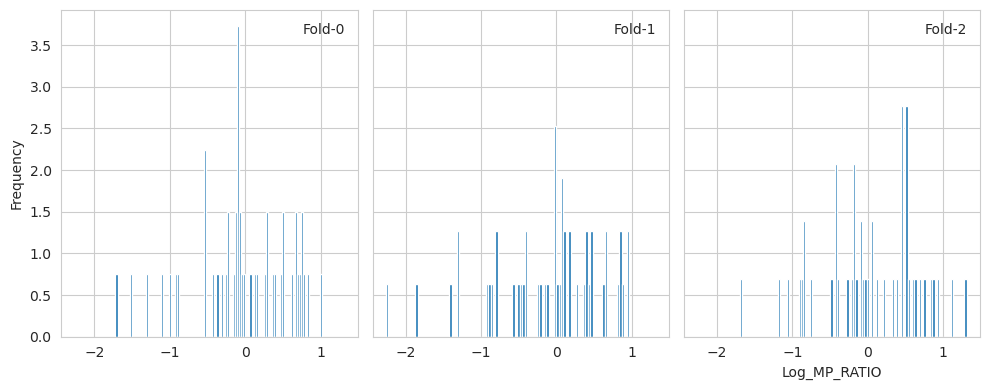

Scores: 
	R2				:	 0.6336190473666746 
	CV train		:	 0.2719491331954161 
	Custom CV train	:	 0.3327321627630588 
	Q2				:	 0.1990222236299406


In [13]:
test_utils = utils.Utils(full_train)
test_utils.create_cv_folds(display=True)
test_utils.display_score(ElasticNet(max_iter=100000, random_state=0), X_full_train, y_full_train, X_full_test, y_full_test)

In [24]:
def objective(trial):
    alpha = trial.suggest_float('alpha', 1e-10, 1e10, log=True)

    l1_ratio = trial.suggest_float('l1_ratio', 1e-10, 1, log=True)


    clf = ElasticNet(max_iter=100000, alpha=alpha, l1_ratio=l1_ratio, random_state=0)

    # n_ft = trial.suggest_int('n_ft', 1, 10, log=True)
    # clf = RFE(Ridge(max_iter=100000, alpha=alpha, solver=solver), n_features_to_select=n_ft)

    estimator = utils.Utils(full_train)
    return estimator.cross_value_score(clf)


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000, n_jobs=-1, show_progress_bar=True)
trial = study.best_trial
print(trial.value, trial.params)

[I 2023-06-16 16:23:48,059] A new study created in memory with name: no-name-bceeb9fe-a904-4986-a873-2e8a9ba4730b


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2023-06-16 16:23:49,131] Trial 2 finished with value: -1.4544204143926058 and parameters: {'alpha': 3.240037611199972e-08, 'l1_ratio': 0.15666170846706146}. Best is trial 2 with value: -1.4544204143926058.
[I 2023-06-16 16:23:49,201] Trial 0 finished with value: -1.4588566440063353 and parameters: {'alpha': 2.0906372214204996e-09, 'l1_ratio': 1.7612578807631209e-09}. Best is trial 2 with value: -1.4544204143926058.
[I 2023-06-16 16:23:49,510] Trial 4 finished with value: -1.4592894203414815 and parameters: {'alpha': 1.5156846606170913e-10, 'l1_ratio': 0.0009347701229623113}. Best is trial 2 with value: -1.4544204143926058.
[I 2023-06-16 16:23:49,551] Trial 9 finished with value: -0.015530983180227128 and parameters: {'alpha': 181791367.33304393, 'l1_ratio': 0.00859573421719675}. Best is trial 9 with value: -0.015530983180227128.
[I 2023-06-16 16:23:49,770] Trial 10 finished with value: -0.015500695097565983 and parameters: {'alpha': 1050413596.2293283, 'l1_ratio': 1.2713136546403835

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.172e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.464e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.763e+00, tolerance: 4.506e-03

/home/p

[I 2023-06-16 16:24:41,050] Trial 16 finished with value: -1.618533230604383 and parameters: {'alpha': 0.03763760388109042, 'l1_ratio': 0.30322441973937053}. Best is trial 11 with value: 0.3572658715830546.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.439e+00, tolerance: 4.591e-03



[I 2023-06-16 16:24:42,440] Trial 3 finished with value: 0.34216137737701824 and parameters: {'alpha': 768.7800474161819, 'l1_ratio': 1.3831188648108083e-06}. Best is trial 11 with value: 0.3572658715830546.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.689e-01, tolerance: 4.591e-03



[I 2023-06-16 16:24:52,314] Trial 20 finished with value: -3.292956266082208 and parameters: {'alpha': 0.018653716122563155, 'l1_ratio': 0.01073362150335118}. Best is trial 11 with value: 0.3572658715830546.
[I 2023-06-16 16:24:52,532] Trial 24 finished with value: -0.015530983180227128 and parameters: {'alpha': 25731.586497119886, 'l1_ratio': 0.03145551005119586}. Best is trial 11 with value: 0.3572658715830546.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.655e+00, tolerance: 4.591e-03



[I 2023-06-16 16:24:53,595] Trial 15 finished with value: -0.9927486221172465 and parameters: {'alpha': 0.9968277966153822, 'l1_ratio': 6.169433856588499e-05}. Best is trial 11 with value: 0.3572658715830546.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.613e+00, tolerance: 4.591e-03



[I 2023-06-16 16:24:55,482] Trial 6 finished with value: -1.0181034118687586 and parameters: {'alpha': 0.9274021412343176, 'l1_ratio': 0.00048517049065362465}. Best is trial 11 with value: 0.3572658715830546.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.750e-03, tolerance: 4.591e-03



[I 2023-06-16 16:24:59,076] Trial 14 finished with value: -1.8180348210106962 and parameters: {'alpha': 0.0006225962049571979, 'l1_ratio': 5.837428438220421e-08}. Best is trial 11 with value: 0.3572658715830546.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.042e+00, tolerance: 4.591e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.716e-01, tolerance: 4.506e-03



[I 2023-06-16 16:24:59,859] Trial 8 finished with value: 0.023625995974864034 and parameters: {'alpha': 16.82959333318621, 'l1_ratio': 7.117405538860166e-06}. Best is trial 11 with value: 0.3572658715830546.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.696e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.218e-02, tolerance: 4.591e-03



[I 2023-06-16 16:25:02,511] Trial 21 finished with value: -3.0454415634994234 and parameters: {'alpha': 0.010125455824745274, 'l1_ratio': 2.143575333772087e-05}. Best is trial 11 with value: 0.3572658715830546.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.055e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.081e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.940e-01, tolerance: 4.506e-03



[I 2023-06-16 16:25:15,111] Trial 30 finished with value: 0.33491988500858355 and parameters: {'alpha': 5388.094266260341, 'l1_ratio': 7.058931766235261e-07}. Best is trial 11 with value: 0.3572658715830546.
[I 2023-06-16 16:25:15,413] Trial 31 finished with value: 0.26951701759981045 and parameters: {'alpha': 795.8837790599543, 'l1_ratio': 0.06408591099135431}. Best is trial 11 with value: 0.3572658715830546.
[I 2023-06-16 16:25:15,719] Trial 32 finished with value: -0.015530983180227128 and parameters: {'alpha': 61855.648261603295, 'l1_ratio': 0.6054381442332205}. Best is trial 11 with value: 0.3572658715830546.
[I 2023-06-16 16:25:15,920] Trial 29 finished with value: 0.33983561911351234 and parameters: {'alpha': 2712.4040396868663, 'l1_ratio': 1.6655406519919888e-06}. Best is trial 11 with value: 0.3572658715830546.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.200e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.454e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.456e+00, tolerance: 4.506e-03



[I 2023-06-16 16:25:26,903] Trial 33 finished with value: 0.22035503036760481 and parameters: {'alpha': 16.65259767131658, 'l1_ratio': 0.007307321498576213}. Best is trial 11 with value: 0.3572658715830546.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.202e-02, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.616e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.533e-01, tolerance: 3.922e-03



[I 2023-06-16 16:25:31,668] Trial 35 finished with value: 0.35866430895057694 and parameters: {'alpha': 1.084483226919104, 'l1_ratio': 0.9284222397089379}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.848e-01, tolerance: 4.591e-03



[I 2023-06-16 16:25:32,605] Trial 22 finished with value: -3.318535151838067 and parameters: {'alpha': 0.01807772943695826, 'l1_ratio': 0.014656026495230031}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:25:33,172] Trial 34 finished with value: 0.2978541917178748 and parameters: {'alpha': 7.631496310598561, 'l1_ratio': 0.03953605631421224}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.996e-01, tolerance: 4.591e-03



[I 2023-06-16 16:25:34,219] Trial 23 finished with value: -2.438316439548156 and parameters: {'alpha': 0.07388835912047288, 'l1_ratio': 0.01470164846581545}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:25:34,455] Trial 39 finished with value: -0.015530983180227128 and parameters: {'alpha': 394.8679444063131, 'l1_ratio': 0.9669619847838972}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.190e-01, tolerance: 4.591e-03



[I 2023-06-16 16:25:42,239] Trial 27 finished with value: -4.113433421282801 and parameters: {'alpha': 0.0009346200746853411, 'l1_ratio': 0.8303850947326461}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:25:42,457] Trial 37 finished with value: 0.12932749082335837 and parameters: {'alpha': 1.092838202221985, 'l1_ratio': 0.10269224224321304}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.196e-01, tolerance: 4.591e-03



[I 2023-06-16 16:25:42,725] Trial 26 finished with value: -3.3868368865403897 and parameters: {'alpha': 0.00044006589213291036, 'l1_ratio': 0.8710652939562434}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:25:42,936] Trial 42 finished with value: 0.31749073414887985 and parameters: {'alpha': 100.05848280905303, 'l1_ratio': 0.22954841336410034}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:25:43,256] Trial 43 finished with value: 0.3175486877282333 and parameters: {'alpha': 172.5407605371581, 'l1_ratio': 0.14520381721487471}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:25:46,152] Trial 40 finished with value: -0.0014153394919703688 and parameters: {'alpha': 1.3110600808109893, 'l1_ratio': 0.054869088110398506}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:25:47,209] Trial 36 finished with value: 0.31373835674571315 and parameters: {'alpha': 0.4438269267700925, 'l1_ratio': 0.8697045848599596}. Best i

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.275e-03, tolerance: 4.591e-03



[I 2023-06-16 16:25:53,091] Trial 38 finished with value: 0.2425865490743435 and parameters: {'alpha': 0.257337217652338, 'l1_ratio': 0.8017018816740606}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.176e+00, tolerance: 4.591e-03



[I 2023-06-16 16:25:55,367] Trial 25 finished with value: -1.3989318076014794 and parameters: {'alpha': 0.47950371130886754, 'l1_ratio': 0.0003294360132345671}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.199e+00, tolerance: 4.591e-03



[I 2023-06-16 16:25:55,911] Trial 28 finished with value: 0.3340060028910736 and parameters: {'alpha': 399.8437526463856, 'l1_ratio': 1.9944520034414585e-06}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:25:57,471] Trial 47 finished with value: 0.058950514407528666 and parameters: {'alpha': 12.796630465245395, 'l1_ratio': 0.0021794351476732334}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.174e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.704e-01, tolerance: 4.506e-03



[I 2023-06-16 16:26:04,942] Trial 48 finished with value: 0.33701257267914336 and parameters: {'alpha': 3945.887326709132, 'l1_ratio': 1.4824071257246999e-06}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:26:05,118] Trial 53 finished with value: -0.015530983180227128 and parameters: {'alpha': 448621.1950014823, 'l1_ratio': 0.1649605872717571}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:26:08,785] Trial 51 finished with value: 0.06594382135104937 and parameters: {'alpha': 11.17346068218987, 'l1_ratio': 0.0033777413818564398}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.554e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.450e-01, tolerance: 3.922e-03



[I 2023-06-16 16:26:21,127] Trial 52 finished with value: 0.3370592974448212 and parameters: {'alpha': 3880.4780394689574, 'l1_ratio': 3.0392138227095755e-07}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:26:21,607] Trial 56 finished with value: 0.3166631619834335 and parameters: {'alpha': 42.634885332735, 'l1_ratio': 0.18627199243975626}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.566e-01, tolerance: 3.922e-03



[I 2023-06-16 16:26:26,861] Trial 46 finished with value: -0.5628248380931161 and parameters: {'alpha': 0.23894308013064758, 'l1_ratio': 0.1446398601860931}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:26:27,286] Trial 50 finished with value: 0.3411702716182422 and parameters: {'alpha': 2238.710976118063, 'l1_ratio': 1.2569316470968414e-06}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:26:37,704] Trial 54 finished with value: 0.34086502615278663 and parameters: {'alpha': 2329.9170956852195, 'l1_ratio': 4.010624610609998e-07}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.411e+00, tolerance: 4.591e-03



[I 2023-06-16 16:26:38,558] Trial 44 finished with value: -1.1737488389175899 and parameters: {'alpha': 0.6457816035097171, 'l1_ratio': 0.002238905303578539}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:26:40,120] Trial 55 finished with value: 0.3399125025660407 and parameters: {'alpha': 2656.3634616964728, 'l1_ratio': 8.520305932747903e-08}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.949e+00, tolerance: 3.922e-03



[I 2023-06-16 16:26:41,798] Trial 61 finished with value: 0.3398038819718452 and parameters: {'alpha': 35323.75120124294, 'l1_ratio': 7.635495107385818e-08}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.252e+00, tolerance: 4.591e-03



[I 2023-06-16 16:26:47,311] Trial 45 finished with value: -1.3870978362141995 and parameters: {'alpha': 0.445427549753611, 'l1_ratio': 0.002258753106176581}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.366e-01, tolerance: 4.506e-03



[I 2023-06-16 16:26:53,658] Trial 59 finished with value: 0.3428946303035355 and parameters: {'alpha': 1748.3579858835583, 'l1_ratio': 8.044248696397792e-06}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:27:00,572] Trial 57 finished with value: 0.3426261530747236 and parameters: {'alpha': 813.2647886552081, 'l1_ratio': 6.028288262387034e-06}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.006e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.191e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.167e+00, tolerance: 4.506e-03

/home/p

[I 2023-06-16 16:27:10,932] Trial 49 finished with value: -0.1089600358672342 and parameters: {'alpha': 9.972969618977498, 'l1_ratio': 1.1717220306987056e-06}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.376e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.262e+00, tolerance: 4.506e-03



[I 2023-06-16 16:27:22,579] Trial 58 finished with value: 0.3430656613920456 and parameters: {'alpha': 1555.5721884866975, 'l1_ratio': 2.057637857217884e-07}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.115e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.349e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.440e+00, tolerance: 3.922e-03

/home/p

[I 2023-06-16 16:27:43,883] Trial 67 finished with value: 0.2351915885891488 and parameters: {'alpha': 55.243936143010664, 'l1_ratio': 0.00018772862427401564}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.205e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.871e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.184e+00, tolerance: 3.922e-03

/home/p

[I 2023-06-16 16:27:57,477] Trial 63 finished with value: 0.24269347388740617 and parameters: {'alpha': 63.92595687716711, 'l1_ratio': 1.0659801271799658e-05}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:27:57,655] Trial 60 finished with value: -0.28906591989821184 and parameters: {'alpha': 5.493079513339144, 'l1_ratio': 1.0696227305410547e-07}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.948e+00, tolerance: 4.591e-03



[I 2023-06-16 16:27:59,338] Trial 62 finished with value: -0.28947352898421286 and parameters: {'alpha': 5.480081423110035, 'l1_ratio': 8.984711873262441e-06}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.263e+00, tolerance: 4.591e-03



[I 2023-06-16 16:28:03,528] Trial 64 finished with value: 0.22539670765738998 and parameters: {'alpha': 54.64166663302754, 'l1_ratio': 6.122698653829969e-06}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:28:07,887] Trial 69 finished with value: 0.34328843016891925 and parameters: {'alpha': 911.6322843491316, 'l1_ratio': 1.012890240535931e-05}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.879e+00, tolerance: 4.591e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.847e+00, tolerance: 4.591e-03



[I 2023-06-16 16:28:11,347] Trial 65 finished with value: -0.3246935341885149 and parameters: {'alpha': 4.929783654901841, 'l1_ratio': 7.173868674662597e-06}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.827e+00, tolerance: 3.922e-03



[I 2023-06-16 16:28:13,224] Trial 66 finished with value: -0.32852952940247465 and parameters: {'alpha': 4.872974968431883, 'l1_ratio': 8.977706666342493e-06}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:28:13,406] Trial 75 finished with value: -0.015530983180227128 and parameters: {'alpha': 22529.705124822838, 'l1_ratio': 0.3020149607252176}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.142e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.653e+00, tolerance: 4.506e-03



[I 2023-06-16 16:28:25,439] Trial 76 finished with value: 0.3395437399406364 and parameters: {'alpha': 475.9853287575421, 'l1_ratio': 0.00010449869586925186}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:28:30,180] Trial 77 finished with value: 0.3421545316798636 and parameters: {'alpha': 693.5233942905022, 'l1_ratio': 4.771325675585541e-05}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:28:31,416] Trial 72 finished with value: 0.33545896210178877 and parameters: {'alpha': 413.5440558481504, 'l1_ratio': 3.4676937095914516e-05}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.598e+00, tolerance: 4.591e-03



[I 2023-06-16 16:28:35,758] Trial 68 finished with value: 0.2566912048915019 and parameters: {'alpha': 74.16304218442494, 'l1_ratio': 5.1349734044103125e-06}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:28:35,984] Trial 81 finished with value: -0.015530983180227128 and parameters: {'alpha': 9543.257234419858, 'l1_ratio': 0.42565945130326704}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:28:36,570] Trial 82 finished with value: 0.3364179500414026 and parameters: {'alpha': 108672.10782931189, 'l1_ratio': 1.898955151224188e-05}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:28:38,569] Trial 74 finished with value: 0.33553891230776783 and parameters: {'alpha': 414.35774045407607, 'l1_ratio': 3.6312769374795136e-05}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.657e+00, tolerance: 4.591e-03



[I 2023-06-16 16:28:39,067] Trial 73 finished with value: 0.3227062378834569 and parameters: {'alpha': 236.34416509811987, 'l1_ratio': 5.809899221073838e-05}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.489e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.492e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.685e+00, tolerance: 4.591e-03



[I 2023-06-16 16:28:55,088] Trial 70 finished with value: 0.3306977645905042 and parameters: {'alpha': 338.1678701732456, 'l1_ratio': 4.738211397035273e-06}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.106e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.576e+00, tolerance: 4.591e-03



[I 2023-06-16 16:29:00,818] Trial 71 finished with value: 0.3222144998955559 and parameters: {'alpha': 243.02322582841066, 'l1_ratio': 5.44142804981681e-06}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.161e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.707e-03, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.679e-01, tolerance: 4.506e-03



[I 2023-06-16 16:29:12,017] Trial 87 finished with value: 0.332995077061896 and parameters: {'alpha': 9945.194620027702, 'l1_ratio': 1.9857401941118034e-08}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.074e-02, tolerance: 4.506e-03



[I 2023-06-16 16:29:19,051] Trial 85 finished with value: 0.34352993099701296 and parameters: {'alpha': 1371.6836114098335, 'l1_ratio': 2.9210344919982588e-06}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.821e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.900e+00, tolerance: 4.591e-03



[I 2023-06-16 16:29:22,472] Trial 79 finished with value: 0.32008851483832546 and parameters: {'alpha': 223.747800519993, 'l1_ratio': 2.4732332298932338e-05}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.330e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.740e+00, tolerance: 4.591e-03



[I 2023-06-16 16:29:24,198] Trial 78 finished with value: 0.3356873471001011 and parameters: {'alpha': 438.80233910877877, 'l1_ratio': 3.4488672217910933e-06}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.614e-01, tolerance: 3.922e-03



[I 2023-06-16 16:29:37,541] Trial 86 finished with value: 0.34363297658866526 and parameters: {'alpha': 1239.1156306578464, 'l1_ratio': 2.7949317758333427e-06}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.511e+00, tolerance: 4.591e-03



[I 2023-06-16 16:29:43,357] Trial 80 finished with value: 0.311591958383739 and parameters: {'alpha': 179.276092265419, 'l1_ratio': 3.5120588126691373e-06}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.564e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.992e+00, tolerance: 4.591e-03



[I 2023-06-16 16:29:46,966] Trial 83 finished with value: 0.31990929657122014 and parameters: {'alpha': 226.5975325235457, 'l1_ratio': 2.0936731945364196e-08}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:29:47,096] Trial 94 finished with value: 0.30289869328226565 and parameters: {'alpha': 1467.7100442760716, 'l1_ratio': 0.026009418997159833}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.958e-01, tolerance: 4.591e-03



[I 2023-06-16 16:29:49,598] Trial 84 finished with value: -2.552278580876953 and parameters: {'alpha': 0.06622064706704071, 'l1_ratio': 2.5415201670828777e-06}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:29:50,843] Trial 88 finished with value: 0.3432552668825773 and parameters: {'alpha': 947.3206382014207, 'l1_ratio': 2.5976432224132896e-06}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:29:53,274] Trial 95 finished with value: 0.3330673912108459 and parameters: {'alpha': 10982.78253638735, 'l1_ratio': 7.509632043642259e-07}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:29:54,766] Trial 89 finished with value: 0.3433832338164791 and parameters: {'alpha': 986.1607463977743, 'l1_ratio': 2.867143630246812e-06}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:29:55,395] Trial 90 finished with value: 0.3431160500204338 and parameters: {'alpha': 1576.337382144327, 'l1_ratio': 2.5990245545659454e-06}. Best 

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.523e+00, tolerance: 4.506e-03



[I 2023-06-16 16:29:58,759] Trial 97 finished with value: 0.3333014167749549 and parameters: {'alpha': 8004.788879555039, 'l1_ratio': 8.43583346444554e-07}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.973e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.834e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.627e+00, tolerance: 4.506e-03

/home/p

[I 2023-06-16 16:30:29,409] Trial 91 finished with value: 0.08458993578110534 and parameters: {'alpha': 22.3872870543745, 'l1_ratio': 6.66530362202587e-07}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:30:32,505] Trial 96 finished with value: 0.34356435978747873 and parameters: {'alpha': 1262.7571605623066, 'l1_ratio': 8.59732178262214e-07}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.964e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.129e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.517e+00, tolerance: 4.591e-03



[I 2023-06-16 16:30:40,731] Trial 92 finished with value: 0.10621048729256448 and parameters: {'alpha': 24.984375544897894, 'l1_ratio': 3.363418346683845e-06}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:30:40,917] Trial 99 finished with value: 0.34362671451946114 and parameters: {'alpha': 1172.1441044591322, 'l1_ratio': 2.1588599156809198e-06}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:30:41,196] Trial 105 finished with value: -0.015530983180227128 and parameters: {'alpha': 64485.911612599164, 'l1_ratio': 0.4522425403603847}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.829e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.937e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.756e+00, tolerance: 4.506e-03

/home/p

[I 2023-06-16 16:30:57,239] Trial 93 finished with value: 0.11362359788401366 and parameters: {'alpha': 25.99447051004856, 'l1_ratio': 2.601692877434117e-06}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.736e+00, tolerance: 4.591e-03



[I 2023-06-16 16:31:03,942] Trial 98 finished with value: 0.14007708989977863 and parameters: {'alpha': 30.140209731020633, 'l1_ratio': 2.319187172193272e-06}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.363e-02, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.428e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.444e+00, tolerance: 4.591e-03



[I 2023-06-16 16:31:08,014] Trial 100 finished with value: 0.08795102420329966 and parameters: {'alpha': 22.756756521063426, 'l1_ratio': 2.1268862390987074e-06}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.549e+00, tolerance: 4.591e-03



[I 2023-06-16 16:31:09,598] Trial 101 finished with value: 0.10764145966097678 and parameters: {'alpha': 25.182446407470625, 'l1_ratio': 2.2238972889339105e-06}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.128e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.194e+00, tolerance: 4.506e-03



[I 2023-06-16 16:31:23,367] Trial 109 finished with value: 0.33538735142924614 and parameters: {'alpha': 5016.016914757978, 'l1_ratio': 1.3849093304966858e-06}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:31:23,837] Trial 111 finished with value: 0.0676674772685731 and parameters: {'alpha': 1139.3171614839673, 'l1_ratio': 0.09018588642229312}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.045e+00, tolerance: 3.922e-03



[I 2023-06-16 16:31:29,349] Trial 110 finished with value: 0.34396407806549234 and parameters: {'alpha': 1191.6176597090514, 'l1_ratio': 1.4392457132704187e-05}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:31:30,127] Trial 104 finished with value: 0.3436294319533494 and parameters: {'alpha': 1178.530860021423, 'l1_ratio': 2.232088094538831e-06}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.799e+00, tolerance: 3.922e-03



[I 2023-06-16 16:31:33,191] Trial 108 finished with value: 0.3432729458915366 and parameters: {'alpha': 883.4564408355255, 'l1_ratio': 1.4855895220951925e-05}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:31:33,220] Trial 113 finished with value: 0.35559305952517556 and parameters: {'alpha': 2.002615119862817, 'l1_ratio': 0.6225275746936918}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:31:35,182] Trial 115 finished with value: 0.35449940302888366 and parameters: {'alpha': 3.0265191278623114, 'l1_ratio': 0.6181115650096641}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:31:35,444] Trial 116 finished with value: 0.353275923454508 and parameters: {'alpha': 2.14946277556599, 'l1_ratio': 0.9010547370184071}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:31:38,067] Trial 118 finished with value: 0.3584358498271417 and parameters: {'alpha': 2.6393707267635, 'l1_ratio': 0.5622837849404161}. Best is trial 35 

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.654e+00, tolerance: 4.591e-03



[I 2023-06-16 16:31:46,685] Trial 102 finished with value: 0.12525507384321607 and parameters: {'alpha': 27.705923960278085, 'l1_ratio': 1.9733075326579075e-06}. Best is trial 35 with value: 0.35866430895057694.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.751e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.160e+00, tolerance: 4.506e-03



[I 2023-06-16 16:31:48,634] Trial 124 finished with value: 0.34775853994064815 and parameters: {'alpha': 2.4491184915427247, 'l1_ratio': 0.9806290047271404}. Best is trial 35 with value: 0.35866430895057694.
[I 2023-06-16 16:31:48,760] Trial 123 finished with value: 0.3589629641662819 and parameters: {'alpha': 2.298510253607165, 'l1_ratio': 0.6061476450312111}. Best is trial 123 with value: 0.3589629641662819.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.735e+00, tolerance: 4.591e-03



[I 2023-06-16 16:31:49,785] Trial 103 finished with value: 0.13810773271791368 and parameters: {'alpha': 29.802466279269076, 'l1_ratio': 1.780835882983013e-06}. Best is trial 123 with value: 0.3589629641662819.
[I 2023-06-16 16:31:54,209] Trial 125 finished with value: 0.35767131413199565 and parameters: {'alpha': 1.0491678355315666, 'l1_ratio': 0.9969448010015778}. Best is trial 123 with value: 0.3589629641662819.
[I 2023-06-16 16:31:55,158] Trial 126 finished with value: 0.3577516548496169 and parameters: {'alpha': 1.551528165408014, 'l1_ratio': 0.5339208085740278}. Best is trial 123 with value: 0.3589629641662819.
[I 2023-06-16 16:31:55,814] Trial 122 finished with value: 0.3475912627734778 and parameters: {'alpha': 0.952305985339784, 'l1_ratio': 0.6667723562421951}. Best is trial 123 with value: 0.3589629641662819.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.527e+00, tolerance: 4.591e-03



[I 2023-06-16 16:31:56,368] Trial 106 finished with value: -0.4976968424495506 and parameters: {'alpha': 3.043235176150612, 'l1_ratio': 1.6515021306339164e-06}. Best is trial 123 with value: 0.3589629641662819.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.322e+00, tolerance: 4.506e-03



[I 2023-06-16 16:32:00,080] Trial 128 finished with value: 0.3590101021316477 and parameters: {'alpha': 1.644323744842163, 'l1_ratio': 0.5651966026772418}. Best is trial 128 with value: 0.3590101021316477.
[I 2023-06-16 16:32:03,596] Trial 127 finished with value: 0.3346303442322133 and parameters: {'alpha': 1.7757779770387965, 'l1_ratio': 0.28669151971609114}. Best is trial 128 with value: 0.3590101021316477.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.400e+00, tolerance: 4.591e-03



[I 2023-06-16 16:32:07,976] Trial 107 finished with value: -0.4938522708286848 and parameters: {'alpha': 3.069876559992963, 'l1_ratio': 1.4503501013399005e-05}. Best is trial 128 with value: 0.3590101021316477.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.968e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.473e-03, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.002e-02, tolerance: 3.922e-03

/home/p

[I 2023-06-16 16:32:17,958] Trial 129 finished with value: 0.19165048934513376 and parameters: {'alpha': 0.30891020434760463, 'l1_ratio': 0.5289073213871309}. Best is trial 128 with value: 0.3590101021316477.
[I 2023-06-16 16:32:21,324] Trial 133 finished with value: -0.022476813628028114 and parameters: {'alpha': 0.17614881720168601, 'l1_ratio': 0.4447469932262171}. Best is trial 128 with value: 0.3590101021316477.
[I 2023-06-16 16:32:22,063] Trial 131 finished with value: -0.2143361149375758 and parameters: {'alpha': 0.18998166502750288, 'l1_ratio': 0.28834710682769343}. Best is trial 128 with value: 0.3590101021316477.
[I 2023-06-16 16:32:24,699] Trial 130 finished with value: -0.4425521405306269 and parameters: {'alpha': 0.1600004494974021, 'l1_ratio': 0.262761459348795}. Best is trial 128 with value: 0.3590101021316477.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.866e-03, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.255e-02, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.613e+00, tolerance: 4.591e-03



[I 2023-06-16 16:32:29,298] Trial 112 finished with value: 0.28957983884197064 and parameters: {'alpha': 114.43160400129673, 'l1_ratio': 1.512711735607313e-05}. Best is trial 128 with value: 0.3590101021316477.
[I 2023-06-16 16:32:30,387] Trial 134 finished with value: -0.14034568065295225 and parameters: {'alpha': 0.1747575635411224, 'l1_ratio': 0.36258521714236863}. Best is trial 128 with value: 0.3590101021316477.
[I 2023-06-16 16:32:36,717] Trial 132 finished with value: -0.5632198581246426 and parameters: {'alpha': 0.14099529757607035, 'l1_ratio': 0.2604585427313206}. Best is trial 128 with value: 0.3590101021316477.
[I 2023-06-16 16:32:39,483] Trial 138 finished with value: 0.32086628728045785 and parameters: {'alpha': 0.7337203546757607, 'l1_ratio': 0.5745432061687057}. Best is trial 128 with value: 0.3590101021316477.
[I 2023-06-16 16:32:40,961] Trial 136 finished with value: 0.1651233144846966 and parameters: {'alpha': 0.5569775110665226, 'l1_ratio': 0.2472110582710893}. Best 

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.626e+00, tolerance: 4.591e-03



[I 2023-06-16 16:32:42,251] Trial 114 finished with value: 0.28536753462302833 and parameters: {'alpha': 107.10514738332942, 'l1_ratio': 1.3682573087386972e-05}. Best is trial 128 with value: 0.3590101021316477.
[I 2023-06-16 16:32:42,327] Trial 142 finished with value: 0.3574362412163299 and parameters: {'alpha': 8.663220201376458, 'l1_ratio': 0.15419220925438676}. Best is trial 128 with value: 0.3590101021316477.
[I 2023-06-16 16:32:43,526] Trial 139 finished with value: 0.32565535777254434 and parameters: {'alpha': 0.7744827833979129, 'l1_ratio': 0.5797680153084188}. Best is trial 128 with value: 0.3590101021316477.
[I 2023-06-16 16:32:43,991] Trial 137 finished with value: 0.17870736875553297 and parameters: {'alpha': 0.7065443690497855, 'l1_ratio': 0.20994592885610022}. Best is trial 128 with value: 0.3590101021316477.
[I 2023-06-16 16:32:45,542] Trial 143 finished with value: 0.35838071582056313 and parameters: {'alpha': 7.079819546856549, 'l1_ratio': 0.140433875511221}. Best is 

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.943e-02, tolerance: 3.922e-03



[I 2023-06-16 16:32:46,343] Trial 146 finished with value: 0.35625965438162227 and parameters: {'alpha': 8.339733535990586, 'l1_ratio': 0.15320082843376934}. Best is trial 128 with value: 0.3590101021316477.
[I 2023-06-16 16:32:46,451] Trial 145 finished with value: 0.3579673609234114 and parameters: {'alpha': 8.19000098218525, 'l1_ratio': 0.12464338642352578}. Best is trial 128 with value: 0.3590101021316477.
[I 2023-06-16 16:32:47,922] Trial 140 finished with value: 0.17142630796836122 and parameters: {'alpha': 0.7523623233807152, 'l1_ratio': 0.18845798155225382}. Best is trial 128 with value: 0.3590101021316477.
[I 2023-06-16 16:32:48,037] Trial 147 finished with value: 0.3554621066345563 and parameters: {'alpha': 8.504339945563487, 'l1_ratio': 0.1349862280696274}. Best is trial 128 with value: 0.3590101021316477.
[I 2023-06-16 16:32:48,610] Trial 148 finished with value: 0.3562383860556151 and parameters: {'alpha': 10.508522200868086, 'l1_ratio': 0.12095483492834083}. Best is trial

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.099e-01, tolerance: 4.591e-03



[I 2023-06-16 16:33:04,220] Trial 135 finished with value: -0.6248525888870063 and parameters: {'alpha': 0.13722380677433085, 'l1_ratio': 0.24407103220064677}. Best is trial 128 with value: 0.3590101021316477.
[I 2023-06-16 16:33:04,764] Trial 156 finished with value: 0.34215713652774393 and parameters: {'alpha': 7.836480947340992, 'l1_ratio': 0.06922014331726478}. Best is trial 128 with value: 0.3590101021316477.
[I 2023-06-16 16:33:05,132] Trial 158 finished with value: 0.34609535690051557 and parameters: {'alpha': 7.899992924791051, 'l1_ratio': 0.07242713022505035}. Best is trial 128 with value: 0.3590101021316477.
[I 2023-06-16 16:33:05,220] Trial 157 finished with value: 0.3437652860156858 and parameters: {'alpha': 7.719755675637385, 'l1_ratio': 0.0717042091644323}. Best is trial 128 with value: 0.3590101021316477.
[I 2023-06-16 16:33:05,807] Trial 163 finished with value: 0.34644828885223344 and parameters: {'alpha': 57.18592288664059, 'l1_ratio': 0.042660416178057305}. Best is t

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.246e-03, tolerance: 4.591e-03



[I 2023-06-16 16:33:22,850] Trial 162 finished with value: 0.26704037028675254 and parameters: {'alpha': 4.412008141299202, 'l1_ratio': 0.05249892628173616}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:33:23,815] Trial 177 finished with value: 0.3556432364883561 and parameters: {'alpha': 1.3183268804397674, 'l1_ratio': 0.9555678927288119}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:33:25,190] Trial 179 finished with value: 0.323256356080263 and parameters: {'alpha': 43.60123897482891, 'l1_ratio': 0.10666004687245777}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:33:25,735] Trial 180 finished with value: 0.3153598607041081 and parameters: {'alpha': 80.84427882111773, 'l1_ratio': 0.367895441040962}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.019e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.666e-03, tolerance: 4.591e-03



[I 2023-06-16 16:33:29,667] Trial 165 finished with value: 0.2154714599802278 and parameters: {'alpha': 4.26345810951327, 'l1_ratio': 0.04007786068700219}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.317e-03, tolerance: 4.506e-03



[I 2023-06-16 16:33:32,672] Trial 173 finished with value: 0.31390624425061125 and parameters: {'alpha': 1.3310430617167825, 'l1_ratio': 0.2880646787629727}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:33:34,032] Trial 175 finished with value: 0.32690155719100483 and parameters: {'alpha': 1.3983810598681201, 'l1_ratio': 0.3263523366430239}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:33:40,577] Trial 176 finished with value: -0.4927017233056891 and parameters: {'alpha': 0.044974999696495016, 'l1_ratio': 0.9464686629033711}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.124e-03, tolerance: 4.591e-03



[I 2023-06-16 16:33:45,067] Trial 178 finished with value: 0.23748912871306463 and parameters: {'alpha': 1.6874743218241526, 'l1_ratio': 0.11890762768509015}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.085e-01, tolerance: 3.922e-03



[I 2023-06-16 16:33:46,357] Trial 183 finished with value: -0.049614966641591596 and parameters: {'alpha': 0.438413337980227, 'l1_ratio': 0.164161244504615}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.807e-02, tolerance: 3.922e-03



[I 2023-06-16 16:33:47,599] Trial 187 finished with value: 0.32642101451467614 and parameters: {'alpha': 20.22104831118227, 'l1_ratio': 0.19249856436955115}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:33:51,661] Trial 181 finished with value: -0.22176279702005544 and parameters: {'alpha': 0.3543440344801002, 'l1_ratio': 0.1476065845440262}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:33:53,907] Trial 182 finished with value: -0.23945852036809487 and parameters: {'alpha': 0.3784909338804193, 'l1_ratio': 0.13340400534733093}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:33:54,255] Trial 185 finished with value: -0.10719945576620149 and parameters: {'alpha': 0.46397075585827546, 'l1_ratio': 0.13664113937301828}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:33:54,621] Trial 190 finished with value: 0.3115455170461861 and parameters: {'alpha': 19.16859698381255, 'l1_ratio': 0.36724270509547396}. B

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.751e-02, tolerance: 4.591e-03



[I 2023-06-16 16:34:02,009] Trial 174 finished with value: -1.3806280496304346 and parameters: {'alpha': 0.039013559351048305, 'l1_ratio': 0.3606663177217783}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:34:04,154] Trial 200 finished with value: 0.35742331338950745 and parameters: {'alpha': 1.6507081339279628, 'l1_ratio': 0.9684446838855929}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:34:04,708] Trial 201 finished with value: 0.3584192220349806 and parameters: {'alpha': 1.6285357815056498, 'l1_ratio': 0.912127740894783}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.183e-01, tolerance: 4.591e-03



[I 2023-06-16 16:34:06,238] Trial 172 finished with value: -1.6444983307045624 and parameters: {'alpha': 0.03450387626297002, 'l1_ratio': 0.3329587648246955}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:34:06,743] Trial 198 finished with value: 0.35884432405815353 and parameters: {'alpha': 1.3450385556608397, 'l1_ratio': 0.6800396395604138}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:34:08,045] Trial 202 finished with value: 0.35640425501286704 and parameters: {'alpha': 1.7291212431707994, 'l1_ratio': 0.9850875669672076}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:34:08,051] Trial 194 finished with value: 0.35262644138693827 and parameters: {'alpha': 2.7004246920921733, 'l1_ratio': 0.2572808817266274}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:34:09,909] Trial 204 finished with value: 0.3579958754257995 and parameters: {'alpha': 1.920615459802693, 'l1_ratio': 0.7068020525248606}. Best is

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.246e-02, tolerance: 3.922e-03



[I 2023-06-16 16:34:39,294] Trial 225 finished with value: 0.0771552251210323 and parameters: {'alpha': 0.19659476633310666, 'l1_ratio': 0.48830431196329344}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:34:41,395] Trial 215 finished with value: -0.15820177871676164 and parameters: {'alpha': 0.09769656616421873, 'l1_ratio': 0.6393619468474081}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:34:42,580] Trial 226 finished with value: 0.1583577688628215 and parameters: {'alpha': 0.3123039893730791, 'l1_ratio': 0.42866266755527244}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.102e-02, tolerance: 3.922e-03



[I 2023-06-16 16:34:43,724] Trial 235 finished with value: 0.326119867509815 and parameters: {'alpha': 12.335506049365117, 'l1_ratio': 0.3074603771888265}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:34:46,917] Trial 219 finished with value: -0.11814645137514253 and parameters: {'alpha': 0.07603843007133154, 'l1_ratio': 0.88528563150596}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:34:50,930] Trial 232 finished with value: 0.1454187846058805 and parameters: {'alpha': 0.3114908286372215, 'l1_ratio': 0.406741255250941}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:34:51,155] Trial 231 finished with value: -0.010748006623309289 and parameters: {'alpha': 0.1977886612016916, 'l1_ratio': 0.4034209114027792}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:34:51,466] Trial 236 finished with value: 0.35641826878216215 and parameters: {'alpha': 3.370311533774825, 'l1_ratio': 0.22623626437637184}. Best is 

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.153e-02, tolerance: 3.922e-03



[I 2023-06-16 16:34:52,376] Trial 240 finished with value: 0.3231006491235032 and parameters: {'alpha': 19.17279676363264, 'l1_ratio': 0.2428474316171259}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:34:52,629] Trial 233 finished with value: 0.14465612142220094 and parameters: {'alpha': 0.4452599228075216, 'l1_ratio': 0.28238421408656533}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:34:53,394] Trial 237 finished with value: 0.35775727013691144 and parameters: {'alpha': 2.6038544245100463, 'l1_ratio': 0.3307471581292322}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:34:55,376] Trial 243 finished with value: 0.3510712442615813 and parameters: {'alpha': 4.548614453425793, 'l1_ratio': 0.45458438705624443}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:34:55,836] Trial 239 finished with value: 0.35891917928167605 and parameters: {'alpha': 3.8218428661593267, 'l1_ratio': 0.24570976412865275}. Best is

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.685e-03, tolerance: 4.591e-03



[I 2023-06-16 16:34:57,027] Trial 230 finished with value: 0.187407148917166 and parameters: {'alpha': 0.3952651531913673, 'l1_ratio': 0.39993171350261936}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:34:57,374] Trial 245 finished with value: 0.3379185646005755 and parameters: {'alpha': 13.339352381847181, 'l1_ratio': 0.22770178390849694}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:34:57,828] Trial 246 finished with value: 0.3443113633113733 and parameters: {'alpha': 12.358388379054622, 'l1_ratio': 0.21669214835623818}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:34:58,907] Trial 244 finished with value: 0.3556739375191189 and parameters: {'alpha': 2.454118517653155, 'l1_ratio': 0.4970953255517495}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:35:00,722] Trial 227 finished with value: -0.6459511846433815 and parameters: {'alpha': 0.0842707325880348, 'l1_ratio': 0.40249318972179}. Best is tri

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.388e-02, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.859e-02, tolerance: 4.506e-03



[I 2023-06-16 16:35:18,624] Trial 253 finished with value: 0.3112915288088999 and parameters: {'alpha': 1.5222435841743707, 'l1_ratio': 0.2441005854859932}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.778e-01, tolerance: 4.506e-03



[I 2023-06-16 16:35:23,328] Trial 257 finished with value: 0.33479264608706344 and parameters: {'alpha': 0.8317256670680453, 'l1_ratio': 0.6186555971876092}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:35:24,168] Trial 259 finished with value: -1.4581299187241386 and parameters: {'alpha': 8.60517936579712e-09, 'l1_ratio': 0.6013485530132231}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:35:25,695] Trial 260 finished with value: 0.32985425594588347 and parameters: {'alpha': 37.40885917174199, 'l1_ratio': 0.09099017369947522}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:35:27,161] Trial 261 finished with value: 0.3266386973062517 and parameters: {'alpha': 6.390361348481446, 'l1_ratio': 0.6325465682958648}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.687e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.530e+00, tolerance: 4.506e-03



[I 2023-06-16 16:35:29,220] Trial 258 finished with value: 0.3301770313869203 and parameters: {'alpha': 0.7105339893997542, 'l1_ratio': 0.682488068090753}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.637e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.238e-01, tolerance: 3.922e-03



[I 2023-06-16 16:35:42,786] Trial 262 finished with value: 0.15714248753659377 and parameters: {'alpha': 0.7526747786302113, 'l1_ratio': 0.17441946846205128}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:35:45,067] Trial 264 finished with value: 0.35506109021892235 and parameters: {'alpha': 1.8431761234389832, 'l1_ratio': 0.9916869723142979}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:35:45,247] Trial 265 finished with value: -0.015530983180227128 and parameters: {'alpha': 3131596779.099636, 'l1_ratio': 0.34724642575675496}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.187e-01, tolerance: 3.922e-03



[I 2023-06-16 16:35:47,133] Trial 250 finished with value: -0.579929781497432 and parameters: {'alpha': 1.309638106074325, 'l1_ratio': 0.009170163290376284}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.400e-01, tolerance: 4.591e-03



[I 2023-06-16 16:35:47,445] Trial 251 finished with value: -0.6312305535032702 and parameters: {'alpha': 1.6639726558736287, 'l1_ratio': 0.0033515450772516014}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:35:48,770] Trial 268 finished with value: -1.4474188455224184 and parameters: {'alpha': 4.538206872980713e-07, 'l1_ratio': 0.0010088837112051867}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.203e-01, tolerance: 3.922e-03



[I 2023-06-16 16:35:51,480] Trial 269 finished with value: -1.2186626142315062 and parameters: {'alpha': 1.263730347794349e-05, 'l1_ratio': 6.827324026070622e-05}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.577e+00, tolerance: 4.506e-03



[I 2023-06-16 16:35:54,394] Trial 266 finished with value: 0.350659289563602 and parameters: {'alpha': 7.02173235908879, 'l1_ratio': 0.09482696259667178}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.070e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.366e+00, tolerance: 4.591e-03



[I 2023-06-16 16:36:01,051] Trial 271 finished with value: 0.35784343733491525 and parameters: {'alpha': 4.939537559426036, 'l1_ratio': 0.17721420037577468}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:36:01,058] Trial 252 finished with value: -0.6665962646133711 and parameters: {'alpha': 1.9229823204233207, 'l1_ratio': 0.0004392219119564195}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:36:02,296] Trial 272 finished with value: 0.32374614266479945 and parameters: {'alpha': 26.459351267294075, 'l1_ratio': 0.1731342114100947}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:36:02,415] Trial 273 finished with value: 0.3228668773910273 and parameters: {'alpha': 30.91003527070721, 'l1_ratio': 0.15726544820100838}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:36:03,310] Trial 275 finished with value: -1.459282765511732 and parameters: {'alpha': 2.0157312045392627e-10, 'l1_ratio': 0.07368597704996363}. 

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.809e+00, tolerance: 4.591e-03



[I 2023-06-16 16:36:06,598] Trial 254 finished with value: -0.799392569560221 and parameters: {'alpha': 1.451455540032428, 'l1_ratio': 0.00026433130883262145}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:36:06,793] Trial 267 finished with value: -0.10532896547230493 and parameters: {'alpha': 8.149134951417654, 'l1_ratio': 0.0013468243870195821}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.650e+00, tolerance: 4.591e-03



[I 2023-06-16 16:36:12,112] Trial 255 finished with value: -0.9884734330291947 and parameters: {'alpha': 0.9901583401947913, 'l1_ratio': 0.0003101391300360855}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:36:14,235] Trial 280 finished with value: 0.349531794611252 and parameters: {'alpha': 4.393643531998262, 'l1_ratio': 0.5022601484029957}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:36:14,351] Trial 274 finished with value: 0.33360694402947116 and parameters: {'alpha': 7.480530699949198, 'l1_ratio': 0.0645648528844949}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:36:15,395] Trial 282 finished with value: 0.3489002420208785 and parameters: {'alpha': 17.933185124615957, 'l1_ratio': 0.12632748203193844}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.020e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.724e+00, tolerance: 4.591e-03



[I 2023-06-16 16:36:15,663] Trial 256 finished with value: -0.8633357900213132 and parameters: {'alpha': 1.2855614030645457, 'l1_ratio': 8.735805654320987e-05}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:36:15,974] Trial 284 finished with value: 0.3207160472169541 and parameters: {'alpha': 45.72622746605665, 'l1_ratio': 0.354097320365704}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:36:16,955] Trial 285 finished with value: 0.3265463936586212 and parameters: {'alpha': 98.21755802285716, 'l1_ratio': 0.04127765384972196}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:36:21,894] Trial 277 finished with value: 0.319676377553934 and parameters: {'alpha': 8.579757431908833, 'l1_ratio': 0.04499826962548574}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:36:23,073] Trial 270 finished with value: -0.2509122726884796 and parameters: {'alpha': 5.290256554806105, 'l1_ratio': 0.001182396960156063}. Best is 

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.624e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.866e-03, tolerance: 4.591e-03



[I 2023-06-16 16:36:34,938] Trial 281 finished with value: 0.2616054601382115 and parameters: {'alpha': 11.918943132247675, 'l1_ratio': 0.016716166813329315}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.986e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.689e+00, tolerance: 4.591e-03



[I 2023-06-16 16:36:35,802] Trial 263 finished with value: -0.7542689492597158 and parameters: {'alpha': 1.6020156389796423, 'l1_ratio': 0.0002520734792777955}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.915e+00, tolerance: 3.922e-03



[I 2023-06-16 16:36:36,989] Trial 292 finished with value: 0.35535121816891374 and parameters: {'alpha': 3.5470326327283836, 'l1_ratio': 0.5069586999065763}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.556e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.310e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.137e+00, tolerance: 4.506e-03

/home/p

[I 2023-06-16 16:36:54,064] Trial 279 finished with value: -0.0012424596238384729 and parameters: {'alpha': 14.754346900913301, 'l1_ratio': 0.00012374197276970725}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.859e+00, tolerance: 4.591e-03



[I 2023-06-16 16:36:55,924] Trial 278 finished with value: -0.0333862488790185 and parameters: {'alpha': 12.95003493480967, 'l1_ratio': 0.0001295665984119184}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.910e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.173e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.042e-01, tolerance: 4.591e-03



[I 2023-06-16 16:37:03,895] Trial 283 finished with value: -3.3942958905710605 and parameters: {'alpha': 0.009573288640901269, 'l1_ratio': 0.3047513960863534}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:37:06,117] Trial 296 finished with value: 0.3507808698874323 and parameters: {'alpha': 3.4242779884713865, 'l1_ratio': 0.6107069410039746}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:37:11,755] Trial 294 finished with value: 0.3008718993883735 and parameters: {'alpha': 0.568917587429643, 'l1_ratio': 0.5952593841559563}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.785e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.689e-01, tolerance: 4.591e-03



[I 2023-06-16 16:37:14,249] Trial 287 finished with value: -4.179199352777676 and parameters: {'alpha': 0.003856456542393659, 'l1_ratio': 0.23526573008072468}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.781e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.462e-02, tolerance: 3.922e-03



[I 2023-06-16 16:37:20,736] Trial 297 finished with value: 0.3441369158278777 and parameters: {'alpha': 0.5724944407224427, 'l1_ratio': 0.9994248553946805}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.915e-03, tolerance: 4.591e-03



[I 2023-06-16 16:37:23,048] Trial 295 finished with value: 0.20463377817227782 and parameters: {'alpha': 0.5544805984008764, 'l1_ratio': 0.3171303079813372}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:37:28,755] Trial 298 finished with value: -0.12192646391065864 and parameters: {'alpha': 0.6007727603842729, 'l1_ratio': 0.09943433454848583}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.044e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.140e+00, tolerance: 4.591e-03



[I 2023-06-16 16:37:32,935] Trial 291 finished with value: -2.6363264195465734 and parameters: {'alpha': 0.011793948956731954, 'l1_ratio': 0.5029927858274263}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:37:39,950] Trial 300 finished with value: 0.3054755423653524 and parameters: {'alpha': 3.654491852069652, 'l1_ratio': 0.09369950676455853}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:37:40,415] Trial 301 finished with value: 0.31703469125452416 and parameters: {'alpha': 3.358298774848868, 'l1_ratio': 0.1164867560063967}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:37:41,063] Trial 305 finished with value: 0.32129606789500914 and parameters: {'alpha': 48.525770272680695, 'l1_ratio': 0.360922516166821}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.966e-02, tolerance: 4.591e-03



[I 2023-06-16 16:37:41,866] Trial 290 finished with value: -3.102323190893002 and parameters: {'alpha': 0.011651953754856332, 'l1_ratio': 7.419118903971296e-10}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.212e+00, tolerance: 4.591e-03



[I 2023-06-16 16:37:45,576] Trial 289 finished with value: -1.347034682280125 and parameters: {'alpha': 0.5293991017819636, 'l1_ratio': 1.239146127150826e-10}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.252e+00, tolerance: 4.591e-03



[I 2023-06-16 16:37:50,990] Trial 293 finished with value: -1.3195634165693984 and parameters: {'alpha': 0.5511356746783862, 'l1_ratio': 0.00015363507529581372}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:37:51,520] Trial 299 finished with value: -0.48336143625031686 and parameters: {'alpha': 0.3350717607415882, 'l1_ratio': 0.10863818346763209}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:37:53,114] Trial 310 finished with value: 0.3424848875982817 and parameters: {'alpha': 2.8381788459099213, 'l1_ratio': 0.9913181199474366}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:37:53,714] Trial 311 finished with value: -1.4527132885932348 and parameters: {'alpha': 4.399714883556872e-08, 'l1_ratio': 0.03271067007645255}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:37:54,736] Trial 312 finished with value: 0.3211436181019196 and parameters: {'alpha': 31.70762204941146, 'l1_ratio': 0.16886857526361684}

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.678e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.129e-02, tolerance: 4.591e-03



[I 2023-06-16 16:38:03,541] Trial 302 finished with value: -0.6816296103098017 and parameters: {'alpha': 0.21975268511335744, 'l1_ratio': 0.1240935430845626}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.932e-01, tolerance: 4.506e-03



[I 2023-06-16 16:38:04,202] Trial 315 finished with value: 0.3198534893675102 and parameters: {'alpha': 15.57034582663218, 'l1_ratio': 0.7230739179277309}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:38:05,966] Trial 309 finished with value: 0.3380399824366615 and parameters: {'alpha': 19.623933623405282, 'l1_ratio': 0.024055375198324274}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:38:06,974] Trial 314 finished with value: 0.102895844197045 and parameters: {'alpha': 0.16352568827101033, 'l1_ratio': 0.6339050598299549}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.654e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.654e-03, tolerance: 3.922e-03



[I 2023-06-16 16:38:09,223] Trial 316 finished with value: 0.3559026409491577 and parameters: {'alpha': 2.2941657450848525, 'l1_ratio': 0.4766898630827011}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:38:09,377] Trial 317 finished with value: 0.3561372329700137 and parameters: {'alpha': 2.780452713806143, 'l1_ratio': 0.46221672130051494}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.453e-02, tolerance: 4.591e-03



[I 2023-06-16 16:38:12,145] Trial 318 finished with value: -1.335982214810917 and parameters: {'alpha': 1.779740853152563e-06, 'l1_ratio': 1.2675913651037906e-07}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:38:12,148] Trial 303 finished with value: -0.6984491784464092 and parameters: {'alpha': 0.20807106952456386, 'l1_ratio': 0.12747532765892322}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:38:12,208] Trial 319 finished with value: 0.3558390170110048 and parameters: {'alpha': 6.312366699815112, 'l1_ratio': 0.27681805571682466}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:38:15,167] Trial 322 finished with value: 0.3482835006833344 and parameters: {'alpha': 9.017391602305848, 'l1_ratio': 0.25990506524327134}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:38:15,277] Trial 321 finished with value: 0.35248011327402623 and parameters: {'alpha': 7.258018988316631, 'l1_ratio': 0.2726722724974805}. B

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.602e-01, tolerance: 3.922e-03



[I 2023-06-16 16:38:18,228] Trial 324 finished with value: 0.35529346564166436 and parameters: {'alpha': 1.1619031655509968, 'l1_ratio': 0.9945050498420221}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.243e-02, tolerance: 4.591e-03



[I 2023-06-16 16:38:24,045] Trial 304 finished with value: -0.561662838986741 and parameters: {'alpha': 0.20572421391268275, 'l1_ratio': 0.1719333213515096}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:38:27,621] Trial 326 finished with value: 0.35412333708478216 and parameters: {'alpha': 1.1223778097615975, 'l1_ratio': 0.6433780259383559}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:38:27,899] Trial 328 finished with value: -0.015530983180227128 and parameters: {'alpha': 594494106.2461306, 'l1_ratio': 0.3861475889389854}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:38:28,624] Trial 325 finished with value: 0.021089969737206078 and parameters: {'alpha': 1.3429747543913264, 'l1_ratio': 0.05659189496749993}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.437e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.600e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.449e-01, tolerance: 4.591e-03



[I 2023-06-16 16:38:32,879] Trial 306 finished with value: -1.3314918935177145 and parameters: {'alpha': 0.25257131388884496, 'l1_ratio': 0.024083686920194622}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.365e-03, tolerance: 4.591e-03



[I 2023-06-16 16:38:35,788] Trial 323 finished with value: 0.27502723504919774 and parameters: {'alpha': 1.165711758108136, 'l1_ratio': 0.21611891491437843}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:38:38,499] Trial 327 finished with value: 0.036562496108139074 and parameters: {'alpha': 1.31657384122447, 'l1_ratio': 0.06023141352039404}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.214e+00, tolerance: 4.506e-03



[I 2023-06-16 16:38:40,488] Trial 333 finished with value: 0.346478698066261 and parameters: {'alpha': 3.842793617123977, 'l1_ratio': 0.6545208926911218}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:38:44,254] Trial 334 finished with value: 0.35769741116789106 and parameters: {'alpha': 4.183471346633355, 'l1_ratio': 0.37284703356321053}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:38:48,599] Trial 335 finished with value: 0.35894922190117373 and parameters: {'alpha': 3.2218121852045405, 'l1_ratio': 0.4321038220670151}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:38:49,557] Trial 336 finished with value: 0.32048269253517847 and parameters: {'alpha': 33.03706136074976, 'l1_ratio': 0.38984228114328373}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.309e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.498e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.138e+00, tolerance: 4.591e-03



[I 2023-06-16 16:38:53,811] Trial 308 finished with value: -0.6123112186063538 and parameters: {'alpha': 2.2691617101058035, 'l1_ratio': 3.5638610909216626e-05}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.310e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.464e-01, tolerance: 4.591e-03



[I 2023-06-16 16:38:56,798] Trial 307 finished with value: -1.7725634270981712 and parameters: {'alpha': 0.2703228702207453, 'l1_ratio': 0.0004953034711097626}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.620e+00, tolerance: 4.506e-03



[I 2023-06-16 16:38:59,595] Trial 339 finished with value: 0.3575559488449212 and parameters: {'alpha': 4.6429516610524235, 'l1_ratio': 0.3390642367117666}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:39:00,410] Trial 340 finished with value: 0.31580800231750034 and parameters: {'alpha': 11.75701427622063, 'l1_ratio': 0.5162033734059842}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:39:00,701] Trial 341 finished with value: -0.015530983180227128 and parameters: {'alpha': 13085630.545994643, 'l1_ratio': 0.2071250362025139}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.558e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.593e-03, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.416e+00, tolerance: 3.922e-03

/home/p

[I 2023-06-16 16:39:31,063] Trial 320 finished with value: -0.22183003775507992 and parameters: {'alpha': 6.784935684242058, 'l1_ratio': 1.8440166044159062e-07}. Best is trial 166 with value: 0.35905311002504064.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.467e-01, tolerance: 4.591e-03



[I 2023-06-16 16:39:33,096] Trial 332 finished with value: -3.6600910998854816 and parameters: {'alpha': 0.0007212402298318349, 'l1_ratio': 0.6691821276262655}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:39:33,490] Trial 344 finished with value: 0.21037786751230458 and parameters: {'alpha': 196.27084011558458, 'l1_ratio': 0.3359317397396465}. Best is trial 166 with value: 0.35905311002504064.
[I 2023-06-16 16:39:34,719] Trial 343 finished with value: 0.3603214034046899 and parameters: {'alpha': 118.43682332925782, 'l1_ratio': 0.01089724282209381}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:39:35,556] Trial 346 finished with value: 0.31668871842392793 and parameters: {'alpha': 247.203008268278, 'l1_ratio': 0.03177817262658021}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.015e+00, tolerance: 4.591e-03



[I 2023-06-16 16:39:38,326] Trial 330 finished with value: 0.174490656215424 and parameters: {'alpha': 37.3430583363863, 'l1_ratio': 2.027080592169785e-08}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:39:38,997] Trial 348 finished with value: 0.31177336760749125 and parameters: {'alpha': 111.82516804564663, 'l1_ratio': 0.06277132822200154}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.244e+00, tolerance: 3.922e-03



[I 2023-06-16 16:39:43,121] Trial 345 finished with value: 0.3516787210976737 and parameters: {'alpha': 81.7916228566738, 'l1_ratio': 0.0076722183966419}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:39:43,813] Trial 349 finished with value: 0.35602028215560605 and parameters: {'alpha': 72.28781483817026, 'l1_ratio': 0.013994521352720895}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.588e+00, tolerance: 4.591e-03



[I 2023-06-16 16:39:44,427] Trial 329 finished with value: -0.47663256403224047 and parameters: {'alpha': 3.21810648346337, 'l1_ratio': 4.0475496397259714e-07}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:39:44,901] Trial 352 finished with value: 0.31751538386488976 and parameters: {'alpha': 23.814640680923723, 'l1_ratio': 0.9883191599715496}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:39:47,680] Trial 347 finished with value: 0.3492435831402289 and parameters: {'alpha': 69.03357452376801, 'l1_ratio': 0.007781868688042326}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.751e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.698e+00, tolerance: 4.591e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.938e-03, tolerance: 4.591e-03



[I 2023-06-16 16:39:49,620] Trial 331 finished with value: -0.4315309250671305 and parameters: {'alpha': 3.6360554268239267, 'l1_ratio': 2.748630429897904e-08}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:39:49,674] Trial 337 finished with value: -2.6158720724761952 and parameters: {'alpha': 4.0514357427576264e-05, 'l1_ratio': 0.45575389817178236}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:39:54,388] Trial 355 finished with value: 0.16689944992487393 and parameters: {'alpha': 20.792959345532257, 'l1_ratio': 0.002359986847163001}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:39:55,065] Trial 350 finished with value: 0.24427447613474965 and parameters: {'alpha': 26.85912613195525, 'l1_ratio': 0.004409865710336549}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.869e+00, tolerance: 4.591e-03



[I 2023-06-16 16:40:02,740] Trial 338 finished with value: 0.31623366886675214 and parameters: {'alpha': 203.2127637915162, 'l1_ratio': 7.532496428839743e-09}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:40:04,814] Trial 358 finished with value: 0.1309520358236441 and parameters: {'alpha': 0.686816328048978, 'l1_ratio': 0.16910221392875932}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.266e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.019e-03, tolerance: 4.591e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.465e+00, tolerance: 4.506e-03



[I 2023-06-16 16:40:06,639] Trial 354 finished with value: 0.29546816414174276 and parameters: {'alpha': 14.676468592950245, 'l1_ratio': 0.018440324211985774}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.550e-01, tolerance: 4.506e-03



[I 2023-06-16 16:40:11,200] Trial 360 finished with value: 0.3574592978371764 and parameters: {'alpha': 12.06889171461188, 'l1_ratio': 0.07315723418477958}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:40:11,655] Trial 362 finished with value: 0.32216096431444846 and parameters: {'alpha': 212205.00407819918, 'l1_ratio': 5.16563429721285e-06}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.611e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.334e+00, tolerance: 4.591e-03



[I 2023-06-16 16:40:12,322] Trial 342 finished with value: 0.2947544802095244 and parameters: {'alpha': 126.069763666647, 'l1_ratio': 4.5763694955945265e-09}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.099e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.518e-01, tolerance: 4.506e-03



[I 2023-06-16 16:40:25,152] Trial 363 finished with value: 0.3339996382023081 and parameters: {'alpha': 2.116024776505333, 'l1_ratio': 0.23786379824689868}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.299e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.976e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.992e+00, tolerance: 3.922e-03

/home/p

[I 2023-06-16 16:40:39,932] Trial 365 finished with value: 0.3256123187233857 and parameters: {'alpha': 0.6665395105314698, 'l1_ratio': 0.6736396875881006}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.530e-01, tolerance: 4.591e-03



[I 2023-06-16 16:40:43,522] Trial 356 finished with value: -2.091249557798951 and parameters: {'alpha': 0.040195114936746504, 'l1_ratio': 0.16636114795995888}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.357e-01, tolerance: 4.591e-03



[I 2023-06-16 16:40:44,907] Trial 357 finished with value: -2.064419654972361 and parameters: {'alpha': 0.041221389654139816, 'l1_ratio': 0.16658292561310964}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.282e-01, tolerance: 3.922e-03



[I 2023-06-16 16:40:47,912] Trial 367 finished with value: 0.355923982836866 and parameters: {'alpha': 2.07397119942243, 'l1_ratio': 0.527129852368853}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.409e+00, tolerance: 4.591e-03



[I 2023-06-16 16:40:54,469] Trial 353 finished with value: 0.03379042906960539 and parameters: {'alpha': 17.448524422831923, 'l1_ratio': 4.4552653314966846e-05}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.385e+00, tolerance: 4.591e-03



[I 2023-06-16 16:40:56,179] Trial 351 finished with value: 0.08917838968842924 and parameters: {'alpha': 22.87541239706658, 'l1_ratio': 5.430865989750755e-06}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.820e-01, tolerance: 4.591e-03



[I 2023-06-16 16:40:57,851] Trial 359 finished with value: -1.8644662372140417 and parameters: {'alpha': 0.04347813040450841, 'l1_ratio': 0.2005877935164756}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.335e+00, tolerance: 4.591e-03



[I 2023-06-16 16:40:59,418] Trial 361 finished with value: -1.8630823820148064 and parameters: {'alpha': 0.07516620900855005, 'l1_ratio': 0.08574711510280432}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:41:02,732] Trial 373 finished with value: 0.35843994774725363 and parameters: {'alpha': 4.924983804483052, 'l1_ratio': 0.3020738947408501}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.984e-01, tolerance: 4.591e-03



[I 2023-06-16 16:41:03,583] Trial 364 finished with value: -1.8607245061478899 and parameters: {'alpha': 0.05244113530233749, 'l1_ratio': 0.153246746717345}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:41:04,229] Trial 366 finished with value: -0.27195260026519646 and parameters: {'alpha': 2.1858886854369373, 'l1_ratio': 0.012099618261833889}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:41:05,704] Trial 370 finished with value: 0.34842702376776635 and parameters: {'alpha': 6.509575389079292, 'l1_ratio': 0.09712606271669143}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:41:05,836] Trial 375 finished with value: 0.35692783008651174 and parameters: {'alpha': 4.190600720558036, 'l1_ratio': 0.31681360491748706}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:41:07,914] Trial 371 finished with value: 0.3452648844291753 and parameters: {'alpha': 5.898195122064737, 'l1_ratio': 0.09648642154090625}. Best is 

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.992e-03, tolerance: 4.591e-03



[I 2023-06-16 16:41:12,510] Trial 368 finished with value: 0.22831156756388551 and parameters: {'alpha': 2.211586960489709, 'l1_ratio': 0.08610461273991792}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:41:13,269] Trial 381 finished with value: 0.3205494509913016 and parameters: {'alpha': 430.8578978841573, 'l1_ratio': 0.03223333465039055}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.740e+00, tolerance: 4.506e-03



[I 2023-06-16 16:41:22,430] Trial 380 finished with value: 0.34136822970543096 and parameters: {'alpha': 0.8109251389703105, 'l1_ratio': 0.6842239379775037}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:41:23,805] Trial 376 finished with value: 0.30554291419607416 and parameters: {'alpha': 7.462675517458579, 'l1_ratio': 0.04392635038678436}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.683e-02, tolerance: 4.506e-03



[I 2023-06-16 16:41:28,219] Trial 378 finished with value: -0.40574744615689207 and parameters: {'alpha': 0.7981237088174319, 'l1_ratio': 0.039666295425765725}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:41:32,149] Trial 379 finished with value: -0.2679718814609029 and parameters: {'alpha': 0.8671487266020353, 'l1_ratio': 0.04814723270823016}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:41:32,970] Trial 385 finished with value: 0.25114625909675425 and parameters: {'alpha': 46.09506023252694, 'l1_ratio': 0.00153362229873768}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:41:33,614] Trial 374 finished with value: -0.18724976247032424 and parameters: {'alpha': 6.1006176168876785, 'l1_ratio': 0.0015620366961167102}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.372e+00, tolerance: 3.922e-03



[I 2023-06-16 16:41:41,054] Trial 382 finished with value: -0.49765888458377594 and parameters: {'alpha': 0.6678116362109839, 'l1_ratio': 0.042158135660172624}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:41:44,545] Trial 388 finished with value: 0.3453186802497291 and parameters: {'alpha': 1.9402328409909113, 'l1_ratio': 0.2974646546406578}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.643e-01, tolerance: 4.506e-03



[I 2023-06-16 16:41:45,517] Trial 390 finished with value: 0.32654497568528595 and parameters: {'alpha': 11.083352079021827, 'l1_ratio': 0.3691706153815081}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:41:45,738] Trial 391 finished with value: -0.015530983180227128 and parameters: {'alpha': 19340870.39221029, 'l1_ratio': 0.7016755576435647}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:41:46,303] Trial 387 finished with value: 0.11502151895902864 and parameters: {'alpha': 0.37465042018042277, 'l1_ratio': 0.2884112814617706}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.296e-03, tolerance: 4.591e-03



[I 2023-06-16 16:41:48,397] Trial 393 finished with value: 0.3339170272411143 and parameters: {'alpha': 12694.753184119976, 'l1_ratio': 2.0329943324789936e-05}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:41:48,519] Trial 383 finished with value: 0.24827278085196447 and parameters: {'alpha': 0.7652515730332636, 'l1_ratio': 0.2784505274951537}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.542e-02, tolerance: 3.922e-03



[I 2023-06-16 16:41:49,549] Trial 389 finished with value: 0.356046210075102 and parameters: {'alpha': 2.2072537614715944, 'l1_ratio': 0.34203442854787086}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.142e-02, tolerance: 4.506e-03



[I 2023-06-16 16:41:53,509] Trial 394 finished with value: 0.35534227110870276 and parameters: {'alpha': 2.481615690367469, 'l1_ratio': 0.46584025144831165}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:41:56,665] Trial 396 finished with value: 0.21893668452624773 and parameters: {'alpha': 41.96762536358092, 'l1_ratio': 0.0006544674625060709}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:42:02,468] Trial 398 finished with value: -1.264487029697481 and parameters: {'alpha': 2.6831587168593066e-06, 'l1_ratio': 0.7232019356407489}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:42:03,091] Trial 399 finished with value: 0.3202112787439207 and parameters: {'alpha': 12.729738849033877, 'l1_ratio': 0.9458221795951972}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.954e+00, tolerance: 4.591e-03



[I 2023-06-16 16:42:03,546] Trial 369 finished with value: -0.2430285964127928 and parameters: {'alpha': 6.324247559304702, 'l1_ratio': 1.8062709610551137e-05}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.980e-01, tolerance: 3.922e-03



[I 2023-06-16 16:42:04,955] Trial 401 finished with value: -1.5134361550753421 and parameters: {'alpha': 1.5091188208326389e-07, 'l1_ratio': 0.1988744682194188}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.854e-03, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.874e-02, tolerance: 4.591e-03



[I 2023-06-16 16:42:09,963] Trial 377 finished with value: -2.67070363670904 and parameters: {'alpha': 0.00012795645521340512, 'l1_ratio': 0.30133585662432866}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.171e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.854e-03, tolerance: 4.591e-03



[I 2023-06-16 16:42:16,452] Trial 397 finished with value: 0.19644780755835234 and parameters: {'alpha': 0.2171472888410813, 'l1_ratio': 0.776222073217323}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:42:17,121] Trial 404 finished with value: -1.459106552959043 and parameters: {'alpha': 4.753488982980867e-10, 'l1_ratio': 0.4459201500246091}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.978e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.774e-01, tolerance: 4.591e-03



[I 2023-06-16 16:42:22,322] Trial 384 finished with value: -4.177634302903346 and parameters: {'alpha': 0.003023746026745519, 'l1_ratio': 0.3207549328008527}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:42:24,645] Trial 406 finished with value: 0.3496716917010649 and parameters: {'alpha': 15.433593279751788, 'l1_ratio': 0.1404222898633696}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:42:24,915] Trial 407 finished with value: 0.2944678536482575 and parameters: {'alpha': 45048.00516005837, 'l1_ratio': 0.0007665956489560509}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:42:25,476] Trial 405 finished with value: 0.085528337801892 and parameters: {'alpha': 18.164464286199024, 'l1_ratio': 0.0008691529167960324}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:42:26,433] Trial 409 finished with value: -1.4586713810436456 and parameters: {'alpha': 3.338643664653926e-09, 'l1_ratio': 0.00021595222465736373}. B

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.213e-02, tolerance: 4.591e-03



[I 2023-06-16 16:42:27,140] Trial 386 finished with value: -2.65891362123988 and parameters: {'alpha': 7.724841785098519e-05, 'l1_ratio': 0.28754084092207083}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:42:28,680] Trial 392 finished with value: -1.5315663508411754 and parameters: {'alpha': 0.00022034734780892166, 'l1_ratio': 1.2179978411676297e-05}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.709e-02, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.093e-01, tolerance: 4.506e-03



[I 2023-06-16 16:42:34,062] Trial 412 finished with value: 0.3578128020253674 and parameters: {'alpha': 1.7416840400507794, 'l1_ratio': 0.4959494967774702}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:42:34,456] Trial 414 finished with value: 0.29559171726388894 and parameters: {'alpha': 2807.740556693483, 'l1_ratio': 0.01476260074593115}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.529e+00, tolerance: 3.922e-03



[I 2023-06-16 16:42:35,162] Trial 408 finished with value: 0.3467481302066269 and parameters: {'alpha': 1.2881978325528822, 'l1_ratio': 0.45798603712441843}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.318e-01, tolerance: 3.922e-03



[I 2023-06-16 16:42:50,733] Trial 411 finished with value: -0.23117528226447157 and parameters: {'alpha': 1.8730282653178936, 'l1_ratio': 0.018168291704463276}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.508e-02, tolerance: 3.922e-03



[I 2023-06-16 16:42:51,838] Trial 416 finished with value: -0.06005171663412815 and parameters: {'alpha': 0.12409806143372086, 'l1_ratio': 0.5960788433029727}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.525e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.284e-03, tolerance: 4.591e-03



[I 2023-06-16 16:42:55,327] Trial 415 finished with value: 0.2794560009966162 and parameters: {'alpha': 0.2711587259915724, 'l1_ratio': 0.992043696174969}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.264e+00, tolerance: 4.591e-03



[I 2023-06-16 16:42:57,009] Trial 395 finished with value: -0.6313760931421741 and parameters: {'alpha': 2.174125813811312, 'l1_ratio': 5.833597547322189e-08}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:42:57,145] Trial 420 finished with value: -0.015530983180227128 and parameters: {'alpha': 19642.44076972295, 'l1_ratio': 0.1932973727848104}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:42:57,323] Trial 419 finished with value: 0.3480812739315084 and parameters: {'alpha': 4.409934731890792, 'l1_ratio': 0.5372282031622526}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:42:57,620] Trial 422 finished with value: -0.015530983180227128 and parameters: {'alpha': 540.9805964710483, 'l1_ratio': 0.9963934126706622}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.323e-01, tolerance: 4.591e-03



[I 2023-06-16 16:43:00,322] Trial 400 finished with value: -1.8351786016940215 and parameters: {'alpha': 0.21160567858989784, 'l1_ratio': 0.0054518408303230155}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:43:00,865] Trial 424 finished with value: 0.3175799951302369 and parameters: {'alpha': 48.798220609224735, 'l1_ratio': 0.5073597259810421}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:43:07,355] Trial 418 finished with value: 0.32816605472294685 and parameters: {'alpha': 0.48111201014409577, 'l1_ratio': 0.9755694996190306}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:43:07,908] Trial 426 finished with value: -1.4592954096167965 and parameters: {'alpha': 1.1609772433504937e-10, 'l1_ratio': 0.1406123413856944}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:43:13,053] Trial 413 finished with value: 0.3401368502092517 and parameters: {'alpha': 2575.933955724217, 'l1_ratio': 4.550563332703453e-08}. B

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.900e-02, tolerance: 4.591e-03



[I 2023-06-16 16:43:13,287] Trial 402 finished with value: -2.2720082803825026 and parameters: {'alpha': 0.002207665928418979, 'l1_ratio': 6.76419832945949e-08}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:43:14,609] Trial 425 finished with value: 0.05329001899922936 and parameters: {'alpha': 0.5669125218447699, 'l1_ratio': 0.15588977610012497}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:43:14,803] Trial 430 finished with value: -0.015530983180227128 and parameters: {'alpha': 443821.99282122153, 'l1_ratio': 0.0094068433856347}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.658e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.302e-01, tolerance: 4.506e-03



[I 2023-06-16 16:43:20,712] Trial 427 finished with value: 0.01283582291706605 and parameters: {'alpha': 10.387452868147006, 'l1_ratio': 0.0023889032864374427}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.569e-01, tolerance: 4.591e-03



[I 2023-06-16 16:43:21,158] Trial 403 finished with value: -2.0074292483467904 and parameters: {'alpha': 0.18370928860314284, 'l1_ratio': 0.0005112491408970883}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:43:24,924] Trial 431 finished with value: 0.33728565297216 and parameters: {'alpha': 6.667030686829142, 'l1_ratio': 0.07638911847055062}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.985e+00, tolerance: 4.506e-03



[I 2023-06-16 16:43:33,685] Trial 434 finished with value: 0.3474372284556131 and parameters: {'alpha': 1.2188670499423016, 'l1_ratio': 0.5128310337845232}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.640e-02, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.691e-01, tolerance: 3.922e-03



[I 2023-06-16 16:43:40,811] Trial 435 finished with value: 0.3581160246105819 and parameters: {'alpha': 3.7856112754835785, 'l1_ratio': 0.23334734114695366}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:43:41,315] Trial 436 finished with value: 0.31757421665635166 and parameters: {'alpha': 110.56056686932837, 'l1_ratio': 0.2185896752717215}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.229e-03, tolerance: 4.591e-03



[I 2023-06-16 16:43:41,933] Trial 432 finished with value: 0.2795618206553193 and parameters: {'alpha': 4.244081474559618, 'l1_ratio': 0.06047813573256122}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.766e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.068e-02, tolerance: 4.506e-03



[I 2023-06-16 16:43:43,336] Trial 437 finished with value: 0.33682649212269117 and parameters: {'alpha': 26.848401477382335, 'l1_ratio': 0.1146845878098228}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:43:43,511] Trial 438 finished with value: 0.325344128336722 and parameters: {'alpha': 39.64120658673528, 'l1_ratio': 0.10983585675281408}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:43:45,755] Trial 439 finished with value: 0.3546562344166067 and parameters: {'alpha': 9.43339695041662, 'l1_ratio': 0.19651004784430828}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:43:48,776] Trial 440 finished with value: 0.3584273177075202 and parameters: {'alpha': 4.640865177019877, 'l1_ratio': 0.21630722271382347}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:43:49,117] Trial 442 finished with value: -0.015530983180227128 and parameters: {'alpha': 900733812.9238061, 'l1_ratio': 0.02309087403375789}. Best is trial

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.930e+00, tolerance: 3.922e-03



[I 2023-06-16 16:43:55,280] Trial 444 finished with value: 0.3584507771804764 and parameters: {'alpha': 3.433988776201552, 'l1_ratio': 0.4317131675441634}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.181e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.111e+00, tolerance: 3.922e-03



[I 2023-06-16 16:44:00,127] Trial 445 finished with value: 0.35487412511246247 and parameters: {'alpha': 4.153194125098798, 'l1_ratio': 0.4433952745757214}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.363e+00, tolerance: 4.591e-03



[I 2023-06-16 16:44:07,087] Trial 421 finished with value: 0.21664656672368152 and parameters: {'alpha': 49.23309745951484, 'l1_ratio': 7.740595621930497e-05}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e-01, tolerance: 4.591e-03



[I 2023-06-16 16:44:07,486] Trial 417 finished with value: -2.1781679562009257 and parameters: {'alpha': 0.13391385946071413, 'l1_ratio': 3.2435963625700174e-07}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:44:07,807] Trial 448 finished with value: -0.015530983180227128 and parameters: {'alpha': 59458408.5555488, 'l1_ratio': 0.23431099656374405}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.623e+00, tolerance: 3.922e-03



[I 2023-06-16 16:44:13,015] Trial 449 finished with value: 0.35772746694155305 and parameters: {'alpha': 15.592981706325741, 'l1_ratio': 0.06469107277952649}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.192e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.528e+00, tolerance: 4.591e-03



[I 2023-06-16 16:44:19,020] Trial 423 finished with value: 0.23774034844378575 and parameters: {'alpha': 61.247296565614874, 'l1_ratio': 7.518378520078529e-07}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.430e+00, tolerance: 4.591e-03



[I 2023-06-16 16:44:19,844] Trial 429 finished with value: -0.24570510294741574 and parameters: {'alpha': 6.238500913742631, 'l1_ratio': 5.695927593836953e-05}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.372e-01, tolerance: 4.591e-03



[I 2023-06-16 16:44:22,910] Trial 428 finished with value: -0.34420804318204073 and parameters: {'alpha': 4.552795471690781, 'l1_ratio': 0.0001914908127326082}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.002e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.994e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.472e-03, tolerance: 4.506e-03

/home/p

[I 2023-06-16 16:44:37,576] Trial 433 finished with value: -0.351661529658744 and parameters: {'alpha': 4.50282873305854, 'l1_ratio': 0.00010227535987752606}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:44:37,916] Trial 454 finished with value: -0.015530983180227128 and parameters: {'alpha': 83865.41171556269, 'l1_ratio': 0.3360709968536609}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.037e+00, tolerance: 3.922e-03



[I 2023-06-16 16:44:40,169] Trial 453 finished with value: 0.31811912576974893 and parameters: {'alpha': 1.0907862399809785, 'l1_ratio': 0.37142115928814523}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:44:41,107] Trial 456 finished with value: -1.5120171381314516 and parameters: {'alpha': 1.6427014175866924e-07, 'l1_ratio': 0.12987490519960299}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.649e-02, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.222e-02, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.310e+00, tolerance: 3.922e-03

/home/p

[I 2023-06-16 16:44:59,863] Trial 450 finished with value: -0.3485847147437076 and parameters: {'alpha': 3.522482016013072, 'l1_ratio': 0.0023480161936271617}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.708e+00, tolerance: 4.591e-03



[I 2023-06-16 16:45:02,448] Trial 441 finished with value: -0.384034081123584 and parameters: {'alpha': 4.148256671921737, 'l1_ratio': 8.917567903121835e-06}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.552e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.511e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.289e+00, tolerance: 3.922e-03

/home/p

[I 2023-06-16 16:45:08,935] Trial 446 finished with value: -0.0234943738564715 and parameters: {'alpha': 13.826001310464278, 'l1_ratio': 1.6041967342510803e-07}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:45:09,376] Trial 460 finished with value: 0.18648868337852595 and parameters: {'alpha': 1299737.1102656776, 'l1_ratio': 8.772550428457937e-09}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:45:10,830] Trial 458 finished with value: 0.059222216092806756 and parameters: {'alpha': 11.223037491926291, 'l1_ratio': 0.003137709883700547}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:45:11,588] Trial 461 finished with value: -1.2870022917608257 and parameters: {'alpha': 5.97820897749913e-06, 'l1_ratio': 2.4489209604860137e-07}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.531e-02, tolerance: 3.922e-03



[I 2023-06-16 16:45:18,481] Trial 463 finished with value: 0.3553138776992857 and parameters: {'alpha': 1.2255025711659047, 'l1_ratio': 0.6070460837620796}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.978e+00, tolerance: 4.591e-03



[I 2023-06-16 16:45:22,182] Trial 447 finished with value: -0.018104848896938048 and parameters: {'alpha': 14.130900372478882, 'l1_ratio': 6.409594816496265e-07}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:45:22,769] Trial 464 finished with value: -1.2496700077227336 and parameters: {'alpha': 2.221349618112527e-05, 'l1_ratio': 0.0059619899374727565}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.076e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.027e-01, tolerance: 4.591e-03



[I 2023-06-16 16:45:30,398] Trial 452 finished with value: -0.3941703510715586 and parameters: {'alpha': 3.9320085352332224, 'l1_ratio': 0.0002304146354699289}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.877e-01, tolerance: 4.591e-03



[I 2023-06-16 16:45:31,137] Trial 451 finished with value: -0.40670478607532834 and parameters: {'alpha': 3.8294597060006352, 'l1_ratio': 0.00015270789567562614}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.780e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.557e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.243e-01, tolerance: 4.591e-03



[I 2023-06-16 16:45:35,545] Trial 457 finished with value: -3.4277403557600064 and parameters: {'alpha': 0.000596236602270814, 'l1_ratio': 0.6662783822660255}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:45:46,062] Trial 467 finished with value: 0.09629062040162413 and parameters: {'alpha': 0.4331075608052211, 'l1_ratio': 0.23129370338864147}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:45:48,070] Trial 468 finished with value: 0.08912962969695115 and parameters: {'alpha': 0.43613453635805294, 'l1_ratio': 0.224659669907661}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.256e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.590e+00, tolerance: 4.506e-03



[I 2023-06-16 16:45:54,307] Trial 469 finished with value: 0.01185570600516687 and parameters: {'alpha': 0.38181171665092833, 'l1_ratio': 0.21450284589999974}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:45:54,552] Trial 472 finished with value: -0.015530983180227128 and parameters: {'alpha': 4824793197.085972, 'l1_ratio': 4.427951361617873e-06}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.370e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.602e+00, tolerance: 4.591e-03



[I 2023-06-16 16:45:59,040] Trial 455 finished with value: -1.0331094715647526 and parameters: {'alpha': 0.9275829561651316, 'l1_ratio': 1.3140833405713113e-07}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:45:59,887] Trial 474 finished with value: -1.4590037327890628 and parameters: {'alpha': 1.085949404933173e-09, 'l1_ratio': 1.3304811987836164e-06}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:46:00,658] Trial 475 finished with value: 0.3197303136987384 and parameters: {'alpha': 27.550652020008148, 'l1_ratio': 0.4018828564645005}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.178e+00, tolerance: 3.922e-03



[I 2023-06-16 16:46:11,783] Trial 473 finished with value: -0.10748666340397776 and parameters: {'alpha': 1.6275212650712412, 'l1_ratio': 0.03195273547566518}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.102e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.086e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.623e-01, tolerance: 3.922e-03

/home/p

[I 2023-06-16 16:46:19,251] Trial 459 finished with value: -0.010311694371020419 and parameters: {'alpha': 14.592427453942545, 'l1_ratio': 9.563552603524819e-09}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:46:19,687] Trial 478 finished with value: 0.3204304508764704 and parameters: {'alpha': 104.83004477763096, 'l1_ratio': 0.1198337109351814}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:46:19,805] Trial 479 finished with value: -0.015530983180227128 and parameters: {'alpha': 281.4616533875522, 'l1_ratio': 0.9911887508821294}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.148e-03, tolerance: 4.591e-03



[I 2023-06-16 16:46:24,080] Trial 476 finished with value: 0.23882900318257852 and parameters: {'alpha': 1.5165968225328426, 'l1_ratio': 0.1333431121702069}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.876e+00, tolerance: 4.591e-03



[I 2023-06-16 16:46:28,407] Trial 462 finished with value: -0.8480015688133308 and parameters: {'alpha': 1.3363380387268686, 'l1_ratio': 1.2274479022147146e-06}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.369e-03, tolerance: 4.591e-03



[I 2023-06-16 16:46:32,056] Trial 477 finished with value: 0.26991983437445616 and parameters: {'alpha': 1.7744007680325231, 'l1_ratio': 0.13599479127374586}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.504e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.762e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.596e+00, tolerance: 4.591e-03



[I 2023-06-16 16:46:38,348] Trial 466 finished with value: 0.3065756156315676 and parameters: {'alpha': 159.56599457342088, 'l1_ratio': 1.5862936024721236e-09}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:46:39,133] Trial 484 finished with value: 0.3201190574452502 and parameters: {'alpha': 24.87529593290459, 'l1_ratio': 0.5941993013679004}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.658e-02, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.337e+00, tolerance: 4.591e-03



[I 2023-06-16 16:46:44,395] Trial 465 finished with value: -1.239631454137545 and parameters: {'alpha': 0.6379235593774015, 'l1_ratio': 7.941561585206514e-06}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:46:44,720] Trial 486 finished with value: 0.3207485586361093 and parameters: {'alpha': 6008.68052640565, 'l1_ratio': 0.0013479649427803084}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:46:46,089] Trial 487 finished with value: 0.32827692779201506 and parameters: {'alpha': 9.367903859497615, 'l1_ratio': 0.3734351858273218}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.631e+00, tolerance: 4.506e-03



[I 2023-06-16 16:46:49,954] Trial 488 finished with value: 0.15679517057561795 and parameters: {'alpha': 7.348997482302742, 'l1_ratio': 0.012694519608342414}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:46:50,083] Trial 489 finished with value: -0.015530983180227128 and parameters: {'alpha': 3300938673.521281, 'l1_ratio': 0.6344286815165496}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.560e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.803e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.325e+00, tolerance: 4.591e-03



[I 2023-06-16 16:46:58,206] Trial 470 finished with value: 0.2971055111276842 and parameters: {'alpha': 131.49675022824078, 'l1_ratio': 1.2412450492170114e-06}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.987e+00, tolerance: 4.591e-03



[I 2023-06-16 16:46:58,914] Trial 471 finished with value: 0.2965333883497692 and parameters: {'alpha': 129.58493373046417, 'l1_ratio': 8.43107606692431e-06}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.510e-02, tolerance: 3.922e-03



[I 2023-06-16 16:47:03,918] Trial 485 finished with value: -0.11508520687883768 and parameters: {'alpha': 8.93980477303209, 'l1_ratio': 0.0005266879353544093}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.484e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.010e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.883e+00, tolerance: 3.922e-03

/home/p

[I 2023-06-16 16:47:19,442] Trial 492 finished with value: 0.2771944678038373 and parameters: {'alpha': 3.3827669310924033, 'l1_ratio': 0.07469184016381444}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:47:19,980] Trial 494 finished with value: 0.32009252723610654 and parameters: {'alpha': 28.630515127177432, 'l1_ratio': 0.4125688451301041}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.776e-02, tolerance: 4.591e-03



[I 2023-06-16 16:47:22,310] Trial 480 finished with value: -2.1243657559825193 and parameters: {'alpha': 0.0011597298116305253, 'l1_ratio': 0.010803780373228425}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.980e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.064e+00, tolerance: 4.591e-03



[I 2023-06-16 16:47:37,619] Trial 481 finished with value: -0.5900363819602418 and parameters: {'alpha': 2.3975491915655787, 'l1_ratio': 3.181443338625286e-05}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.778e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.791e-02, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.566e+00, tolerance: 4.591e-03



[I 2023-06-16 16:47:43,263] Trial 482 finished with value: -0.12925480111034296 and parameters: {'alpha': 9.27621965611236, 'l1_ratio': 3.8461067484332216e-10}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.181e+00, tolerance: 4.591e-03



[I 2023-06-16 16:47:45,935] Trial 483 finished with value: -0.13395604549890172 and parameters: {'alpha': 9.088291262464885, 'l1_ratio': 2.4412995292385444e-05}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.221e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.285e-02, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.098e-01, tolerance: 4.591e-03



[I 2023-06-16 16:47:54,178] Trial 491 finished with value: -3.322101992799808 and parameters: {'alpha': 0.015509145061274794, 'l1_ratio': 0.083098574879557}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.611e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.147e-02, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.071e-03, tolerance: 4.591e-03



[I 2023-06-16 16:48:04,002] Trial 495 finished with value: -0.7278587454009573 and parameters: {'alpha': 0.09988548851520614, 'l1_ratio': 0.2739800037027587}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.833e-03, tolerance: 4.591e-03



[I 2023-06-16 16:48:04,447] Trial 498 finished with value: 0.19914503539835152 and parameters: {'alpha': 0.691665558226067, 'l1_ratio': 0.24496765903405185}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:48:04,764] Trial 502 finished with value: -0.015530983180227128 and parameters: {'alpha': 82960538.30802949, 'l1_ratio': 0.5010399821281805}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.051e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.140e-01, tolerance: 4.591e-03



[I 2023-06-16 16:48:07,900] Trial 490 finished with value: -3.247480444483889 and parameters: {'alpha': 0.020490801919827578, 'l1_ratio': 0.00032347060630150354}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:48:08,143] Trial 503 finished with value: 0.3580215169988141 and parameters: {'alpha': 2.3839101788538324, 'l1_ratio': 0.6469515104806812}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.227e-03, tolerance: 4.591e-03



[I 2023-06-16 16:48:09,322] Trial 499 finished with value: 0.2411413216041596 and parameters: {'alpha': 0.7145715454345447, 'l1_ratio': 0.28684503506680376}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:48:09,655] Trial 506 finished with value: -0.015530983180227128 and parameters: {'alpha': 7457951734.087728, 'l1_ratio': 0.7320369946641554}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:48:09,971] Trial 507 finished with value: -0.015530983180227128 and parameters: {'alpha': 729.2431097152692, 'l1_ratio': 0.6665041632702187}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:48:11,354] Trial 505 finished with value: 0.3582705974344014 and parameters: {'alpha': 2.1160854372569853, 'l1_ratio': 0.7122910004144762}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:48:11,948] Trial 508 finished with value: 0.3501283462911874 and parameters: {'alpha': 2.255776493851315, 'l1_ratio': 0.9476495297925001}. Best is tri

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.202e-03, tolerance: 4.591e-03



[I 2023-06-16 16:48:17,709] Trial 500 finished with value: 0.23796316047355137 and parameters: {'alpha': 0.6916588553997108, 'l1_ratio': 0.29218485389580423}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:48:17,943] Trial 501 finished with value: 0.3401914314367314 and parameters: {'alpha': 0.8911967532370529, 'l1_ratio': 0.6121380531776104}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:48:18,376] Trial 514 finished with value: -0.015530983180227128 and parameters: {'alpha': 1075543.320279161, 'l1_ratio': 0.9704579563433136}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:48:18,777] Trial 515 finished with value: -0.015530983180227128 and parameters: {'alpha': 2619594.452137305, 'l1_ratio': 0.0037761550913485917}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:48:18,887] Trial 513 finished with value: -1.4588577429004395 and parameters: {'alpha': 2.604855084286685e-09, 'l1_ratio': 0.6740978311264765}. Be

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.069e+00, tolerance: 4.591e-03



[I 2023-06-16 16:48:20,434] Trial 493 finished with value: -0.5225667432304725 and parameters: {'alpha': 2.842844566504232, 'l1_ratio': 3.278515107630646e-05}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.241e-03, tolerance: 4.591e-03



[I 2023-06-16 16:48:22,237] Trial 497 finished with value: -0.758736101106032 and parameters: {'alpha': 0.09892882775972278, 'l1_ratio': 0.26267069356270784}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:48:22,956] Trial 519 finished with value: -1.4580939998116074 and parameters: {'alpha': 7.226577195045095e-09, 'l1_ratio': 0.0075237717121839015}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:48:23,468] Trial 518 finished with value: -1.3250420154970737 and parameters: {'alpha': 2.7670673469647266e-06, 'l1_ratio': 0.02438517584106439}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.178e-01, tolerance: 4.591e-03



[I 2023-06-16 16:48:28,069] Trial 496 finished with value: -0.6140669368969788 and parameters: {'alpha': 2.183463637779827, 'l1_ratio': 0.00040873090756016813}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.750e-03, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.124e+00, tolerance: 4.506e-03



[I 2023-06-16 16:48:35,725] Trial 511 finished with value: 0.17119656952674733 and parameters: {'alpha': 0.3212219444441063, 'l1_ratio': 0.4459025990263991}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:48:36,215] Trial 523 finished with value: 0.318765495075478 and parameters: {'alpha': 48.073828830175316, 'l1_ratio': 0.17327696223512842}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.379e-03, tolerance: 4.591e-03



[I 2023-06-16 16:48:38,034] Trial 512 finished with value: 0.27618997225675895 and parameters: {'alpha': 0.2634264395176437, 'l1_ratio': 0.976975544989033}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.452e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.313e-02, tolerance: 4.506e-03



[I 2023-06-16 16:48:40,905] Trial 525 finished with value: 0.3590092124495716 and parameters: {'alpha': 26.24334136951651, 'l1_ratio': 0.05468439355312619}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.961e-01, tolerance: 4.506e-03



[I 2023-06-16 16:48:45,006] Trial 526 finished with value: 0.35765806097152913 and parameters: {'alpha': 23.427554607097186, 'l1_ratio': 0.0414274382795055}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.605e-03, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.370e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.625e-01, tolerance: 3.922e-03



[I 2023-06-16 16:48:55,880] Trial 522 finished with value: -0.22415764325271706 and parameters: {'alpha': 0.30642435051899586, 'l1_ratio': 0.1716921264705272}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.174e-02, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.458e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.287e-03, tolerance: 4.506e-03

/home/p

[I 2023-06-16 16:49:07,744] Trial 517 finished with value: -1.5355455220283616 and parameters: {'alpha': 0.20980938452198536, 'l1_ratio': 0.021360779868529425}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.048e-02, tolerance: 4.591e-03



[I 2023-06-16 16:49:09,168] Trial 504 finished with value: -2.0310534784649583 and parameters: {'alpha': 0.00024696674793966224, 'l1_ratio': 0.051789462301436974}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:49:09,557] Trial 529 finished with value: 0.34680151319927427 and parameters: {'alpha': 51.999921977803275, 'l1_ratio': 0.046398797652594435}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:49:09,842] Trial 530 finished with value: 0.31125157963637934 and parameters: {'alpha': 52.87702676951076, 'l1_ratio': 0.12996581067483579}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:49:11,222] Trial 532 finished with value: 0.3264360480152067 and parameters: {'alpha': 11.065864407933525, 'l1_ratio': 0.3532372742005628}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:49:11,857] Trial 533 finished with value: 0.317557444180661 and parameters: {'alpha': 357.6870964682454, 'l1_ratio': 0.06901392237267939}. Best 

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.774e-01, tolerance: 4.591e-03



[I 2023-06-16 16:49:15,043] Trial 535 finished with value: 0.35800429176088616 and parameters: {'alpha': 16.20016941428908, 'l1_ratio': 0.09559772944319098}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.437e-02, tolerance: 4.591e-03



[I 2023-06-16 16:49:16,517] Trial 521 finished with value: -2.485572829925278 and parameters: {'alpha': 0.00013978866145071265, 'l1_ratio': 0.18296139292502725}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.380e+00, tolerance: 4.506e-03



[I 2023-06-16 16:49:19,689] Trial 536 finished with value: 0.3565337363533025 and parameters: {'alpha': 5.340215255524644, 'l1_ratio': 0.2006946229813564}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:49:20,127] Trial 538 finished with value: 0.31988040769645104 and parameters: {'alpha': 23.29104414560992, 'l1_ratio': 0.4009628280578049}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:49:20,334] Trial 539 finished with value: -0.015530983180227128 and parameters: {'alpha': 11997.854702997876, 'l1_ratio': 0.06069046486888325}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.282e-01, tolerance: 3.922e-03



[I 2023-06-16 16:49:22,209] Trial 537 finished with value: 0.11578527872929427 and parameters: {'alpha': 5.151952044634582, 'l1_ratio': 0.015818559687935642}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.324e-03, tolerance: 3.922e-03



[I 2023-06-16 16:49:27,097] Trial 541 finished with value: -1.2824366448911533 and parameters: {'alpha': 5.639577888827406e-05, 'l1_ratio': 5.045009030110618e-07}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:49:29,437] Trial 542 finished with value: -1.3871808668777832 and parameters: {'alpha': 1.0872177708213145e-06, 'l1_ratio': 7.733529299436723e-05}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.227e-03, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.480e-01, tolerance: 4.591e-03



[I 2023-06-16 16:49:31,769] Trial 516 finished with value: -1.8664980265537285 and parameters: {'alpha': 0.23592345538873777, 'l1_ratio': 3.336130841183954e-08}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.064e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.622e+00, tolerance: 3.922e-03



[I 2023-06-16 16:49:44,592] Trial 540 finished with value: -0.1979089937043974 and parameters: {'alpha': 5.200660869623207, 'l1_ratio': 0.002600091821433287}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.005e-01, tolerance: 4.591e-03



[I 2023-06-16 16:49:45,354] Trial 545 finished with value: 0.31912913786308417 and parameters: {'alpha': 66.49650846382386, 'l1_ratio': 0.08675235185555148}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:49:45,484] Trial 524 finished with value: -1.8030956635184299 and parameters: {'alpha': 0.2618265902058016, 'l1_ratio': 3.724738836621647e-06}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.587e-03, tolerance: 4.591e-03



[I 2023-06-16 16:49:46,161] Trial 527 finished with value: -1.9915872797116079 and parameters: {'alpha': 0.00013072415581327665, 'l1_ratio': 0.0545467332286365}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:49:46,313] Trial 546 finished with value: 0.3321389804692722 and parameters: {'alpha': 3832.5469149128808, 'l1_ratio': 0.0007550651221918978}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:49:46,472] Trial 547 finished with value: -1.4592856903403628 and parameters: {'alpha': 1.9797888765919159e-10, 'l1_ratio': 0.32924117091122296}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:49:47,012] Trial 548 finished with value: 0.320054750405451 and parameters: {'alpha': 24.24853284985114, 'l1_ratio': 0.35816922531969436}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.329e-02, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.464e-03, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.611e+00, tolerance: 4.506e-03

/home/p

[I 2023-06-16 16:50:02,033] Trial 550 finished with value: 0.34515182008829265 and parameters: {'alpha': 1.0577245956720747, 'l1_ratio': 0.5462841924527695}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:50:02,073] Trial 528 finished with value: 0.2048837917693804 and parameters: {'alpha': 45.28508893956906, 'l1_ratio': 5.889645804927135e-05}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.871e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.933e-02, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.558e+00, tolerance: 4.506e-03

/home/p

[I 2023-06-16 16:50:14,586] Trial 531 finished with value: -2.0947192565071995 and parameters: {'alpha': 5.970430148438401e-05, 'l1_ratio': 0.11562675270156042}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.617e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.036e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.365e-03, tolerance: 4.591e-03



[I 2023-06-16 16:50:25,601] Trial 553 finished with value: 0.26120913524871686 and parameters: {'alpha': 1.2879606296183563, 'l1_ratio': 0.17975329809876284}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.259e+00, tolerance: 4.591e-03



[I 2023-06-16 16:50:25,974] Trial 534 finished with value: 0.059883505784525504 and parameters: {'alpha': 19.569686466984425, 'l1_ratio': 5.7958729963736886e-05}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:50:26,146] Trial 555 finished with value: 0.32417235114190385 and parameters: {'alpha': 39952.66720362784, 'l1_ratio': 0.00030790307027736444}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.501e+00, tolerance: 4.506e-03



[I 2023-06-16 16:50:27,771] Trial 556 finished with value: 0.3251466535172783 and parameters: {'alpha': 7.1367172727611194, 'l1_ratio': 0.6138029357971014}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.343e-02, tolerance: 4.591e-03



[I 2023-06-16 16:50:28,921] Trial 543 finished with value: -0.8202745005649644 and parameters: {'alpha': 1.0016037400953162, 'l1_ratio': 0.005582117559978315}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:50:30,613] Trial 559 finished with value: 0.33611980987919354 and parameters: {'alpha': 148147.17151082354, 'l1_ratio': 2.1315010229996935e-09}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.281e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.040e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.733e+00, tolerance: 4.506e-03

/home/p

[I 2023-06-16 16:50:49,167] Trial 544 finished with value: -0.9600358698474978 and parameters: {'alpha': 1.0652205287197158, 'l1_ratio': 2.799159427373248e-07}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.030e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.445e-03, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.477e-01, tolerance: 3.922e-03



[I 2023-06-16 16:50:54,873] Trial 561 finished with value: 0.35848760060982465 and parameters: {'alpha': 4.283969186598954, 'l1_ratio': 0.23365716712801643}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.443e+00, tolerance: 4.591e-03



[I 2023-06-16 16:50:56,433] Trial 549 finished with value: -0.8461107227636813 and parameters: {'alpha': 1.3064546553626328, 'l1_ratio': 0.0003514619156334449}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.922e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.709e+00, tolerance: 4.591e-03



[I 2023-06-16 16:51:08,400] Trial 551 finished with value: -0.9563664546385848 and parameters: {'alpha': 1.0728451811051358, 'l1_ratio': 2.476726960508197e-07}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.138e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.827e-02, tolerance: 3.922e-03



[I 2023-06-16 16:51:13,700] Trial 562 finished with value: 0.3003708725906461 and parameters: {'alpha': 9.089945772710736, 'l1_ratio': 0.033515202447880046}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:51:16,508] Trial 563 finished with value: 0.2947905990108231 and parameters: {'alpha': 7.879920275197802, 'l1_ratio': 0.0370407784339455}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:51:17,482] Trial 566 finished with value: -1.459071482409423 and parameters: {'alpha': 6.458544042353701e-10, 'l1_ratio': 0.0008780780230224204}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.591e+00, tolerance: 4.591e-03



[I 2023-06-16 16:51:19,021] Trial 552 finished with value: -1.0408124695521126 and parameters: {'alpha': 0.9144444632633475, 'l1_ratio': 4.043087768726688e-07}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:51:19,372] Trial 568 finished with value: -0.01417611650574598 and parameters: {'alpha': 583.245748129275, 'l1_ratio': 0.46008933891322784}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:51:21,198] Trial 569 finished with value: 0.3402071706583554 and parameters: {'alpha': 3.0613594908055553, 'l1_ratio': 0.9598221396037679}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:51:21,242] Trial 567 finished with value: -1.3533434915360392 and parameters: {'alpha': 9.527155317598098e-07, 'l1_ratio': 0.4272001516842154}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:51:21,351] Trial 560 finished with value: -0.4047925106032945 and parameters: {'alpha': 3.4114152359621506, 'l1_ratio': 0.0012191275273206498}. Be

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.068e-01, tolerance: 4.506e-03



[I 2023-06-16 16:51:26,748] Trial 576 finished with value: 0.3199898967479248 and parameters: {'alpha': 16.017629044856772, 'l1_ratio': 0.5995133473309184}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:51:27,341] Trial 577 finished with value: 0.31429758218081766 and parameters: {'alpha': 98.20508623979751, 'l1_ratio': 0.3143665170694559}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.465e+00, tolerance: 4.591e-03



[I 2023-06-16 16:51:28,709] Trial 558 finished with value: -0.9068639932466932 and parameters: {'alpha': 1.0831949782125982, 'l1_ratio': 0.0012531639285753133}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.951e+00, tolerance: 4.591e-03



[I 2023-06-16 16:51:29,269] Trial 557 finished with value: -0.19415503325323338 and parameters: {'alpha': 7.321937599178585, 'l1_ratio': 0.00010208325753324948}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.828e+00, tolerance: 4.591e-03



[I 2023-06-16 16:51:34,212] Trial 554 finished with value: -0.8783777723335607 and parameters: {'alpha': 1.2544201362291105, 'l1_ratio': 7.377986170690298e-08}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:51:35,561] Trial 581 finished with value: -1.517555969517879 and parameters: {'alpha': 1.3161261447077703e-07, 'l1_ratio': 0.08737052428981727}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.013e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.845e-03, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.075e-03, tolerance: 4.506e-03

/home/p

[I 2023-06-16 16:52:04,530] Trial 564 finished with value: -4.144038109063413 and parameters: {'alpha': 0.0008718250685372107, 'l1_ratio': 0.9848559714611163}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.397e-03, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.392e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.464e+00, tolerance: 3.922e-03

/home/p

[I 2023-06-16 16:52:18,730] Trial 572 finished with value: -2.124591846718434 and parameters: {'alpha': 2.6956685177988535e-05, 'l1_ratio': 0.27122739169249954}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.230e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.184e+00, tolerance: 4.591e-03



[I 2023-06-16 16:52:20,691] Trial 578 finished with value: -2.1681133956602676 and parameters: {'alpha': 0.052942383888120205, 'l1_ratio': 0.09511338949774713}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:52:20,947] Trial 585 finished with value: -0.015530983180227128 and parameters: {'alpha': 61560143.63624847, 'l1_ratio': 1.2462843816931383e-05}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.886e+00, tolerance: 4.591e-03



[I 2023-06-16 16:52:26,820] Trial 565 finished with value: 0.3167671223679029 and parameters: {'alpha': 206.31133213478788, 'l1_ratio': 1.8010047260024438e-10}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.584e-03, tolerance: 4.591e-03



[I 2023-06-16 16:52:27,233] Trial 573 finished with value: -2.1486789761548835 and parameters: {'alpha': 3.010805325778497e-05, 'l1_ratio': 0.25581111939145484}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:52:27,590] Trial 587 finished with value: 0.3213172723681464 and parameters: {'alpha': 27.363634500462314, 'l1_ratio': 0.6449945987634395}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:52:27,724] Trial 588 finished with value: 0.32038895876691525 and parameters: {'alpha': 21.655407305160185, 'l1_ratio': 0.5765683480951329}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.129e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.912e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.175e+00, tolerance: 4.591e-03



[I 2023-06-16 16:52:40,036] Trial 579 finished with value: -0.2517336906262751 and parameters: {'alpha': 6.167603942621077, 'l1_ratio': 5.066713614984584e-09}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:52:40,436] Trial 591 finished with value: -1.4547966029295487 and parameters: {'alpha': 3.5852061756344444e-08, 'l1_ratio': 0.9944569491506023}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.519e-01, tolerance: 4.591e-03



[I 2023-06-16 16:52:40,892] Trial 580 finished with value: -2.657490656966469 and parameters: {'alpha': 0.054332457545350446, 'l1_ratio': 1.5127671069443526e-08}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:52:40,975] Trial 592 finished with value: -1.4577246596629323 and parameters: {'alpha': 1.0303526686896518e-08, 'l1_ratio': 0.18376307394054564}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.723e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.479e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.835e+00, tolerance: 4.591e-03



[I 2023-06-16 16:52:44,975] Trial 582 finished with value: 0.1508129192112416 and parameters: {'alpha': 32.137739607549655, 'l1_ratio': 8.566340185450887e-07}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:52:48,210] Trial 595 finished with value: -1.2838435986902925 and parameters: {'alpha': 6.646432945407501e-06, 'l1_ratio': 0.015545515266716142}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:52:50,119] Trial 594 finished with value: 0.07519450813724142 and parameters: {'alpha': 3.895862639203052, 'l1_ratio': 0.019027311275603868}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.305e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.274e+00, tolerance: 3.922e-03



[I 2023-06-16 16:52:55,223] Trial 593 finished with value: 0.32035780768809236 and parameters: {'alpha': 2.856724397996042, 'l1_ratio': 0.14416035919653383}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.301e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.049e-01, tolerance: 3.922e-03



[I 2023-06-16 16:53:05,468] Trial 596 finished with value: 0.3137903833350297 and parameters: {'alpha': 2.729381275030404, 'l1_ratio': 0.13840914036499233}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.248e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.897e-01, tolerance: 4.591e-03



[I 2023-06-16 16:53:10,608] Trial 586 finished with value: -3.6309719371834768 and parameters: {'alpha': 0.010280829991817403, 'l1_ratio': 0.1733658391939464}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.816e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.184e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.878e+00, tolerance: 4.591e-03



[I 2023-06-16 16:53:21,114] Trial 583 finished with value: 0.1544524564112597 and parameters: {'alpha': 32.86710558990026, 'l1_ratio': 5.100094152408384e-09}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.351e-01, tolerance: 4.591e-03



[I 2023-06-16 16:53:21,414] Trial 590 finished with value: -3.6493396321954834 and parameters: {'alpha': 0.010111306210752638, 'l1_ratio': 0.15537762607530706}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.125e-03, tolerance: 4.591e-03



[I 2023-06-16 16:53:22,421] Trial 598 finished with value: 0.22722357831246798 and parameters: {'alpha': 0.49537686529682196, 'l1_ratio': 0.38987177638332055}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:53:22,707] Trial 603 finished with value: -0.015530983180227128 and parameters: {'alpha': 7563400914.480205, 'l1_ratio': 0.5107988222107402}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:53:22,916] Trial 604 finished with value: -0.015530983180227128 and parameters: {'alpha': 280871473.4249573, 'l1_ratio': 0.0058725735246167345}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:53:23,346] Trial 605 finished with value: -1.4561817592040354 and parameters: {'alpha': 1.9444592105898794e-08, 'l1_ratio': 0.0022517427605814274}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.035e-01, tolerance: 4.591e-03



[I 2023-06-16 16:53:32,498] Trial 584 finished with value: -2.422221071448753 and parameters: {'alpha': 0.08387811595024008, 'l1_ratio': 0.0018530743445949092}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.999e-03, tolerance: 4.591e-03



[I 2023-06-16 16:53:33,969] Trial 599 finished with value: 0.2129694564947278 and parameters: {'alpha': 0.4523257546353109, 'l1_ratio': 0.403363861002805}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.233e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.512e+00, tolerance: 4.591e-03



[I 2023-06-16 16:53:38,559] Trial 589 finished with value: -0.4800849020707178 and parameters: {'alpha': 3.186420339877763, 'l1_ratio': 6.845549935958783e-06}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.110e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.427e-03, tolerance: 4.591e-03



[I 2023-06-16 16:53:46,291] Trial 601 finished with value: 0.27078439757688855 and parameters: {'alpha': 0.6046876911054797, 'l1_ratio': 0.40502750627554424}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.378e-03, tolerance: 4.591e-03



[I 2023-06-16 16:53:48,604] Trial 602 finished with value: 0.25637591422105926 and parameters: {'alpha': 0.4930803982163239, 'l1_ratio': 0.4567065965416103}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:53:49,238] Trial 609 finished with value: 0.34812232571210816 and parameters: {'alpha': 11.933120485094035, 'l1_ratio': 0.04999829923484524}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.433e+00, tolerance: 4.506e-03



[I 2023-06-16 16:53:49,530] Trial 612 finished with value: -0.015530983180227128 and parameters: {'alpha': 538339778.1855991, 'l1_ratio': 4.013829338920652e-05}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:53:53,100] Trial 613 finished with value: 0.3561959617013009 and parameters: {'alpha': 5.096271828808517, 'l1_ratio': 0.2516500540784794}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:53:57,777] Trial 610 finished with value: 0.3493742480997195 and parameters: {'alpha': 10.697042038025797, 'l1_ratio': 0.05960870174963385}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:53:58,221] Trial 615 finished with value: 0.2795870754956958 and parameters: {'alpha': 68.33767161052302, 'l1_ratio': 0.701173509573993}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.568e+00, tolerance: 4.506e-03



[I 2023-06-16 16:54:01,408] Trial 616 finished with value: 0.3553407582890843 and parameters: {'alpha': 1.844100247915208, 'l1_ratio': 0.9769932891907298}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.439e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.619e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.262e+00, tolerance: 4.591e-03



[I 2023-06-16 16:54:11,900] Trial 597 finished with value: -1.3030852462962523 and parameters: {'alpha': 0.5705615485418191, 'l1_ratio': 2.735147937708796e-06}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:54:12,239] Trial 618 finished with value: -0.015530983180227128 and parameters: {'alpha': 172190257.604705, 'l1_ratio': 0.08983030079374717}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.895e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.875e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.895e+00, tolerance: 3.922e-03

/home/p

[I 2023-06-16 16:54:28,926] Trial 600 finished with value: -1.2687998712805169 and parameters: {'alpha': 0.602674128437366, 'l1_ratio': 0.00016755393608546164}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:54:30,469] Trial 620 finished with value: 0.3327574256949249 and parameters: {'alpha': 9.981194209901588, 'l1_ratio': 0.3293748504779955}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.066e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.562e+00, tolerance: 4.591e-03



[I 2023-06-16 16:54:39,197] Trial 606 finished with value: -0.1211662885794876 and parameters: {'alpha': 9.543440149934943, 'l1_ratio': 2.1296676153915495e-06}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:54:39,554] Trial 622 finished with value: -0.015530983180227128 and parameters: {'alpha': 8439145.021258919, 'l1_ratio': 0.6302036910748476}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:54:40,680] Trial 617 finished with value: 0.3393680485949116 and parameters: {'alpha': 2855.627382371227, 'l1_ratio': 5.3319235266236294e-08}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.973e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.846e+00, tolerance: 4.591e-03



[I 2023-06-16 16:54:46,227] Trial 611 finished with value: -0.08404046543704391 and parameters: {'alpha': 10.693023420549702, 'l1_ratio': 0.0001244699691635732}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.578e+00, tolerance: 4.591e-03



[I 2023-06-16 16:54:49,615] Trial 607 finished with value: -0.12571209880544307 and parameters: {'alpha': 9.393350642481035, 'l1_ratio': 7.324394956303293e-08}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.498e+00, tolerance: 4.591e-03



[I 2023-06-16 16:54:51,461] Trial 608 finished with value: -0.07408028577053798 and parameters: {'alpha': 11.314007749672752, 'l1_ratio': 1.6623568568371617e-05}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:54:51,687] Trial 627 finished with value: 0.00985912368462379 and parameters: {'alpha': 789.04787772033, 'l1_ratio': 0.234478456705283}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.618e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.578e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.349e-03, tolerance: 4.506e-03

/home/p

[I 2023-06-16 16:55:06,840] Trial 614 finished with value: -0.07437295570133844 and parameters: {'alpha': 11.30899203707645, 'l1_ratio': 1.2851668728348819e-05}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.925e-03, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.232e-01, tolerance: 4.591e-03



[I 2023-06-16 16:55:08,530] Trial 619 finished with value: -4.206927979808516 and parameters: {'alpha': 0.0027272989592945305, 'l1_ratio': 0.2712558734749587}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:55:09,387] Trial 630 finished with value: 0.313674552802458 and parameters: {'alpha': 275889.10691236675, 'l1_ratio': 2.861410013078374e-10}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:55:10,081] Trial 631 finished with value: 0.33994448998307025 and parameters: {'alpha': 120300.15626260753, 'l1_ratio': 1.1743520314843844e-08}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.731e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.142e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.143e+00, tolerance: 3.922e-03



[I 2023-06-16 16:55:20,249] Trial 629 finished with value: -0.06069600438672277 and parameters: {'alpha': 1.9265257453857036, 'l1_ratio': 0.029223155484580356}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.128e+00, tolerance: 3.922e-03



[I 2023-06-16 16:55:22,739] Trial 632 finished with value: -0.07679431670931695 and parameters: {'alpha': 1.5635252043081236, 'l1_ratio': 0.03618141315227113}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:55:25,218] Trial 624 finished with value: -0.49011235414007776 and parameters: {'alpha': 2.194687018945744, 'l1_ratio': 0.0037281538627746886}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:55:26,845] Trial 633 finished with value: 0.33335234357105353 and parameters: {'alpha': 8292.04022108272, 'l1_ratio': 3.5400441943542084e-06}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:55:27,375] Trial 636 finished with value: 0.31686561532083074 and parameters: {'alpha': 245.56096768207303, 'l1_ratio': 0.11163990896044071}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.805e-01, tolerance: 3.922e-03



[I 2023-06-16 16:55:39,018] Trial 625 finished with value: -0.48030471306019 and parameters: {'alpha': 2.2357475667740085, 'l1_ratio': 0.00378789121486211}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.059e+00, tolerance: 4.591e-03



[I 2023-06-16 16:55:40,211] Trial 621 finished with value: 0.33872436419636354 and parameters: {'alpha': 542.461583099529, 'l1_ratio': 1.1012541149715463e-10}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:55:41,423] Trial 638 finished with value: 0.34387954460932685 and parameters: {'alpha': 3.7109824394436117, 'l1_ratio': 0.7319788161156058}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:55:42,117] Trial 640 finished with value: -1.4525047372969182 and parameters: {'alpha': 4.5157363468172274e-08, 'l1_ratio': 5.51531929021822e-07}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.502e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.950e+00, tolerance: 4.591e-03



[I 2023-06-16 16:55:45,203] Trial 623 finished with value: -0.6466471365699425 and parameters: {'alpha': 2.0731206459335296, 'l1_ratio': 0.00012002066256363234}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:55:45,841] Trial 642 finished with value: 0.3124440850602468 and parameters: {'alpha': 69.72434803313912, 'l1_ratio': 0.4658694970177643}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.186e-01, tolerance: 4.506e-03



[I 2023-06-16 16:55:46,707] Trial 643 finished with value: -1.4588958029007904 and parameters: {'alpha': 1.9495863138270462e-09, 'l1_ratio': 0.20229885208167078}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:55:47,100] Trial 644 finished with value: 0.3185798769335579 and parameters: {'alpha': 38.10824753075056, 'l1_ratio': 0.577885950434406}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.024e+00, tolerance: 4.591e-03



[I 2023-06-16 16:55:48,760] Trial 628 finished with value: -2.9049618809227606 and parameters: {'alpha': 0.005813061561030728, 'l1_ratio': 0.9980970683730025}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.785e+00, tolerance: 4.506e-03



[I 2023-06-16 16:55:53,910] Trial 639 finished with value: 0.09621218267102179 and parameters: {'alpha': 0.14545148193733373, 'l1_ratio': 0.6981088161300003}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.990e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.640e-03, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.654e-02, tolerance: 4.506e-03

/home/p

[I 2023-06-16 16:56:10,747] Trial 641 finished with value: -0.10494403673150261 and parameters: {'alpha': 0.1468062319837437, 'l1_ratio': 0.46345121719228405}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.235e+00, tolerance: 4.591e-03



[I 2023-06-16 16:56:12,465] Trial 626 finished with value: -0.6463054869554511 and parameters: {'alpha': 2.0978690695478672, 'l1_ratio': 2.2925710399119513e-09}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.471e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.857e+00, tolerance: 4.506e-03



[I 2023-06-16 16:56:17,493] Trial 648 finished with value: 0.3547863225511882 and parameters: {'alpha': 89.18122641765548, 'l1_ratio': 0.009851098273705693}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.874e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.205e-02, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.070e-03, tolerance: 3.922e-03

/home/p

[I 2023-06-16 16:56:30,966] Trial 635 finished with value: -2.2408427557720936 and parameters: {'alpha': 0.11175313627649991, 'l1_ratio': 0.008151773019657908}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.192e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.957e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.243e-02, tolerance: 4.591e-03



[I 2023-06-16 16:56:41,771] Trial 646 finished with value: -0.9194754495981251 and parameters: {'alpha': 0.21935991953128742, 'l1_ratio': 0.07121408091507937}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.056e+00, tolerance: 4.591e-03



[I 2023-06-16 16:56:42,453] Trial 652 finished with value: -1.4988911901230664 and parameters: {'alpha': 2.611343320311203e-07, 'l1_ratio': 5.24592252403852e-06}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:56:42,467] Trial 634 finished with value: 0.27889474956363675 and parameters: {'alpha': 98.06085504045404, 'l1_ratio': 9.784266936406452e-08}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:56:42,782] Trial 653 finished with value: -0.015530983180227128 and parameters: {'alpha': 32120668.074127305, 'l1_ratio': 0.2912749332583029}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:56:44,045] Trial 645 finished with value: -0.8888432590930738 and parameters: {'alpha': 0.20762259443644113, 'l1_ratio': 0.08277963715038464}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.673e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.409e-01, tolerance: 4.591e-03



[I 2023-06-16 16:56:49,045] Trial 637 finished with value: -2.129403453120829 and parameters: {'alpha': 0.14684489464729433, 'l1_ratio': 1.5973332612908046e-06}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:56:58,429] Trial 656 finished with value: 0.3477798718891792 and parameters: {'alpha': 4.72274847053509, 'l1_ratio': 0.12893444085855546}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:56:58,841] Trial 655 finished with value: 0.3370968261858521 and parameters: {'alpha': 4.5752421999218615, 'l1_ratio': 0.1125651550842071}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.226e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.328e-02, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.291e+00, tolerance: 3.922e-03

/home/p

[I 2023-06-16 16:57:08,431] Trial 647 finished with value: -0.3436034372555689 and parameters: {'alpha': 4.666230522969646, 'l1_ratio': 3.6045369620582443e-09}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:57:08,670] Trial 660 finished with value: -0.015530983180227128 and parameters: {'alpha': 597202.1865749168, 'l1_ratio': 0.20475613586091984}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.205e-02, tolerance: 4.506e-03



[I 2023-06-16 16:57:09,685] Trial 661 finished with value: 0.31141071697362727 and parameters: {'alpha': 23.523900019133137, 'l1_ratio': 0.28560741359051545}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.588e-01, tolerance: 3.922e-03



[I 2023-06-16 16:57:17,145] Trial 650 finished with value: -0.30801565239474293 and parameters: {'alpha': 4.876872510625739, 'l1_ratio': 0.000494759658942682}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:57:17,348] Trial 663 finished with value: -0.015530983180227128 and parameters: {'alpha': 79793.18720331664, 'l1_ratio': 0.36906153184995594}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.646e-02, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.862e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.860e+00, tolerance: 4.506e-03

/home/p

[I 2023-06-16 16:57:29,626] Trial 651 finished with value: -3.0223649644227444 and parameters: {'alpha': 0.027717243380302375, 'l1_ratio': 0.06424800855330322}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:57:29,711] Trial 662 finished with value: 0.29377280851451687 and parameters: {'alpha': 0.7573240666213973, 'l1_ratio': 0.41793141002821904}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:57:30,252] Trial 666 finished with value: 0.3205039812705726 and parameters: {'alpha': 22.940505938077877, 'l1_ratio': 0.6928045474426004}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.013e+00, tolerance: 4.591e-03



[I 2023-06-16 16:57:35,773] Trial 649 finished with value: -0.30885782251984506 and parameters: {'alpha': 5.173234537991834, 'l1_ratio': 4.197679247146663e-09}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:57:36,368] Trial 668 finished with value: -1.4586619588503071 and parameters: {'alpha': 3.4030956859117144e-09, 'l1_ratio': 8.116311656800301e-07}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.478e-01, tolerance: 4.591e-03



[I 2023-06-16 16:57:36,812] Trial 654 finished with value: -2.055582947896753 and parameters: {'alpha': 0.02955668558098516, 'l1_ratio': 0.279044354967164}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:57:37,648] Trial 669 finished with value: -1.4342824655550332 and parameters: {'alpha': 5.835916312720223e-07, 'l1_ratio': 2.4608825852051986e-05}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:57:40,706] Trial 665 finished with value: 0.34904683843411416 and parameters: {'alpha': 0.6623016160994547, 'l1_ratio': 0.9929952084678563}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:57:40,853] Trial 672 finished with value: -0.015530983180227128 and parameters: {'alpha': 1071175.7372455369, 'l1_ratio': 0.0007510120810281604}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.440e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.093e-02, tolerance: 4.591e-03



[I 2023-06-16 16:57:45,074] Trial 657 finished with value: -3.0976078729492342 and parameters: {'alpha': 0.0016950314434248236, 'l1_ratio': 0.14060029510227134}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:57:48,815] Trial 674 finished with value: -1.3200875894834236 and parameters: {'alpha': 3.510182007881692e-06, 'l1_ratio': 0.014187706013372978}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.213e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.056e+00, tolerance: 3.922e-03



[I 2023-06-16 16:57:58,383] Trial 667 finished with value: -0.450847413713562 and parameters: {'alpha': 1.0203841959165592, 'l1_ratio': 0.024549230157145364}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.359e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.554e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.631e+00, tolerance: 4.506e-03



[I 2023-06-16 16:58:08,245] Trial 676 finished with value: 0.34545469494947995 and parameters: {'alpha': 1294.142055949026, 'l1_ratio': 6.707465440499532e-05}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:58:08,872] Trial 677 finished with value: -1.458998086567035 and parameters: {'alpha': 1.1244632443371443e-09, 'l1_ratio': 1.409634710306966e-09}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.937e+00, tolerance: 4.591e-03



[I 2023-06-16 16:58:11,581] Trial 658 finished with value: -0.3360056045206083 and parameters: {'alpha': 4.771453707362558, 'l1_ratio': 2.0144205601920682e-07}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.002e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.669e+00, tolerance: 4.591e-03



[I 2023-06-16 16:58:16,737] Trial 659 finished with value: 0.12075123409384174 and parameters: {'alpha': 27.041449323495897, 'l1_ratio': 3.3462903192199834e-09}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:58:16,760] Trial 679 finished with value: -1.2546990794824073 and parameters: {'alpha': 8.493392018337756e-06, 'l1_ratio': 1.447059608212572e-09}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.238e-03, tolerance: 4.591e-03



[I 2023-06-16 16:58:17,341] Trial 675 finished with value: 0.28056061481194117 and parameters: {'alpha': 1.438126241982502, 'l1_ratio': 0.18664831715160912}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:58:17,918] Trial 682 finished with value: 0.31976067045407447 and parameters: {'alpha': 16.0133401070425, 'l1_ratio': 0.5331068385101742}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:58:21,459] Trial 680 finished with value: -1.3836040947139567 and parameters: {'alpha': 7.899390577391785e-07, 'l1_ratio': 0.20294136470073904}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:58:21,745] Trial 684 finished with value: -0.015530983180227128 and parameters: {'alpha': 1716334678.8047578, 'l1_ratio': 0.3842982327997275}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.094e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.382e-01, tolerance: 3.922e-03



[I 2023-06-16 16:58:35,752] Trial 678 finished with value: 0.2883652493700352 and parameters: {'alpha': 1.4658910245991947, 'l1_ratio': 0.201625801754042}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.207e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.528e+00, tolerance: 4.591e-03



[I 2023-06-16 16:58:42,120] Trial 664 finished with value: -1.0880284048640538 and parameters: {'alpha': 0.8387342987787684, 'l1_ratio': 7.274505374193038e-09}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.034e-03, tolerance: 4.591e-03



[I 2023-06-16 16:58:43,478] Trial 683 finished with value: 0.21730125561382774 and parameters: {'alpha': 0.5102203706602388, 'l1_ratio': 0.3635592098765514}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:58:44,317] Trial 688 finished with value: 0.31746152638231523 and parameters: {'alpha': 13.011206658817466, 'l1_ratio': 0.6226103999398657}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.899e+00, tolerance: 4.506e-03



[I 2023-06-16 16:58:47,365] Trial 685 finished with value: 0.2826380386830044 and parameters: {'alpha': 0.43352740770660714, 'l1_ratio': 0.6504544449250639}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:58:47,398] Trial 689 finished with value: 0.3571159983961219 and parameters: {'alpha': 41.503617984941734, 'l1_ratio': 0.0390407504192435}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:58:47,689] Trial 690 finished with value: -0.015530983180227128 and parameters: {'alpha': 148518147.44070187, 'l1_ratio': 0.0015689897810863005}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:58:48,372] Trial 691 finished with value: -1.4300640352212877 and parameters: {'alpha': 2.3588029468451382e-07, 'l1_ratio': 0.9657592121691457}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:58:48,989] Trial 692 finished with value: 0.34561251096594886 and parameters: {'alpha': 2.599542199361042, 'l1_ratio': 0.9955188797120541}. Bes

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.783e+00, tolerance: 4.591e-03



[I 2023-06-16 16:58:52,203] Trial 673 finished with value: -0.8707000961143022 and parameters: {'alpha': 1.269991608809204, 'l1_ratio': 4.706377476198112e-05}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:58:52,590] Trial 697 finished with value: -0.015530983180227128 and parameters: {'alpha': 455171.79595239495, 'l1_ratio': 0.0538711462592907}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:58:55,894] Trial 698 finished with value: 0.33367123140064814 and parameters: {'alpha': 13324.601128564304, 'l1_ratio': 8.232386335240913e-06}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:58:58,114] Trial 699 finished with value: 0.3444372020625864 and parameters: {'alpha': 5.536102801076862, 'l1_ratio': 0.4837992096179268}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:58:58,600] Trial 700 finished with value: 0.3170096871567257 and parameters: {'alpha': 57.106814501302146, 'l1_ratio': 0.1400735697351461}. Best i

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.663e+00, tolerance: 4.591e-03



[I 2023-06-16 16:58:59,515] Trial 671 finished with value: -0.9809027963120157 and parameters: {'alpha': 1.0092551304704058, 'l1_ratio': 0.00022882814781664926}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:59:02,524] Trial 702 finished with value: 0.338811262125063 and parameters: {'alpha': 31285.97410936569, 'l1_ratio': 5.275064780477365e-07}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.056e+00, tolerance: 4.506e-03



[I 2023-06-16 16:59:05,496] Trial 696 finished with value: 0.3285110428132621 and parameters: {'alpha': 7.268317047073484, 'l1_ratio': 0.06116607591424365}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.442e+00, tolerance: 4.591e-03



[I 2023-06-16 16:59:06,201] Trial 670 finished with value: -1.154025538966952 and parameters: {'alpha': 0.7431343859188612, 'l1_ratio': 3.253728414127743e-05}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.096e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.281e+00, tolerance: 3.922e-03



[I 2023-06-16 16:59:16,510] Trial 693 finished with value: -1.640254610544972 and parameters: {'alpha': 0.00018151323011544822, 'l1_ratio': 1.2354072274268786e-09}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:59:21,685] Trial 706 finished with value: 0.3489795334728112 and parameters: {'alpha': 1661.2540238759505, 'l1_ratio': 0.00033174668662124023}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:59:22,554] Trial 707 finished with value: 0.32182340398716164 and parameters: {'alpha': 19.320796964381394, 'l1_ratio': 0.269548068053817}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.923e-02, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.529e-02, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.501e-01, tolerance: 3.922e-03

/home/p

[I 2023-06-16 16:59:40,323] Trial 681 finished with value: -0.7777234079228538 and parameters: {'alpha': 1.5546487061978176, 'l1_ratio': 7.613070375497588e-10}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.085e-02, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.699e-02, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.402e-02, tolerance: 3.922e-03



[I 2023-06-16 16:59:53,151] Trial 709 finished with value: -0.014317561163031919 and parameters: {'alpha': 2.881323952279179, 'l1_ratio': 0.020077097365098065}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.169e+00, tolerance: 4.591e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.128e+00, tolerance: 4.591e-03



[I 2023-06-16 16:59:54,030] Trial 687 finished with value: -1.4296680264107962 and parameters: {'alpha': 0.4621098435701359, 'l1_ratio': 3.7867736238772084e-05}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:59:54,032] Trial 710 finished with value: 0.3217651086408016 and parameters: {'alpha': 8.55810681776878, 'l1_ratio': 0.6095033940034603}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:59:54,059] Trial 686 finished with value: -1.3873323518596086 and parameters: {'alpha': 0.49530336048427753, 'l1_ratio': 8.566562961829413e-10}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:59:54,551] Trial 711 finished with value: -0.005880912456986113 and parameters: {'alpha': 35838370.20190191, 'l1_ratio': 1.1856774624544982e-08}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 16:59:55,383] Trial 712 finished with value: -1.448317302815513 and parameters: {'alpha': 7.973078863014299e-08, 'l1_ratio': 0.339755887833714}.

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.155e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.608e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.569e-02, tolerance: 3.922e-03

/home/p

[I 2023-06-16 17:00:12,939] Trial 701 finished with value: -2.3913557092249778 and parameters: {'alpha': 0.0026602378650669393, 'l1_ratio': 5.866849722398729e-10}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:00:13,213] Trial 716 finished with value: 0.21951714364149677 and parameters: {'alpha': 334.1234135384851, 'l1_ratio': 0.19032125867631294}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.517e-02, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.637e-02, tolerance: 4.591e-03



[I 2023-06-16 17:00:16,758] Trial 704 finished with value: -2.081176625590306 and parameters: {'alpha': 0.0007634637707900078, 'l1_ratio': 0.02113909441846981}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:00:18,078] Trial 715 finished with value: 0.28509989307991696 and parameters: {'alpha': 2.9487238888466982, 'l1_ratio': 0.0942505934878364}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.820e+00, tolerance: 4.591e-03



[I 2023-06-16 17:00:19,554] Trial 703 finished with value: -0.05989435991937305 and parameters: {'alpha': 11.977258456960977, 'l1_ratio': 3.313856763786488e-08}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.255e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.695e-02, tolerance: 4.591e-03



[I 2023-06-16 17:00:21,245] Trial 708 finished with value: -2.9197447417064395 and parameters: {'alpha': 0.005122194798252709, 'l1_ratio': 0.00558957859786893}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:00:24,649] Trial 721 finished with value: 0.24746545663541378 and parameters: {'alpha': 50.734245289497515, 'l1_ratio': 0.0009213770932835883}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:00:28,223] Trial 722 finished with value: 0.35727993002476305 and parameters: {'alpha': 2.8829423022664225, 'l1_ratio': 0.5589510803446}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.245e+00, tolerance: 4.591e-03



[I 2023-06-16 17:00:28,830] Trial 705 finished with value: 0.039664624756437915 and parameters: {'alpha': 18.102758845651994, 'l1_ratio': 2.1326472431965697e-08}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:00:29,306] Trial 723 finished with value: 0.31148809282870005 and parameters: {'alpha': 24.654722070414035, 'l1_ratio': 0.2702069181238955}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:00:31,903] Trial 725 finished with value: 0.35489223778275375 and parameters: {'alpha': 4.034665279590233, 'l1_ratio': 0.45606875280770903}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:00:39,801] Trial 720 finished with value: 0.3150568541298294 and parameters: {'alpha': 52.285778031683364, 'l1_ratio': 0.00504011182156975}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:00:40,995] Trial 718 finished with value: -0.3417145668286939 and parameters: {'alpha': 2.6510453692572162, 'l1_ratio': 0.005915341684208557}. Bes

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.296e+00, tolerance: 4.591e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.482e+00, tolerance: 4.506e-03



[I 2023-06-16 17:00:42,649] Trial 714 finished with value: 0.06276414313148926 and parameters: {'alpha': 19.22201484153929, 'l1_ratio': 0.00017658347257104682}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:00:43,174] Trial 729 finished with value: 0.005460781313970024 and parameters: {'alpha': 19208143.154923648, 'l1_ratio': 3.8391716921779497e-10}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:00:44,135] Trial 730 finished with value: -1.4592909060877746 and parameters: {'alpha': 1.414226551560055e-10, 'l1_ratio': 8.805317058621989e-08}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.323e+00, tolerance: 4.506e-03



[I 2023-06-16 17:00:51,673] Trial 713 finished with value: -0.4339345005778927 and parameters: {'alpha': 3.3924600921104022, 'l1_ratio': 0.0005744475778873197}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:00:52,278] Trial 732 finished with value: 0.3174931643621659 and parameters: {'alpha': 162.93795073981605, 'l1_ratio': 0.14381098046937282}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:00:52,637] Trial 733 finished with value: -0.015530983180227128 and parameters: {'alpha': 4280196432.2262497, 'l1_ratio': 0.6924771053896583}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.076e-03, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.791e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.497e+00, tolerance: 4.506e-03

/home/p

[I 2023-06-16 17:01:15,199] Trial 734 finished with value: 0.3353716977955163 and parameters: {'alpha': 4957.608229271734, 'l1_ratio': 4.9637374236107704e-08}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.259e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.912e-03, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.465e+00, tolerance: 3.922e-03

/home/p

[I 2023-06-16 17:01:30,576] Trial 719 finished with value: 0.036877641608271526 and parameters: {'alpha': 17.87713921906065, 'l1_ratio': 1.5141821597400387e-08}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:01:30,973] Trial 736 finished with value: -0.015530983180227128 and parameters: {'alpha': 1697714743.0559223, 'l1_ratio': 0.0022744481965091866}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.694e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.916e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.564e+00, tolerance: 4.591e-03



[I 2023-06-16 17:01:36,841] Trial 717 finished with value: -0.4889137188238864 and parameters: {'alpha': 3.1150375844283125, 'l1_ratio': 4.1893864016864414e-08}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.428e-03, tolerance: 4.591e-03



[I 2023-06-16 17:01:39,832] Trial 724 finished with value: -2.4132381669868876 and parameters: {'alpha': 5.0444669734937105e-05, 'l1_ratio': 0.278839960644011}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.980e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.591e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.031e+00, tolerance: 4.591e-03



[I 2023-06-16 17:01:47,864] Trial 726 finished with value: -0.20903285856763884 and parameters: {'alpha': 7.054587264642778, 'l1_ratio': 1.9460039685403252e-05}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.390e+00, tolerance: 4.591e-03



[I 2023-06-16 17:01:55,079] Trial 728 finished with value: -0.18179459606813883 and parameters: {'alpha': 7.740971093387634, 'l1_ratio': 4.1526543610076084e-08}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.963e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.538e+00, tolerance: 4.591e-03



[I 2023-06-16 17:01:57,211] Trial 727 finished with value: 0.30439477388474856 and parameters: {'alpha': 152.13306259050464, 'l1_ratio': 9.65935091106997e-08}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:01:59,326] Trial 742 finished with value: 0.35689390760137835 and parameters: {'alpha': 1.346259605747443, 'l1_ratio': 0.9884677991054943}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.873e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.687e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.295e+00, tolerance: 4.591e-03



[I 2023-06-16 17:02:04,705] Trial 731 finished with value: -0.212050241969299 and parameters: {'alpha': 7.003971301657608, 'l1_ratio': 3.717906190856498e-08}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.644e-03, tolerance: 4.591e-03



[I 2023-06-16 17:02:05,271] Trial 739 finished with value: 0.18568783704299752 and parameters: {'alpha': 0.3660930947008303, 'l1_ratio': 0.4254042555086763}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:02:06,583] Trial 745 finished with value: -1.4532490867386936 and parameters: {'alpha': 3.9949291685017587e-08, 'l1_ratio': 0.03420746899668032}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:02:06,911] Trial 746 finished with value: -0.015530983180227128 and parameters: {'alpha': 3705747.527720324, 'l1_ratio': 0.10724058789471132}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:02:07,260] Trial 747 finished with value: -0.015530983180227128 and parameters: {'alpha': 162461.25746613165, 'l1_ratio': 0.2023030997423981}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.490e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.685e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.113e-01, tolerance: 4.506e-03

/home/p

[I 2023-06-16 17:02:18,360] Trial 735 finished with value: -1.5756898654563372 and parameters: {'alpha': 0.34321429487308264, 'l1_ratio': 0.001686652434335768}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:02:22,006] Trial 744 finished with value: 0.161325646200834 and parameters: {'alpha': 0.31286373431056913, 'l1_ratio': 0.4346069354816606}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.768e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.088e+00, tolerance: 3.922e-03



[I 2023-06-16 17:02:28,621] Trial 748 finished with value: -0.04491270066423677 and parameters: {'alpha': 0.11444365491891341, 'l1_ratio': 0.6642204941807592}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.906e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.899e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.040e-02, tolerance: 3.922e-03



[I 2023-06-16 17:02:42,592] Trial 751 finished with value: 0.021074159249976316 and parameters: {'alpha': 1.1631079032760567, 'l1_ratio': 0.06635175255415089}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:02:42,849] Trial 752 finished with value: -0.015530983180227128 and parameters: {'alpha': 960497354.5591705, 'l1_ratio': 0.16472978506365055}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.295e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.266e-01, tolerance: 4.591e-03



[I 2023-06-16 17:02:45,771] Trial 737 finished with value: -2.4867973331643873 and parameters: {'alpha': 0.07502295084854076, 'l1_ratio': 1.9089025037125863e-07}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.098e-01, tolerance: 4.591e-03



[I 2023-06-16 17:02:46,429] Trial 740 finished with value: -1.6716753277478882 and parameters: {'alpha': 0.3211692347090046, 'l1_ratio': 1.0405705647182596e-06}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:02:47,613] Trial 750 finished with value: -0.513021377656454 and parameters: {'alpha': 0.06073909213568873, 'l1_ratio': 0.6754112835658879}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:02:47,617] Trial 749 finished with value: -0.18255624968993478 and parameters: {'alpha': 0.09248477213353962, 'l1_ratio': 0.6417726604879123}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:02:47,930] Trial 755 finished with value: -0.015530983180227128 and parameters: {'alpha': 615175327.3676616, 'l1_ratio': 0.30891706141781383}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:02:48,759] Trial 757 finished with value: -1.4582506008012097 and parameters: {'alpha': 6.8389570711813886e-09, 'l1_ratio': 0.31848722967092896

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.742e-01, tolerance: 4.591e-03



[I 2023-06-16 17:02:51,562] Trial 743 finished with value: -1.1116604722794263 and parameters: {'alpha': 0.2486155107628376, 'l1_ratio': 0.03946249232476149}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.790e+00, tolerance: 4.591e-03



[I 2023-06-16 17:02:52,862] Trial 738 finished with value: -0.897051093649644 and parameters: {'alpha': 1.2061570479052914, 'l1_ratio': 1.428195100382359e-05}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:02:53,061] Trial 762 finished with value: -0.015530983180227128 and parameters: {'alpha': 1274792.964687177, 'l1_ratio': 0.112340892712399}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:02:55,861] Trial 763 finished with value: 0.35758761204492134 and parameters: {'alpha': 1.5759813535049336, 'l1_ratio': 0.9971850474191323}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.109e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.651e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.755e-01, tolerance: 4.591e-03



[I 2023-06-16 17:03:05,717] Trial 741 finished with value: -1.5944783458265779 and parameters: {'alpha': 0.3604281297935935, 'l1_ratio': 3.367707361423486e-06}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:03:09,480] Trial 765 finished with value: 0.3565716196378776 and parameters: {'alpha': 6.187147910089373, 'l1_ratio': 0.21040649333864747}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:03:09,813] Trial 766 finished with value: -0.015530983180227128 and parameters: {'alpha': 52895120.42628145, 'l1_ratio': 8.592222750281378e-05}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:03:09,989] Trial 761 finished with value: 0.16425992169448433 and parameters: {'alpha': 1.3599096191073008, 'l1_ratio': 0.09864736656463183}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.807e-02, tolerance: 3.922e-03



[I 2023-06-16 17:03:10,294] Trial 767 finished with value: 0.05711872402105833 and parameters: {'alpha': 5711804.153598262, 'l1_ratio': 2.9755174436181015e-09}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:03:11,033] Trial 769 finished with value: 0.3201920666046058 and parameters: {'alpha': 28.808749567081055, 'l1_ratio': 0.41632427507040093}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:03:11,324] Trial 770 finished with value: 0.04912367557036242 and parameters: {'alpha': 560.6343069603736, 'l1_ratio': 0.21592217227694094}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:03:11,496] Trial 771 finished with value: -0.015530983180227128 and parameters: {'alpha': 119732189.54363404, 'l1_ratio': 0.008165050245990712}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:03:11,626] Trial 768 finished with value: -1.5106026292199455 and parameters: {'alpha': 1.7848248866712068e-07, 'l1_ratio': 3.4416930278535016e-

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.700e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.030e-02, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.830e+00, tolerance: 4.506e-03

/home/p

[I 2023-06-16 17:03:28,797] Trial 753 finished with value: -1.7460056076308736 and parameters: {'alpha': 0.031347361786195446, 'l1_ratio': 0.3505510516441919}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.658e-02, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.405e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.782e-02, tolerance: 3.922e-03

/home/p

[I 2023-06-16 17:03:40,036] Trial 777 finished with value: 0.3520003227920047 and parameters: {'alpha': 4.483246860356296, 'l1_ratio': 0.15236660917077657}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:03:40,230] Trial 754 finished with value: -2.366654744646537 and parameters: {'alpha': 0.020779488513639418, 'l1_ratio': 0.29709542583406534}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:03:40,404] Trial 778 finished with value: 0.2741472097858803 and parameters: {'alpha': 76.9819949200124, 'l1_ratio': 0.6452784441119858}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.213e+00, tolerance: 3.922e-03



[I 2023-06-16 17:03:41,231] Trial 780 finished with value: -1.4592428749922888 and parameters: {'alpha': 4.76571778820482e-10, 'l1_ratio': 0.0551475792360178}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:03:41,771] Trial 781 finished with value: -1.4589484499447365 and parameters: {'alpha': 1.4632268607329403e-09, 'l1_ratio': 1.3672557572935358e-06}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.004e-01, tolerance: 4.591e-03



[I 2023-06-16 17:03:51,338] Trial 764 finished with value: -3.139433999176027 and parameters: {'alpha': 0.0012101547697532411, 'l1_ratio': 0.23668615513144853}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.395e-02, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.589e+00, tolerance: 3.922e-03



[I 2023-06-16 17:04:00,999] Trial 782 finished with value: 0.3176585774961213 and parameters: {'alpha': 14.487501270110064, 'l1_ratio': 0.024418229398732453}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.928e+00, tolerance: 4.591e-03



[I 2023-06-16 17:04:02,593] Trial 759 finished with value: -0.8139010307476454 and parameters: {'alpha': 1.4358983190653556, 'l1_ratio': 1.013200252219789e-05}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.201e+00, tolerance: 3.922e-03



[I 2023-06-16 17:04:04,514] Trial 784 finished with value: 0.3556128568111923 and parameters: {'alpha': 2.450220695291101, 'l1_ratio': 0.4908216919374409}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.795e+00, tolerance: 4.591e-03



[I 2023-06-16 17:04:05,652] Trial 758 finished with value: -0.8995157961813371 and parameters: {'alpha': 1.2012792237749432, 'l1_ratio': 1.9823614626504073e-08}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:04:06,055] Trial 787 finished with value: 0.3130296640894251 and parameters: {'alpha': 44.74066209753284, 'l1_ratio': 0.715630936923998}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.805e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.292e-02, tolerance: 4.591e-03



[I 2023-06-16 17:04:13,320] Trial 774 finished with value: -2.8745745514525383 and parameters: {'alpha': 0.0002973570796376154, 'l1_ratio': 0.4828596636225825}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:04:13,737] Trial 789 finished with value: -0.015530983180227128 and parameters: {'alpha': 20380163.929110277, 'l1_ratio': 0.15524777875400025}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:04:14,572] Trial 790 finished with value: 0.3111204650472859 and parameters: {'alpha': 6.901242693066528, 'l1_ratio': 0.9958476094955778}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:04:14,919] Trial 791 finished with value: -0.015530983180227128 and parameters: {'alpha': 483717.8935824826, 'l1_ratio': 0.010809957182853025}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.235e+00, tolerance: 4.591e-03



[I 2023-06-16 17:04:15,368] Trial 776 finished with value: 0.21768753755328732 and parameters: {'alpha': 51.23021254418938, 'l1_ratio': 4.6693672679062826e-06}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.876e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.794e+00, tolerance: 4.591e-03



[I 2023-06-16 17:04:24,359] Trial 772 finished with value: 0.2605795483986217 and parameters: {'alpha': 77.67753417772872, 'l1_ratio': 3.700179743638159e-07}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.459e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.112e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.488e+00, tolerance: 3.922e-03

/home/p

[I 2023-06-16 17:04:51,284] Trial 794 finished with value: 0.2726393953956624 and parameters: {'alpha': 4.21292850690436, 'l1_ratio': 0.0572237500052638}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.199e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.254e+00, tolerance: 3.922e-03



[I 2023-06-16 17:04:57,330] Trial 793 finished with value: -0.3307179576867995 and parameters: {'alpha': 3.1628850485850566, 'l1_ratio': 0.004020649446467134}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:04:58,412] Trial 796 finished with value: -1.4514145508624514 and parameters: {'alpha': 5.4666568186141046e-08, 'l1_ratio': 0.24476904156655288}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:05:00,127] Trial 795 finished with value: 0.11416818930880505 and parameters: {'alpha': 15.263943771381621, 'l1_ratio': 0.0026197523857545133}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:05:00,456] Trial 797 finished with value: 0.34185216723892364 and parameters: {'alpha': 1946.7894401692233, 'l1_ratio': 0.0010066179004731492}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:05:01,428] Trial 799 finished with value: -1.4586827269512468 and parameters: {'alpha': 3.67310859489759e-09, 'l1_ratio': 0.36988431842460

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.364e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.065e+00, tolerance: 4.591e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.569e+00, tolerance: 3.922e-03



[I 2023-06-16 17:05:02,333] Trial 779 finished with value: 0.2792908789243675 and parameters: {'alpha': 98.61802477518357, 'l1_ratio': 2.037104720184771e-10}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:05:10,303] Trial 798 finished with value: 0.3535353661013658 and parameters: {'alpha': 0.7147062325476174, 'l1_ratio': 0.9956092273803586}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.853e+00, tolerance: 4.591e-03



[I 2023-06-16 17:05:10,820] Trial 783 finished with value: -0.051234433369522714 and parameters: {'alpha': 12.385025932287821, 'l1_ratio': 1.1988937291242082e-07}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:05:12,304] Trial 801 finished with value: 0.35428062348844386 and parameters: {'alpha': 0.7382221778804018, 'l1_ratio': 0.9831682122987532}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:05:12,959] Trial 802 finished with value: 0.34200954752552276 and parameters: {'alpha': 47890.40741455645, 'l1_ratio': 1.3842615102794956e-07}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:05:13,185] Trial 804 finished with value: 0.32074009413985133 and parameters: {'alpha': 250.77972075473124, 'l1_ratio': 0.07952895192954561}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.113e+00, tolerance: 4.591e-03



[I 2023-06-16 17:05:21,402] Trial 785 finished with value: -0.489533408944461 and parameters: {'alpha': 3.0623456357607104, 'l1_ratio': 0.00014789815388005124}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.362e+00, tolerance: 4.506e-03



[I 2023-06-16 17:05:22,744] Trial 807 finished with value: 0.32575739184310004 and parameters: {'alpha': 7.205457178891847, 'l1_ratio': 0.5132374917117322}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:05:22,900] Trial 808 finished with value: -0.015530983180227128 and parameters: {'alpha': 2267168139.6945014, 'l1_ratio': 0.15444448971010277}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:05:25,020] Trial 806 finished with value: 0.3561429058649173 and parameters: {'alpha': 5.37994581485288, 'l1_ratio': 0.14087529710091365}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:05:25,512] Trial 810 finished with value: 0.31985723293243246 and parameters: {'alpha': 30.621256001282248, 'l1_ratio': 0.2962946759186765}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.831e+00, tolerance: 4.591e-03



[I 2023-06-16 17:05:26,502] Trial 786 finished with value: 0.26257398799403214 and parameters: {'alpha': 79.51362815378242, 'l1_ratio': 1.2154103770344773e-10}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.044e+00, tolerance: 4.591e-03



[I 2023-06-16 17:05:27,843] Trial 788 finished with value: -0.273654413598675 and parameters: {'alpha': 5.75592153800247, 'l1_ratio': 5.068623405687535e-06}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:05:28,453] Trial 813 finished with value: -1.4590797205813855 and parameters: {'alpha': 5.965860958098997e-10, 'l1_ratio': 0.03650747032056896}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.548e+00, tolerance: 4.591e-03



[I 2023-06-16 17:05:29,594] Trial 792 finished with value: -0.33255337672436763 and parameters: {'alpha': 4.752047853507053, 'l1_ratio': 0.00011885053894172668}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.409e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.255e-03, tolerance: 4.591e-03



[I 2023-06-16 17:05:36,589] Trial 803 finished with value: 0.2569633984382244 and parameters: {'alpha': 2.7243699981778557, 'l1_ratio': 0.08177558236269993}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:05:44,092] Trial 811 finished with value: 0.3171250094250648 and parameters: {'alpha': 0.6389047470243574, 'l1_ratio': 0.6284032572781802}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:05:44,995] Trial 817 finished with value: -1.4571160017966678 and parameters: {'alpha': 1.3850963595844186e-08, 'l1_ratio': 0.2220798382502394}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:05:45,404] Trial 812 finished with value: 0.29657093846785904 and parameters: {'alpha': 0.630233959699894, 'l1_ratio': 0.5162491260987198}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:05:45,678] Trial 818 finished with value: -0.015530983180227128 and parameters: {'alpha': 881.6230205319828, 'l1_ratio': 0.39851672239524777}. Best i

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.381e+00, tolerance: 4.506e-03



[I 2023-06-16 17:05:47,356] Trial 814 finished with value: 0.3224013086381676 and parameters: {'alpha': 0.6936229051732469, 'l1_ratio': 0.6180525916311655}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.681e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.699e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.730e-01, tolerance: 3.922e-03



[I 2023-06-16 17:05:52,079] Trial 822 finished with value: 0.3354599223114963 and parameters: {'alpha': 7607.927166535769, 'l1_ratio': 5.540017976029159e-05}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.307e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.829e-01, tolerance: 3.922e-03



[I 2023-06-16 17:06:07,925] Trial 820 finished with value: 0.11685595375432352 and parameters: {'alpha': 23.899487564958072, 'l1_ratio': 0.00035078753526201383}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.512e-01, tolerance: 4.591e-03



[I 2023-06-16 17:06:11,004] Trial 805 finished with value: -3.697115951843775 and parameters: {'alpha': 0.00912265580856143, 'l1_ratio': 0.07643322101056138}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.041e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.418e+00, tolerance: 3.922e-03



[I 2023-06-16 17:06:16,771] Trial 823 finished with value: -0.253836980355315 and parameters: {'alpha': 1.842551828958824, 'l1_ratio': 0.017251659961270493}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.394e+00, tolerance: 4.591e-03



[I 2023-06-16 17:06:19,833] Trial 800 finished with value: -0.18019276394845452 and parameters: {'alpha': 7.782601641068878, 'l1_ratio': 1.290454342457523e-07}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.062e+00, tolerance: 4.591e-03



[I 2023-06-16 17:06:23,785] Trial 815 finished with value: -2.836589669189297 and parameters: {'alpha': 0.008887530798482424, 'l1_ratio': 0.6050175163887312}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:06:24,024] Trial 828 finished with value: -0.015530983180227128 and parameters: {'alpha': 2819832.3202532292, 'l1_ratio': 0.00024382247813717288}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.992e-01, tolerance: 3.922e-03



[I 2023-06-16 17:06:30,603] Trial 824 finished with value: 0.2974172284331743 and parameters: {'alpha': 1.7092745186878286, 'l1_ratio': 0.18897193671685705}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:06:30,945] Trial 830 finished with value: 0.03641185168853215 and parameters: {'alpha': 7706921.408612097, 'l1_ratio': 5.066229247549752e-07}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:06:31,294] Trial 831 finished with value: -0.015530983180227128 and parameters: {'alpha': 6036637527.819978, 'l1_ratio': 0.027319795092527105}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:06:33,313] Trial 825 finished with value: -0.18133353464166835 and parameters: {'alpha': 2.2887212724982224, 'l1_ratio': 0.01583190644912281}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:06:38,364] Trial 827 finished with value: 0.3243572030090798 and parameters: {'alpha': 1.981850975710211, 'l1_ratio': 0.2197301003208552}. Best 

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.811e+00, tolerance: 4.591e-03



[I 2023-06-16 17:06:41,666] Trial 809 finished with value: -0.5848357738351018 and parameters: {'alpha': 2.4241892016136273, 'l1_ratio': 5.067578182848192e-05}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:06:42,664] Trial 835 finished with value: -1.457469089664567 and parameters: {'alpha': 1.1477238687990773e-08, 'l1_ratio': 6.982383747745429e-07}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.409e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.774e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.743e-03, tolerance: 3.922e-03

/home/p

[I 2023-06-16 17:06:53,522] Trial 816 finished with value: -1.1966342181954486 and parameters: {'alpha': 0.6892579717173442, 'l1_ratio': 2.5463314379128402e-08}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:06:55,880] Trial 837 finished with value: -1.3214230885094205 and parameters: {'alpha': 3.089731526123255e-06, 'l1_ratio': 0.00039704097427181007}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.002e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.782e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.582e+00, tolerance: 4.506e-03

/home/p

[I 2023-06-16 17:07:09,123] Trial 821 finished with value: -0.6984280379751314 and parameters: {'alpha': 1.85733512941762, 'l1_ratio': 9.342653970193326e-09}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.373e-02, tolerance: 4.591e-03



[I 2023-06-16 17:07:11,355] Trial 829 finished with value: -0.6346717182026453 and parameters: {'alpha': 0.17640220769411313, 'l1_ratio': 0.179756768577377}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:07:12,997] Trial 840 finished with value: -1.439171408964389 and parameters: {'alpha': 5.6001648859713e-07, 'l1_ratio': 2.3869229082559966e-10}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:07:15,547] Trial 841 finished with value: 0.35678917580913855 and parameters: {'alpha': 13.332474926516085, 'l1_ratio': 0.12438847247838902}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.089e+00, tolerance: 3.922e-03



[I 2023-06-16 17:07:16,487] Trial 842 finished with value: -1.4991379056916205 and parameters: {'alpha': 2.1978667077864163e-07, 'l1_ratio': 0.3514624752237263}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.323e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.986e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.688e-02, tolerance: 4.591e-03



[I 2023-06-16 17:07:22,698] Trial 836 finished with value: -0.6836244252853094 and parameters: {'alpha': 0.2022939900178775, 'l1_ratio': 0.13608700788893838}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.301e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.613e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.758e+00, tolerance: 4.591e-03



[I 2023-06-16 17:07:39,531] Trial 826 finished with value: -0.07609937693499629 and parameters: {'alpha': 11.26109377484012, 'l1_ratio': 2.2025364144312898e-08}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:07:39,936] Trial 845 finished with value: -0.015530983180227128 and parameters: {'alpha': 341.294181318182, 'l1_ratio': 0.9985304898334519}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.206e-01, tolerance: 4.591e-03



[I 2023-06-16 17:07:44,984] Trial 833 finished with value: -2.1118504542504013 and parameters: {'alpha': 0.15160055652211216, 'l1_ratio': 0.001688735068496046}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:07:45,183] Trial 847 finished with value: -0.012623737004465877 and parameters: {'alpha': 68661067.59484388, 'l1_ratio': 2.169564411206414e-07}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.628e+00, tolerance: 4.506e-03



[I 2023-06-16 17:07:46,049] Trial 848 finished with value: 0.3200521974896526 and parameters: {'alpha': 28.686124198414454, 'l1_ratio': 0.30088631208101363}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:07:46,351] Trial 846 finished with value: 0.357452300328232 and parameters: {'alpha': 28.492402001105177, 'l1_ratio': 0.045374141957780785}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.957e+00, tolerance: 4.591e-03



[I 2023-06-16 17:07:47,164] Trial 832 finished with value: -0.025822392380145942 and parameters: {'alpha': 13.696956520717478, 'l1_ratio': 1.6840076008675843e-10}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:07:48,099] Trial 850 finished with value: 0.33889852058266096 and parameters: {'alpha': 33133.362727881206, 'l1_ratio': 1.710052581469363e-05}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.168e+00, tolerance: 4.506e-03



[I 2023-06-16 17:07:50,246] Trial 852 finished with value: 0.3257583039751088 and parameters: {'alpha': 5.396821355271803, 'l1_ratio': 0.6822043816012693}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:07:51,289] Trial 853 finished with value: -1.4592987534382902 and parameters: {'alpha': 1.0207858254593301e-10, 'l1_ratio': 0.42338821069066307}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:07:51,564] Trial 854 finished with value: -0.015530983180227128 and parameters: {'alpha': 3555.1717197746325, 'l1_ratio': 0.2698423342628492}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.287e+00, tolerance: 3.922e-03



[I 2023-06-16 17:07:52,025] Trial 855 finished with value: 0.028256184770042547 and parameters: {'alpha': 7521987.023319811, 'l1_ratio': 2.2364452375749825e-06}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:07:52,374] Trial 856 finished with value: -0.010470835859536676 and parameters: {'alpha': 2477682.4347806955, 'l1_ratio': 9.425477043326669e-05}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:07:53,589] Trial 857 finished with value: -1.453866656509673 and parameters: {'alpha': 3.509021479436804e-08, 'l1_ratio': 0.007203130429878445}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:07:55,336] Trial 858 finished with value: -1.439189068184881 and parameters: {'alpha': 4.8352381180158e-07, 'l1_ratio': 0.6973032321352369}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.113e+00, tolerance: 4.591e-03



[I 2023-06-16 17:07:58,698] Trial 839 finished with value: -0.6103085797124708 and parameters: {'alpha': 0.2520949113985756, 'l1_ratio': 0.12393312941695332}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:07:58,802] Trial 834 finished with value: -0.14281851492848918 and parameters: {'alpha': 8.807156498178305, 'l1_ratio': 2.715547369858248e-05}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.090e-02, tolerance: 4.506e-03



[I 2023-06-16 17:08:10,046] Trial 859 finished with value: 0.30811960449392767 and parameters: {'alpha': 0.8184432874847455, 'l1_ratio': 0.44278418232369127}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.077e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.786e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.121e+00, tolerance: 4.506e-03

/home/p

[I 2023-06-16 17:08:15,961] Trial 838 finished with value: -0.029052928898087454 and parameters: {'alpha': 13.520000702581543, 'l1_ratio': 9.37856544315477e-10}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:08:16,484] Trial 863 finished with value: -1.4589790264347757 and parameters: {'alpha': 1.2545079333304071e-09, 'l1_ratio': 1.8474082477868994e-09}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:08:17,846] Trial 861 finished with value: 0.3024378091839134 and parameters: {'alpha': 0.8719278515878747, 'l1_ratio': 0.3927927259673953}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:08:18,169] Trial 865 finished with value: 0.3197115312758058 and parameters: {'alpha': 155.354293130182, 'l1_ratio': 0.07082054756231379}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.025e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.305e-03, tolerance: 3.922e-03



[I 2023-06-16 17:08:30,157] Trial 862 finished with value: 0.29885748864628986 and parameters: {'alpha': 4.286729652514997, 'l1_ratio': 0.07395514246377409}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.731e+00, tolerance: 4.591e-03



[I 2023-06-16 17:08:34,383] Trial 843 finished with value: -0.07396803276656716 and parameters: {'alpha': 11.34761481252015, 'l1_ratio': 2.1874756118566544e-06}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:08:36,229] Trial 868 finished with value: 0.33693041411432695 and parameters: {'alpha': 3.1138473480491604, 'l1_ratio': 0.9954227139658487}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.367e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.322e+00, tolerance: 4.591e-03



[I 2023-06-16 17:08:37,766] Trial 844 finished with value: -0.10605233152828586 and parameters: {'alpha': 10.04526498546894, 'l1_ratio': 2.0967515024596126e-05}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:08:38,459] Trial 870 finished with value: 0.32048530560363797 and parameters: {'alpha': 51.43049575922607, 'l1_ratio': 0.2500975005808855}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:08:38,685] Trial 867 finished with value: 0.3576425931721961 and parameters: {'alpha': 3.2704426462858214, 'l1_ratio': 0.2534937539093455}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:08:38,971] Trial 872 finished with value: -0.015530983180227128 and parameters: {'alpha': 173837.2119316316, 'l1_ratio': 0.6349814446102204}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.718e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.005e-02, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.133e-02, tolerance: 4.591e-03



[I 2023-06-16 17:08:45,628] Trial 849 finished with value: -2.8001588455197486 and parameters: {'alpha': 3.4200917150568034e-05, 'l1_ratio': 0.6549898722282688}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.869e-01, tolerance: 3.922e-03



[I 2023-06-16 17:08:53,188] Trial 869 finished with value: 0.0690710077374731 and parameters: {'alpha': 0.3546778698800376, 'l1_ratio': 0.2626052410452694}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.996e+00, tolerance: 4.591e-03



[I 2023-06-16 17:08:57,115] Trial 851 finished with value: -0.2581873817514521 and parameters: {'alpha': 6.034343716437765, 'l1_ratio': 1.1882815543818954e-05}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.911e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.094e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.116e+00, tolerance: 3.922e-03

/home/p

[I 2023-06-16 17:09:07,532] Trial 860 finished with value: -1.0948570254577572 and parameters: {'alpha': 0.7916452423929273, 'l1_ratio': 0.0008528771769314974}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.992e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.736e-02, tolerance: 4.506e-03



[I 2023-06-16 17:09:15,957] Trial 873 finished with value: -0.7061407169586488 and parameters: {'alpha': 0.5040665074459167, 'l1_ratio': 0.037452184286232384}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:09:21,723] Trial 877 finished with value: -0.06630803809759316 and parameters: {'alpha': 1.4572669400969998, 'l1_ratio': 0.04061169002704003}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.807e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.999e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.400e-01, tolerance: 4.591e-03



[I 2023-06-16 17:09:29,712] Trial 866 finished with value: -0.42620339107639654 and parameters: {'alpha': 3.6130317626966315, 'l1_ratio': 0.00019209402952836242}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.785e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.839e+00, tolerance: 4.591e-03



[I 2023-06-16 17:09:32,609] Trial 864 finished with value: -0.3696070159863621 and parameters: {'alpha': 4.32660515864144, 'l1_ratio': 1.0870677184125376e-06}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:09:33,836] Trial 881 finished with value: 0.3230322034270965 and parameters: {'alpha': 36.22476246676936, 'l1_ratio': 0.12991316637234868}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.129e-02, tolerance: 4.591e-03



[I 2023-06-16 17:09:35,336] Trial 874 finished with value: -0.8023305337513642 and parameters: {'alpha': 0.3531979085378931, 'l1_ratio': 0.04797854106398191}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.218e-02, tolerance: 3.922e-03



[I 2023-06-16 17:09:38,604] Trial 882 finished with value: -1.4161956868768453 and parameters: {'alpha': 1.92299665237689e-06, 'l1_ratio': 0.42114002928909894}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:09:41,904] Trial 880 finished with value: 0.2580405385825567 and parameters: {'alpha': 34.554004276797684, 'l1_ratio': 0.003473433610492734}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.781e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.179e-01, tolerance: 4.591e-03



[I 2023-06-16 17:09:50,044] Trial 875 finished with value: -0.8053072330434713 and parameters: {'alpha': 1.163065980345749, 'l1_ratio': 0.0033834114944429248}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.755e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.060e+00, tolerance: 4.591e-03



[I 2023-06-16 17:09:54,597] Trial 871 finished with value: -1.4997825946640038 and parameters: {'alpha': 0.4153865344800291, 'l1_ratio': 2.182634776733677e-09}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.227e-02, tolerance: 4.591e-03



[I 2023-06-16 17:09:55,134] Trial 876 finished with value: -2.932795712631943 and parameters: {'alpha': 0.0024827220442764446, 'l1_ratio': 0.035834832057958274}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:09:55,609] Trial 879 finished with value: 0.3425103224363916 and parameters: {'alpha': 795.4058989213901, 'l1_ratio': 7.642331399586532e-06}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:09:59,559] Trial 889 finished with value: -1.313708159223527 and parameters: {'alpha': 4.205304973270183e-06, 'l1_ratio': 0.010345822410463263}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.017e-01, tolerance: 4.506e-03



[I 2023-06-16 17:10:03,228] Trial 883 finished with value: -1.6848623873609776 and parameters: {'alpha': 1.1361134145680118e-05, 'l1_ratio': 0.4325356366245741}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:10:03,715] Trial 891 finished with value: 0.3139912444126636 and parameters: {'alpha': 160.1628847003766, 'l1_ratio': 0.19449503992704828}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:10:07,076] Trial 888 finished with value: -1.5595916041806364 and parameters: {'alpha': 0.00011051910070967018, 'l1_ratio': 7.849728984918683e-06}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.939e-01, tolerance: 4.591e-03



[I 2023-06-16 17:10:07,928] Trial 878 finished with value: -2.4675413750695645 and parameters: {'alpha': 0.035623946661183827, 'l1_ratio': 0.11677507034289702}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.124e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.635e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.451e-01, tolerance: 4.506e-03

/home/p

[I 2023-06-16 17:10:29,127] Trial 884 finished with value: -1.9354625475862086 and parameters: {'alpha': 0.04598558312840777, 'l1_ratio': 0.16971645627065576}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.317e-03, tolerance: 4.591e-03



[I 2023-06-16 17:10:29,831] Trial 892 finished with value: 0.26357969012149857 and parameters: {'alpha': 2.3253420633376263, 'l1_ratio': 0.09986710029389419}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:10:30,186] Trial 896 finished with value: -0.015530983180227128 and parameters: {'alpha': 522691224.9801939, 'l1_ratio': 0.6248763893834064}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:10:30,343] Trial 897 finished with value: -0.015530983180227128 and parameters: {'alpha': 539380.3310489428, 'l1_ratio': 0.3579988506093938}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:10:30,666] Trial 898 finished with value: 0.19987500346486253 and parameters: {'alpha': 96.862914248018, 'l1_ratio': 0.7072712351740573}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:10:33,673] Trial 895 finished with value: 0.3588469294680684 and parameters: {'alpha': 2.4532892667533925, 'l1_ratio': 0.593457111263738}. Best is tria

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.024e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.519e-02, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.917e-01, tolerance: 4.591e-03



[I 2023-06-16 17:10:39,101] Trial 885 finished with value: -2.097399063678455 and parameters: {'alpha': 0.036747091987707495, 'l1_ratio': 0.18670554030354652}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.353e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.489e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.704e-03, tolerance: 3.922e-03

/home/p

[I 2023-06-16 17:10:55,442] Trial 890 finished with value: -1.438225604431407 and parameters: {'alpha': 0.05996134626027, 'l1_ratio': 0.1907202467821469}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.394e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.145e-01, tolerance: 4.591e-03



[I 2023-06-16 17:11:02,689] Trial 893 finished with value: -3.3140551025640943 and parameters: {'alpha': 0.01675849868258017, 'l1_ratio': 0.10234756888935605}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.948e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.284e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.710e-01, tolerance: 4.591e-03



[I 2023-06-16 17:11:12,742] Trial 887 finished with value: -2.609449108165568 and parameters: {'alpha': 0.05937975925927322, 'l1_ratio': 7.169916405631343e-06}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.826e-03, tolerance: 3.922e-03



[I 2023-06-16 17:11:14,870] Trial 903 finished with value: 0.3333001270437866 and parameters: {'alpha': 12773.068006792275, 'l1_ratio': 4.529666971922891e-09}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:11:15,231] Trial 905 finished with value: 0.3211013273526692 and parameters: {'alpha': 16.941792789065804, 'l1_ratio': 0.9975672322170335}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.127e-03, tolerance: 4.591e-03



[I 2023-06-16 17:11:19,417] Trial 886 finished with value: -1.7081721553718534 and parameters: {'alpha': 0.00044141955431560906, 'l1_ratio': 7.15491814583557e-09}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.119e+00, tolerance: 4.591e-03



[I 2023-06-16 17:11:25,304] Trial 894 finished with value: -0.7077141372406534 and parameters: {'alpha': 1.8182696857517482, 'l1_ratio': 5.292338302825157e-10}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:11:26,315] Trial 908 finished with value: -1.4559522865319048 and parameters: {'alpha': 2.222564889367081e-08, 'l1_ratio': 0.3302370770144042}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.614e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.414e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.442e+00, tolerance: 3.922e-03

/home/p

[I 2023-06-16 17:11:35,368] Trial 899 finished with value: -0.7177900981327858 and parameters: {'alpha': 1.4770216414559416, 'l1_ratio': 0.0024578346997746183}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:11:40,958] Trial 909 finished with value: 0.20112735009320545 and parameters: {'alpha': 6.936497847417951, 'l1_ratio': 0.020397973343966817}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:11:41,250] Trial 911 finished with value: -0.015530983180227128 and parameters: {'alpha': 2244651.6948332656, 'l1_ratio': 0.48863819500777733}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:11:42,696] Trial 906 finished with value: -0.16221399256145777 and parameters: {'alpha': 6.190699535787962, 'l1_ratio': 0.002030972113441015}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:11:43,984] Trial 913 finished with value: 0.31921321323558366 and parameters: {'alpha': 18.85445303745472, 'l1_ratio': 0.3041653094038276}. Be

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.610e+00, tolerance: 4.591e-03



[I 2023-06-16 17:11:49,820] Trial 902 finished with value: 0.013776508996084624 and parameters: {'alpha': 15.838609879990582, 'l1_ratio': 8.74363908032265e-05}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:11:50,246] Trial 919 finished with value: -1.514411204945636 and parameters: {'alpha': 1.414644179391733e-07, 'l1_ratio': 0.2603735118502571}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:11:50,503] Trial 921 finished with value: -0.015530983180227128 and parameters: {'alpha': 1346470459.4252841, 'l1_ratio': 0.0008958161108374177}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.315e+00, tolerance: 4.591e-03



[I 2023-06-16 17:11:51,061] Trial 922 finished with value: -1.458039511533223 and parameters: {'alpha': 7.587875160403526e-09, 'l1_ratio': 3.4000951339951274e-07}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:11:51,248] Trial 901 finished with value: -0.20545725197618817 and parameters: {'alpha': 7.15667860252353, 'l1_ratio': 5.555996331505374e-09}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:11:52,263] Trial 924 finished with value: -1.4592633928431915 and parameters: {'alpha': 3.836227091981758e-10, 'l1_ratio': 0.4443048338009485}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:11:52,652] Trial 925 finished with value: -0.015530983180227128 and parameters: {'alpha': 177849188.06661344, 'l1_ratio': 0.006334332533410882}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.759e-03, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.776e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.065e+00, tolerance: 4.591e-03



[I 2023-06-16 17:11:56,327] Trial 900 finished with value: 0.014955257149350643 and parameters: {'alpha': 16.220577456619818, 'l1_ratio': 3.72598389295863e-06}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.327e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.581e+00, tolerance: 3.922e-03



[I 2023-06-16 17:12:06,240] Trial 926 finished with value: 0.3259268898807265 and parameters: {'alpha': 2.5199247316574467, 'l1_ratio': 0.17666810656580273}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:12:06,536] Trial 928 finished with value: -0.015530983180227128 and parameters: {'alpha': 363163405.4078323, 'l1_ratio': 0.00020978377894844986}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:12:06,889] Trial 929 finished with value: -0.015530983180227128 and parameters: {'alpha': 27623690.511828117, 'l1_ratio': 0.010277566291217772}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:12:10,675] Trial 930 finished with value: -1.2383805367445837 and parameters: {'alpha': 1.3892344531613486e-05, 'l1_ratio': 0.026555593871231114}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:12:11,066] Trial 931 finished with value: 0.03417599580319641 and parameters: {'alpha': 242358.82068246696, 'l1_ratio': 0.00055509119618

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.747e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.501e-03, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.796e-01, tolerance: 3.922e-03

/home/p

[I 2023-06-16 17:12:24,392] Trial 907 finished with value: -0.2032243514585487 and parameters: {'alpha': 6.94576792798441, 'l1_ratio': 0.0002645107837074656}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.219e+00, tolerance: 4.591e-03



[I 2023-06-16 17:12:30,552] Trial 904 finished with value: 0.03411482001979812 and parameters: {'alpha': 17.65743038193129, 'l1_ratio': 7.657198154233547e-09}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.706e-01, tolerance: 4.591e-03



[I 2023-06-16 17:12:39,725] Trial 915 finished with value: -3.990254572311704 and parameters: {'alpha': 0.00428881818088715, 'l1_ratio': 0.5430193887315237}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.448e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.057e-03, tolerance: 4.591e-03



[I 2023-06-16 17:12:44,392] Trial 910 finished with value: -2.5465462851803737 and parameters: {'alpha': 3.3893846336451614e-05, 'l1_ratio': 0.4880531745245692}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:12:44,549] Trial 936 finished with value: -0.015530983180227128 and parameters: {'alpha': 114604.76117192699, 'l1_ratio': 0.2747719326587733}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.084e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.345e-02, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.108e+00, tolerance: 3.922e-03

/home/p

[I 2023-06-16 17:12:50,890] Trial 934 finished with value: 0.30051183873630744 and parameters: {'alpha': 1.0230998132236129, 'l1_ratio': 0.32813333222025226}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:12:54,170] Trial 935 finished with value: 0.29803969998525864 and parameters: {'alpha': 1.104069247678736, 'l1_ratio': 0.29680709166010744}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:12:56,341] Trial 937 finished with value: 0.0763937427600712 and parameters: {'alpha': 0.886659522848997, 'l1_ratio': 0.10312590283287439}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e-02, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.144e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.816e+00, tolerance: 4.591e-03



[I 2023-06-16 17:13:10,418] Trial 920 finished with value: -0.38358936064938326 and parameters: {'alpha': 4.157601180202006, 'l1_ratio': 6.661722803000758e-09}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:13:11,002] Trial 941 finished with value: 0.3210191627468116 and parameters: {'alpha': 99.91536991425622, 'l1_ratio': 0.16699771370481886}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.678e+00, tolerance: 4.506e-03



[I 2023-06-16 17:13:11,484] Trial 938 finished with value: 0.28466936101103507 and parameters: {'alpha': 2.5773646334230436, 'l1_ratio': 0.10784580364581921}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.427e+00, tolerance: 4.591e-03



[I 2023-06-16 17:13:13,598] Trial 927 finished with value: -0.5446090757566071 and parameters: {'alpha': 2.695514012795409, 'l1_ratio': 8.803881779128782e-07}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:13:13,837] Trial 942 finished with value: 0.3554633197527738 and parameters: {'alpha': 2.5240277167671237, 'l1_ratio': 0.7058101701759909}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.839e+00, tolerance: 4.591e-03



[I 2023-06-16 17:13:14,438] Trial 923 finished with value: -0.3743815071697198 and parameters: {'alpha': 4.268255352767977, 'l1_ratio': 8.067880219098736e-08}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.441e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.035e-02, tolerance: 4.591e-03



[I 2023-06-16 17:13:24,088] Trial 933 finished with value: -2.8538256938154216 and parameters: {'alpha': 0.0005230617217665106, 'l1_ratio': 0.3093179102529711}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.556e+00, tolerance: 4.591e-03



[I 2023-06-16 17:13:30,550] Trial 932 finished with value: -1.0667065930268642 and parameters: {'alpha': 0.869863000378479, 'l1_ratio': 4.327976644484319e-05}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.634e-01, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.402e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.260e-01, tolerance: 4.506e-03

/home/p

[I 2023-06-16 17:13:57,922] Trial 947 finished with value: -0.6821247133226127 and parameters: {'alpha': 0.38183425555254885, 'l1_ratio': 0.06136542151733527}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:13:58,526] Trial 949 finished with value: 0.31571656595838477 and parameters: {'alpha': 42.06822839267243, 'l1_ratio': 0.6967501388933897}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:13:58,694] Trial 950 finished with value: -0.015530983180227128 and parameters: {'alpha': 811711.5047370502, 'l1_ratio': 0.0005444877168170125}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.980e+00, tolerance: 4.591e-03



[I 2023-06-16 17:14:01,848] Trial 939 finished with value: 0.27362540456490864 and parameters: {'alpha': 91.24549926237168, 'l1_ratio': 1.5035208983915485e-08}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.415e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.795e-01, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.024e-01, tolerance: 3.922e-03

/home/p

[I 2023-06-16 17:14:10,473] Trial 940 finished with value: 0.26917790828729626 and parameters: {'alpha': 86.08326560687254, 'l1_ratio': 1.4302878071540433e-06}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:14:15,316] Trial 952 finished with value: 0.021630583519937335 and parameters: {'alpha': 0.18851021314251715, 'l1_ratio': 0.45040797219090745}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:14:15,466] Trial 954 finished with value: -0.015530983180227128 and parameters: {'alpha': 1910.7471466061254, 'l1_ratio': 0.17669661598106534}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.084e-01, tolerance: 4.591e-03



[I 2023-06-16 17:14:19,739] Trial 944 finished with value: -2.039699070680622 and parameters: {'alpha': 0.17364598902244086, 'l1_ratio': 2.9019613389865636e-10}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:14:20,235] Trial 956 finished with value: 0.31177416919504913 and parameters: {'alpha': 7.205172269452239, 'l1_ratio': 0.9851895552348832}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:14:21,178] Trial 957 finished with value: 0.3237042318332511 and parameters: {'alpha': 323.62746766179004, 'l1_ratio': 0.01452222976690326}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:14:21,296] Trial 953 finished with value: 0.3374179278697955 and parameters: {'alpha': 400.92902848913786, 'l1_ratio': 0.0001458102792096583}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.242e-01, tolerance: 4.591e-03



[I 2023-06-16 17:14:21,404] Trial 943 finished with value: -1.7742679945268736 and parameters: {'alpha': 0.27419325511335046, 'l1_ratio': 1.848375698675255e-07}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:14:21,964] Trial 959 finished with value: -1.4555219065990597 and parameters: {'alpha': 2.4132483507624717e-08, 'l1_ratio': 1.1864394408328504e-09}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:14:23,792] Trial 960 finished with value: 0.3530702044948691 and parameters: {'alpha': 8.612282816622896, 'l1_ratio': 0.22542525934388963}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:14:25,721] Trial 955 finished with value: 0.335175685191468 and parameters: {'alpha': 5146.739594605126, 'l1_ratio': 5.338155871755616e-07}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:14:26,365] Trial 962 finished with value: 0.34868643462580906 and parameters: {'alpha': 30.40088695015576, 'l1_ratio': 0.07480186568863392}.

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.261e-01, tolerance: 4.591e-03



[I 2023-06-16 17:14:27,714] Trial 946 finished with value: -2.1500021431343246 and parameters: {'alpha': 0.14124278984360003, 'l1_ratio': 1.5996979405824e-07}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:14:30,352] Trial 951 finished with value: 0.3387389731097537 and parameters: {'alpha': 520.0002628150773, 'l1_ratio': 2.251610482458419e-05}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.693e-01, tolerance: 4.591e-03



[I 2023-06-16 17:14:32,155] Trial 945 finished with value: -2.0909830280289685 and parameters: {'alpha': 0.1578437225196511, 'l1_ratio': 5.659306430247883e-10}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.705e+00, tolerance: 4.591e-03



[I 2023-06-16 17:14:36,425] Trial 948 finished with value: 0.3435721391531418 and parameters: {'alpha': 1167.2978432451007, 'l1_ratio': 1.8173480983465772e-08}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:14:36,488] Trial 964 finished with value: 0.3529322955331178 and parameters: {'alpha': 1.5664909201120416, 'l1_ratio': 0.44771252264653183}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:14:37,231] Trial 966 finished with value: 0.3520436743431737 and parameters: {'alpha': 1.6010218308767032, 'l1_ratio': 0.4303247047946696}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:14:37,471] Trial 970 finished with value: -0.015530983180227128 and parameters: {'alpha': 2416215984.616257, 'l1_ratio': 0.7140032869330133}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:14:38,777] Trial 965 finished with value: 0.3550363134440149 and parameters: {'alpha': 1.5886960749017298, 'l1_ratio': 0.4647600608333556}. Best is 

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.141e-03, tolerance: 4.591e-03



[I 2023-06-16 17:14:44,684] Trial 968 finished with value: 0.3500423650319993 and parameters: {'alpha': 1.548755234386886, 'l1_ratio': 0.431503808328853}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:14:44,707] Trial 961 finished with value: 0.28559869296371093 and parameters: {'alpha': 9.730373255276085, 'l1_ratio': 0.02620635416347348}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.624e+00, tolerance: 4.506e-03



[I 2023-06-16 17:14:45,015] Trial 973 finished with value: 0.3585006731722821 and parameters: {'alpha': 7.365809336703556, 'l1_ratio': 0.12612064983424554}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.963e+00, tolerance: 4.506e-03



[I 2023-06-16 17:14:47,095] Trial 979 finished with value: 0.3494533119144711 and parameters: {'alpha': 21.938009000218567, 'l1_ratio': 0.09980559095055315}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:14:51,195] Trial 980 finished with value: 0.2513547747173234 and parameters: {'alpha': 47.00484631071585, 'l1_ratio': 0.0014468834599646822}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:14:55,068] Trial 976 finished with value: 0.06115402568167098 and parameters: {'alpha': 15.038292966542937, 'l1_ratio': 0.0012827840258336724}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:14:56,505] Trial 971 finished with value: -1.646240169050901 and parameters: {'alpha': 0.0001203691765867186, 'l1_ratio': 0.0012181062143809473}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:14:59,039] Trial 981 finished with value: 0.3564058919007555 and parameters: {'alpha': 16.308792190157888, 'l1_ratio': 0.05153213166173312}. B

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.976e-03, tolerance: 4.591e-03



[I 2023-06-16 17:15:05,777] Trial 974 finished with value: 0.259628348511263 and parameters: {'alpha': 8.957082640252475, 'l1_ratio': 0.02295279276313669}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:15:06,036] Trial 986 finished with value: -0.015530983180227128 and parameters: {'alpha': 4049436207.5462594, 'l1_ratio': 0.07360568216358804}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.140e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.976e+00, tolerance: 3.922e-03



[I 2023-06-16 17:15:12,428] Trial 978 finished with value: -0.5140333414145846 and parameters: {'alpha': 0.551685898647056, 'l1_ratio': 0.05332522671638178}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:15:12,907] Trial 982 finished with value: 0.2949778975936353 and parameters: {'alpha': 4.263498114881009, 'l1_ratio': 0.07160400460768014}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:15:13,465] Trial 988 finished with value: -1.4484870664168326 and parameters: {'alpha': 7.6263832109791e-08, 'l1_ratio': 0.11364343060003983}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:15:13,578] Trial 983 finished with value: 0.29299245321150563 and parameters: {'alpha': 5.79074313848074, 'l1_ratio': 0.0506052039574284}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:15:13,691] Trial 989 finished with value: 0.3195656030625804 and parameters: {'alpha': 45.559540446961726, 'l1_ratio': 0.12483975628354427}. Best is tri

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.077e-01, tolerance: 4.506e-03



[I 2023-06-16 17:15:27,802] Trial 997 finished with value: -1.341344373073883 and parameters: {'alpha': 1.5994011306468235e-06, 'l1_ratio': 6.275279599171207e-10}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:15:29,805] Trial 998 finished with value: -1.4286984150248523 and parameters: {'alpha': 6.091419506389226e-07, 'l1_ratio': 0.016394898825411945}. Best is trial 343 with value: 0.3603214034046899.
[I 2023-06-16 17:15:29,983] Trial 999 finished with value: -0.015530983180227128 and parameters: {'alpha': 16717.859000582837, 'l1_ratio': 0.15627463310140166}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.776e-02, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.649e+00, tolerance: 4.591e-03



[I 2023-06-16 17:15:35,632] Trial 958 finished with value: -0.10344999000141131 and parameters: {'alpha': 10.175630083944336, 'l1_ratio': 5.252735430986636e-07}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.750e+00, tolerance: 4.591e-03



[I 2023-06-16 17:15:38,496] Trial 963 finished with value: 0.13417357536024588 and parameters: {'alpha': 29.15153343175557, 'l1_ratio': 9.16083517722135e-10}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.713e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.533e+00, tolerance: 4.506e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.659e-02, tolerance: 3.922e-03

/home/p

[I 2023-06-16 17:15:54,956] Trial 995 finished with value: 0.3140169956962356 and parameters: {'alpha': 185.61207045071404, 'l1_ratio': 5.47010029239751e-05}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.051e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.766e-02, tolerance: 4.591e-03



[I 2023-06-16 17:15:58,913] Trial 991 finished with value: -3.1194842804488303 and parameters: {'alpha': 0.0013251754521426938, 'l1_ratio': 0.2058460233888853}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.161e-01, tolerance: 4.591e-03



[I 2023-06-16 17:16:00,061] Trial 987 finished with value: -3.348314060665161 and parameters: {'alpha': 0.002875866183079527, 'l1_ratio': 0.10681176975759367}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.961e+00, tolerance: 3.922e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.784e+00, tolerance: 4.591e-03



[I 2023-06-16 17:16:13,507] Trial 994 finished with value: -0.3965436766797861 and parameters: {'alpha': 4.007905750972183, 'l1_ratio': 1.0053249344737589e-10}. Best is trial 343 with value: 0.3603214034046899.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.676e+00, tolerance: 4.591e-03



[I 2023-06-16 17:16:16,172] Trial 993 finished with value: 0.3133844969375929 and parameters: {'alpha': 187.92101331645807, 'l1_ratio': 1.6098385439353738e-06}. Best is trial 343 with value: 0.3603214034046899.
0.3603214034046899 {'alpha': 118.43682332925782, 'l1_ratio': 0.01089724282209381}


Scores: 
	R2				:	 0.5489053324031481 
	CV train		:	 0.3319601450626149 
	Custom CV train	:	 0.3603214034046899 
	Q2				:	 -0.02535026125111517


/home/penpen/Documents/Cours/Stage/QSAR/code/wrapper/utils.py:228: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.



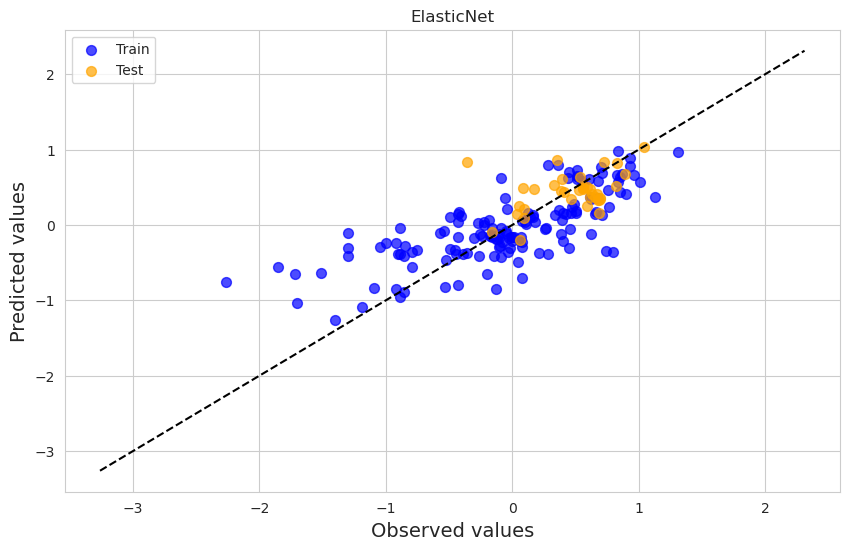

In [25]:
test_utils.display_score(ElasticNet(**study.best_params, random_state=0, max_iter=100000), X_full_train, y_full_train, X_full_test, y_full_test)
display(plot_optimization_history(study))

rr = ElasticNet(**study.best_params, random_state=0, max_iter=100000).fit(X_full_train, y_full_train)
y_full_train_pred = rr.predict(X_full_train)
y_full_test_pred = rr.predict(X_full_test)

test_utils.display_graph(rr, X_full_train, X_full_test, y_full_train, y_full_test)

# Ionizable

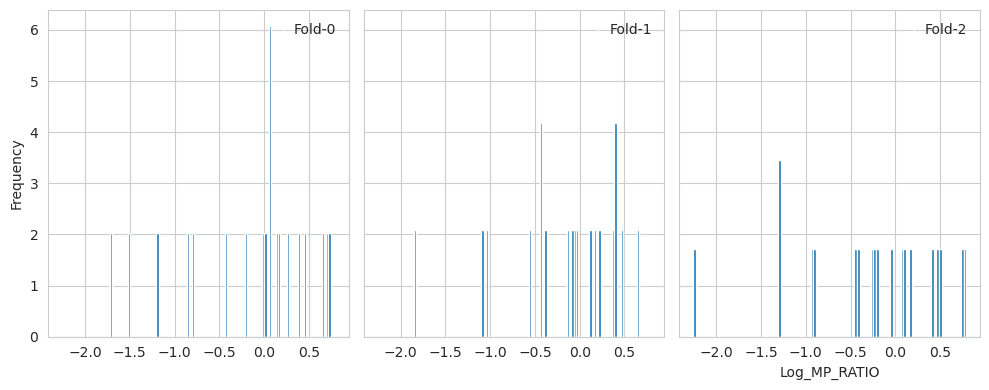

Scores: 
	R2				:	 0.7716500789423435 
	CV train		:	 -1.9451061731634642 
	Custom CV train	:	 -1.183618144578109 
	Q2				:	 0.2593798770428798


In [26]:
test_utils = utils.Utils(ionizable_train)
test_utils.create_cv_folds(display=True)
test_utils.display_score(ElasticNet(max_iter=100000, random_state=0), X_ionizable_train, y_ionizable_train, X_ionizable_test, y_ionizable_test)

In [27]:
def objective(trial):
    alpha = trial.suggest_float('alpha', 1e-10, 1e10, log=True)

    l1_ratio = trial.suggest_float('l1_ratio', 1e-10, 1, log=True)


    clf = ElasticNet(max_iter=100000, alpha=alpha, l1_ratio=l1_ratio, random_state=0)

    # n_ft = trial.suggest_int('n_ft', 1, 10, log=True)
    # clf = RFE(Ridge(max_iter=100000, alpha=alpha, solver=solver), n_features_to_select=n_ft)

    estimator = utils.Utils(ionizable_train)
    return estimator.cross_value_score(clf)


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000, n_jobs=-1, show_progress_bar=True)
trial = study.best_trial
print(trial.value, trial.params)

[I 2023-06-16 17:24:08,939] A new study created in memory with name: no-name-5138d2a8-9db9-41d8-a66f-c67d4c9dd6c3


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2023-06-16 17:24:09,663] Trial 1 finished with value: -0.011296077930571117 and parameters: {'alpha': 27567208.021340236, 'l1_ratio': 4.4305548179649205e-10}. Best is trial 1 with value: -0.011296077930571117.
[I 2023-06-16 17:24:09,686] Trial 0 finished with value: -0.0010098328195528028 and parameters: {'alpha': 9142185.485605113, 'l1_ratio': 5.109538206466568e-08}. Best is trial 0 with value: -0.0010098328195528028.
[I 2023-06-16 17:24:09,701] Trial 7 finished with value: -3.8565105649207716 and parameters: {'alpha': 1.4420922988194e-09, 'l1_ratio': 7.76116279408315e-09}. Best is trial 0 with value: -0.0010098328195528028.
[I 2023-06-16 17:24:09,714] Trial 2 finished with value: 0.034777071152314355 and parameters: {'alpha': 2329791.274049727, 'l1_ratio': 1.0759711173764234e-06}. Best is trial 2 with value: 0.034777071152314355.
[I 2023-06-16 17:24:09,810] Trial 6 finished with value: 0.00400445733287047 and parameters: {'alpha': 7068604.42085936, 'l1_ratio': 1.2185801368304706e-

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.412e+00, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.624e-03, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.284e-02, tolerance: 1.698e-03

/home/p

[I 2023-06-16 17:25:09,283] Trial 24 finished with value: -2.848030811338504 and parameters: {'alpha': 0.1108185321454185, 'l1_ratio': 7.177566964256932e-07}. Best is trial 2 with value: 0.034777071152314355.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.293e-03, tolerance: 1.853e-03



[I 2023-06-16 17:25:10,932] Trial 16 finished with value: -4.291153282973293 and parameters: {'alpha': 0.03379627834873732, 'l1_ratio': 3.55621484685193e-06}. Best is trial 2 with value: 0.034777071152314355.
[I 2023-06-16 17:25:11,259] Trial 28 finished with value: -0.004422367170267967 and parameters: {'alpha': 2822555.0032727816, 'l1_ratio': 3.5469359369904097e-05}. Best is trial 2 with value: 0.034777071152314355.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.810e-02, tolerance: 1.853e-03



[I 2023-06-16 17:25:13,411] Trial 23 finished with value: -2.3450855727979247 and parameters: {'alpha': 0.5077651189249919, 'l1_ratio': 2.8336975123352988e-06}. Best is trial 2 with value: 0.034777071152314355.
[I 2023-06-16 17:25:13,625] Trial 30 finished with value: -0.010017020368572993 and parameters: {'alpha': 256190633.68274435, 'l1_ratio': 6.718426989245284e-07}. Best is trial 2 with value: 0.034777071152314355.
[I 2023-06-16 17:25:14,012] Trial 31 finished with value: 0.053483421678251264 and parameters: {'alpha': 263443.059893136, 'l1_ratio': 4.839991624549378e-09}. Best is trial 31 with value: 0.053483421678251264.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.817e-01, tolerance: 1.853e-03



[I 2023-06-16 17:25:14,444] Trial 3 finished with value: -1.5024784592876343 and parameters: {'alpha': 40.88548428964667, 'l1_ratio': 1.3446015712056137e-10}. Best is trial 31 with value: 0.053483421678251264.
[I 2023-06-16 17:25:14,768] Trial 32 finished with value: 0.0028281042727549277 and parameters: {'alpha': 85684.31097311463, 'l1_ratio': 5.6942087222747785e-09}. Best is trial 31 with value: 0.053483421678251264.
[I 2023-06-16 17:25:15,020] Trial 34 finished with value: -0.009665043638839244 and parameters: {'alpha': 745965109.9945296, 'l1_ratio': 2.135819884611595e-09}. Best is trial 31 with value: 0.053483421678251264.
[I 2023-06-16 17:25:15,275] Trial 35 finished with value: 0.06709256597835896 and parameters: {'alpha': 693165.6779317335, 'l1_ratio': 2.4564795179285705e-07}. Best is trial 35 with value: 0.06709256597835896.
[I 2023-06-16 17:25:15,740] Trial 36 finished with value: 0.05606006278211684 and parameters: {'alpha': 286212.191803656, 'l1_ratio': 1.5973254785201706e-0

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.027e+00, tolerance: 1.853e-03



[I 2023-06-16 17:25:16,599] Trial 12 finished with value: -1.2141451954744273 and parameters: {'alpha': 172.97438320588617, 'l1_ratio': 1.6837770168552544e-06}. Best is trial 35 with value: 0.06709256597835896.
[I 2023-06-16 17:25:16,767] Trial 39 finished with value: 0.06055107847553017 and parameters: {'alpha': 1071147.8646316074, 'l1_ratio': 1.4155320102667395e-07}. Best is trial 35 with value: 0.06709256597835896.
[I 2023-06-16 17:25:16,910] Trial 40 finished with value: 0.061120846503111746 and parameters: {'alpha': 1044810.6287997868, 'l1_ratio': 1.3704428377199852e-07}. Best is trial 35 with value: 0.06709256597835896.
[I 2023-06-16 17:25:17,033] Trial 41 finished with value: -0.01193016511916234 and parameters: {'alpha': 52500028.28797724, 'l1_ratio': 2.524267410652477e-07}. Best is trial 35 with value: 0.06709256597835896.
[I 2023-06-16 17:25:17,186] Trial 42 finished with value: -0.012010942818341697 and parameters: {'alpha': 44041701.62240472, 'l1_ratio': 1.6626412120320204e

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.358e-02, tolerance: 1.853e-03



[I 2023-06-16 17:25:18,384] Trial 22 finished with value: -2.2860388668434224 and parameters: {'alpha': 0.1952426778863631, 'l1_ratio': 1.7482663732970794e-06}. Best is trial 44 with value: 0.06755068102388358.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.316e-03, tolerance: 1.853e-03



[I 2023-06-16 17:25:20,227] Trial 37 finished with value: -0.2116932215842501 and parameters: {'alpha': 7490.024972869381, 'l1_ratio': 1.1072380798926924e-07}. Best is trial 44 with value: 0.06755068102388358.
[I 2023-06-16 17:25:20,367] Trial 47 finished with value: 0.059313164684552944 and parameters: {'alpha': 1135137.0305557305, 'l1_ratio': 2.8064667691802993e-08}. Best is trial 44 with value: 0.06755068102388358.
[I 2023-06-16 17:25:20,372] Trial 21 finished with value: -3.4891438028075594 and parameters: {'alpha': 0.06097849457931243, 'l1_ratio': 1.115031353381659e-06}. Best is trial 44 with value: 0.06755068102388358.
[I 2023-06-16 17:25:20,686] Trial 49 finished with value: 0.04662710001505984 and parameters: {'alpha': 1743623.608477369, 'l1_ratio': 2.4554527245449037e-08}. Best is trial 44 with value: 0.06755068102388358.
[I 2023-06-16 17:25:20,716] Trial 48 finished with value: 0.05988551720749913 and parameters: {'alpha': 1108436.980642522, 'l1_ratio': 3.3329527771930744e-08

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.511e-02, tolerance: 1.853e-03



[I 2023-06-16 17:25:25,496] Trial 26 finished with value: -2.9522591851309383 and parameters: {'alpha': 1.4984987135335868, 'l1_ratio': 1.2514570051220672e-06}. Best is trial 44 with value: 0.06755068102388358.
[I 2023-06-16 17:25:25,667] Trial 52 finished with value: -0.004352549004563315 and parameters: {'alpha': 11440377.527970143, 'l1_ratio': 1.3576222848138754e-08}. Best is trial 44 with value: 0.06755068102388358.
[I 2023-06-16 17:25:25,877] Trial 53 finished with value: 0.06767113932168241 and parameters: {'alpha': 555218.7296897447, 'l1_ratio': 4.6139731042874166e-08}. Best is trial 53 with value: 0.06767113932168241.
[I 2023-06-16 17:25:27,549] Trial 46 finished with value: -0.3744606573161654 and parameters: {'alpha': 3978.72031730804, 'l1_ratio': 2.5587411642617988e-08}. Best is trial 53 with value: 0.06767113932168241.
[I 2023-06-16 17:25:28,011] Trial 45 finished with value: -0.3103462290001178 and parameters: {'alpha': 4957.894573899797, 'l1_ratio': 3.437267613478829e-08}

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.503e-01, tolerance: 1.698e-03



[I 2023-06-16 17:25:31,761] Trial 51 finished with value: -0.3071428742533792 and parameters: {'alpha': 5016.794280458169, 'l1_ratio': 1.5494781676494332e-08}. Best is trial 53 with value: 0.06767113932168241.
[I 2023-06-16 17:25:33,174] Trial 63 finished with value: -0.039970666754965335 and parameters: {'alpha': 37122.84398502541, 'l1_ratio': 8.97598041162982e-09}. Best is trial 53 with value: 0.06767113932168241.
[I 2023-06-16 17:25:33,354] Trial 64 finished with value: -0.010555762082375075 and parameters: {'alpha': 222452913.40424493, 'l1_ratio': 5.923467808201554e-10}. Best is trial 53 with value: 0.06767113932168241.
[I 2023-06-16 17:25:33,733] Trial 54 finished with value: -0.1891757340660971 and parameters: {'alpha': 8413.915708294, 'l1_ratio': 6.097972931917394e-10}. Best is trial 53 with value: 0.06767113932168241.
[I 2023-06-16 17:25:34,038] Trial 66 finished with value: 0.05186496864246518 and parameters: {'alpha': 251408.22935751354, 'l1_ratio': 5.5300785586383884e-08}. B

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.911e-01, tolerance: 1.698e-03



[I 2023-06-16 17:25:49,465] Trial 43 finished with value: -0.749977810626106 and parameters: {'alpha': 1370.5437075713494, 'l1_ratio': 2.5876171596770184e-07}. Best is trial 53 with value: 0.06767113932168241.
[I 2023-06-16 17:25:49,605] Trial 68 finished with value: 0.06486554423830242 and parameters: {'alpha': 864710.5469885414, 'l1_ratio': 7.727404032288482e-09}. Best is trial 53 with value: 0.06767113932168241.
[I 2023-06-16 17:25:49,719] Trial 69 finished with value: -0.009252045369155137 and parameters: {'alpha': 18447539.92531929, 'l1_ratio': 5.797581619137227e-08}. Best is trial 53 with value: 0.06767113932168241.
[I 2023-06-16 17:25:49,825] Trial 70 finished with value: 0.018568375371639873 and parameters: {'alpha': 4038915.663418039, 'l1_ratio': 2.5294989729395184e-09}. Best is trial 53 with value: 0.06767113932168241.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.416e+00, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.530e+00, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.557e-01, tolerance: 2.114e-03

/home/p

[I 2023-06-16 17:26:12,278] Trial 27 finished with value: -2.509483538204112 and parameters: {'alpha': 7.764337450558945, 'l1_ratio': 3.5555661900260973e-09}. Best is trial 53 with value: 0.06767113932168241.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+00, tolerance: 1.853e-03



[I 2023-06-16 17:26:12,789] Trial 29 finished with value: -1.4193516341799033 and parameters: {'alpha': 52.14749898866279, 'l1_ratio': 4.7320692284445394e-07}. Best is trial 53 with value: 0.06767113932168241.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.629e-02, tolerance: 1.853e-03



[I 2023-06-16 17:26:22,945] Trial 67 finished with value: -0.8980096909468468 and parameters: {'alpha': 879.5418822789796, 'l1_ratio': 6.311700371536794e-08}. Best is trial 53 with value: 0.06767113932168241.
[I 2023-06-16 17:26:24,372] Trial 74 finished with value: -0.034455324889440885 and parameters: {'alpha': 41184.03220793626, 'l1_ratio': 5.549512562578129e-09}. Best is trial 53 with value: 0.06767113932168241.
[I 2023-06-16 17:26:24,745] Trial 75 finished with value: 0.039488303572486706 and parameters: {'alpha': 183297.84088564367, 'l1_ratio': 1.302719609306635e-08}. Best is trial 53 with value: 0.06767113932168241.
[I 2023-06-16 17:26:25,029] Trial 76 finished with value: 0.061936775982102565 and parameters: {'alpha': 1013629.2364495056, 'l1_ratio': 9.431547268653654e-09}. Best is trial 53 with value: 0.06767113932168241.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.897e+00, tolerance: 1.853e-03



[I 2023-06-16 17:26:29,321] Trial 65 finished with value: -0.9658585566189066 and parameters: {'alpha': 695.6274060546805, 'l1_ratio': 5.391173179224762e-08}. Best is trial 53 with value: 0.06767113932168241.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.756e+00, tolerance: 1.853e-03



[I 2023-06-16 17:26:29,770] Trial 78 finished with value: 0.0628522986208756 and parameters: {'alpha': 969334.0318787053, 'l1_ratio': 7.2271119609223915e-09}. Best is trial 53 with value: 0.06767113932168241.
[I 2023-06-16 17:26:29,906] Trial 57 finished with value: -1.0594168357147604 and parameters: {'alpha': 472.34637298789823, 'l1_ratio': 3.092817145124805e-07}. Best is trial 53 with value: 0.06767113932168241.
[I 2023-06-16 17:26:30,058] Trial 79 finished with value: 0.011464609478371357 and parameters: {'alpha': 5181076.057970047, 'l1_ratio': 8.385690825553886e-09}. Best is trial 53 with value: 0.06767113932168241.
[I 2023-06-16 17:26:30,355] Trial 80 finished with value: 0.018066119277764876 and parameters: {'alpha': 4105058.008264111, 'l1_ratio': 7.918573945244756e-09}. Best is trial 53 with value: 0.06767113932168241.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.441e+00, tolerance: 1.853e-03



[I 2023-06-16 17:26:31,975] Trial 55 finished with value: -0.8927149418235852 and parameters: {'alpha': 894.8690188710135, 'l1_ratio': 8.936454363257322e-10}. Best is trial 53 with value: 0.06767113932168241.
[I 2023-06-16 17:26:32,376] Trial 83 finished with value: 0.06393904448241639 and parameters: {'alpha': 392640.52047277085, 'l1_ratio': 2.5673065639711883e-10}. Best is trial 53 with value: 0.06767113932168241.
[I 2023-06-16 17:26:33,635] Trial 82 finished with value: -0.05219260802873497 and parameters: {'alpha': 29893.773856478118, 'l1_ratio': 2.389782041660644e-10}. Best is trial 53 with value: 0.06767113932168241.
[I 2023-06-16 17:26:34,117] Trial 81 finished with value: -0.08209855471301182 and parameters: {'alpha': 19446.734215514247, 'l1_ratio': 2.529189224937482e-10}. Best is trial 53 with value: 0.06767113932168241.
[I 2023-06-16 17:26:34,176] Trial 85 finished with value: 0.065288257183639 and parameters: {'alpha': 425715.7511623788, 'l1_ratio': 2.6601379784106353e-10}. 

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.444e+00, tolerance: 1.698e-03



[I 2023-06-16 17:26:36,567] Trial 96 finished with value: 0.01663931074431387 and parameters: {'alpha': 4307977.291933473, 'l1_ratio': 4.382126488283272e-09}. Best is trial 53 with value: 0.06767113932168241.
[I 2023-06-16 17:26:36,825] Trial 97 finished with value: 0.030130495553588005 and parameters: {'alpha': 2825870.845180258, 'l1_ratio': 1.0130512463857631e-10}. Best is trial 53 with value: 0.06767113932168241.
[I 2023-06-16 17:26:37,201] Trial 98 finished with value: 0.06751056380775496 and parameters: {'alpha': 529983.4996740213, 'l1_ratio': 3.0970066077256452e-09}. Best is trial 53 with value: 0.06767113932168241.
[I 2023-06-16 17:26:37,335] Trial 99 finished with value: 0.0650887442290415 and parameters: {'alpha': 420202.33648897667, 'l1_ratio': 1.5324575911184236e-09}. Best is trial 53 with value: 0.06767113932168241.
[I 2023-06-16 17:26:37,522] Trial 93 finished with value: -0.001707924848566041 and parameters: {'alpha': 78347.9837979197, 'l1_ratio': 1.4503953527293788e-09}.

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.959e+00, tolerance: 1.853e-03



[I 2023-06-16 17:26:38,831] Trial 62 finished with value: -1.049391892799418 and parameters: {'alpha': 494.961379065809, 'l1_ratio': 8.978955466229593e-09}. Best is trial 53 with value: 0.06767113932168241.
[I 2023-06-16 17:26:38,893] Trial 101 finished with value: 0.005424151545247151 and parameters: {'alpha': 90190.26576160216, 'l1_ratio': 1.5390822871764503e-09}. Best is trial 53 with value: 0.06767113932168241.
[I 2023-06-16 17:26:39,013] Trial 104 finished with value: 0.03351486961304784 and parameters: {'alpha': 2559336.906189516, 'l1_ratio': 3.789147023708102e-09}. Best is trial 53 with value: 0.06767113932168241.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.172e+00, tolerance: 1.698e-03



[I 2023-06-16 17:26:39,385] Trial 106 finished with value: 0.04011910370843145 and parameters: {'alpha': 2114373.3403137275, 'l1_ratio': 3.223441356873363e-09}. Best is trial 53 with value: 0.06767113932168241.
[I 2023-06-16 17:26:39,463] Trial 105 finished with value: 0.06725570483150851 and parameters: {'alpha': 508675.24039753695, 'l1_ratio': 3.1031795518280872e-09}. Best is trial 53 with value: 0.06767113932168241.
[I 2023-06-16 17:26:39,662] Trial 107 finished with value: 0.06765808915511118 and parameters: {'alpha': 547088.1518143243, 'l1_ratio': 9.497537323841918e-10}. Best is trial 53 with value: 0.06767113932168241.
[I 2023-06-16 17:26:39,701] Trial 103 finished with value: 0.005478138283521912 and parameters: {'alpha': 90287.27751999361, 'l1_ratio': 3.457661790303856e-09}. Best is trial 53 with value: 0.06767113932168241.
[I 2023-06-16 17:26:40,010] Trial 108 finished with value: 0.06666825662806293 and parameters: {'alpha': 475146.3547236294, 'l1_ratio': 8.272929001276665e-1

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.705e+00, tolerance: 1.698e-03



[I 2023-06-16 17:26:50,756] Trial 138 finished with value: 0.06780476579517958 and parameters: {'alpha': 578342.7747351122, 'l1_ratio': 5.558290435880668e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:26:50,971] Trial 139 finished with value: 0.06351852397421998 and parameters: {'alpha': 936427.0988440042, 'l1_ratio': 6.392108589712782e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:26:51,478] Trial 136 finished with value: -0.01603520973293678 and parameters: {'alpha': 59050.40733549429, 'l1_ratio': 8.843646855744148e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:26:51,486] Trial 140 finished with value: 0.06757983271686896 and parameters: {'alpha': 537141.8410067823, 'l1_ratio': 4.777111398381653e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:26:51,858] Trial 142 finished with value: 0.03062104941890072 and parameters: {'alpha': 2785361.703665338, 'l1_ratio': 4.134132486661924e-10}.

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.905e+00, tolerance: 1.853e-03



[I 2023-06-16 17:26:56,412] Trial 71 finished with value: -1.062841830869715 and parameters: {'alpha': 464.92824009529755, 'l1_ratio': 9.316795790697043e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:26:56,862] Trial 154 finished with value: -0.02769039089174456 and parameters: {'alpha': 46934.47364786738, 'l1_ratio': 2.4104504100533203e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:26:57,103] Trial 156 finished with value: -0.00916782114115274 and parameters: {'alpha': 18297690.209874492, 'l1_ratio': 1.3855881112166326e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:26:57,434] Trial 157 finished with value: 0.054950728036399665 and parameters: {'alpha': 1337226.4755052843, 'l1_ratio': 3.032826726086461e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:26:57,624] Trial 155 finished with value: -0.037574396691252475 and parameters: {'alpha': 38775.628419734305, 'l1_ratio': 4.5945790597391

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.073e+00, tolerance: 2.114e-03



[I 2023-06-16 17:27:11,034] Trial 120 finished with value: -0.4950352118702635 and parameters: {'alpha': 2766.2243273240956, 'l1_ratio': 2.0804039911099607e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:27:11,457] Trial 162 finished with value: 0.0678027470673765 and parameters: {'alpha': 577439.9944748996, 'l1_ratio': 3.1685169435544045e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:27:11,608] Trial 163 finished with value: 0.013469461490132914 and parameters: {'alpha': 4814884.852068984, 'l1_ratio': 3.0160319304266153e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:27:12,419] Trial 164 finished with value: 0.03875188398138122 and parameters: {'alpha': 180194.22917291918, 'l1_ratio': 1.6215344789500137e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:27:12,821] Trial 165 finished with value: 0.054235279935850866 and parameters: {'alpha': 1370723.3984508764, 'l1_ratio': 3.45780397480147

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.217e+00, tolerance: 1.853e-03



[I 2023-06-16 17:27:15,414] Trial 73 finished with value: -0.9431159668735857 and parameters: {'alpha': 755.0014995742251, 'l1_ratio': 9.575103451738729e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:27:15,951] Trial 175 finished with value: 0.0381744655522119 and parameters: {'alpha': 177841.74167629486, 'l1_ratio': 2.030400213227682e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:27:16,110] Trial 176 finished with value: 0.05671934762068587 and parameters: {'alpha': 1247955.1466424481, 'l1_ratio': 1.2269709993578897e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:27:16,225] Trial 177 finished with value: -0.0096251742061364 and parameters: {'alpha': 818207016.0175997, 'l1_ratio': 3.153495824870658e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:27:16,637] Trial 178 finished with value: 0.06738170941147592 and parameters: {'alpha': 524223.4489258384, 'l1_ratio': 8.229080724887438e-08}.

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.962e+00, tolerance: 2.114e-03



[I 2023-06-16 17:27:17,883] Trial 181 finished with value: 0.04819089455760713 and parameters: {'alpha': 1654607.8544970243, 'l1_ratio': 1.231890700809752e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:27:18,270] Trial 182 finished with value: 0.05304899840624958 and parameters: {'alpha': 260236.0930680423, 'l1_ratio': 5.4062621446676995e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:27:20,470] Trial 183 finished with value: -0.06314772536992282 and parameters: {'alpha': 25107.560805724497, 'l1_ratio': 4.405461073494361e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:27:22,736] Trial 151 finished with value: -0.5422579400127361 and parameters: {'alpha': 2423.083888508279, 'l1_ratio': 2.848209432781207e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:27:22,961] Trial 185 finished with value: 0.006188575629748024 and parameters: {'alpha': 6372294.171718905, 'l1_ratio': 7.704592855554015e-

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.636e+00, tolerance: 1.853e-03



[I 2023-06-16 17:27:30,602] Trial 72 finished with value: -1.120893135009286 and parameters: {'alpha': 342.0001834229945, 'l1_ratio': 1.0502037513364131e-08}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.213e-01, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.227e+00, tolerance: 1.853e-03



[I 2023-06-16 17:27:45,315] Trial 77 finished with value: -1.1892095211668674 and parameters: {'alpha': 213.34166379981917, 'l1_ratio': 8.160732678051974e-09}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.064e+00, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+00, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.650e-01, tolerance: 1.698e-03

/home/p

[I 2023-06-16 17:28:20,678] Trial 174 finished with value: -2.205071679466721 and parameters: {'alpha': 12.15705081906422, 'l1_ratio': 1.1624960738824916e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:28:20,864] Trial 208 finished with value: 0.06723164218051303 and parameters: {'alpha': 670498.0867746955, 'l1_ratio': 3.018020975718935e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:28:21,083] Trial 209 finished with value: 0.06621136694866418 and parameters: {'alpha': 489430.040703538, 'l1_ratio': 9.168226620172437e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:28:21,403] Trial 210 finished with value: 0.032878972870139335 and parameters: {'alpha': 2580037.8444950357, 'l1_ratio': 1.8400106140079015e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:28:21,894] Trial 211 finished with value: 0.025202077329751882 and parameters: {'alpha': 134448.3581768853, 'l1_ratio': 4.337572421765396e-07

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.885e+00, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.588e+00, tolerance: 1.853e-03



[I 2023-06-16 17:28:26,411] Trial 186 finished with value: -1.2857689183117536 and parameters: {'alpha': 97.68582686895842, 'l1_ratio': 2.64157238882428e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:28:26,825] Trial 214 finished with value: 0.05613737453175749 and parameters: {'alpha': 286576.5904894714, 'l1_ratio': 7.940880599559963e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:28:27,111] Trial 215 finished with value: 0.04903260118881162 and parameters: {'alpha': 1599736.4825900013, 'l1_ratio': 2.823393386516255e-07}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.124e+00, tolerance: 2.114e-03



[I 2023-06-16 17:28:28,749] Trial 216 finished with value: -0.030615174152583784 and parameters: {'alpha': 44340.96133534032, 'l1_ratio': 4.6151828577015116e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:28:29,071] Trial 217 finished with value: 0.06754843568481798 and parameters: {'alpha': 552106.1258728373, 'l1_ratio': 1.600065448315619e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:28:29,428] Trial 218 finished with value: 0.06716305176974213 and parameters: {'alpha': 511495.11972161056, 'l1_ratio': 1.5765874186799948e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:28:30,089] Trial 219 finished with value: 0.035349988719423076 and parameters: {'alpha': 166905.6266337048, 'l1_ratio': 6.959697814102587e-08}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.419e+00, tolerance: 1.853e-03



[I 2023-06-16 17:28:31,530] Trial 201 finished with value: -1.322908746371077 and parameters: {'alpha': 78.09498398796688, 'l1_ratio': 6.462177677291316e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:28:31,681] Trial 221 finished with value: 0.05598254986558038 and parameters: {'alpha': 1279450.05241847, 'l1_ratio': 1.5789432055631167e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:28:31,888] Trial 222 finished with value: 0.06627025405276506 and parameters: {'alpha': 479592.92312451365, 'l1_ratio': 6.175784809780895e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:28:34,021] Trial 213 finished with value: -3.995476640182349 and parameters: {'alpha': 0.013238732959267268, 'l1_ratio': 7.525299460125741e-08}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.861e-01, tolerance: 1.853e-03



[I 2023-06-16 17:28:34,288] Trial 224 finished with value: -0.005498260369548887 and parameters: {'alpha': 12485946.03433944, 'l1_ratio': 3.555925787836075e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:28:34,387] Trial 206 finished with value: -2.056786421069551 and parameters: {'alpha': 15.06812421235206, 'l1_ratio': 6.604943700271491e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:28:34,632] Trial 225 finished with value: 0.020746588801133486 and parameters: {'alpha': 3686401.8601259515, 'l1_ratio': 3.095068575180794e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:28:34,719] Trial 226 finished with value: 0.025755474564641483 and parameters: {'alpha': 3161655.725191979, 'l1_ratio': 2.84931222937172e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:28:35,041] Trial 227 finished with value: 0.06322369248224617 and parameters: {'alpha': 943992.5251693347, 'l1_ratio': 1.2675401972905927e-0

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.840e+00, tolerance: 1.853e-03



[I 2023-06-16 17:28:37,717] Trial 240 finished with value: 0.051242599174389 and parameters: {'alpha': 247306.96835433858, 'l1_ratio': 1.6671762290801943e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:28:37,869] Trial 184 finished with value: -1.2439018590588569 and parameters: {'alpha': 134.45445697739297, 'l1_ratio': 1.9114015722388086e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:28:38,175] Trial 243 finished with value: 0.06536752804548755 and parameters: {'alpha': 833456.9134957303, 'l1_ratio': 4.908521736604153e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:28:38,614] Trial 242 finished with value: -0.02134734600064514 and parameters: {'alpha': 53198.86790197605, 'l1_ratio': 3.718272766723699e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:28:38,859] Trial 245 finished with value: 0.006664388026633161 and parameters: {'alpha': 6264749.575020804, 'l1_ratio': 3.4547138035734675e-

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.294e-01, tolerance: 1.853e-03



[I 2023-06-16 17:28:41,286] Trial 199 finished with value: -2.386777295269801 and parameters: {'alpha': 9.344140281529953, 'l1_ratio': 2.480201803604814e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:28:41,288] Trial 253 finished with value: 0.06526006638258612 and parameters: {'alpha': 842689.2443400456, 'l1_ratio': 1.7657565680146343e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:28:41,435] Trial 241 finished with value: -2.521012105618737 and parameters: {'alpha': 4.217237838333156e-06, 'l1_ratio': 4.929311562604655e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:28:41,985] Trial 256 finished with value: 0.05616639502708428 and parameters: {'alpha': 286487.7113745644, 'l1_ratio': 9.312692164009505e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:28:42,049] Trial 255 finished with value: 0.03950327176777069 and parameters: {'alpha': 183349.80691194627, 'l1_ratio': 1.1135858212263863e-

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.311e+00, tolerance: 1.853e-03



[I 2023-06-16 17:28:48,246] Trial 207 finished with value: -1.3531876272624346 and parameters: {'alpha': 67.32333622364104, 'l1_ratio': 3.133341471384085e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:28:48,430] Trial 269 finished with value: 0.06461815577237547 and parameters: {'alpha': 878584.9573385043, 'l1_ratio': 3.611514920355676e-09}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.194e+00, tolerance: 1.853e-03



[I 2023-06-16 17:28:49,210] Trial 205 finished with value: -1.1936936088140095 and parameters: {'alpha': 205.75461313598447, 'l1_ratio': 8.301969526023858e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:28:49,678] Trial 271 finished with value: 0.034354959678820074 and parameters: {'alpha': 2498214.7968076775, 'l1_ratio': 5.355055410753562e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:28:53,301] Trial 220 finished with value: -4.020301925183382 and parameters: {'alpha': 0.014113948235209131, 'l1_ratio': 1.462860675274286e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:28:53,745] Trial 273 finished with value: 0.05997954457463606 and parameters: {'alpha': 328139.2454171649, 'l1_ratio': 5.336116057519028e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:28:54,132] Trial 274 finished with value: -0.010734881007073982 and parameters: {'alpha': 189880370.42149237, 'l1_ratio': 1.32282767765634

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.972e-02, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.227e-02, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.228e-02, tolerance: 1.698e-03

/home/p

[I 2023-06-16 17:29:14,332] Trial 223 finished with value: -4.653994723081402 and parameters: {'alpha': 0.026964817346022785, 'l1_ratio': 2.876232113449911e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:29:14,516] Trial 279 finished with value: -0.010830839637583245 and parameters: {'alpha': 24415192.9277682, 'l1_ratio': 5.259172264898741e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:29:15,183] Trial 280 finished with value: 0.06087897608658236 and parameters: {'alpha': 340168.01902166166, 'l1_ratio': 2.091474792192542e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.376e-03, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.287e-02, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.273e-02, tolerance: 2.114e-03

/home/p

[I 2023-06-16 17:29:43,251] Trial 251 finished with value: -2.941302403658604 and parameters: {'alpha': 1.342580361473922, 'l1_ratio': 9.72572960253709e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:29:43,426] Trial 282 finished with value: 0.035932259295867186 and parameters: {'alpha': 2385474.913818307, 'l1_ratio': 1.0540738015311274e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:29:44,275] Trial 283 finished with value: -0.005944530557091099 and parameters: {'alpha': 72064.62786929602, 'l1_ratio': 2.006563711905637e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:29:44,485] Trial 284 finished with value: -0.009217972097849803 and parameters: {'alpha': 42649783.008475445, 'l1_ratio': 0.36244926169513914}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:29:44,734] Trial 285 finished with value: -3.8565095310430473 and parameters: {'alpha': 7.073801349589109e-10, 'l1_ratio': 2.546444125278652

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.925e-02, tolerance: 1.853e-03



[I 2023-06-16 17:29:48,108] Trial 262 finished with value: -2.96666313131891 and parameters: {'alpha': 2.444271093534483, 'l1_ratio': 1.9656334619372434e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:29:48,383] Trial 288 finished with value: -0.009217972097849803 and parameters: {'alpha': 1721436635.0764902, 'l1_ratio': 1.9471128191551082e-06}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:29:48,770] Trial 289 finished with value: 0.06749411490038111 and parameters: {'alpha': 674790.7020201513, 'l1_ratio': 3.4851742913438127e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:29:49,055] Trial 290 finished with value: 0.000415710194904569 and parameters: {'alpha': 8480810.057434924, 'l1_ratio': 3.7775612136548766e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.343e-01, tolerance: 1.853e-03



[I 2023-06-16 17:29:49,368] Trial 270 finished with value: -2.906876927587524 and parameters: {'alpha': 3.409338439211469, 'l1_ratio': 4.956006136186592e-09}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.699e-02, tolerance: 1.853e-03



[I 2023-06-16 17:29:51,006] Trial 266 finished with value: -2.3072048082820835 and parameters: {'alpha': 0.48173428181871525, 'l1_ratio': 1.2391521904161525e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:29:51,187] Trial 291 finished with value: -0.055134100081222916 and parameters: {'alpha': 28470.85581740185, 'l1_ratio': 6.953613101621128e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:29:53,788] Trial 292 finished with value: -0.07809410734638977 and parameters: {'alpha': 20433.78669476278, 'l1_ratio': 1.3130462774193538e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:29:54,656] Trial 294 finished with value: 0.05125205592076543 and parameters: {'alpha': 246881.9239628452, 'l1_ratio': 3.583716955251674e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:29:55,244] Trial 295 finished with value: 0.04972367987756284 and parameters: {'alpha': 236631.9769906314, 'l1_ratio': 1.978916958688839

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.912e-02, tolerance: 1.853e-03



[I 2023-06-16 17:29:56,945] Trial 278 finished with value: -2.1259741143170707 and parameters: {'alpha': 0.3049903552834001, 'l1_ratio': 2.5168802342866746e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:29:57,714] Trial 303 finished with value: 0.009407951778563314 and parameters: {'alpha': 97612.80518097788, 'l1_ratio': 4.3381037335285345e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:29:57,893] Trial 305 finished with value: 0.0670648870593858 and parameters: {'alpha': 716057.7753692212, 'l1_ratio': 3.3278031535115707e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:29:57,960] Trial 304 finished with value: -0.0021335894559217916 and parameters: {'alpha': 77702.16867992489, 'l1_ratio': 3.104753100980762e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:29:57,963] Trial 293 finished with value: -0.08962784659522512 and parameters: {'alpha': 17820.485637469952, 'l1_ratio': 5.0638050691769

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.899e-02, tolerance: 1.853e-03



[I 2023-06-16 17:29:58,269] Trial 307 finished with value: -0.011968741685072448 and parameters: {'alpha': 65540066.420595214, 'l1_ratio': 5.6737956070154916e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:29:58,364] Trial 277 finished with value: -2.9393004344805855 and parameters: {'alpha': 1.3237145767543965, 'l1_ratio': 2.2038792130934996e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:29:58,439] Trial 306 finished with value: 0.062363604921894 and parameters: {'alpha': 363540.73825950746, 'l1_ratio': 5.158344518631049e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:29:58,500] Trial 308 finished with value: 0.062258881046092375 and parameters: {'alpha': 362010.9396738923, 'l1_ratio': 7.17476830197874e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:29:58,837] Trial 309 finished with value: 0.06140575906281535 and parameters: {'alpha': 347797.84493475803, 'l1_ratio': 8.844162741332882e

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.753e-02, tolerance: 2.114e-03



[I 2023-06-16 17:30:03,280] Trial 326 finished with value: -1.0457939007251043 and parameters: {'alpha': 6.076493834930072e-05, 'l1_ratio': 3.0770683220693534e-08}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.124e-01, tolerance: 1.853e-03



[I 2023-06-16 17:30:03,616] Trial 272 finished with value: -2.9530121248178696 and parameters: {'alpha': 2.8049784819902928, 'l1_ratio': 3.732603466849644e-09}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.866e-03, tolerance: 1.698e-03



[I 2023-06-16 17:30:04,712] Trial 327 finished with value: -0.01447482353917077 and parameters: {'alpha': 60885.502908024435, 'l1_ratio': 1.1302144962090405e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:30:04,867] Trial 329 finished with value: 0.02729459656321061 and parameters: {'alpha': 3064892.121859428, 'l1_ratio': 4.6937595232294405e-08}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.073e-03, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.587e-03, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.283e-01, tolerance: 1.698e-03

/home/p

[I 2023-06-16 17:30:25,954] Trial 281 finished with value: -2.8172848464718965 and parameters: {'alpha': 0.9337125445118432, 'l1_ratio': 2.166361712212602e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:30:26,150] Trial 331 finished with value: -0.010065809556867089 and parameters: {'alpha': 377001360.1679699, 'l1_ratio': 1.3655719258890627e-09}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.142e-03, tolerance: 1.698e-03



[I 2023-06-16 17:30:26,993] Trial 332 finished with value: 0.04420842955744934 and parameters: {'alpha': 205166.036990059, 'l1_ratio': 5.274989673368576e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:30:27,341] Trial 333 finished with value: 0.06772441423516821 and parameters: {'alpha': 638833.7612499618, 'l1_ratio': 1.0260489309440783e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:30:27,689] Trial 334 finished with value: 0.06779857336800184 and parameters: {'alpha': 575800.2759656967, 'l1_ratio': 1.0958191912869091e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:30:27,969] Trial 335 finished with value: 0.004738513232801426 and parameters: {'alpha': 6840336.398040811, 'l1_ratio': 2.1902368778109954e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:30:30,557] Trial 336 finished with value: -3.0573084196422715 and parameters: {'alpha': 0.0025323896740039363, 'l1_ratio': 1.645241966421806

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.972e-03, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.805e-03, tolerance: 2.114e-03



[I 2023-06-16 17:30:39,859] Trial 338 finished with value: -0.22526513023480754 and parameters: {'alpha': 7023.18246146598, 'l1_ratio': 4.770766144249188e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:30:41,150] Trial 339 finished with value: -0.03738561422404244 and parameters: {'alpha': 38959.70060212014, 'l1_ratio': 1.341271805454168e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:30:41,346] Trial 340 finished with value: 0.06744931892083927 and parameters: {'alpha': 680268.4072073847, 'l1_ratio': 1.2268427479788256e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:30:41,747] Trial 341 finished with value: 0.04711964859490373 and parameters: {'alpha': 220822.0705102817, 'l1_ratio': 1.1315157906933152e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:30:42,015] Trial 342 finished with value: 0.024720980205670113 and parameters: {'alpha': 3323209.40231815, 'l1_ratio': 8.011694108441186e-10

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.803e-01, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.791e-01, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.378e-02, tolerance: 1.853e-03



[I 2023-06-16 17:30:44,366] Trial 287 finished with value: -2.271378086814556 and parameters: {'alpha': 0.19895411573178048, 'l1_ratio': 3.2946718114190273e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:30:44,730] Trial 345 finished with value: 0.03785038092882753 and parameters: {'alpha': 177450.55477726145, 'l1_ratio': 9.944313167925213e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:30:45,000] Trial 346 finished with value: 0.058494925003515975 and parameters: {'alpha': 1174388.164265057, 'l1_ratio': 5.810926497810038e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:30:45,182] Trial 347 finished with value: 0.0268697582140676 and parameters: {'alpha': 3113270.2923070192, 'l1_ratio': 1.5470817148556221e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:30:45,456] Trial 348 finished with value: -0.011443369787502192 and parameters: {'alpha': 109493757.970298, 'l1_ratio': 3.051158242631867e

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.427e-03, tolerance: 2.114e-03



[I 2023-06-16 17:30:47,984] Trial 349 finished with value: -0.02218686269643544 and parameters: {'alpha': 52283.6021634073, 'l1_ratio': 1.0887736118790796e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:30:48,479] Trial 350 finished with value: 0.06674926761567727 and parameters: {'alpha': 479020.8031012442, 'l1_ratio': 8.391464922963808e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:30:48,840] Trial 351 finished with value: 0.06251171335026107 and parameters: {'alpha': 986198.0850947632, 'l1_ratio': 4.072107627749521e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:30:49,722] Trial 352 finished with value: 0.04250552359550186 and parameters: {'alpha': 196825.17611653786, 'l1_ratio': 4.061165111741587e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:30:49,938] Trial 353 finished with value: 0.004267501841302017 and parameters: {'alpha': 6990220.248947232, 'l1_ratio': 1.0343768784747256e-1

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.742e-03, tolerance: 1.853e-03



[I 2023-06-16 17:30:57,803] Trial 317 finished with value: -2.7061523645716186 and parameters: {'alpha': 0.12788897547893, 'l1_ratio': 7.4393968351017695e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:30:57,956] Trial 360 finished with value: -0.10148130352149227 and parameters: {'alpha': 15740.381439352035, 'l1_ratio': 7.709864568488483e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:30:58,198] Trial 361 finished with value: 0.029861300233720505 and parameters: {'alpha': 2848262.412274337, 'l1_ratio': 6.975931291953457e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.231e+00, tolerance: 1.853e-03



[I 2023-06-16 17:31:00,258] Trial 328 finished with value: -0.9757832329417666 and parameters: {'alpha': 670.4498344027675, 'l1_ratio': 1.2248579086671447e-09}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.662e-01, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.056e-01, tolerance: 1.853e-03



[I 2023-06-16 17:31:02,768] Trial 325 finished with value: -1.5546271480109182 and parameters: {'alpha': 35.994545362433996, 'l1_ratio': 1.2699778970407489e-09}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.523e-03, tolerance: 1.853e-03



[I 2023-06-16 17:31:03,835] Trial 330 finished with value: -3.015016805584427 and parameters: {'alpha': 0.09292776366412371, 'l1_ratio': 6.60681445940684e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:31:04,054] Trial 366 finished with value: 0.06043884659487094 and parameters: {'alpha': 901839.2299908533, 'l1_ratio': 3.3807305757386036e-06}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.848e-01, tolerance: 1.853e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.092e-02, tolerance: 1.853e-03



[I 2023-06-16 17:31:04,262] Trial 301 finished with value: -1.6571260901920233 and parameters: {'alpha': 28.990360498459175, 'l1_ratio': 4.364577837434549e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:31:04,314] Trial 322 finished with value: -2.5547493174474365 and parameters: {'alpha': 0.1477600181755086, 'l1_ratio': 7.3586656325096275e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:31:04,351] Trial 367 finished with value: 0.06369336263617487 and parameters: {'alpha': 387546.1121396005, 'l1_ratio': 3.0688396317800494e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:31:05,322] Trial 370 finished with value: 0.01948067508666551 and parameters: {'alpha': 119397.93477666793, 'l1_ratio': 2.726367993345145e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:31:14,234] Trial 368 finished with value: -0.24741134911746107 and parameters: {'alpha': 6359.874724963126, 'l1_ratio': 3.5196983180264684

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.278e-01, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.865e-03, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.007e+00, tolerance: 1.698e-03



[I 2023-06-16 17:31:21,513] Trial 378 finished with value: -0.03763626142808781 and parameters: {'alpha': 38776.56013365861, 'l1_ratio': 4.560389023911153e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:31:21,705] Trial 379 finished with value: 0.048348241391149384 and parameters: {'alpha': 1656308.3071579973, 'l1_ratio': 4.728138140115664e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:31:21,904] Trial 380 finished with value: -0.009217972097849803 and parameters: {'alpha': 524607349.69021016, 'l1_ratio': 1.6272894417411288e-06}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:31:22,018] Trial 381 finished with value: 0.01100996136086363 and parameters: {'alpha': 4947993.077524042, 'l1_ratio': 8.912693889294404e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:31:22,218] Trial 382 finished with value: 0.0676784710079004 and parameters: {'alpha': 560535.2492636895, 'l1_ratio': 6.931491783228862e

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.255e-03, tolerance: 1.698e-03



[I 2023-06-16 17:31:28,278] Trial 369 finished with value: -0.5545477043699476 and parameters: {'alpha': 2342.081829922394, 'l1_ratio': 2.5101608179582863e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:31:28,932] Trial 384 finished with value: 0.024043994239420496 and parameters: {'alpha': 131104.54003663984, 'l1_ratio': 3.7407932615732567e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:31:29,211] Trial 385 finished with value: 0.06627345640233928 and parameters: {'alpha': 460292.0594689745, 'l1_ratio': 6.507073737687885e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:31:31,304] Trial 386 finished with value: -2.3734388060720617 and parameters: {'alpha': 0.0007076691132088723, 'l1_ratio': 1.0942984848059216e-08}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.315e+00, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.644e-01, tolerance: 1.853e-03



[I 2023-06-16 17:31:38,239] Trial 344 finished with value: -1.5129594514238147 and parameters: {'alpha': 39.78903289487904, 'l1_ratio': 9.266603943347669e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:31:38,660] Trial 388 finished with value: 0.06505388638010097 and parameters: {'alpha': 854487.0256485477, 'l1_ratio': 2.084514098610658e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:31:39,017] Trial 389 finished with value: -0.011808558077662198 and parameters: {'alpha': 33583325.2285764, 'l1_ratio': 2.476726376860248e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.860e-02, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.190e-03, tolerance: 2.114e-03



[I 2023-06-16 17:31:40,993] Trial 390 finished with value: -0.012039014456542318 and parameters: {'alpha': 63889.388497182794, 'l1_ratio': 1.6586730215002264e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.358e+00, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.885e-03, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.482e-01, tolerance: 1.698e-03

/home/p

[I 2023-06-16 17:32:02,667] Trial 362 finished with value: -0.99093011157342 and parameters: {'alpha': 632.6927239456629, 'l1_ratio': 2.4484323498033588e-08}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.357e-03, tolerance: 1.853e-03



[I 2023-06-16 17:32:04,365] Trial 363 finished with value: -3.812844944122106 and parameters: {'alpha': 0.04782788052833057, 'l1_ratio': 1.9898331314461094e-06}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:32:04,505] Trial 393 finished with value: 0.030196272732689915 and parameters: {'alpha': 2805083.1972660874, 'l1_ratio': 8.926269782528814e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:32:05,259] Trial 394 finished with value: 0.06054981529297173 and parameters: {'alpha': 335628.4031623019, 'l1_ratio': 1.0278513512286177e-09}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.322e-03, tolerance: 1.853e-03



[I 2023-06-16 17:32:06,633] Trial 364 finished with value: -3.4865591587046687 and parameters: {'alpha': 0.06109520991147806, 'l1_ratio': 2.6996823378795245e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:32:06,849] Trial 396 finished with value: -0.009217972097849803 and parameters: {'alpha': 13316249.010806141, 'l1_ratio': 7.555754166387449e-05}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:32:07,020] Trial 397 finished with value: -0.011177771670721018 and parameters: {'alpha': 127526049.08403903, 'l1_ratio': 4.631970116117063e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:32:07,173] Trial 398 finished with value: 0.05463485378829162 and parameters: {'alpha': 1352081.9839171043, 'l1_ratio': 4.960405871151061e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:32:07,496] Trial 399 finished with value: 0.041007951824639455 and parameters: {'alpha': 189923.89351622123, 'l1_ratio': 4.3142168421

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.522e-01, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.163e-01, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.851e-01, tolerance: 1.853e-03



[I 2023-06-16 17:32:18,607] Trial 375 finished with value: -2.776076304159275 and parameters: {'alpha': 4.845864956925162, 'l1_ratio': 2.192545013686844e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:32:18,986] Trial 403 finished with value: -0.05598310108416593 and parameters: {'alpha': 20877.884159627498, 'l1_ratio': 0.0003633395523908245}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.750e+00, tolerance: 1.853e-03



[I 2023-06-16 17:32:19,560] Trial 371 finished with value: -1.098308688396379 and parameters: {'alpha': 388.53784321817375, 'l1_ratio': 4.112196510871656e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:32:19,950] Trial 404 finished with value: 0.02429772829315761 and parameters: {'alpha': 131768.07540170796, 'l1_ratio': 9.90635621716279e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.828e+00, tolerance: 1.853e-03



[I 2023-06-16 17:32:21,513] Trial 383 finished with value: -1.0795001980240702 and parameters: {'alpha': 428.53513168910706, 'l1_ratio': 2.7378457638938345e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:32:21,652] Trial 407 finished with value: 0.052331560696828316 and parameters: {'alpha': 1427008.9052683073, 'l1_ratio': 4.807251068675705e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:32:21,789] Trial 408 finished with value: -0.009217972097849803 and parameters: {'alpha': 5101883135.208477, 'l1_ratio': 0.041465699092758615}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:32:21,959] Trial 409 finished with value: 0.06227251620201905 and parameters: {'alpha': 363086.82798819616, 'l1_ratio': 1.4681017829785724e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:32:22,093] Trial 410 finished with value: -3.8565971637355303 and parameters: {'alpha': 1.5289980741938628e-08, 'l1_ratio': 7.2781421704

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.590e-01, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.268e+00, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.710e+00, tolerance: 1.853e-03



[I 2023-06-16 17:32:33,426] Trial 391 finished with value: -0.9651920818141498 and parameters: {'alpha': 697.315044762292, 'l1_ratio': 7.878419837596468e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:32:34,107] Trial 416 finished with value: 0.03668681776346805 and parameters: {'alpha': 171922.40069996257, 'l1_ratio': 2.9091901283057085e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.211e-01, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.772e-01, tolerance: 1.853e-03



[I 2023-06-16 17:32:36,923] Trial 387 finished with value: -2.520041608103117 and parameters: {'alpha': 7.637515106841173, 'l1_ratio': 1.752827721520145e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:32:37,323] Trial 418 finished with value: 0.06272861216106596 and parameters: {'alpha': 973494.433793154, 'l1_ratio': 4.0923114194111045e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:32:37,659] Trial 419 finished with value: -0.0024502253407719574 and parameters: {'alpha': 10039312.81170199, 'l1_ratio': 5.842635973440029e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:32:37,935] Trial 417 finished with value: -2.332210398078947 and parameters: {'alpha': 5.975246061460147e-06, 'l1_ratio': 4.393443544257033e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:32:38,262] Trial 421 finished with value: -0.010697005443094154 and parameters: {'alpha': 196294284.07912302, 'l1_ratio': 5.2351291198935e

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.008e-01, tolerance: 2.114e-03



[I 2023-06-16 17:32:39,773] Trial 424 finished with value: 0.02101124804522055 and parameters: {'alpha': 2890812.888358656, 'l1_ratio': 4.427134748345235e-06}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:32:40,230] Trial 425 finished with value: 0.06443432381836274 and parameters: {'alpha': 888699.6004297986, 'l1_ratio': 8.40208620445114e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:32:40,970] Trial 426 finished with value: 0.05494583111374055 and parameters: {'alpha': 275501.3004380588, 'l1_ratio': 2.259328510892369e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:32:41,268] Trial 427 finished with value: 0.05120406801835168 and parameters: {'alpha': 1510261.3770946641, 'l1_ratio': 6.232124310885833e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:32:41,813] Trial 428 finished with value: 0.015179651945153805 and parameters: {'alpha': 109486.37650809369, 'l1_ratio': 3.250733000974288e-09}

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.992e+00, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.700e+00, tolerance: 1.698e-03



[I 2023-06-16 17:32:46,296] Trial 431 finished with value: -1.8618654202358904 and parameters: {'alpha': 0.00017279755983018157, 'l1_ratio': 1.3360571139754695e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:32:47,138] Trial 432 finished with value: -0.028525046300526286 and parameters: {'alpha': 46690.500972272384, 'l1_ratio': 5.984900612003745e-06}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.209e-01, tolerance: 2.114e-03



[I 2023-06-16 17:32:52,557] Trial 433 finished with value: -0.11781290388652332 and parameters: {'alpha': 13557.193352147731, 'l1_ratio': 7.540230373572615e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:32:52,970] Trial 434 finished with value: 0.06713303457139574 and parameters: {'alpha': 693015.4737968697, 'l1_ratio': 2.0665003421737068e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:32:53,227] Trial 435 finished with value: -0.009217972097849803 and parameters: {'alpha': 9788456184.000788, 'l1_ratio': 0.009954049699295005}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:32:53,987] Trial 436 finished with value: 0.04272496307476459 and parameters: {'alpha': 197869.38453790898, 'l1_ratio': 1.830691222992475e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.568e+00, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.213e+00, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.095e-01, tolerance: 2.114e-03

/home/p

[I 2023-06-16 17:33:02,998] Trial 392 finished with value: -2.6826485468794075 and parameters: {'alpha': 5.818314786509466, 'l1_ratio': 1.0111363102138506e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:33:03,282] Trial 438 finished with value: 0.04547466215294379 and parameters: {'alpha': 1806636.239632766, 'l1_ratio': 5.84761092058593e-09}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.158e+00, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.928e+00, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.756e-01, tolerance: 1.853e-03



[I 2023-06-16 17:33:13,581] Trial 402 finished with value: -2.075909625374493 and parameters: {'alpha': 14.652382019710783, 'l1_ratio': 8.38768476084251e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:33:13,974] Trial 440 finished with value: 0.0042304031062859 and parameters: {'alpha': 6936740.026691613, 'l1_ratio': 1.0686663708177851e-07}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.988e-01, tolerance: 1.698e-03



[I 2023-06-16 17:33:17,200] Trial 441 finished with value: -3.2126983457601037 and parameters: {'alpha': 0.0030874752124371756, 'l1_ratio': 3.660532933339662e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:33:17,506] Trial 442 finished with value: -0.010294357298468912 and parameters: {'alpha': 272070910.27730185, 'l1_ratio': 3.386198051576663e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:33:17,817] Trial 443 finished with value: -0.010449208152439105 and parameters: {'alpha': 22466584.199973483, 'l1_ratio': 5.4609161387212944e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:33:18,213] Trial 444 finished with value: 0.06550164142943715 and parameters: {'alpha': 432292.4586905868, 'l1_ratio': 1.421969514497231e-08}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.805e+00, tolerance: 1.853e-03



[I 2023-06-16 17:33:19,849] Trial 395 finished with value: -1.2492640516069002 and parameters: {'alpha': 128.63007196764718, 'l1_ratio': 5.355551921574216e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:33:20,150] Trial 446 finished with value: 0.05395410647818329 and parameters: {'alpha': 1383688.3939650247, 'l1_ratio': 3.0214654012769742e-09}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.515e+00, tolerance: 2.114e-03



[I 2023-06-16 17:33:21,095] Trial 445 finished with value: -3.8444103250397106 and parameters: {'alpha': 6.882610744603449e-07, 'l1_ratio': 2.5256220326742407e-06}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:33:21,296] Trial 448 finished with value: -0.009217972097849803 and parameters: {'alpha': 1186510043.0160027, 'l1_ratio': 1.6185435952100499e-06}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.814e-01, tolerance: 1.853e-03



[I 2023-06-16 17:33:22,055] Trial 405 finished with value: -1.9015554824740308 and parameters: {'alpha': 19.04147999816477, 'l1_ratio': 8.134320688726523e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:33:22,413] Trial 450 finished with value: 0.0029989241880887065 and parameters: {'alpha': 89928.98053611637, 'l1_ratio': 3.756020056647279e-05}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:33:22,771] Trial 451 finished with value: -0.009366016733535284 and parameters: {'alpha': 2285865543.273534, 'l1_ratio': 1.9964218786307544e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:33:22,854] Trial 449 finished with value: 0.018914246302112803 and parameters: {'alpha': 118036.08858836522, 'l1_ratio': 1.5061934953223977e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:33:23,352] Trial 453 finished with value: 0.053828267436091294 and parameters: {'alpha': 318090.61066005635, 'l1_ratio': 1.262915818029

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.420e-01, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.482e+00, tolerance: 1.853e-03



[I 2023-06-16 17:33:31,366] Trial 406 finished with value: -1.1489700480909593 and parameters: {'alpha': 286.6142565313024, 'l1_ratio': 1.038813462803706e-08}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.226e+00, tolerance: 1.853e-03



[I 2023-06-16 17:33:36,492] Trial 415 finished with value: -1.1892207977496903 and parameters: {'alpha': 213.30846611155684, 'l1_ratio': 5.0280282587428236e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:33:36,767] Trial 458 finished with value: 0.06529819675263977 and parameters: {'alpha': 834597.4460074248, 'l1_ratio': 9.64777108940322e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:33:38,016] Trial 459 finished with value: -0.05637380550222859 and parameters: {'alpha': 27859.81191280614, 'l1_ratio': 4.6679759113022625e-07}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.818e-01, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.748e+00, tolerance: 1.853e-03



[I 2023-06-16 17:33:45,548] Trial 420 finished with value: -1.2580534118058782 and parameters: {'alpha': 119.8079976337757, 'l1_ratio': 5.061107540885919e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.726e-02, tolerance: 1.698e-03



[I 2023-06-16 17:33:46,110] Trial 461 finished with value: 0.0678217023743668 and parameters: {'alpha': 592752.9910543269, 'l1_ratio': 4.735781528341036e-09}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.243e-03, tolerance: 1.698e-03



[I 2023-06-16 17:33:47,101] Trial 462 finished with value: 0.04501693242181778 and parameters: {'alpha': 209333.8131425101, 'l1_ratio': 7.274122240463448e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:33:47,365] Trial 463 finished with value: 0.03798566934471089 and parameters: {'alpha': 2248815.789014305, 'l1_ratio': 4.8478113369082745e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:33:47,680] Trial 464 finished with value: 0.005989635487906431 and parameters: {'alpha': 6466860.894852264, 'l1_ratio': 3.591551253531606e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:33:48,078] Trial 465 finished with value: 0.06761445039995151 and parameters: {'alpha': 542211.3471946145, 'l1_ratio': 8.982842782267462e-09}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.140e+00, tolerance: 2.114e-03



[I 2023-06-16 17:33:52,612] Trial 466 finished with value: -0.19750785017350614 and parameters: {'alpha': 8049.850670722551, 'l1_ratio': 8.1679851315463e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:33:52,982] Trial 467 finished with value: 0.05902823232568496 and parameters: {'alpha': 1149642.2051922786, 'l1_ratio': 4.825974739772465e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:33:53,528] Trial 468 finished with value: 0.047905128611978744 and parameters: {'alpha': 225398.2721619507, 'l1_ratio': 3.0823349113994694e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:33:55,409] Trial 469 finished with value: -0.02480473352668644 and parameters: {'alpha': 49662.027332981146, 'l1_ratio': 1.6609310001805278e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:33:55,683] Trial 470 finished with value: 0.06780265020542853 and parameters: {'alpha': 580765.8937863831, 'l1_ratio': 8.400569187718464e-

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.610e-01, tolerance: 1.853e-03



[I 2023-06-16 17:34:00,136] Trial 437 finished with value: -2.072129881443962 and parameters: {'alpha': 14.671296928957833, 'l1_ratio': 6.431790993131934e-05}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:34:00,255] Trial 475 finished with value: 0.019825881842120936 and parameters: {'alpha': 120244.36561074664, 'l1_ratio': 1.2863019122076534e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:34:01,096] Trial 476 finished with value: 0.022363581882165213 and parameters: {'alpha': 126631.10220187822, 'l1_ratio': 1.073187849519398e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:34:01,257] Trial 478 finished with value: -0.011400653881949552 and parameters: {'alpha': 1278472.9614831437, 'l1_ratio': 0.00027497679854157544}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:34:01,597] Trial 479 finished with value: 0.06594509647882045 and parameters: {'alpha': 446398.621667224, 'l1_ratio': 5.64599716070382

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.977e-01, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+00, tolerance: 1.853e-03



[I 2023-06-16 17:34:11,568] Trial 439 finished with value: -1.3483461200425082 and parameters: {'alpha': 68.83065465890078, 'l1_ratio': 8.190488040029594e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:34:11,877] Trial 483 finished with value: 0.0482957657900962 and parameters: {'alpha': 230101.41354095162, 'l1_ratio': 1.1024081998523079e-06}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:34:11,996] Trial 484 finished with value: -0.008667368941879064 and parameters: {'alpha': 17141008.70140701, 'l1_ratio': 2.607171098439257e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:34:12,149] Trial 485 finished with value: 0.0628955913585096 and parameters: {'alpha': 516802.27713648434, 'l1_ratio': 6.192912876808501e-06}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:34:12,279] Trial 486 finished with value: -0.012117586358537213 and parameters: {'alpha': 56135168.12753094, 'l1_ratio': 1.761610549847173e-

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.208e-02, tolerance: 2.114e-03



[I 2023-06-16 17:34:13,037] Trial 488 finished with value: -0.012144019450377389 and parameters: {'alpha': 40992.56663124225, 'l1_ratio': 0.001688048108564433}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:34:13,270] Trial 489 finished with value: 0.04468994497676737 and parameters: {'alpha': 1849338.4798272739, 'l1_ratio': 5.477891853194254e-09}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.976e-02, tolerance: 2.114e-03



[I 2023-06-16 17:34:16,024] Trial 490 finished with value: -3.509704656462726 and parameters: {'alpha': 2.1822860570530636e-06, 'l1_ratio': 1.3140619140554766e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:34:18,382] Trial 491 finished with value: -1.1030348522872775 and parameters: {'alpha': 3.068013840676407e-05, 'l1_ratio': 2.3064273643272761e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:34:18,589] Trial 492 finished with value: 0.05456090623941656 and parameters: {'alpha': 312382.76770913857, 'l1_ratio': 8.605754686835484e-06}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:34:18,827] Trial 493 finished with value: 0.06308997380368771 and parameters: {'alpha': 957955.9124204726, 'l1_ratio': 5.991376358435007e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:34:21,638] Trial 494 finished with value: -2.058187506107567 and parameters: {'alpha': 0.0002846575576762636, 'l1_ratio': 1.01348809

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.226e-03, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.199e+00, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.341e-03, tolerance: 1.853e-03



[I 2023-06-16 17:34:36,123] Trial 471 finished with value: -4.693147912007717 and parameters: {'alpha': 0.0220102994156315, 'l1_ratio': 1.0589320934342641e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:34:36,495] Trial 505 finished with value: -3.8566049104202405 and parameters: {'alpha': 2.063142787326565e-08, 'l1_ratio': 2.932120752885605e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:34:36,736] Trial 506 finished with value: 0.0632331793734429 and parameters: {'alpha': 950833.9785033475, 'l1_ratio': 1.6233762114173615e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.675e-02, tolerance: 1.853e-03



[I 2023-06-16 17:34:36,981] Trial 507 finished with value: 0.06490656017780742 and parameters: {'alpha': 415349.960336295, 'l1_ratio': 2.2889896412669303e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:34:36,999] Trial 456 finished with value: -2.141307810730809 and parameters: {'alpha': 0.2563695214156513, 'l1_ratio': 7.694402790099045e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:34:37,226] Trial 509 finished with value: 0.004724179522971476 and parameters: {'alpha': 6707561.5052374955, 'l1_ratio': 2.382940493479174e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:34:37,258] Trial 508 finished with value: -0.009217972097849803 and parameters: {'alpha': 3005061528.9323096, 'l1_ratio': 2.1571625952449967e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:34:37,808] Trial 511 finished with value: 0.02204196785743695 and parameters: {'alpha': 125806.97528619437, 'l1_ratio': 2.000466395670991

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.700e-02, tolerance: 1.853e-03



[I 2023-06-16 17:34:42,235] Trial 447 finished with value: -2.6374744836504695 and parameters: {'alpha': 0.7272166439116692, 'l1_ratio': 1.7148092036755425e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:34:43,643] Trial 518 finished with value: -3.868971170395043 and parameters: {'alpha': 9.5594923937675e-08, 'l1_ratio': 6.962019320887663e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:34:43,806] Trial 519 finished with value: -0.009217972097849803 and parameters: {'alpha': 1964483.5965397016, 'l1_ratio': 0.5122329246332992}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.696e-02, tolerance: 1.698e-03



[I 2023-06-16 17:34:49,816] Trial 510 finished with value: -0.2936167166012854 and parameters: {'alpha': 5276.79179973365, 'l1_ratio': 1.8805515451319947e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:34:50,144] Trial 521 finished with value: 0.0642955348188945 and parameters: {'alpha': 873005.628010846, 'l1_ratio': 3.821068094784108e-07}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.604e-03, tolerance: 1.698e-03



[I 2023-06-16 17:34:54,540] Trial 522 finished with value: -3.3148879680948284 and parameters: {'alpha': 0.0034365148768955643, 'l1_ratio': 3.7705659310905397e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.028e-03, tolerance: 1.853e-03



[I 2023-06-16 17:34:55,862] Trial 477 finished with value: -4.437839704758244 and parameters: {'alpha': 0.03046060365156864, 'l1_ratio': 6.07346389106968e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:34:56,190] Trial 524 finished with value: 0.019742055855544078 and parameters: {'alpha': 3872700.8013377083, 'l1_ratio': 5.5289765582695996e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:34:58,187] Trial 523 finished with value: -1.0629150264013554 and parameters: {'alpha': 8.846248880174604e-05, 'l1_ratio': 1.7171779398003877e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:34:58,452] Trial 525 finished with value: -0.05351067875792318 and parameters: {'alpha': 29242.50950053571, 'l1_ratio': 1.847240402966099e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:34:58,839] Trial 527 finished with value: -0.0066217683501080815 and parameters: {'alpha': 228875.50095453922, 'l1_ratio': 0.000686701

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.395e+00, tolerance: 1.853e-03



[I 2023-06-16 17:35:02,122] Trial 460 finished with value: -1.3292932151410315 and parameters: {'alpha': 75.52724797828196, 'l1_ratio': 2.731843394731231e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.740e-02, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.079e-02, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.920e-02, tolerance: 2.114e-03

/home/p

[I 2023-06-16 17:35:35,531] Trial 497 finished with value: -2.6200135749718725 and parameters: {'alpha': 0.7120926025506353, 'l1_ratio': 1.2418621863556773e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:35:35,714] Trial 535 finished with value: -3.856508958557434 and parameters: {'alpha': 3.0054381257936804e-10, 'l1_ratio': 1.3558468542378038e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:35:35,944] Trial 536 finished with value: -0.009217972097849803 and parameters: {'alpha': 1266137660.676369, 'l1_ratio': 0.00020996475487397915}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.426e-02, tolerance: 2.114e-03



[I 2023-06-16 17:35:38,431] Trial 537 finished with value: -3.804348648526064 and parameters: {'alpha': 8.030314288779597e-07, 'l1_ratio': 4.940354467666931e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:35:38,743] Trial 538 finished with value: -0.012090286486683347 and parameters: {'alpha': 59479252.60842997, 'l1_ratio': 3.665630143312516e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:35:39,314] Trial 539 finished with value: 0.062238482666346906 and parameters: {'alpha': 360844.27543671225, 'l1_ratio': 1.0913801205660666e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:35:39,672] Trial 540 finished with value: -3.8565088263395206 and parameters: {'alpha': 2.0658268123358822e-10, 'l1_ratio': 5.490069041773446e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.386e-03, tolerance: 2.114e-03



[I 2023-06-16 17:35:40,099] Trial 541 finished with value: 0.025277094845222114 and parameters: {'alpha': 3266593.486856816, 'l1_ratio': 3.5956871827418956e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:35:40,451] Trial 542 finished with value: 0.05615270369138092 and parameters: {'alpha': 822808.0754427635, 'l1_ratio': 1.0234478312644331e-05}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:35:40,599] Trial 543 finished with value: -0.010803151600464078 and parameters: {'alpha': 174520117.03068566, 'l1_ratio': 2.4200748902341418e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:35:40,735] Trial 544 finished with value: 0.007434156676620396 and parameters: {'alpha': 102049.32758097374, 'l1_ratio': 5.500630201681948e-05}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.362e-01, tolerance: 1.853e-03



[I 2023-06-16 17:35:41,121] Trial 545 finished with value: 0.05609101362475977 and parameters: {'alpha': 285815.0722783678, 'l1_ratio': 8.291945393344673e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:35:41,235] Trial 526 finished with value: -3.249101188130747 and parameters: {'alpha': 1.1671831133233899, 'l1_ratio': 0.006668297480291647}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:35:41,261] Trial 546 finished with value: -0.009217972097849803 and parameters: {'alpha': 1754840.3792869078, 'l1_ratio': 0.0006182473723013237}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:35:41,521] Trial 547 finished with value: -0.00948539361285842 and parameters: {'alpha': 840703602.963212, 'l1_ratio': 1.2642107505918148e-07}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.959e-02, tolerance: 1.853e-03



[I 2023-06-16 17:35:43,415] Trial 504 finished with value: -2.1290905117745327 and parameters: {'alpha': 0.31488669640791817, 'l1_ratio': 2.927035467818232e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:35:43,759] Trial 550 finished with value: -3.856510820435966 and parameters: {'alpha': 1.6236685561557367e-09, 'l1_ratio': 1.5872398026072183e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:35:45,003] Trial 551 finished with value: -0.013528735589933727 and parameters: {'alpha': 62035.131356339974, 'l1_ratio': 6.29953553257089e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:35:45,204] Trial 552 finished with value: 0.0030145969129963257 and parameters: {'alpha': 7080676.092786947, 'l1_ratio': 5.355734061305861e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:35:45,543] Trial 553 finished with value: 0.06772559513389409 and parameters: {'alpha': 622103.8427165771, 'l1_ratio': 6.66016330688

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.412e-02, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.727e-02, tolerance: 1.853e-03



[I 2023-06-16 17:35:48,686] Trial 517 finished with value: -2.645223257905801 and parameters: {'alpha': 0.7340916944451691, 'l1_ratio': 6.104531638487321e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:35:50,204] Trial 558 finished with value: -2.4862648185865455 and parameters: {'alpha': 0.0008378072126027074, 'l1_ratio': 7.112231041189234e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:35:53,529] Trial 560 finished with value: -0.36950307368681995 and parameters: {'alpha': 3712.1277129312048, 'l1_ratio': 2.701195819704829e-05}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:35:53,706] Trial 561 finished with value: 0.0509979718271509 and parameters: {'alpha': 1524673.9035641742, 'l1_ratio': 2.994331552529949e-09}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.651e-02, tolerance: 1.853e-03



[I 2023-06-16 17:35:54,329] Trial 520 finished with value: -2.9745389500247152 and parameters: {'alpha': 2.349169145466603, 'l1_ratio': 1.9879684595525157e-05}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:35:54,770] Trial 562 finished with value: -0.03295281481604332 and parameters: {'alpha': 42387.03350263645, 'l1_ratio': 5.493541809177532e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:35:56,286] Trial 563 finished with value: -0.07421848504097332 and parameters: {'alpha': 21480.33675423882, 'l1_ratio': 4.906254456403412e-08}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.095e-02, tolerance: 1.853e-03



[I 2023-06-16 17:35:57,894] Trial 534 finished with value: -2.4942124279458318 and parameters: {'alpha': 0.48329549800776506, 'l1_ratio': 0.0004745967812133771}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:35:58,230] Trial 566 finished with value: -0.009217972097849803 and parameters: {'alpha': 246556.62736090322, 'l1_ratio': 0.149972088614398}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:35:59,455] Trial 565 finished with value: -2.4237774529122444 and parameters: {'alpha': 5.019296300511984e-06, 'l1_ratio': 0.00013673399353977312}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:35:59,680] Trial 568 finished with value: -0.004598378485706951 and parameters: {'alpha': 11643144.763142964, 'l1_ratio': 2.4803832221341215e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:36:00,008] Trial 569 finished with value: 0.06561282244708862 and parameters: {'alpha': 821832.6525115632, 'l1_ratio': 1.157129489738

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.453e-03, tolerance: 1.853e-03



[I 2023-06-16 17:36:00,641] Trial 531 finished with value: -3.0363478326103666 and parameters: {'alpha': 0.09112404067350034, 'l1_ratio': 2.2154315931423453e-05}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:36:01,114] Trial 572 finished with value: 0.015231120165538367 and parameters: {'alpha': 4523410.1926043, 'l1_ratio': 1.5073304832932891e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:36:01,560] Trial 573 finished with value: 0.02689726212502097 and parameters: {'alpha': 139096.3390689615, 'l1_ratio': 1.4710458545917275e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:36:01,853] Trial 564 finished with value: -4.0544427499776585 and parameters: {'alpha': 0.008213181157754495, 'l1_ratio': 2.233205968172677e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:36:02,034] Trial 574 finished with value: 0.06525570984745539 and parameters: {'alpha': 424836.9454627105, 'l1_ratio': 2.431986644472811

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.254e-01, tolerance: 1.698e-03



[I 2023-06-16 17:36:07,688] Trial 571 finished with value: -0.7833152184738257 and parameters: {'alpha': 1067.876402197469, 'l1_ratio': 0.00019400688082243925}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:36:08,352] Trial 587 finished with value: 0.013419649955010956 and parameters: {'alpha': 105698.22237973321, 'l1_ratio': 2.5328007920558915e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:36:09,511] Trial 583 finished with value: -0.11676439868682693 and parameters: {'alpha': 13679.026704512802, 'l1_ratio': 6.194549489690716e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:36:09,925] Trial 589 finished with value: -3.8566072560928055 and parameters: {'alpha': 2.2248631373643956e-08, 'l1_ratio': 1.7643835155266137e-09}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.370e-03, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.189e-03, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.148e-02, tolerance: 1.853e-03



[I 2023-06-16 17:36:13,621] Trial 533 finished with value: -2.896756076871162 and parameters: {'alpha': 1.1088111142614883, 'l1_ratio': 3.3658155874078607e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:36:13,843] Trial 591 finished with value: -0.009217972097849803 and parameters: {'alpha': 1977487.5580619674, 'l1_ratio': 0.0021741695283601257}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:36:14,544] Trial 592 finished with value: 0.045573154801193096 and parameters: {'alpha': 212269.89140271136, 'l1_ratio': 1.0328379467467116e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:36:14,876] Trial 593 finished with value: 0.06530792479409679 and parameters: {'alpha': 839793.6653380785, 'l1_ratio': 3.4404100726132623e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:36:15,151] Trial 594 finished with value: -0.00243325726865525 and parameters: {'alpha': 6569362.931729194, 'l1_ratio': 5.1553815910940

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.228e-02, tolerance: 1.698e-03



[I 2023-06-16 17:36:17,679] Trial 595 finished with value: -0.036068403386039706 and parameters: {'alpha': 39940.36564891217, 'l1_ratio': 2.2581836822229279e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:36:17,883] Trial 596 finished with value: -0.009217972097849803 and parameters: {'alpha': 679355.782382644, 'l1_ratio': 0.0015685727427185259}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:36:18,332] Trial 597 finished with value: 0.04163188204790728 and parameters: {'alpha': 192752.60062768497, 'l1_ratio': 2.130173238075511e-09}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.273e-03, tolerance: 1.698e-03



[I 2023-06-16 17:36:26,594] Trial 598 finished with value: -0.19228850912590256 and parameters: {'alpha': 8274.490218840752, 'l1_ratio': 4.882904765972721e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.026e-02, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.502e-01, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.250e-01, tolerance: 1.698e-03

/home/p

[I 2023-06-16 17:36:45,527] Trial 567 finished with value: -4.404367112297588 and parameters: {'alpha': 0.07875082523557787, 'l1_ratio': 0.027449560514975747}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.690e-01, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.917e-03, tolerance: 2.114e-03



[I 2023-06-16 17:36:48,022] Trial 600 finished with value: -1.0955496622278462 and parameters: {'alpha': 3.1753264189885306e-05, 'l1_ratio': 1.0057605908243532e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:36:48,158] Trial 601 finished with value: 0.03272407500741511 and parameters: {'alpha': 2596545.201180113, 'l1_ratio': 1.5071953681438396e-07}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.681e-03, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.043e-02, tolerance: 1.853e-03



[I 2023-06-16 17:36:52,019] Trial 549 finished with value: -2.617015163722853 and parameters: {'alpha': 0.139317473200655, 'l1_ratio': 6.593759545264233e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:36:52,322] Trial 603 finished with value: -0.009217972097849803 and parameters: {'alpha': 1063126.1119229915, 'l1_ratio': 0.006887020393023676}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:36:52,906] Trial 604 finished with value: 0.06209205716051547 and parameters: {'alpha': 358492.75586318097, 'l1_ratio': 4.14613876336953e-09}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.503e-01, tolerance: 1.853e-03



[I 2023-06-16 17:36:54,480] Trial 548 finished with value: -1.691530463226754 and parameters: {'alpha': 27.150720095146827, 'l1_ratio': 1.6245196175199465e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:36:54,953] Trial 606 finished with value: -0.008906777329853047 and parameters: {'alpha': 17671748.33736217, 'l1_ratio': 1.2408042311559594e-09}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.158e-03, tolerance: 1.853e-03



[I 2023-06-16 17:36:55,662] Trial 559 finished with value: -3.536570648096907 and parameters: {'alpha': 0.05880544241644197, 'l1_ratio': 7.406394819188019e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:36:56,393] Trial 608 finished with value: -0.004170501574910094 and parameters: {'alpha': 74658.15605092545, 'l1_ratio': 9.565227620322976e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:36:56,569] Trial 609 finished with value: 0.041323491884920016 and parameters: {'alpha': 2041991.1675673781, 'l1_ratio': 1.5723807407256373e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.150e-01, tolerance: 2.114e-03



[I 2023-06-16 17:36:58,174] Trial 607 finished with value: -3.9062124509510108 and parameters: {'alpha': 1.6784539368729474e-07, 'l1_ratio': 0.0010539074252188785}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:36:59,793] Trial 610 finished with value: -3.652875216210403 and parameters: {'alpha': 1.3593388796610111e-06, 'l1_ratio': 9.46842210792857e-05}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:37:00,631] Trial 611 finished with value: -3.6461938841021695 and parameters: {'alpha': 1.3913895436516381e-06, 'l1_ratio': 2.627589999284903e-06}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:37:00,863] Trial 613 finished with value: -0.009217972097849803 and parameters: {'alpha': 6902814377.637282, 'l1_ratio': 6.253431756368884e-05}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:37:00,940] Trial 612 finished with value: 0.03180108595833379 and parameters: {'alpha': 154371.82196245345, 'l1_ratio': 2.857739

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.081e-01, tolerance: 2.114e-03



[I 2023-06-16 17:37:05,846] Trial 616 finished with value: -2.6327569759644387 and parameters: {'alpha': 0.0009202838710259666, 'l1_ratio': 0.004274740360124768}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:37:06,008] Trial 617 finished with value: 0.05673319406855715 and parameters: {'alpha': 593294.0226926997, 'l1_ratio': 1.6133210126276665e-05}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:37:06,146] Trial 618 finished with value: 0.007159067288787309 and parameters: {'alpha': 6030578.030900633, 'l1_ratio': 2.5524529830493403e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:37:06,283] Trial 619 finished with value: 0.043314600457022734 and parameters: {'alpha': 1386756.0792494188, 'l1_ratio': 7.880181114680596e-06}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.368e-03, tolerance: 1.853e-03



[I 2023-06-16 17:37:07,318] Trial 586 finished with value: -3.4730550830200606 and parameters: {'alpha': 0.061735112774122046, 'l1_ratio': 2.800413409916408e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:37:08,167] Trial 621 finished with value: 0.05992501172099788 and parameters: {'alpha': 327403.35512073606, 'l1_ratio': 1.0006587540818014e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.478e-01, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.655e-03, tolerance: 1.853e-03



[I 2023-06-16 17:37:11,241] Trial 588 finished with value: -4.099029153452535 and parameters: {'alpha': 0.038536077219858925, 'l1_ratio': 1.0274169057756709e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:37:12,678] Trial 623 finished with value: -0.037896495610930524 and parameters: {'alpha': 38587.57497834759, 'l1_ratio': 8.423543202930479e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:37:12,865] Trial 624 finished with value: 0.019817040713173067 and parameters: {'alpha': 3706703.3058841815, 'l1_ratio': 7.030039919469421e-07}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.095e-01, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.916e-01, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.344e-01, tolerance: 1.853e-03



[I 2023-06-16 17:37:21,532] Trial 590 finished with value: -2.637214249993943 and parameters: {'alpha': 6.306478920507872, 'l1_ratio': 3.990048733137087e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:37:22,027] Trial 626 finished with value: 0.034031538481568556 and parameters: {'alpha': 162085.07907399582, 'l1_ratio': 3.406002829757436e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:37:22,169] Trial 627 finished with value: -0.009437856161261063 and parameters: {'alpha': 1543907954.6132028, 'l1_ratio': 1.7346942905536574e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:37:22,488] Trial 628 finished with value: 0.06735263088966832 and parameters: {'alpha': 690243.8171935923, 'l1_ratio': 8.567883135699332e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:37:22,751] Trial 629 finished with value: 0.05848896398903395 and parameters: {'alpha': 1174625.8944886108, 'l1_ratio': 1.165214805596144e

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.281e-02, tolerance: 1.698e-03



[I 2023-06-16 17:37:26,089] Trial 632 finished with value: -2.7610978027140005 and parameters: {'alpha': 0.0017117836240833927, 'l1_ratio': 1.2753099572124894e-08}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.221e-01, tolerance: 1.853e-03



[I 2023-06-16 17:37:29,743] Trial 599 finished with value: -1.6216000547095688 and parameters: {'alpha': 31.11036560473565, 'l1_ratio': 1.630129532703883e-06}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.699e-03, tolerance: 1.698e-03



[I 2023-06-16 17:37:32,751] Trial 634 finished with value: -2.1458537093221777 and parameters: {'alpha': 8.375667157381547e-06, 'l1_ratio': 2.4229319631763343e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:37:33,088] Trial 635 finished with value: 0.06235952090050878 and parameters: {'alpha': 363601.62425985804, 'l1_ratio': 6.303074402866827e-08}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.516e-01, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.055e+00, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.580e-01, tolerance: 2.114e-03

/home/p

[I 2023-06-16 17:37:54,024] Trial 636 finished with value: -4.049903091492712 and parameters: {'alpha': 0.01474436938455753, 'l1_ratio': 1.825155066526878e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:37:54,168] Trial 637 finished with value: -0.005214816190266906 and parameters: {'alpha': 12229520.23377186, 'l1_ratio': 5.435316443280455e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:37:54,788] Trial 638 finished with value: 0.0018506953404470543 and parameters: {'alpha': 84045.66426402757, 'l1_ratio': 6.884987135191337e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.765e-01, tolerance: 1.853e-03



[I 2023-06-16 17:37:55,928] Trial 602 finished with value: -2.521749437720533 and parameters: {'alpha': 7.617222960686523, 'l1_ratio': 8.876235211110487e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:37:56,112] Trial 640 finished with value: -0.011638278908979319 and parameters: {'alpha': 32560997.245567862, 'l1_ratio': 3.1013464552833437e-07}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.804e-01, tolerance: 1.853e-03



[I 2023-06-16 17:37:56,969] Trial 605 finished with value: -1.5734144394235068 and parameters: {'alpha': 34.48777214583079, 'l1_ratio': 7.19649850340111e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:37:58,544] Trial 622 finished with value: -0.7485723384835185 and parameters: {'alpha': 1376.4209006968324, 'l1_ratio': 9.884815486150136e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:37:59,580] Trial 642 finished with value: -0.08643377886403125 and parameters: {'alpha': 18475.28989213977, 'l1_ratio': 2.885100592567636e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:37:59,844] Trial 644 finished with value: 0.034216647447407156 and parameters: {'alpha': 2508006.2465144354, 'l1_ratio': 2.408577039760694e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:38:00,464] Trial 643 finished with value: -0.06493343927014335 and parameters: {'alpha': 24450.490219560572, 'l1_ratio': 4.525699714658377e-

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.004e+00, tolerance: 1.853e-03



[I 2023-06-16 17:38:03,182] Trial 615 finished with value: -1.487222096882296 and parameters: {'alpha': 42.53976878692022, 'l1_ratio': 1.7707921949342059e-06}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:38:03,594] Trial 650 finished with value: -0.01221590627424285 and parameters: {'alpha': 692803.1165454942, 'l1_ratio': 0.00046889699584155804}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.812e-01, tolerance: 1.853e-03



[I 2023-06-16 17:38:03,949] Trial 651 finished with value: -0.0017747281221190219 and parameters: {'alpha': 1341555.9053986354, 'l1_ratio': 9.787076113145122e-05}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:38:04,053] Trial 620 finished with value: -2.8301098032944463 and parameters: {'alpha': 4.532668165437068, 'l1_ratio': 0.00013827335767645238}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:38:04,276] Trial 652 finished with value: 0.008958681956708644 and parameters: {'alpha': 5710899.799096033, 'l1_ratio': 6.290794527141923e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:38:04,397] Trial 649 finished with value: -1.0565822454623708 and parameters: {'alpha': 7.9575540398708e-05, 'l1_ratio': 1.2002831270923453e-06}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:38:04,544] Trial 653 finished with value: 0.012559358356002304 and parameters: {'alpha': 4974538.992894221, 'l1_ratio': 7.943856102121

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.232e-01, tolerance: 2.114e-03



[I 2023-06-16 17:38:11,215] Trial 671 finished with value: 0.04410045452275513 and parameters: {'alpha': 225156.49421754087, 'l1_ratio': 1.1816455727111935e-05}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:38:12,177] Trial 665 finished with value: -3.909880291604207 and parameters: {'alpha': 1.8672304450027568e-07, 'l1_ratio': 1.6367881269174044e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:38:12,744] Trial 672 finished with value: -3.8594410504361347 and parameters: {'alpha': 7.318227692494015e-08, 'l1_ratio': 1.926798685721978e-05}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:38:12,951] Trial 674 finished with value: -3.856517694500507 and parameters: {'alpha': 6.508219435716996e-09, 'l1_ratio': 2.1437102567677975e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:38:13,266] Trial 675 finished with value: 0.057543605997596114 and parameters: {'alpha': 1214487.3667045839, 'l1_ratio': 5.63276

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.533e+00, tolerance: 1.853e-03



[I 2023-06-16 17:38:14,105] Trial 625 finished with value: -1.1400713217148624 and parameters: {'alpha': 303.85366151622196, 'l1_ratio': 2.201229005498525e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:38:14,235] Trial 673 finished with value: -1.2213922138305016 and parameters: {'alpha': 0.00012341049793372923, 'l1_ratio': 2.311315613675242e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:38:14,539] Trial 679 finished with value: 0.018494765804547748 and parameters: {'alpha': 4021737.084951364, 'l1_ratio': 9.748304755339967e-08}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.583e+00, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.670e+00, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.450e+00, tolerance: 1.698e-03

/home/p

[I 2023-06-16 17:38:33,747] Trial 633 finished with value: -2.9128516051585023 and parameters: {'alpha': 3.336567909087728, 'l1_ratio': 2.5522129083187684e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:38:34,114] Trial 682 finished with value: -0.009852874979431695 and parameters: {'alpha': 306589216.2359208, 'l1_ratio': 1.8850201917457467e-07}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.736e+00, tolerance: 2.114e-03



[I 2023-06-16 17:38:36,219] Trial 683 finished with value: -0.018757181068662903 and parameters: {'alpha': 55943.71997959377, 'l1_ratio': 3.7776788377137914e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:38:36,704] Trial 684 finished with value: 0.04823559436028676 and parameters: {'alpha': 227365.74662671302, 'l1_ratio': 6.696741582512486e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.816e+00, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.401e-03, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.887e+00, tolerance: 2.114e-03

/home/p

[I 2023-06-16 17:38:57,084] Trial 647 finished with value: -1.2229196583572925 and parameters: {'alpha': 160.86801452748125, 'l1_ratio': 1.661618694596944e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:38:57,238] Trial 686 finished with value: 0.06384345995635483 and parameters: {'alpha': 915837.6307977763, 'l1_ratio': 6.887844981060242e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:38:57,392] Trial 687 finished with value: 0.03613796768762245 and parameters: {'alpha': 2372694.0213735127, 'l1_ratio': 1.5055673121285324e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.324e+00, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.065e+00, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.072e-02, tolerance: 2.114e-03

/home/p

[I 2023-06-16 17:39:10,134] Trial 668 finished with value: -1.0052004396541712 and parameters: {'alpha': 597.8108667402591, 'l1_ratio': 1.862786382249514e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:39:11,339] Trial 689 finished with value: -3.9288219103737823 and parameters: {'alpha': 5.24680820352311e-07, 'l1_ratio': 3.784641831223981e-07}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.201e+00, tolerance: 1.853e-03



[I 2023-06-16 17:39:11,663] Trial 639 finished with value: -1.1927043374642607 and parameters: {'alpha': 207.40849518609508, 'l1_ratio': 8.519195834970493e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:39:11,861] Trial 690 finished with value: 0.01512376732410666 and parameters: {'alpha': 109384.5814651178, 'l1_ratio': 4.28100388940201e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:39:12,641] Trial 691 finished with value: 0.011777005667766368 and parameters: {'alpha': 102309.11890872224, 'l1_ratio': 3.610049041213284e-08}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.513e-01, tolerance: 1.853e-03



[I 2023-06-16 17:39:14,407] Trial 678 finished with value: -2.9460601263751207 and parameters: {'alpha': 3.5606069098004327, 'l1_ratio': 0.0002436310200870508}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:39:14,991] Trial 694 finished with value: 0.06613987038569828 and parameters: {'alpha': 453227.94797601586, 'l1_ratio': 2.79137873933449e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.277e+00, tolerance: 1.853e-03



[I 2023-06-16 17:39:15,395] Trial 641 finished with value: -1.174944591842728 and parameters: {'alpha': 237.80596767630777, 'l1_ratio': 1.3463245179509696e-06}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:39:15,615] Trial 696 finished with value: -0.009217972097849803 and parameters: {'alpha': 44986318.205731705, 'l1_ratio': 4.992644530527582e-05}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:39:17,282] Trial 692 finished with value: -4.021748510574682 and parameters: {'alpha': 0.007203356942077462, 'l1_ratio': 6.644239937475821e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:39:21,145] Trial 693 finished with value: -4.195358256946409 and parameters: {'alpha': 0.006480372189022248, 'l1_ratio': 0.002209223931804206}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:39:23,341] Trial 695 finished with value: -0.11751864180565767 and parameters: {'alpha': 13591.16886766134, 'l1_ratio': 6.60805856099324

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.617e+00, tolerance: 2.114e-03



[I 2023-06-16 17:39:32,115] Trial 709 finished with value: -3.310212587540685 and parameters: {'alpha': 0.003420494027268122, 'l1_ratio': 5.871354373467709e-08}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.326e+00, tolerance: 1.853e-03



[I 2023-06-16 17:39:33,734] Trial 681 finished with value: -1.1743827756682352 and parameters: {'alpha': 239.31559990809487, 'l1_ratio': 3.581129997061531e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:39:34,168] Trial 714 finished with value: 0.03714208520780249 and parameters: {'alpha': 2304850.5970788775, 'l1_ratio': 2.483677285372198e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.494e-02, tolerance: 1.853e-03



[I 2023-06-16 17:39:35,895] Trial 680 finished with value: -2.2018186765201837 and parameters: {'alpha': 0.22100820077121988, 'l1_ratio': 9.33303401777033e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:39:36,044] Trial 716 finished with value: -0.008994363703110056 and parameters: {'alpha': 14680367.376317356, 'l1_ratio': 3.0632187832383955e-06}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.207e-02, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.217e+00, tolerance: 1.853e-03



[I 2023-06-16 17:39:50,112] Trial 688 finished with value: -0.9152876686244391 and parameters: {'alpha': 830.7003151973863, 'l1_ratio': 3.6588306091444805e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:39:50,296] Trial 718 finished with value: -0.009217972097849803 and parameters: {'alpha': 228166.21947525913, 'l1_ratio': 0.017165240834140005}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.051e-02, tolerance: 1.698e-03



[I 2023-06-16 17:39:50,515] Trial 719 finished with value: 0.06730513578268822 and parameters: {'alpha': 696105.5849181149, 'l1_ratio': 8.848606783950805e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:39:50,697] Trial 720 finished with value: -3.8565164254888487 and parameters: {'alpha': 5.606460079089386e-09, 'l1_ratio': 1.0574375237346318e-05}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:39:50,963] Trial 721 finished with value: -0.014402210569089524 and parameters: {'alpha': 84635.07889846791, 'l1_ratio': 0.0028677479638927863}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.951e-03, tolerance: 1.698e-03



[I 2023-06-16 17:39:53,357] Trial 722 finished with value: -2.6094478492551385 and parameters: {'alpha': 0.0013095402325378623, 'l1_ratio': 4.742939179894337e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:39:53,553] Trial 723 finished with value: 0.04634305097225803 and parameters: {'alpha': 1760756.7905746882, 'l1_ratio': 1.4983493582881703e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.864e+00, tolerance: 1.853e-03



[I 2023-06-16 17:39:53,825] Trial 724 finished with value: 0.06669892095057299 and parameters: {'alpha': 476617.04505630076, 'l1_ratio': 1.4830406889372715e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:39:53,970] Trial 685 finished with value: -1.2405008049308965 and parameters: {'alpha': 138.37760725730797, 'l1_ratio': 6.528874726656731e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:39:54,008] Trial 725 finished with value: 0.01841093719596835 and parameters: {'alpha': 174320.62319905075, 'l1_ratio': 0.0001328925663804323}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:39:54,247] Trial 727 finished with value: 0.024767668010808947 and parameters: {'alpha': 3288217.217566733, 'l1_ratio': 1.3799030404757628e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:39:54,451] Trial 728 finished with value: -0.009217972097849803 and parameters: {'alpha': 7428560519.36143, 'l1_ratio': 0.000382483509602

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.924e-03, tolerance: 1.698e-03



[I 2023-06-16 17:39:55,191] Trial 730 finished with value: 0.060300889806239676 and parameters: {'alpha': 1091180.3830703422, 'l1_ratio': 1.0239233018824343e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:39:55,407] Trial 732 finished with value: -0.018714000116836365 and parameters: {'alpha': 37281.29798574179, 'l1_ratio': 0.0015787460913061196}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:39:55,573] Trial 733 finished with value: -0.009217972097849803 and parameters: {'alpha': 7231522.0661079725, 'l1_ratio': 0.0010796617970646948}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:39:55,765] Trial 734 finished with value: 0.061914431703370486 and parameters: {'alpha': 516598.24743527616, 'l1_ratio': 8.088723702820207e-06}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:39:55,879] Trial 715 finished with value: -0.45878813321623807 and parameters: {'alpha': 3071.2143606382233, 'l1_ratio': 1.0066415276

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.923e-02, tolerance: 2.114e-03



[I 2023-06-16 17:40:06,363] Trial 758 finished with value: -0.1246907362642549 and parameters: {'alpha': 12649.41594175431, 'l1_ratio': 4.199143478628295e-06}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:40:06,705] Trial 759 finished with value: 0.0663542012680588 and parameters: {'alpha': 497132.6114752118, 'l1_ratio': 8.953047341638516e-07}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.396e-02, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.160e-02, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.246e-02, tolerance: 1.698e-03

/home/p

[I 2023-06-16 17:40:16,448] Trial 706 finished with value: -2.336045203015708 and parameters: {'alpha': 0.3549787186151418, 'l1_ratio': 0.0006089865285543189}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.697e-02, tolerance: 1.853e-03



[I 2023-06-16 17:40:26,067] Trial 717 finished with value: -3.058098583510229 and parameters: {'alpha': 1.6214176343819908, 'l1_ratio': 0.0003108527901115663}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.048e-02, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.128e-02, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.302e-02, tolerance: 2.114e-03



[I 2023-06-16 17:40:29,703] Trial 762 finished with value: -3.5381438058890016 and parameters: {'alpha': 1.976418878274425e-06, 'l1_ratio': 1.1639980715664856e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:40:30,013] Trial 763 finished with value: 0.011987797639505526 and parameters: {'alpha': 5083478.669751582, 'l1_ratio': 1.5909576948300816e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:40:30,307] Trial 764 finished with value: -0.009754780308130298 and parameters: {'alpha': 580041770.0625664, 'l1_ratio': 2.0163223319102777e-08}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.448e-03, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.228e-02, tolerance: 1.853e-03



[I 2023-06-16 17:40:30,918] Trial 708 finished with value: -2.1722702239353566 and parameters: {'alpha': 0.3731209112956914, 'l1_ratio': 4.846872461809842e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:40:31,167] Trial 766 finished with value: -0.009217972097849803 and parameters: {'alpha': 1420906.4419955413, 'l1_ratio': 0.013559197702324168}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:40:31,421] Trial 767 finished with value: -3.856510013635244 and parameters: {'alpha': 1.0503300745047056e-09, 'l1_ratio': 3.817411984086354e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:40:31,932] Trial 768 finished with value: 0.0668825400686071 and parameters: {'alpha': 486013.6534077861, 'l1_ratio': 5.8474611284804165e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:40:32,332] Trial 769 finished with value: -3.8565089953397322 and parameters: {'alpha': 3.2668331038584156e-10, 'l1_ratio': 4.2012271815

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.612e-02, tolerance: 1.853e-03



[I 2023-06-16 17:40:35,469] Trial 765 finished with value: -1.6912518560541971 and parameters: {'alpha': 0.00013611991236980346, 'l1_ratio': 3.825308332476178e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:40:35,580] Trial 712 finished with value: -2.156402209161921 and parameters: {'alpha': 0.24402869612523756, 'l1_ratio': 2.0250117845666242e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:40:35,892] Trial 773 finished with value: -0.011844028560026754 and parameters: {'alpha': 36043209.52611733, 'l1_ratio': 1.9429318293706993e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:40:36,006] Trial 774 finished with value: 0.054377024714121425 and parameters: {'alpha': 635823.7351677846, 'l1_ratio': 1.868055349072455e-05}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.278e-02, tolerance: 1.698e-03



[I 2023-06-16 17:40:36,467] Trial 776 finished with value: 0.04667266527631272 and parameters: {'alpha': 246295.34883764642, 'l1_ratio': 1.3889513701615529e-05}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:40:36,492] Trial 775 finished with value: 0.06720399409877546 and parameters: {'alpha': 705987.5658731627, 'l1_ratio': 3.0062369336574125e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:40:36,777] Trial 777 finished with value: -0.01084905614053929 and parameters: {'alpha': 163220413.21199265, 'l1_ratio': 4.861911238270823e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:40:38,838] Trial 779 finished with value: -0.0701325501703473 and parameters: {'alpha': 22705.27136996797, 'l1_ratio': 3.925793649261029e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:40:39,599] Trial 780 finished with value: 0.012759820126681013 and parameters: {'alpha': 104329.76329066891, 'l1_ratio': 3.055184739479183

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.239e-02, tolerance: 1.853e-03



[I 2023-06-16 17:40:40,609] Trial 750 finished with value: -3.2658155342718542 and parameters: {'alpha': 0.2806447990012812, 'l1_ratio': 0.020575259522941345}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:40:41,023] Trial 785 finished with value: -3.85659038906476 and parameters: {'alpha': 1.0040361272907678e-08, 'l1_ratio': 0.0410510892723691}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:40:41,250] Trial 778 finished with value: -1.999108868370215 and parameters: {'alpha': 0.00023931057645605578, 'l1_ratio': 4.8428436556797394e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:40:41,432] Trial 786 finished with value: -0.003238153595457168 and parameters: {'alpha': 10583099.558422538, 'l1_ratio': 1.3463603045550343e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:40:41,647] Trial 787 finished with value: -0.00929626479446847 and parameters: {'alpha': 3719233925.799338, 'l1_ratio': 7.461786665979

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.202e-02, tolerance: 1.853e-03



[I 2023-06-16 17:40:46,904] Trial 755 finished with value: -3.657981750855377 and parameters: {'alpha': 0.23066298754726858, 'l1_ratio': 0.03054482621878648}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:40:47,104] Trial 794 finished with value: 0.0359388004999488 and parameters: {'alpha': 407569.0600921986, 'l1_ratio': 7.494562445880486e-05}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:40:47,405] Trial 795 finished with value: -0.01146424949299226 and parameters: {'alpha': 106160208.31634973, 'l1_ratio': 1.6490925045206917e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:40:47,703] Trial 796 finished with value: 0.05071145778628942 and parameters: {'alpha': 1537446.3810764484, 'l1_ratio': 1.8925644019128425e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:40:47,850] Trial 797 finished with value: -3.856511346167558 and parameters: {'alpha': 1.997265199967777e-09, 'l1_ratio': 2.3276942172319455

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.207e-02, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.334e-03, tolerance: 1.853e-03



[I 2023-06-16 17:40:49,874] Trial 749 finished with value: -4.265550432341362 and parameters: {'alpha': 0.03436355916208976, 'l1_ratio': 2.2716910696164788e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.963e-03, tolerance: 1.853e-03



[I 2023-06-16 17:40:57,206] Trial 772 finished with value: -4.357624612471747 and parameters: {'alpha': 0.017396158548084493, 'l1_ratio': 2.4847909292610375e-05}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:40:57,481] Trial 800 finished with value: 0.04950545989620595 and parameters: {'alpha': 235263.69695564164, 'l1_ratio': 1.3503022016432518e-08}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.737e-01, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.012e-02, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.726e-01, tolerance: 1.698e-03

/home/p

[I 2023-06-16 17:41:11,248] Trial 760 finished with value: -2.959848836848348 and parameters: {'alpha': 1.8644216796025568, 'l1_ratio': 1.457821196177146e-07}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.436e-01, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.173e-03, tolerance: 1.853e-03



[I 2023-06-16 17:41:11,747] Trial 784 finished with value: -4.591421073477399 and parameters: {'alpha': 0.01968901697743409, 'l1_ratio': 4.843662345459469e-05}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.129e-01, tolerance: 1.698e-03



[I 2023-06-16 17:41:11,952] Trial 803 finished with value: 0.06329638343410675 and parameters: {'alpha': 947283.4541690624, 'l1_ratio': 6.622830713525069e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:41:12,626] Trial 804 finished with value: -0.004429316559375803 and parameters: {'alpha': 74273.65817772987, 'l1_ratio': 7.975474210509958e-08}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.763e-02, tolerance: 1.853e-03



[I 2023-06-16 17:41:24,784] Trial 761 finished with value: -2.855052690281041 and parameters: {'alpha': 1.0025096856287439, 'l1_ratio': 1.5152699287490367e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:41:25,032] Trial 806 finished with value: -0.009563811075147552 and parameters: {'alpha': 982415731.8729794, 'l1_ratio': 1.034986467193955e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.908e-01, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.449e-01, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.278e+00, tolerance: 2.114e-03

/home/p

[I 2023-06-16 17:41:32,842] Trial 807 finished with value: -0.2166252935312896 and parameters: {'alpha': 7315.29614387632, 'l1_ratio': 3.021506334200679e-08}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.936e-01, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.979e-01, tolerance: 2.114e-03



[I 2023-06-16 17:41:39,106] Trial 805 finished with value: -0.6693675987371486 and parameters: {'alpha': 1712.6329531646431, 'l1_ratio': 3.0100050168646504e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:41:39,496] Trial 809 finished with value: 0.02207940800741411 and parameters: {'alpha': 3603778.3342736, 'l1_ratio': 1.5075017624065384e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:41:39,850] Trial 810 finished with value: -3.8565137013615365 and parameters: {'alpha': 3.6708698969308817e-09, 'l1_ratio': 7.065130245607659e-08}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.484e+00, tolerance: 1.853e-03



[I 2023-06-16 17:41:47,398] Trial 789 finished with value: -1.3072607923043178 and parameters: {'alpha': 85.27081337192388, 'l1_ratio': 1.737336427305315e-08}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.220e-01, tolerance: 1.853e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.688e-01, tolerance: 1.853e-03



[I 2023-06-16 17:41:50,978] Trial 793 finished with value: -2.4050455408475635 and parameters: {'alpha': 9.095169870639973, 'l1_ratio': 1.8389539944031077e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:41:50,980] Trial 801 finished with value: -2.542433466999074 and parameters: {'alpha': 7.372800414675411, 'l1_ratio': 8.212629011773439e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:41:51,424] Trial 814 finished with value: -0.009217972097849803 and parameters: {'alpha': 423992.9449224749, 'l1_ratio': 0.0041718448102631926}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:41:51,539] Trial 813 finished with value: 0.06751629707846596 and parameters: {'alpha': 531183.3693614481, 'l1_ratio': 9.613412315470086e-09}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.955e-01, tolerance: 1.698e-03



[I 2023-06-16 17:41:52,043] Trial 816 finished with value: 0.04865368444102417 and parameters: {'alpha': 1641164.7113946134, 'l1_ratio': 4.0455229660843606e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:41:52,336] Trial 817 finished with value: 0.0037435247825089446 and parameters: {'alpha': 129691.0017510039, 'l1_ratio': 0.0005060501212783179}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.001e-01, tolerance: 1.853e-03



[I 2023-06-16 17:41:54,138] Trial 798 finished with value: -2.4602484497410897 and parameters: {'alpha': 8.373517361426398, 'l1_ratio': 1.0436777891929025e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:41:54,337] Trial 819 finished with value: -0.009217972097849803 and parameters: {'alpha': 204000.72032298282, 'l1_ratio': 0.003999453650374852}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:41:54,581] Trial 820 finished with value: -0.009551431053265688 and parameters: {'alpha': 19325780.66903566, 'l1_ratio': 4.663729090679152e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:41:55,944] Trial 821 finished with value: -3.859475959404803 and parameters: {'alpha': 7.498778601773383e-08, 'l1_ratio': 2.8993955544494155e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:41:56,085] Trial 822 finished with value: -0.009217972097849803 and parameters: {'alpha': 5791482.964838903, 'l1_ratio': 0.00111735959

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.676e-01, tolerance: 1.853e-03



[I 2023-06-16 17:41:56,423] Trial 823 finished with value: 0.06271085591436631 and parameters: {'alpha': 959468.7705347142, 'l1_ratio': 2.898927246893588e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:41:56,468] Trial 799 finished with value: -1.9222656966848854 and parameters: {'alpha': 18.438989026833728, 'l1_ratio': 1.2830958329155039e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:41:57,308] Trial 825 finished with value: -0.06449258636045958 and parameters: {'alpha': 24310.8547025797, 'l1_ratio': 3.979977027142796e-06}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:41:57,624] Trial 826 finished with value: 0.030828949050089927 and parameters: {'alpha': 2762858.4254861963, 'l1_ratio': 3.402773937936016e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:41:58,362] Trial 824 finished with value: -0.03682834172747074 and parameters: {'alpha': 39366.833193836894, 'l1_ratio': 4.1087655580673626

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.707e-01, tolerance: 2.114e-03



[I 2023-06-16 17:42:00,031] Trial 830 finished with value: -3.8567362069977604 and parameters: {'alpha': 4.8934329452918445e-08, 'l1_ratio': 1.0371942638150739e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.393e-01, tolerance: 1.698e-03



[I 2023-06-16 17:42:01,692] Trial 831 finished with value: -3.920520438773569 and parameters: {'alpha': 2.717766256931225e-07, 'l1_ratio': 3.919968385234505e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:42:02,041] Trial 832 finished with value: -0.009217972097849803 and parameters: {'alpha': 493291.11715000443, 'l1_ratio': 0.03728514932770237}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:42:07,729] Trial 833 finished with value: -2.1050259432554146 and parameters: {'alpha': 0.000331449530842874, 'l1_ratio': 3.026616282654061e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:42:07,927] Trial 834 finished with value: -0.009217972097849803 and parameters: {'alpha': 1681876.8884245362, 'l1_ratio': 0.0022054684614002686}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:42:08,256] Trial 835 finished with value: 0.06443302594996266 and parameters: {'alpha': 882681.2562062718, 'l1_ratio': 1.037903766508

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.460e-01, tolerance: 1.698e-03



[I 2023-06-16 17:42:11,516] Trial 836 finished with value: -2.2289625542521767 and parameters: {'alpha': 7.121350780898321e-06, 'l1_ratio': 5.744409025235225e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:42:11,767] Trial 837 finished with value: -0.009217972097849803 and parameters: {'alpha': 6884933.103329185, 'l1_ratio': 0.0003089245896306685}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.140e-01, tolerance: 1.698e-03



[I 2023-06-16 17:42:12,974] Trial 838 finished with value: 0.0038064561836220014 and parameters: {'alpha': 87355.38894265142, 'l1_ratio': 5.9226409516460464e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:42:13,255] Trial 839 finished with value: -0.009217972097849803 and parameters: {'alpha': 57613795.688766435, 'l1_ratio': 0.22185311161450635}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:42:13,432] Trial 840 finished with value: 0.05193834726501356 and parameters: {'alpha': 267720.28312104417, 'l1_ratio': 4.530362966034403e-06}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.563e-02, tolerance: 1.698e-03



[I 2023-06-16 17:42:13,864] Trial 841 finished with value: 0.06782344961987212 and parameters: {'alpha': 589303.0631451209, 'l1_ratio': 1.813041020414431e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:42:14,248] Trial 842 finished with value: 0.030849761790359437 and parameters: {'alpha': 2766768.8824616075, 'l1_ratio': 1.9239875418108632e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:42:14,793] Trial 843 finished with value: 0.058948313738047875 and parameters: {'alpha': 1153601.6498903655, 'l1_ratio': 2.0844225620253105e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.771e-01, tolerance: 2.114e-03



[I 2023-06-16 17:42:15,469] Trial 844 finished with value: 0.04999461369903346 and parameters: {'alpha': 238391.77405404174, 'l1_ratio': 1.5547576941493196e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:42:15,663] Trial 845 finished with value: -0.0036708333706761964 and parameters: {'alpha': 10903446.527965408, 'l1_ratio': 3.017668066359702e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:42:16,000] Trial 846 finished with value: -3.8565181483139472 and parameters: {'alpha': 6.7438228247354875e-09, 'l1_ratio': 0.009478688888453839}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:42:16,303] Trial 847 finished with value: -0.009217972097849803 and parameters: {'alpha': 10644.322528287581, 'l1_ratio': 0.08593908652460201}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:42:16,610] Trial 848 finished with value: -3.856511259388286 and parameters: {'alpha': 1.9355982264779088e-09, 'l1_ratio': 1.3403890

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.765e+00, tolerance: 1.698e-03



[I 2023-06-16 17:42:20,025] Trial 849 finished with value: -2.3915171558898733 and parameters: {'alpha': 0.0007440416102248691, 'l1_ratio': 7.105009044844942e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:42:20,279] Trial 850 finished with value: -0.00692624055324927 and parameters: {'alpha': 72144.97206223302, 'l1_ratio': 6.043913961097328e-06}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:42:20,488] Trial 851 finished with value: -0.009217972097849803 and parameters: {'alpha': 2737857994.9208865, 'l1_ratio': 0.2616690276241866}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:42:20,977] Trial 852 finished with value: 0.06760340794521631 and parameters: {'alpha': 539875.4104141656, 'l1_ratio': 1.0129894646215944e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.350e-01, tolerance: 1.853e-03



[I 2023-06-16 17:42:23,020] Trial 802 finished with value: -1.9733002217574251 and parameters: {'alpha': 17.058093196898064, 'l1_ratio': 6.913864023335713e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:42:23,375] Trial 854 finished with value: 0.04169354682393012 and parameters: {'alpha': 2020066.5796943873, 'l1_ratio': 4.206763914776309e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:42:24,579] Trial 855 finished with value: 0.03139116442244139 and parameters: {'alpha': 153012.49881867995, 'l1_ratio': 2.4031606791040955e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:42:25,052] Trial 856 finished with value: 0.06444846198984133 and parameters: {'alpha': 875393.0313702784, 'l1_ratio': 2.0404415387566078e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:42:25,532] Trial 857 finished with value: 0.004252928542723855 and parameters: {'alpha': 3662731.2487712204, 'l1_ratio': 9.35407268694882e

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.379e-01, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.192e-01, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.453e-01, tolerance: 1.853e-03

/home/p

[I 2023-06-16 17:42:34,880] Trial 808 finished with value: -1.9549727998461444 and parameters: {'alpha': 17.535479038496433, 'l1_ratio': 4.173379086761114e-06}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:42:35,386] Trial 859 finished with value: 0.06012895691538082 and parameters: {'alpha': 330033.27480039845, 'l1_ratio': 5.923029679680738e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:42:38,370] Trial 860 finished with value: -1.1273392237513125 and parameters: {'alpha': 3.6333584737037876e-05, 'l1_ratio': 0.025260586321238326}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.906e-01, tolerance: 2.114e-03



[I 2023-06-16 17:42:41,310] Trial 861 finished with value: -0.05009593891305001 and parameters: {'alpha': 30977.414825316948, 'l1_ratio': 8.411072088093823e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:42:41,573] Trial 862 finished with value: 0.0582342082904825 and parameters: {'alpha': 1186286.0853016626, 'l1_ratio': 1.4798996874580397e-09}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.607e-01, tolerance: 1.853e-03



[I 2023-06-16 17:42:47,282] Trial 811 finished with value: -2.564371554991166 and parameters: {'alpha': 7.118474663574928, 'l1_ratio': 6.975211504643403e-09}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.323e-01, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.033e-01, tolerance: 1.853e-03



[I 2023-06-16 17:42:53,410] Trial 815 finished with value: -1.4977123447046004 and parameters: {'alpha': 38.96261088509538, 'l1_ratio': 0.00016588353117751386}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:42:53,794] Trial 865 finished with value: -3.85651032049242 and parameters: {'alpha': 6.466103534820147e-10, 'l1_ratio': 0.7060880725752188}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:42:54,535] Trial 866 finished with value: 0.06310667159217342 and parameters: {'alpha': 376057.0951408124, 'l1_ratio': 1.7045574731366736e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:42:55,092] Trial 867 finished with value: -3.8566763696443283 and parameters: {'alpha': 3.4854435284450186e-08, 'l1_ratio': 2.2143140812234427e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:42:57,288] Trial 868 finished with value: 0.022588599367966904 and parameters: {'alpha': 127210.81480450911, 'l1_ratio': 3.5866438604426

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.227e-01, tolerance: 1.853e-03



[I 2023-06-16 17:43:01,495] Trial 818 finished with value: -1.8431827724812277 and parameters: {'alpha': 20.892201907370143, 'l1_ratio': 3.7907725326092186e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:43:01,964] Trial 853 finished with value: -0.6032788369671954 and parameters: {'alpha': 2049.8397930826227, 'l1_ratio': 3.453647785847728e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.058e+00, tolerance: 1.853e-03



[I 2023-06-16 17:43:04,231] Trial 812 finished with value: -1.453499155794816 and parameters: {'alpha': 46.71559280759034, 'l1_ratio': 6.248596999849199e-06}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:43:04,709] Trial 872 finished with value: -0.009217972097849803 and parameters: {'alpha': 7545093.99703769, 'l1_ratio': 0.0061687861752260376}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:43:05,023] Trial 871 finished with value: -3.4675642039465493 and parameters: {'alpha': 2.524891468606996e-06, 'l1_ratio': 8.352029833067894e-05}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:43:05,253] Trial 873 finished with value: 0.03990716644314881 and parameters: {'alpha': 2127674.724891388, 'l1_ratio': 7.301034706115636e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:43:05,578] Trial 874 finished with value: 0.04331978777133146 and parameters: {'alpha': 1918815.4327242118, 'l1_ratio': 7.51238454203677e-0

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.264e-02, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.852e-01, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.135e+00, tolerance: 1.698e-03

/home/p

[I 2023-06-16 17:43:14,319] Trial 829 finished with value: -1.01002418633323 and parameters: {'alpha': 586.3831109319399, 'l1_ratio': 1.6172335186047338e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:43:14,594] Trial 877 finished with value: 0.06676630857331667 and parameters: {'alpha': 610527.7388149714, 'l1_ratio': 1.1703388524368892e-06}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:43:14,846] Trial 878 finished with value: -0.009355613210299799 and parameters: {'alpha': 1653285107.3348975, 'l1_ratio': 1.0899456066459686e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:43:14,996] Trial 879 finished with value: -0.009217972097849803 and parameters: {'alpha': 146563.67526697883, 'l1_ratio': 0.06523965934336724}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:43:15,224] Trial 880 finished with value: -3.856509149659195 and parameters: {'alpha': 4.3634950820066404e-10, 'l1_ratio': 2.0056207347047

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.717e-02, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.337e-02, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.093e+00, tolerance: 1.698e-03

/home/p

[I 2023-06-16 17:43:31,667] Trial 858 finished with value: -1.5502857336735045 and parameters: {'alpha': 36.35862295518713, 'l1_ratio': 1.9287110759837353e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:43:31,869] Trial 884 finished with value: -0.011909890337946613 and parameters: {'alpha': 35603100.35694211, 'l1_ratio': 2.327467645672153e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:43:32,088] Trial 885 finished with value: -0.00993943246511734 and parameters: {'alpha': 393650590.1569659, 'l1_ratio': 5.3940076530745726e-08}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.984e-02, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.339e+00, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.320e-03, tolerance: 1.698e-03



[I 2023-06-16 17:43:39,773] Trial 869 finished with value: -0.8207421463586927 and parameters: {'alpha': 1117.9046981620024, 'l1_ratio': 9.928859515764586e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:43:43,937] Trial 887 finished with value: -2.0183553196280424 and parameters: {'alpha': 1.0833115749234173e-05, 'l1_ratio': 5.217826326981102e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:43:44,583] Trial 888 finished with value: 0.06307880733553861 and parameters: {'alpha': 375543.51735248545, 'l1_ratio': 5.36801903983023e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:43:45,249] Trial 889 finished with value: -0.02197012574915676 and parameters: {'alpha': 54009.81583800131, 'l1_ratio': 1.5816898561018075e-05}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:43:45,620] Trial 890 finished with value: 0.06545037616412197 and parameters: {'alpha': 831569.3894803834, 'l1_ratio': 1.17302425046643

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.996e-02, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.383e-02, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.601e+00, tolerance: 1.853e-03

/home/p

[I 2023-06-16 17:43:51,498] Trial 864 finished with value: -1.12781679169275 and parameters: {'alpha': 328.0808101846841, 'l1_ratio': 2.7950502294113393e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:43:51,696] Trial 863 finished with value: -2.9664075035069306 and parameters: {'alpha': 2.4625175200284892, 'l1_ratio': 1.5700774807097838e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:43:51,864] Trial 892 finished with value: -0.01170467585264634 and parameters: {'alpha': 4680887.559246782, 'l1_ratio': 3.625466093551415e-05}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:43:52,044] Trial 893 finished with value: 0.013719882603268951 and parameters: {'alpha': 4771555.381970951, 'l1_ratio': 7.614249952432061e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:43:52,275] Trial 894 finished with value: -0.010081333422450989 and parameters: {'alpha': 21328275.744898513, 'l1_ratio': 1.856291184328934e

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.706e-03, tolerance: 1.698e-03



[I 2023-06-16 17:43:56,840] Trial 891 finished with value: -0.26388203853707765 and parameters: {'alpha': 5933.9338742228965, 'l1_ratio': 3.235708250049072e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:43:58,121] Trial 901 finished with value: -0.002203569507449784 and parameters: {'alpha': 77586.26217579657, 'l1_ratio': 3.5616060274655905e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:43:58,679] Trial 902 finished with value: 0.049320936892275936 and parameters: {'alpha': 1577631.606113688, 'l1_ratio': 3.862991720008397e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:44:00,012] Trial 900 finished with value: -0.10477618379870816 and parameters: {'alpha': 15245.04213617963, 'l1_ratio': 3.783688277941332e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:44:00,391] Trial 904 finished with value: 0.06782500274716922 and parameters: {'alpha': 591502.2556822066, 'l1_ratio': 4.281123036956463

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.001e-03, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.259e-02, tolerance: 1.853e-03



[I 2023-06-16 17:44:09,171] Trial 883 finished with value: -5.7071227862070675 and parameters: {'alpha': 0.0035843859638819233, 'l1_ratio': 0.9944356385977237}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:44:09,435] Trial 918 finished with value: -0.009217972097849803 and parameters: {'alpha': 254827.1048313333, 'l1_ratio': 0.47014053101955794}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:44:09,916] Trial 919 finished with value: 0.0606569084634645 and parameters: {'alpha': 1074585.2750093048, 'l1_ratio': 4.700902746671249e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:44:10,882] Trial 917 finished with value: -1.8820007410726134 and parameters: {'alpha': 0.00018017507684450036, 'l1_ratio': 5.095500027752721e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:44:11,834] Trial 920 finished with value: -0.00532218937206456 and parameters: {'alpha': 72954.93824208919, 'l1_ratio': 2.986724648753053

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.004e-02, tolerance: 1.853e-03



[I 2023-06-16 17:44:17,165] Trial 875 finished with value: -2.9659815496148427 and parameters: {'alpha': 2.1920848980463035, 'l1_ratio': 7.014521028894429e-08}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.613e+00, tolerance: 1.853e-03



[I 2023-06-16 17:44:18,411] Trial 876 finished with value: -1.1234027024599635 and parameters: {'alpha': 336.89526002150984, 'l1_ratio': 1.0460592181669445e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:44:18,586] Trial 927 finished with value: -3.924831610605324 and parameters: {'alpha': 3.380401882370758e-07, 'l1_ratio': 0.00019014836642222056}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:44:18,801] Trial 929 finished with value: -0.009217972097849803 and parameters: {'alpha': 8595295.082876913, 'l1_ratio': 0.012111135971946217}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:44:19,107] Trial 930 finished with value: 0.05862123456157168 and parameters: {'alpha': 1168615.2088791102, 'l1_ratio': 2.364282993842866e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:44:19,390] Trial 928 finished with value: -3.9260915868586728 and parameters: {'alpha': 3.682719426179258e-07, 'l1_ratio': 2.1508622041

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.678e-03, tolerance: 2.114e-03



[I 2023-06-16 17:44:25,396] Trial 945 finished with value: 0.013325587447280038 and parameters: {'alpha': 105499.9951660625, 'l1_ratio': 3.4632519217081e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.485e-03, tolerance: 1.853e-03



[I 2023-06-16 17:44:27,803] Trial 881 finished with value: -3.4394767078561004 and parameters: {'alpha': 0.06337059872805333, 'l1_ratio': 3.4629141201575313e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:44:28,086] Trial 947 finished with value: 0.038442321148996594 and parameters: {'alpha': 1481055.144575554, 'l1_ratio': 9.840755595140107e-06}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.271e-03, tolerance: 1.698e-03



[I 2023-06-16 17:44:29,778] Trial 946 finished with value: -2.4413134647766883 and parameters: {'alpha': 0.0007800743189634179, 'l1_ratio': 9.827125712466427e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:44:30,173] Trial 949 finished with value: 0.05520012249805687 and parameters: {'alpha': 278355.6821329897, 'l1_ratio': 1.544004324638378e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:44:31,488] Trial 948 finished with value: -2.30489102367763 and parameters: {'alpha': 0.00047548074480915513, 'l1_ratio': 0.004117719499481992}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:44:33,577] Trial 951 finished with value: -0.027900591671790043 and parameters: {'alpha': 46740.87268411092, 'l1_ratio': 4.615352097109438e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:44:33,768] Trial 950 finished with value: -0.22896690318017457 and parameters: {'alpha': 6834.741219889998, 'l1_ratio': 2.4780208298727

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.446e-03, tolerance: 1.853e-03



[I 2023-06-16 17:44:42,904] Trial 886 finished with value: -3.206632881234374 and parameters: {'alpha': 0.0770415805539375, 'l1_ratio': 5.145280539095894e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:44:43,261] Trial 962 finished with value: -0.009217972097849803 and parameters: {'alpha': 1124948.7232151537, 'l1_ratio': 0.002897155880311559}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:44:44,055] Trial 963 finished with value: 0.0026287219591663766 and parameters: {'alpha': 85345.88887175072, 'l1_ratio': 3.0094105628087945e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:44:44,272] Trial 964 finished with value: 0.0021698091950368426 and parameters: {'alpha': 7719783.427194563, 'l1_ratio': 2.1007333748349696e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:44:44,940] Trial 965 finished with value: 0.05764090943131195 and parameters: {'alpha': 301083.06969317567, 'l1_ratio': 9.9175489006661

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.560e-03, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.163e-03, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.854e-03, tolerance: 1.853e-03



[I 2023-06-16 17:44:50,436] Trial 909 finished with value: -4.528176557264837 and parameters: {'alpha': 0.028284283775128066, 'l1_ratio': 2.2998161757105506e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:44:50,609] Trial 969 finished with value: -3.856508725655939 and parameters: {'alpha': 1.3503132259219638e-10, 'l1_ratio': 2.674513295141442e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:44:50,733] Trial 970 finished with value: -0.009217972097849803 and parameters: {'alpha': 26510096.887690067, 'l1_ratio': 2.3631883169766507e-05}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.914e-03, tolerance: 2.114e-03



[I 2023-06-16 17:44:51,577] Trial 971 finished with value: -0.084012369881667 and parameters: {'alpha': 16116.512739958778, 'l1_ratio': 3.881823128464679e-05}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.698e+00, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.730e-03, tolerance: 1.853e-03



[I 2023-06-16 17:44:56,895] Trial 922 finished with value: -4.670671359014525 and parameters: {'alpha': 0.026737629377944546, 'l1_ratio': 2.0777257746675373e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:44:57,292] Trial 973 finished with value: 0.013220608472089834 and parameters: {'alpha': 168902.32277014246, 'l1_ratio': 0.0001696197549818444}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:45:01,182] Trial 974 finished with value: -2.9269744047326665 and parameters: {'alpha': 0.002289950230855458, 'l1_ratio': 6.581601509449686e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:45:01,350] Trial 975 finished with value: 0.020587780578999865 and parameters: {'alpha': 3685693.596008961, 'l1_ratio': 3.9142792069344155e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:45:01,549] Trial 976 finished with value: -0.011645508978348929 and parameters: {'alpha': 93472458.2193142, 'l1_ratio': 1.87852964454

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.424e-03, tolerance: 2.114e-03



[I 2023-06-16 17:45:06,830] Trial 979 finished with value: -4.14081073560539 and parameters: {'alpha': 0.006682023083260408, 'l1_ratio': 0.0012159673401584514}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:45:06,992] Trial 980 finished with value: -0.009217972097849803 and parameters: {'alpha': 3062809056.732158, 'l1_ratio': 0.10678080756114476}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.936e-02, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.361e-03, tolerance: 2.114e-03



[I 2023-06-16 17:45:09,498] Trial 981 finished with value: -0.03086651020375386 and parameters: {'alpha': 44124.04293411918, 'l1_ratio': 1.1003459598533115e-09}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.364e-03, tolerance: 1.853e-03



[I 2023-06-16 17:45:09,892] Trial 908 finished with value: -3.4742756952437706 and parameters: {'alpha': 0.06167685924119784, 'l1_ratio': 2.177026867698545e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:45:10,046] Trial 982 finished with value: -3.8565984071561044 and parameters: {'alpha': 1.6147394689118218e-08, 'l1_ratio': 6.2297552046162716e-09}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:45:10,309] Trial 983 finished with value: 0.013535488787800013 and parameters: {'alpha': 754411.1827047182, 'l1_ratio': 0.00010190168824665528}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:45:10,376] Trial 984 finished with value: 0.03908606854089317 and parameters: {'alpha': 1660629.5649245507, 'l1_ratio': 6.074461327721324e-06}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.117e-03, tolerance: 2.114e-03



[I 2023-06-16 17:45:10,872] Trial 986 finished with value: 0.024476569276882798 and parameters: {'alpha': 132614.3353323277, 'l1_ratio': 8.281827811650566e-07}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:45:13,290] Trial 985 finished with value: -3.9079335962349453 and parameters: {'alpha': 1.7666528117772447e-07, 'l1_ratio': 1.0967151039905745e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:45:13,582] Trial 988 finished with value: -0.009217972097849803 and parameters: {'alpha': 6626066.257812156, 'l1_ratio': 0.006065705467377334}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:45:13,909] Trial 989 finished with value: -0.018437024641349848 and parameters: {'alpha': 238.27287020019725, 'l1_ratio': 0.4071354932392661}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:45:14,269] Trial 990 finished with value: 0.05355081587503604 and parameters: {'alpha': 264187.9007861193, 'l1_ratio': 6.21713674573285

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.473e-03, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.847e-03, tolerance: 1.853e-03



[I 2023-06-16 17:45:26,217] Trial 961 finished with value: -1.4117717939630363 and parameters: {'alpha': 0.4770230149963652, 'l1_ratio': 0.23418125347867325}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.316e-02, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.083e-03, tolerance: 1.853e-03



[I 2023-06-16 17:45:29,341] Trial 944 finished with value: -3.2861858117059044 and parameters: {'alpha': 0.07182217006225336, 'l1_ratio': 4.310364978787253e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:45:31,605] Trial 996 finished with value: -0.010664288990733387 and parameters: {'alpha': 65649.45360063005, 'l1_ratio': 5.487485811974064e-10}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:45:32,000] Trial 997 finished with value: 0.03829561513502289 and parameters: {'alpha': 178338.69793763352, 'l1_ratio': 2.419692979797228e-08}. Best is trial 110 with value: 0.0678263814712522.
[I 2023-06-16 17:45:32,164] Trial 998 finished with value: -0.009217972097849803 and parameters: {'alpha': 1261012.5074117326, 'l1_ratio': 0.0005226974972467654}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.610e-02, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.949e-03, tolerance: 1.853e-03



[I 2023-06-16 17:45:39,205] Trial 939 finished with value: -2.679795242518315 and parameters: {'alpha': 0.13122495219373798, 'l1_ratio': 1.5630919699982776e-06}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.143e+00, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.065e+00, tolerance: 1.853e-03



[I 2023-06-16 17:45:43,146] Trial 960 finished with value: -1.0237480932363896 and parameters: {'alpha': 553.9034790869065, 'l1_ratio': 6.243807453162445e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.984e-03, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.056e-02, tolerance: 1.853e-03



[I 2023-06-16 17:45:49,387] Trial 968 finished with value: -2.7401153651520653 and parameters: {'alpha': 0.7743936363354075, 'l1_ratio': 0.00012626288553179796}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.655e-03, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.652e-02, tolerance: 1.698e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.936e-02, tolerance: 2.114e-03

/home/p

[I 2023-06-16 17:46:03,178] Trial 972 finished with value: -2.8972240820716415 and parameters: {'alpha': 0.1052244817525334, 'l1_ratio': 5.838944723204594e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.520e-03, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.505e-02, tolerance: 2.114e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.000e+00, tolerance: 1.853e-03



[I 2023-06-16 17:46:13,874] Trial 987 finished with value: -1.0249740095733502 and parameters: {'alpha': 550.9983362374744, 'l1_ratio': 4.6491157101832785e-08}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.062e-01, tolerance: 1.853e-03



[I 2023-06-16 17:46:15,693] Trial 994 finished with value: -2.9616417447103562 and parameters: {'alpha': 2.634606068052656, 'l1_ratio': 4.291026326464676e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.331e-02, tolerance: 1.853e-03



[I 2023-06-16 17:46:23,213] Trial 995 finished with value: -2.306773338494873 and parameters: {'alpha': 0.1903240545984744, 'l1_ratio': 4.6107446128351667e-10}. Best is trial 110 with value: 0.0678263814712522.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.120e-02, tolerance: 1.853e-03



[I 2023-06-16 17:46:27,130] Trial 999 finished with value: -2.9566478775141696 and parameters: {'alpha': 1.6719153479054807, 'l1_ratio': 1.3101746079665354e-09}. Best is trial 110 with value: 0.0678263814712522.
0.0678263814712522 {'alpha': 599317.8637732802, 'l1_ratio': 3.8775241987070284e-10}


Scores: 
	R2				:	 0.18285002467498468 
	CV train		:	 -0.10492005464320557 
	Custom CV train	:	 0.0678263814712522 
	Q2				:	 0.18906383224788048


/home/penpen/Documents/Cours/Stage/QSAR/code/wrapper/utils.py:228: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.



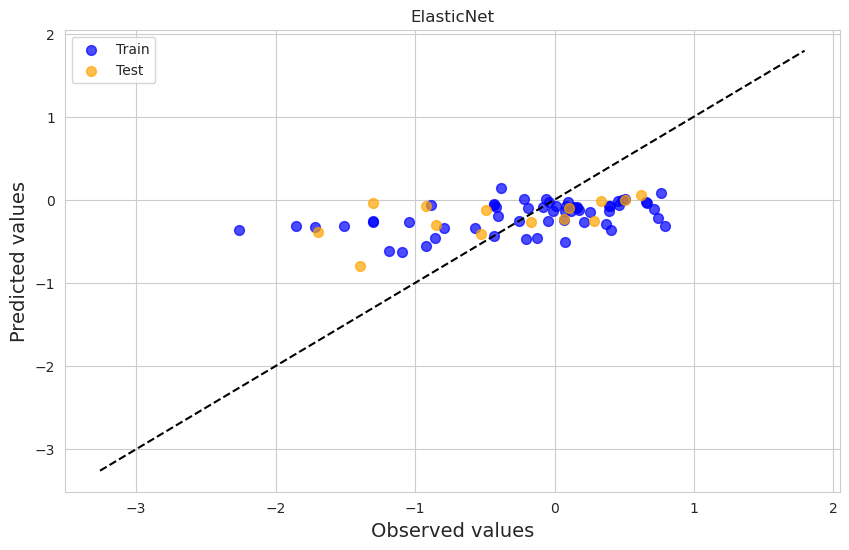

In [28]:
test_utils.display_score(ElasticNet(**study.best_params, random_state=0, max_iter=100000), X_ionizable_train, y_ionizable_train, X_ionizable_test, y_ionizable_test)
display(plot_optimization_history(study))

rr = ElasticNet(**study.best_params, random_state=0, max_iter=100000).fit(X_ionizable_train, y_ionizable_train)
y_ionizable_train_pred = rr.predict(X_ionizable_train)
y_ionizable_test_pred = rr.predict(X_ionizable_test)

test_utils.display_graph(rr, X_ionizable_train, X_ionizable_test, y_ionizable_train, y_ionizable_test)

# Neutral

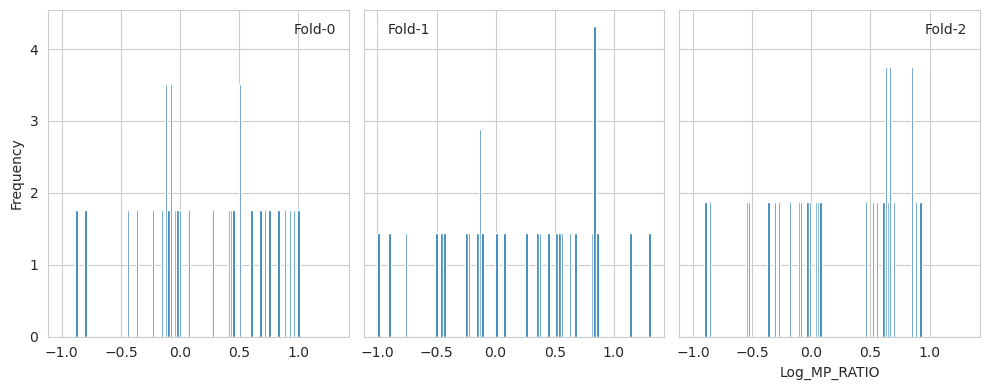

Scores: 
	R2				:	 0.8022398748819561 
	CV train		:	 -3.4799038254012253 
	Custom CV train	:	 0.20509966980571148 
	Q2				:	 0.305519013381093


In [32]:
test_utils = utils.Utils(neutral_train)
test_utils.create_cv_folds(display=True)
test_utils.display_score(ElasticNet(max_iter=100000, random_state=0), X_neutral_train, y_neutral_train, X_neutral_test, y_neutral_test)

In [30]:
def objective(trial):
    alpha = trial.suggest_float('alpha', 1e-10, 1e10, log=True)

    l1_ratio = trial.suggest_float('l1_ratio', 1e-10, 1, log=True)


    clf = ElasticNet(max_iter=100000, alpha=alpha, l1_ratio=l1_ratio, random_state=0)

    # n_ft = trial.suggest_int('n_ft', 1, 10, log=True)
    # clf = RFE(Ridge(max_iter=100000, alpha=alpha, solver=solver), n_features_to_select=n_ft)

    estimator = utils.Utils(neutral_train)
    return estimator.cross_value_score(clf)


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000, n_jobs=-1, show_progress_bar=True)
trial = study.best_trial
print(trial.value, trial.params)

[I 2023-06-16 17:52:39,182] A new study created in memory with name: no-name-ddded9b1-14de-40fa-9992-f98b855c82ee


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2023-06-16 17:52:39,822] Trial 0 finished with value: 0.04185889286312716 and parameters: {'alpha': 5510540.877761282, 'l1_ratio': 1.2795697450371319e-06}. Best is trial 0 with value: 0.04185889286312716.
[I 2023-06-16 17:52:39,852] Trial 7 finished with value: -0.0010605577384500038 and parameters: {'alpha': 195346514.1972969, 'l1_ratio': 0.04601298513437113}. Best is trial 0 with value: 0.04185889286312716.
[I 2023-06-16 17:52:39,860] Trial 6 finished with value: 0.005525064164305686 and parameters: {'alpha': 394521017.216104, 'l1_ratio': 1.323701874815849e-10}. Best is trial 0 with value: 0.04185889286312716.
[I 2023-06-16 17:52:39,881] Trial 5 finished with value: -0.0010605577384500038 and parameters: {'alpha': 28112695.13793499, 'l1_ratio': 0.32389752101433833}. Best is trial 0 with value: 0.04185889286312716.
[I 2023-06-16 17:52:40,219] Trial 8 finished with value: 0.001811440483309057 and parameters: {'alpha': 68182898.12990662, 'l1_ratio': 7.073786436856081e-07}. Best is tr

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.464e-01, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.338e-03, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.270e-02, tolerance: 1.854e-03

/home/p

[I 2023-06-16 17:53:25,438] Trial 14 finished with value: -28.867062176205362 and parameters: {'alpha': 0.00020740916573971783, 'l1_ratio': 2.323015260030801e-05}. Best is trial 21 with value: 0.3680755838201387.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.214e-03, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.145e-02, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.031e-02, tolerance: 1.606e-03

/home/p

[I 2023-06-16 17:53:27,822] Trial 25 finished with value: -2.2941343178001117 and parameters: {'alpha': 0.7463157468574784, 'l1_ratio': 0.01781926752521281}. Best is trial 21 with value: 0.3680755838201387.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.134e+00, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.891e-02, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.780e-01, tolerance: 1.895e-03



[I 2023-06-16 17:53:36,782] Trial 22 finished with value: -3.6359617206807724 and parameters: {'alpha': 0.8525489853414565, 'l1_ratio': 0.00319614952951355}. Best is trial 21 with value: 0.3680755838201387.
[I 2023-06-16 17:53:36,913] Trial 30 finished with value: -0.0010605577384500038 and parameters: {'alpha': 284697.10167625843, 'l1_ratio': 0.04887197372542054}. Best is trial 21 with value: 0.3680755838201387.
[I 2023-06-16 17:53:37,127] Trial 31 finished with value: 0.3908832395967129 and parameters: {'alpha': 84120.40223220184, 'l1_ratio': 0.0007296078173795299}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:53:37,244] Trial 32 finished with value: 0.3658143794300082 and parameters: {'alpha': 120449.4803231262, 'l1_ratio': 0.00031454234288492896}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:53:37,468] Trial 33 finished with value: 0.3467178921411273 and parameters: {'alpha': 272711.0808511501, 'l1_ratio': 0.00021533166696750496}. Best is t

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.538e-01, tolerance: 1.895e-03



[I 2023-06-16 17:53:40,362] Trial 26 finished with value: -6.388418192872282 and parameters: {'alpha': 0.09078976032581196, 'l1_ratio': 0.02570685928692276}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e-01, tolerance: 1.895e-03



[I 2023-06-16 17:53:44,926] Trial 24 finished with value: -2.9647179020028624 and parameters: {'alpha': 0.8931945568488115, 'l1_ratio': 0.006903363631241203}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.636e-03, tolerance: 1.895e-03



[I 2023-06-16 17:53:45,266] Trial 10 finished with value: -47.7799506531394 and parameters: {'alpha': 0.00202889072632785, 'l1_ratio': 1.7133621393147743e-08}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:53:45,303] Trial 44 finished with value: -0.0010605577384500038 and parameters: {'alpha': 14385938.83794468, 'l1_ratio': 0.0013712827742717942}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:53:45,482] Trial 45 finished with value: -0.018974292403799553 and parameters: {'alpha': 25107926.12272051, 'l1_ratio': 6.0121802206186e-06}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.118e+00, tolerance: 1.895e-03



[I 2023-06-16 17:53:47,246] Trial 2 finished with value: 0.13304626685445076 and parameters: {'alpha': 56.69610257750751, 'l1_ratio': 1.9980572294552968e-07}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:53:47,450] Trial 48 finished with value: 0.35431601950369895 and parameters: {'alpha': 85207.9635001852, 'l1_ratio': 0.00030853316573589717}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.760e-01, tolerance: 1.854e-03



[I 2023-06-16 17:53:50,067] Trial 47 finished with value: 0.29523684643277764 and parameters: {'alpha': 75.3264164810384, 'l1_ratio': 0.00025304030203132205}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:53:50,578] Trial 50 finished with value: 0.2678834315470247 and parameters: {'alpha': 46371.66096827384, 'l1_ratio': 4.368709571373668e-05}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:53:51,139] Trial 49 finished with value: 0.37776970439194246 and parameters: {'alpha': 131.63088536656701, 'l1_ratio': 0.0003919860014668137}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.871e-02, tolerance: 1.895e-03



[I 2023-06-16 17:53:51,850] Trial 52 finished with value: -0.05508669816306636 and parameters: {'alpha': 2528.926783392821, 'l1_ratio': 0.001736951215675495}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:53:51,876] Trial 27 finished with value: -13.313498850449138 and parameters: {'alpha': 0.01282922653135522, 'l1_ratio': 0.020042761664238885}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:53:54,277] Trial 51 finished with value: 0.042471059771781894 and parameters: {'alpha': 393.9931427286672, 'l1_ratio': 0.0006017579087561553}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.587e-01, tolerance: 1.854e-03



[I 2023-06-16 17:54:00,317] Trial 53 finished with value: 0.36888696671365306 and parameters: {'alpha': 147.23115540565377, 'l1_ratio': 0.00012412797079903407}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:54:03,859] Trial 28 finished with value: -2.230797338756729 and parameters: {'alpha': 0.8673408687057578, 'l1_ratio': 0.014087371885539537}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.602e-03, tolerance: 1.895e-03



[I 2023-06-16 17:54:04,151] Trial 54 finished with value: 0.2723437589816825 and parameters: {'alpha': 315.9715133877766, 'l1_ratio': 0.00011721593906275549}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.451e-01, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.599e-01, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.929e-02, tolerance: 1.606e-03

/home/p

[I 2023-06-16 17:54:26,309] Trial 29 finished with value: -4.582994963374512 and parameters: {'alpha': 0.6800497733045031, 'l1_ratio': 0.0014128223639361774}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.421e-01, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.368e+00, tolerance: 1.895e-03



[I 2023-06-16 17:54:32,484] Trial 42 finished with value: 0.34831932617976885 and parameters: {'alpha': 219.38928803475795, 'l1_ratio': 4.462170843289451e-06}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.899e-01, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.131e-01, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.056e+00, tolerance: 1.895e-03



[I 2023-06-16 17:54:47,686] Trial 46 finished with value: 0.18231821384449187 and parameters: {'alpha': 63.904178551715354, 'l1_ratio': 3.4120308876169145e-06}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:54:48,165] Trial 58 finished with value: -0.7227819766399415 and parameters: {'alpha': 15.362622899883226, 'l1_ratio': 3.21202364448417e-05}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.386e-01, tolerance: 1.606e-03



[I 2023-06-16 17:54:50,468] Trial 62 finished with value: -0.11518836904202583 and parameters: {'alpha': 7760.772883939106, 'l1_ratio': 9.152806240492854e-05}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.763e-01, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.865e-01, tolerance: 1.854e-03



[I 2023-06-16 17:54:54,764] Trial 63 finished with value: -0.3010265279789981 and parameters: {'alpha': 2044.6818942787993, 'l1_ratio': 0.0001306316343031399}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.173e+00, tolerance: 1.895e-03



[I 2023-06-16 17:54:56,311] Trial 43 finished with value: 0.3260085302030584 and parameters: {'alpha': 107.4884033031009, 'l1_ratio': 4.7009861688912855e-06}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:54:56,666] Trial 65 finished with value: 0.3535323697115595 and parameters: {'alpha': 12053.610201792248, 'l1_ratio': 0.0026089497761917586}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.333e-01, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.906e-01, tolerance: 1.895e-03



[I 2023-06-16 17:55:05,341] Trial 55 finished with value: -0.1950144908199293 and parameters: {'alpha': 30.869391838875142, 'l1_ratio': 5.12157688174787e-06}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.115e-01, tolerance: 1.895e-03



[I 2023-06-16 17:55:10,459] Trial 57 finished with value: -0.3991678134603547 and parameters: {'alpha': 22.867066892693, 'l1_ratio': 2.5553907521989524e-05}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.570e-01, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.587e-01, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.080e-01, tolerance: 1.895e-03



[I 2023-06-16 17:55:12,624] Trial 56 finished with value: 0.05740574481616367 and parameters: {'alpha': 47.94394592271137, 'l1_ratio': 5.338172717554284e-06}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.327e-01, tolerance: 1.606e-03



[I 2023-06-16 17:55:14,462] Trial 68 finished with value: -0.4183101585050731 and parameters: {'alpha': 1471.1256961402048, 'l1_ratio': 0.00041221651843240033}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:55:14,617] Trial 70 finished with value: 0.3822407393134572 and parameters: {'alpha': 125934.69733361395, 'l1_ratio': 0.00042931256397771604}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:55:14,716] Trial 67 finished with value: -0.1045350422466929 and parameters: {'alpha': 1162.2937414451671, 'l1_ratio': 2.2432594284663016e-05}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:55:14,993] Trial 71 finished with value: -0.0010605577384500038 and parameters: {'alpha': 151235408.4072816, 'l1_ratio': 0.00022884300587310602}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:55:15,052] Trial 72 finished with value: -0.0010605577384500038 and parameters: {'alpha': 144900432.24564528, 'l1_ratio': 0.000183508728260998

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.213e-01, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.960e-01, tolerance: 1.606e-03



[I 2023-06-16 17:55:21,911] Trial 59 finished with value: -0.823907685501794 and parameters: {'alpha': 13.782078075278708, 'l1_ratio': 2.3958717060804282e-05}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:55:22,085] Trial 84 finished with value: 0.02298819950806985 and parameters: {'alpha': 37820.93773675633, 'l1_ratio': 0.006679379988573178}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:55:26,535] Trial 75 finished with value: -0.8198661235186157 and parameters: {'alpha': 7.223873215059142, 'l1_ratio': 0.002517256348354065}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:55:27,334] Trial 86 finished with value: -0.14481321917325152 and parameters: {'alpha': 3628.7940509128925, 'l1_ratio': 0.0007413558039923775}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:55:27,505] Trial 87 finished with value: 0.13068527848200315 and parameters: {'alpha': 1217694.6479429847, 'l1_ratio': 8.071489203700646e-05}. Best is

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.110e-01, tolerance: 1.606e-03



[I 2023-06-16 17:55:31,662] Trial 81 finished with value: -1.2335355099534155 and parameters: {'alpha': 6.102054648356167, 'l1_ratio': 0.001458075056308587}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:55:32,253] Trial 93 finished with value: -0.44443810725625693 and parameters: {'alpha': 543.3129045604468, 'l1_ratio': 0.0013416473796344158}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:55:33,445] Trial 92 finished with value: -0.07217422904168869 and parameters: {'alpha': 352.58020512579765, 'l1_ratio': 0.0010889149733139143}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:55:33,960] Trial 96 finished with value: 0.33947738340922007 and parameters: {'alpha': 5389.990069868625, 'l1_ratio': 0.004254413330193877}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:55:34,606] Trial 97 finished with value: 0.21260537226309803 and parameters: {'alpha': 22887.41257161362, 'l1_ratio': 0.00018467914924912316}. Best is

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.199e-01, tolerance: 1.606e-03



[I 2023-06-16 17:55:39,431] Trial 117 finished with value: -0.47163044432495105 and parameters: {'alpha': 157.88328488930287, 'l1_ratio': 0.013857463559234734}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:55:39,765] Trial 118 finished with value: 0.35839077804444514 and parameters: {'alpha': 51464.92340964207, 'l1_ratio': 0.0005015872151763606}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:55:40,444] Trial 116 finished with value: -0.5048988154050876 and parameters: {'alpha': 178.16141276351118, 'l1_ratio': 0.0058875090095646095}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:55:40,514] Trial 119 finished with value: -0.14350445948779378 and parameters: {'alpha': 817.3236940831865, 'l1_ratio': 0.005382455157761067}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.389e-01, tolerance: 1.606e-03



[I 2023-06-16 17:55:40,821] Trial 61 finished with value: -0.8090393640596804 and parameters: {'alpha': 13.965140251514697, 'l1_ratio': 2.9939163562168525e-05}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:55:40,847] Trial 121 finished with value: -0.0010605577384500038 and parameters: {'alpha': 777150.6245415475, 'l1_ratio': 0.0019130390087257795}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:55:41,158] Trial 122 finished with value: -0.0010605577384500038 and parameters: {'alpha': 1007160.4046837448, 'l1_ratio': 0.0016478310783315713}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:55:41,466] Trial 124 finished with value: -0.0010605577384500038 and parameters: {'alpha': 4374323.800712827, 'l1_ratio': 0.0008461242892543704}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:55:41,992] Trial 123 finished with value: -0.30394175946616264 and parameters: {'alpha': 2183.051928516242, 'l1_ratio': 0.00085048582850

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.700e-01, tolerance: 1.895e-03



[I 2023-06-16 17:55:43,509] Trial 60 finished with value: -0.5036072850319684 and parameters: {'alpha': 20.025321206984046, 'l1_ratio': 2.1318782844041353e-05}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:55:43,632] Trial 130 finished with value: 0.3118903859670107 and parameters: {'alpha': 62927.420233889774, 'l1_ratio': 0.0001156528215075068}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:55:43,661] Trial 114 finished with value: -0.17519887927090583 and parameters: {'alpha': 871.7498247996947, 'l1_ratio': 0.0003037864487519014}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:55:43,833] Trial 127 finished with value: -0.05615957710785413 and parameters: {'alpha': 10073.039589446971, 'l1_ratio': 6.569084948272796e-05}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:55:43,990] Trial 132 finished with value: -0.0010605577384500038 and parameters: {'alpha': 436379.27434717986, 'l1_ratio': 0.00337663226914762}

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.794e-01, tolerance: 1.606e-03



[I 2023-06-16 17:55:54,816] Trial 158 finished with value: 0.3538209999098738 and parameters: {'alpha': 247721.3389810035, 'l1_ratio': 0.00023480635427212704}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:55:55,592] Trial 157 finished with value: 0.2598310953290473 and parameters: {'alpha': 38901.25012906366, 'l1_ratio': 8.363147423095932e-05}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.359e-01, tolerance: 1.895e-03



[I 2023-06-16 17:55:56,932] Trial 151 finished with value: 0.18134677358960452 and parameters: {'alpha': 26.424574592725296, 'l1_ratio': 0.0023626257489739247}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:55:57,029] Trial 146 finished with value: 0.30362271118233525 and parameters: {'alpha': 81.81324054980003, 'l1_ratio': 0.00018113252277343264}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:55:57,072] Trial 64 finished with value: -0.5062409973920476 and parameters: {'alpha': 19.998794351556022, 'l1_ratio': 1.73388769391352e-05}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:55:57,206] Trial 161 finished with value: 0.3501653432404178 and parameters: {'alpha': 130750.28316857529, 'l1_ratio': 0.0007670412962672754}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:55:57,464] Trial 162 finished with value: -0.017202416998919594 and parameters: {'alpha': 400907.8822720092, 'l1_ratio': 0.000657061684829603}. Be

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.610e-02, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.580e-02, tolerance: 1.895e-03



[I 2023-06-16 17:56:20,297] Trial 85 finished with value: -2.3058018169045007 and parameters: {'alpha': 3.4790388018054617, 'l1_ratio': 0.00015060288756523415}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:56:20,835] Trial 168 finished with value: 0.30124982096136704 and parameters: {'alpha': 26513.50287087884, 'l1_ratio': 0.0003709613124179066}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:56:21,067] Trial 169 finished with value: 0.20301131004074024 and parameters: {'alpha': 101230.11929695241, 'l1_ratio': 0.0016760012316504647}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.455e-01, tolerance: 1.854e-03



[I 2023-06-16 17:56:21,514] Trial 170 finished with value: 0.14065276314498584 and parameters: {'alpha': 7404.199763234204, 'l1_ratio': 0.0007459242649805135}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:56:21,708] Trial 171 finished with value: -0.0010605577384500038 and parameters: {'alpha': 1272718.5164599326, 'l1_ratio': 0.004155630182664241}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.281e-01, tolerance: 1.854e-03



[I 2023-06-16 17:56:26,725] Trial 172 finished with value: -0.2894078697840549 and parameters: {'alpha': 520.3694127402341, 'l1_ratio': 0.0010065121246286147}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:56:27,655] Trial 160 finished with value: -1.8252612699741215 and parameters: {'alpha': 4.525659765467288, 'l1_ratio': 0.0007447986714275275}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.077e-01, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.688e-01, tolerance: 1.606e-03



[I 2023-06-16 17:56:32,858] Trial 174 finished with value: -0.3492173021531805 and parameters: {'alpha': 1253.086583692121, 'l1_ratio': 0.0003739816732912438}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:56:33,159] Trial 175 finished with value: 0.3500412591431381 and parameters: {'alpha': 185986.84541146105, 'l1_ratio': 3.6713258483730004e-05}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:56:33,326] Trial 176 finished with value: 0.3048540745735115 and parameters: {'alpha': 12138.526333328808, 'l1_ratio': 0.011994449888634021}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:56:33,508] Trial 177 finished with value: 0.3818461932174751 and parameters: {'alpha': 34536.19062545527, 'l1_ratio': 0.0015389045287171278}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:56:33,726] Trial 178 finished with value: 0.3896284409618738 and parameters: {'alpha': 42040.70266697128, 'l1_ratio': 0.0016486506364826131}. Best i

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.308e-01, tolerance: 1.606e-03



[I 2023-06-16 17:56:37,683] Trial 197 finished with value: 0.3364528002325194 and parameters: {'alpha': 4173.807328537525, 'l1_ratio': 0.0053435028152952575}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:56:37,814] Trial 198 finished with value: 0.384515265816337 and parameters: {'alpha': 16912.417570912592, 'l1_ratio': 0.00399096611418203}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:56:37,949] Trial 199 finished with value: 0.3701833700500035 and parameters: {'alpha': 18115.48579259787, 'l1_ratio': 0.0027092005296639418}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:56:38,098] Trial 200 finished with value: 0.36037734448554243 and parameters: {'alpha': 17124.020359971608, 'l1_ratio': 0.0024528798404318533}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:56:38,226] Trial 201 finished with value: 0.10609570623436833 and parameters: {'alpha': 62782.39423695288, 'l1_ratio': 0.003191133823163129}. Best is t

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.099e-01, tolerance: 1.606e-03



[I 2023-06-16 17:56:43,304] Trial 226 finished with value: 0.36742075593809886 and parameters: {'alpha': 33234.484252009424, 'l1_ratio': 0.0011686877598502826}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:56:43,406] Trial 227 finished with value: 0.384787601956976 and parameters: {'alpha': 46899.62414998394, 'l1_ratio': 0.001086063085614065}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:56:43,615] Trial 228 finished with value: 0.35427686913525186 and parameters: {'alpha': 9053.618398963503, 'l1_ratio': 0.004641015646329513}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:56:43,737] Trial 229 finished with value: -0.025717535838595967 and parameters: {'alpha': 134331.82035686658, 'l1_ratio': 0.0028051898082143566}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:56:43,911] Trial 230 finished with value: -0.0012824841160302691 and parameters: {'alpha': 121234.07742649732, 'l1_ratio': 0.002169527322888223}. B

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.161e-01, tolerance: 1.606e-03



[I 2023-06-16 17:56:44,345] Trial 232 finished with value: 0.3770858538601182 and parameters: {'alpha': 41751.76883732615, 'l1_ratio': 0.001062956180628936}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:56:44,921] Trial 233 finished with value: -0.1661683313187793 and parameters: {'alpha': 2822.3962594659847, 'l1_ratio': 0.001045726953056217}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:56:45,068] Trial 234 finished with value: -0.06431999676784868 and parameters: {'alpha': 3643.0615672255362, 'l1_ratio': 0.0010251019146101492}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:56:45,369] Trial 236 finished with value: -0.0010605577384500038 and parameters: {'alpha': 425520.7732307026, 'l1_ratio': 0.006823603749613736}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:56:45,387] Trial 235 finished with value: 0.20362070917336708 and parameters: {'alpha': 7388.462915980162, 'l1_ratio': 0.0009518902495645967}. Be

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.683e-02, tolerance: 1.854e-03



[I 2023-06-16 17:56:54,460] Trial 164 finished with value: -2.2459959812924986 and parameters: {'alpha': 3.43726272144088, 'l1_ratio': 0.00039617332236674543}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:56:59,550] Trial 258 finished with value: -0.2053453657071758 and parameters: {'alpha': 5105.196403679338, 'l1_ratio': 1.4483488687631854e-06}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.164e-02, tolerance: 1.895e-03



[I 2023-06-16 17:57:01,584] Trial 155 finished with value: -2.499097176321239 and parameters: {'alpha': 2.9448004899629514, 'l1_ratio': 0.00020900174490359592}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.302e-01, tolerance: 1.895e-03



[I 2023-06-16 17:57:04,525] Trial 165 finished with value: -1.9160236423297774 and parameters: {'alpha': 4.945877804756753, 'l1_ratio': 4.576393027879329e-05}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.799e-01, tolerance: 1.895e-03



[I 2023-06-16 17:57:05,595] Trial 163 finished with value: -2.800691583690175 and parameters: {'alpha': 2.4398843361179368, 'l1_ratio': 5.05685141793119e-05}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:57:05,931] Trial 264 finished with value: 0.3874614290903196 and parameters: {'alpha': 32473.37806908154, 'l1_ratio': 0.0020118999696044806}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:57:06,272] Trial 262 finished with value: 0.20409253318511497 and parameters: {'alpha': 34528.19425792258, 'l1_ratio': 6.470579410681337e-09}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:57:06,415] Trial 265 finished with value: -0.0010605577384500038 and parameters: {'alpha': 19403.651521909964, 'l1_ratio': 0.09621451308613342}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:57:06,628] Trial 266 finished with value: -0.0326297934295254 and parameters: {'alpha': 137034.56212052764, 'l1_ratio': 0.0020501534279234067}. Bes

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.317e-03, tolerance: 1.854e-03



[I 2023-06-16 17:57:08,581] Trial 273 finished with value: -6.3755815493328445 and parameters: {'alpha': 2.6639162167656196e-08, 'l1_ratio': 0.0037170461092662505}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:57:08,881] Trial 272 finished with value: -6.377400545556277 and parameters: {'alpha': 1.0695055119405738e-10, 'l1_ratio': 0.003217808871859951}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:57:09,019] Trial 276 finished with value: -0.0010605577384500038 and parameters: {'alpha': 15798942.603003178, 'l1_ratio': 0.0017741456655082596}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:57:12,716] Trial 275 finished with value: -0.5055205991387095 and parameters: {'alpha': 645.5157374137088, 'l1_ratio': 0.0017764187711340124}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:57:12,895] Trial 278 finished with value: -0.0010605577384500038 and parameters: {'alpha': 310833.2150143456, 'l1_ratio': 0.01494268316

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.410e-01, tolerance: 1.854e-03



[I 2023-06-16 17:57:18,708] Trial 259 finished with value: -0.19325270272731943 and parameters: {'alpha': 5545.533086369831, 'l1_ratio': 1.3743139233229968e-09}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:57:18,876] Trial 282 finished with value: -0.0010605577384500038 and parameters: {'alpha': 7870671794.260424, 'l1_ratio': 0.7451252906950535}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:57:19,084] Trial 283 finished with value: 0.3627067438529363 and parameters: {'alpha': 24843.66007202584, 'l1_ratio': 0.0013812453722986014}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.523e-01, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.922e-02, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.891e-02, tolerance: 1.606e-03

/home/p

[I 2023-06-16 17:57:40,551] Trial 256 finished with value: -4.100987952529528 and parameters: {'alpha': 0.16558192095299074, 'l1_ratio': 0.05306925663351592}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.365e-01, tolerance: 1.895e-03



[I 2023-06-16 17:57:40,863] Trial 173 finished with value: -2.8650016245128156 and parameters: {'alpha': 2.1077901158972883, 'l1_ratio': 0.00034132360718826677}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:57:41,139] Trial 286 finished with value: 0.3904685236846641 and parameters: {'alpha': 83739.32167655876, 'l1_ratio': 0.0006780638525684553}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:57:41,389] Trial 287 finished with value: -0.0010605577384500038 and parameters: {'alpha': 3620392.997805494, 'l1_ratio': 0.0006941283877493488}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:57:41,686] Trial 288 finished with value: -0.0010605577384500038 and parameters: {'alpha': 655075.3263958301, 'l1_ratio': 0.004938570787404903}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:57:41,952] Trial 289 finished with value: -0.0010203810292667519 and parameters: {'alpha': 81382.73772873194, 'l1_ratio': 0.00737113997968945

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.081e-01, tolerance: 1.895e-03



[I 2023-06-16 17:57:43,520] Trial 277 finished with value: 0.08430028757320522 and parameters: {'alpha': 652.9291346711408, 'l1_ratio': 1.1062331808538606e-05}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:57:43,679] Trial 297 finished with value: 0.38861872724490293 and parameters: {'alpha': 40132.61777936307, 'l1_ratio': 0.0015975954973834379}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:57:43,952] Trial 298 finished with value: 0.38561504854450196 and parameters: {'alpha': 31437.21868420113, 'l1_ratio': 0.002776587853818542}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:57:44,128] Trial 299 finished with value: -0.0010605577384500038 and parameters: {'alpha': 1234961.4790589674, 'l1_ratio': 0.0006894810191337478}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:57:44,335] Trial 300 finished with value: 0.04034784646931381 and parameters: {'alpha': 125557.00741850866, 'l1_ratio': 0.0018573760646959558}.

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.699e-02, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.240e-02, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.198e-02, tolerance: 1.606e-03

/home/p

[I 2023-06-16 17:57:54,424] Trial 260 finished with value: -6.01040915188282 and parameters: {'alpha': 0.3873056636183257, 'l1_ratio': 0.0020137210156453713}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:57:54,842] Trial 302 finished with value: 0.31516146991067073 and parameters: {'alpha': 12847.674384370439, 'l1_ratio': 0.0010371831226719632}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:57:55,984] Trial 303 finished with value: 0.1904020900530455 and parameters: {'alpha': 31732.142750123254, 'l1_ratio': 2.7138662586077162e-06}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:57:56,361] Trial 304 finished with value: -0.0007970045579219395 and parameters: {'alpha': 111317.24798091226, 'l1_ratio': 0.005292930400382486}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:57:56,546] Trial 305 finished with value: -0.0010605577384500038 and parameters: {'alpha': 587583.1730145497, 'l1_ratio': 0.00961253921091326}.

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.165e-03, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.185e-03, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.551e-03, tolerance: 1.854e-03

/home/p

[I 2023-06-16 17:58:08,812] Trial 261 finished with value: -7.970776558611518 and parameters: {'alpha': 0.06716132809144262, 'l1_ratio': 1.4863762721926872e-09}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:58:09,373] Trial 308 finished with value: 0.2881379069351448 and parameters: {'alpha': 9654.389179251128, 'l1_ratio': 0.0011793963476966023}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:58:10,020] Trial 307 finished with value: -0.013030628985144102 and parameters: {'alpha': 13011.75944065323, 'l1_ratio': 1.412500423049582e-10}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:58:10,081] Trial 309 finished with value: 0.27750521142620105 and parameters: {'alpha': 55387.37203588949, 'l1_ratio': 7.195614988731685e-06}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.227e-02, tolerance: 1.895e-03



[I 2023-06-16 17:58:10,606] Trial 274 finished with value: -8.043546583415134 and parameters: {'alpha': 0.08208523674647705, 'l1_ratio': 0.0018603473833141285}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:58:10,753] Trial 312 finished with value: 0.20942435690081504 and parameters: {'alpha': 240605.95988001296, 'l1_ratio': 0.0006306930301458665}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.066e-01, tolerance: 1.895e-03



[I 2023-06-16 17:58:14,093] Trial 281 finished with value: -7.375013253939475 and parameters: {'alpha': 0.19844654695310093, 'l1_ratio': 0.0012963077481271425}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:58:20,066] Trial 293 finished with value: -22.340092348098327 and parameters: {'alpha': 0.00014318068364668936, 'l1_ratio': 0.0010968257934666865}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.208e-02, tolerance: 1.895e-03



[I 2023-06-16 17:58:27,341] Trial 284 finished with value: -25.303981180367114 and parameters: {'alpha': 0.004724150403089681, 'l1_ratio': 0.0007328611192113297}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:58:30,990] Trial 313 finished with value: -8.230705894275287 and parameters: {'alpha': 5.096803306431946e-05, 'l1_ratio': 1.4984895075662467e-05}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.636e-03, tolerance: 1.606e-03



[I 2023-06-16 17:58:31,331] Trial 317 finished with value: -0.0010605577384500038 and parameters: {'alpha': 230935682.3144087, 'l1_ratio': 0.002730895370527371}. Best is trial 31 with value: 0.3908832395967129.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.414e-03, tolerance: 1.606e-03



[I 2023-06-16 17:58:32,732] Trial 316 finished with value: -0.23259689970028272 and parameters: {'alpha': 4188.54964553217, 'l1_ratio': 1.8970873363694227e-05}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:58:32,886] Trial 319 finished with value: -0.0010605577384500038 and parameters: {'alpha': 7591810.6049971515, 'l1_ratio': 0.005518956719210317}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:58:33,065] Trial 320 finished with value: -0.0010605577384500038 and parameters: {'alpha': 34965.79573050122, 'l1_ratio': 0.017703592561667963}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:58:33,393] Trial 314 finished with value: -0.22190995256450408 and parameters: {'alpha': 4375.889968384954, 'l1_ratio': 7.217277068641847e-07}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:58:33,634] Trial 322 finished with value: -0.011933835866239936 and parameters: {'alpha': 107297.21805607254, 'l1_ratio': 0.0041290367506052

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.824e-03, tolerance: 1.854e-03



[I 2023-06-16 17:58:38,773] Trial 337 finished with value: -0.29952632941317253 and parameters: {'alpha': 2191.3860284952757, 'l1_ratio': 0.0009036706501432351}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:58:38,921] Trial 338 finished with value: 0.15155187650436164 and parameters: {'alpha': 24144.428895108213, 'l1_ratio': 3.0234191563266266e-05}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:58:38,960] Trial 339 finished with value: 0.2971917355457566 and parameters: {'alpha': 18840.235533042505, 'l1_ratio': 0.00782804665419697}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:58:39,203] Trial 340 finished with value: -0.0010605577384500038 and parameters: {'alpha': 451554.2913581688, 'l1_ratio': 0.0073800936396603845}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:58:39,281] Trial 341 finished with value: -0.0010605577384500038 and parameters: {'alpha': 584965.8684171892, 'l1_ratio': 0.001765871559300321

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.768e-03, tolerance: 1.895e-03



[I 2023-06-16 17:58:57,738] Trial 296 finished with value: -48.77249753961546 and parameters: {'alpha': 0.0018333999227193962, 'l1_ratio': 0.001621909294433387}. Best is trial 31 with value: 0.3908832395967129.
[I 2023-06-16 17:58:57,880] Trial 380 finished with value: 0.3912637017739599 and parameters: {'alpha': 69592.80870099114, 'l1_ratio': 0.000972891439395148}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 17:58:58,059] Trial 381 finished with value: 0.3629957078185064 and parameters: {'alpha': 299464.79116767016, 'l1_ratio': 9.863182238666693e-06}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 17:58:58,206] Trial 382 finished with value: 0.3749351792094292 and parameters: {'alpha': 89232.4429479708, 'l1_ratio': 0.0004602338403963291}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 17:58:58,346] Trial 383 finished with value: -0.0010605577384500038 and parameters: {'alpha': 121813873.9876249, 'l1_ratio': 0.0009457046867540391}. 

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.538e-03, tolerance: 1.895e-03



[I 2023-06-16 17:59:02,242] Trial 301 finished with value: -50.26206606618207 and parameters: {'alpha': 0.001428564084978286, 'l1_ratio': 0.001013780662215337}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.725e-03, tolerance: 1.606e-03



[I 2023-06-16 17:59:03,191] Trial 389 finished with value: 0.07327538901918906 and parameters: {'alpha': 11485.799338274015, 'l1_ratio': 0.00025675645315589564}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 17:59:05,497] Trial 390 finished with value: -0.4934313864490952 and parameters: {'alpha': 605.1784117971146, 'l1_ratio': 0.0022396508764171794}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 17:59:05,742] Trial 391 finished with value: 0.1258617093818644 and parameters: {'alpha': 955315.4932277882, 'l1_ratio': 0.00012930267841376676}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.434e-01, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.163e-03, tolerance: 1.895e-03



[I 2023-06-16 17:59:08,412] Trial 310 finished with value: -34.55337075395565 and parameters: {'alpha': 0.00027458251612305943, 'l1_ratio': 6.95701970145893e-06}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.357e-02, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.988e-01, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.287e-03, tolerance: 1.854e-03

/home/p

[I 2023-06-16 17:59:27,028] Trial 311 finished with value: -15.890115061993466 and parameters: {'alpha': 0.008031475730350407, 'l1_ratio': 0.0006590895382280301}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 17:59:27,347] Trial 394 finished with value: -0.0010605577384500038 and parameters: {'alpha': 3574860.604202507, 'l1_ratio': 0.012081984519902146}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 17:59:27,613] Trial 395 finished with value: -0.026071758595019905 and parameters: {'alpha': 265464.08270007925, 'l1_ratio': 0.001404094952033285}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 17:59:27,916] Trial 396 finished with value: -0.04669117601043423 and parameters: {'alpha': 59287.89788643982, 'l1_ratio': 0.005209301063029002}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.720e-01, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.532e-02, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.944e-02, tolerance: 1.606e-03

/home/p

[I 2023-06-16 17:59:46,752] Trial 388 finished with value: 0.17194834394573122 and parameters: {'alpha': 500.76363488333556, 'l1_ratio': 3.034712592307513e-06}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.846e-01, tolerance: 1.895e-03



[I 2023-06-16 17:59:49,771] Trial 379 finished with value: -3.8212757979665497 and parameters: {'alpha': 1.0489179563672875, 'l1_ratio': 0.0009956651993582627}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 17:59:50,206] Trial 399 finished with value: 0.35802109019840916 and parameters: {'alpha': 14210.48060045207, 'l1_ratio': 0.0029474738731522987}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 17:59:51,005] Trial 400 finished with value: 0.04021080687445455 and parameters: {'alpha': 2905.2514334188104, 'l1_ratio': 0.0018392837303818413}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 17:59:51,183] Trial 401 finished with value: -0.0010605577384500038 and parameters: {'alpha': 130454.4929535517, 'l1_ratio': 0.026023410190789603}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 17:59:51,460] Trial 402 finished with value: 0.2009788402383115 and parameters: {'alpha': 28527.351100019638, 'l1_ratio': 0.006222711932371775

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.936e-02, tolerance: 1.606e-03



[I 2023-06-16 17:59:52,103] Trial 405 finished with value: -0.0010605577384500038 and parameters: {'alpha': 5000585789.714481, 'l1_ratio': 0.0015084516627018462}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.954e-01, tolerance: 1.895e-03



[I 2023-06-16 17:59:52,386] Trial 406 finished with value: 0.3102952565082843 and parameters: {'alpha': 5693.059646846673, 'l1_ratio': 0.002345630112991148}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 17:59:52,519] Trial 370 finished with value: -5.056631316623989 and parameters: {'alpha': 0.6267409465173831, 'l1_ratio': 1.0293746517792645e-05}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 17:59:52,656] Trial 407 finished with value: 0.34038587288973415 and parameters: {'alpha': 51214.335159344606, 'l1_ratio': 0.00033381864370571725}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 17:59:52,819] Trial 408 finished with value: 0.3424386402093959 and parameters: {'alpha': 52868.71746111032, 'l1_ratio': 0.00034329688951719096}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 17:59:53,772] Trial 409 finished with value: 0.10617088853352707 and parameters: {'alpha': 14961.126408343976, 'l1_ratio': 0.0001622654854830951}

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.187e-01, tolerance: 1.895e-03



[I 2023-06-16 17:59:56,962] Trial 393 finished with value: -3.948189418635607 and parameters: {'alpha': 0.43286225180091886, 'l1_ratio': 0.012261751481522998}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.696e-02, tolerance: 1.895e-03



[I 2023-06-16 18:00:00,163] Trial 362 finished with value: -10.784017941215117 and parameters: {'alpha': 0.025989733149287868, 'l1_ratio': 9.8557615198564e-05}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:00:01,540] Trial 415 finished with value: -0.24931180784395243 and parameters: {'alpha': 11.629215114313263, 'l1_ratio': 0.003455837554328901}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:00:01,850] Trial 423 finished with value: 0.3620594480726215 and parameters: {'alpha': 24395.16861205102, 'l1_ratio': 0.001342222727368619}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:00:02,341] Trial 424 finished with value: 0.24123463601495176 and parameters: {'alpha': 4075.55878447345, 'l1_ratio': 0.002406068207868146}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:00:02,572] Trial 425 finished with value: -0.031254654193242616 and parameters: {'alpha': 184320.45954203795, 'l1_ratio': 0.0015171350693883583}.

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.911e-02, tolerance: 1.895e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.246e-02, tolerance: 1.606e-03



[I 2023-06-16 18:00:03,153] Trial 377 finished with value: -13.81655913333449 and parameters: {'alpha': 0.011719122535705105, 'l1_ratio': 0.0013021282626597326}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:00:03,260] Trial 427 finished with value: 0.3393868406610609 and parameters: {'alpha': 10220.746993543911, 'l1_ratio': 0.001906900539221116}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:00:03,487] Trial 430 finished with value: -0.0010605577384500038 and parameters: {'alpha': 15818318.519425742, 'l1_ratio': 0.03264349103813628}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:00:03,627] Trial 431 finished with value: 0.3816626884890576 and parameters: {'alpha': 91555.21381804107, 'l1_ratio': 0.0005069909639703674}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:00:03,793] Trial 421 finished with value: -0.1618109015629847 and parameters: {'alpha': 19.505247328829014, 'l1_ratio': 0.0014580016675043836

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.689e-02, tolerance: 1.895e-03



[I 2023-06-16 18:00:18,635] Trial 392 finished with value: -10.735384366667894 and parameters: {'alpha': 0.026281318795746487, 'l1_ratio': 5.546052259694741e-08}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:00:19,198] Trial 460 finished with value: 0.3484974440278738 and parameters: {'alpha': 16844.45089348207, 'l1_ratio': 0.007380130576432781}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:00:19,534] Trial 461 finished with value: 0.3802094593032089 and parameters: {'alpha': 8156.730036649916, 'l1_ratio': 0.0122813436360112}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.120e-02, tolerance: 1.895e-03



[I 2023-06-16 18:00:21,751] Trial 397 finished with value: -9.575811988920657 and parameters: {'alpha': 0.03668349434079864, 'l1_ratio': 0.003201513858064263}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:00:21,888] Trial 463 finished with value: 0.3670601186655892 and parameters: {'alpha': 95065.78257863743, 'l1_ratio': 0.0010045283376459387}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:00:23,886] Trial 464 finished with value: -4.806806845993062 and parameters: {'alpha': 3.6893778645258e-06, 'l1_ratio': 0.004434211688582417}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:00:24,021] Trial 465 finished with value: -0.0010605577384500038 and parameters: {'alpha': 23150.554486811547, 'l1_ratio': 0.16277372717584015}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:00:28,315] Trial 466 finished with value: -5.005889842187646 and parameters: {'alpha': 1.635229483905024e-05, 'l1_ratio': 0.001943814468854377

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.283e+00, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.860e-02, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.223e+00, tolerance: 1.854e-03

/home/p

[I 2023-06-16 18:00:38,447] Trial 475 finished with value: 0.23144377541751662 and parameters: {'alpha': 2.356349780543624, 'l1_ratio': 0.05593974760514007}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:00:38,604] Trial 476 finished with value: -0.0010605577384500038 and parameters: {'alpha': 176483.48385145242, 'l1_ratio': 0.00990683780940866}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:00:39,445] Trial 477 finished with value: 0.14510767743716968 and parameters: {'alpha': 22290.382702656807, 'l1_ratio': 4.720293985970275e-05}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:00:39,945] Trial 478 finished with value: 0.029426769902694622 and parameters: {'alpha': 7083610.963085889, 'l1_ratio': 2.1211158322757405e-10}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:00:40,085] Trial 479 finished with value: 0.3899241731258676 and parameters: {'alpha': 59094.7711212346, 'l1_ratio': 0.0009535863079453738}.

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.343e+00, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.428e-02, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.469e-02, tolerance: 1.606e-03

/home/p

[I 2023-06-16 18:01:05,305] Trial 441 finished with value: -0.1759259953025021 and parameters: {'alpha': 1697.6411564172947, 'l1_ratio': 1.1707923681172426e-08}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.195e+00, tolerance: 1.895e-03



[I 2023-06-16 18:01:06,289] Trial 482 finished with value: 0.27852817185699186 and parameters: {'alpha': 10837.01264943894, 'l1_ratio': 0.0009760908000217128}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:01:06,464] Trial 457 finished with value: 0.3065938999539102 and parameters: {'alpha': 291.97871189804846, 'l1_ratio': 6.733769082756547e-06}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:01:06,995] Trial 484 finished with value: -0.0010605577384500038 and parameters: {'alpha': 286980.73187088035, 'l1_ratio': 0.0022676524409153197}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:01:07,224] Trial 485 finished with value: -0.0010605577384500038 and parameters: {'alpha': 101285.04401591168, 'l1_ratio': 0.018496696497656784}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:01:08,681] Trial 483 finished with value: 0.28747224812876854 and parameters: {'alpha': 102.90058171219395, 'l1_ratio': 0.00222515056206

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.946e-03, tolerance: 1.606e-03



[I 2023-06-16 18:01:11,580] Trial 492 finished with value: 0.34703785362389455 and parameters: {'alpha': 163153.89768735084, 'l1_ratio': 3.528341829818422e-05}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:01:11,826] Trial 493 finished with value: 0.3866879050474894 and parameters: {'alpha': 12630.31391592796, 'l1_ratio': 0.0066438093404874434}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.181e-01, tolerance: 1.895e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.406e-02, tolerance: 1.895e-03



[I 2023-06-16 18:01:17,592] Trial 456 finished with value: -3.093794304905655 and parameters: {'alpha': 1.5548391265246975, 'l1_ratio': 0.000981066592672395}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:01:17,721] Trial 450 finished with value: -8.691617418363492 and parameters: {'alpha': 0.05601926439586636, 'l1_ratio': 0.0067491084658620965}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:01:17,964] Trial 495 finished with value: 0.3818529336269009 and parameters: {'alpha': 8990.017879593293, 'l1_ratio': 0.0074583610133594725}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:01:18,035] Trial 496 finished with value: 0.38156380977596144 and parameters: {'alpha': 7994.924967496701, 'l1_ratio': 0.008396803023265537}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:01:18,283] Trial 497 finished with value: 0.12720144428797733 and parameters: {'alpha': 14278.357284122721, 'l1_ratio': 0.013890105430160105}. Be

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.871e+00, tolerance: 1.895e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.790e+00, tolerance: 1.895e-03



[I 2023-06-16 18:01:26,829] Trial 462 finished with value: 0.23948688919499994 and parameters: {'alpha': 395.2057768681413, 'l1_ratio': 1.4413433380617565e-07}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:01:26,845] Trial 447 finished with value: 0.2907164079740137 and parameters: {'alpha': 318.04647201072885, 'l1_ratio': 7.238997626504893e-09}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:01:27,081] Trial 503 finished with value: -0.0010605577384500038 and parameters: {'alpha': 1397932395.5850751, 'l1_ratio': 0.015213154106754546}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:01:27,301] Trial 505 finished with value: 0.3434546114611044 and parameters: {'alpha': 1279.576076041926, 'l1_ratio': 0.023760457344598827}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:01:27,644] Trial 506 finished with value: -0.013375232862853767 and parameters: {'alpha': 17168.250455631, 'l1_ratio': 0.025398047900032986}.

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.311e-01, tolerance: 1.854e-03



[I 2023-06-16 18:01:31,782] Trial 509 finished with value: -6.377389040383408 and parameters: {'alpha': 2.1533926885821311e-10, 'l1_ratio': 7.463156474374009e-05}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:01:31,978] Trial 510 finished with value: -0.0010605577384500038 and parameters: {'alpha': 27833.79357046513, 'l1_ratio': 0.08401825927719231}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.929e-01, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.668e-03, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.886e-03, tolerance: 1.895e-03



[I 2023-06-16 18:01:33,433] Trial 472 finished with value: -39.4243500757115 and parameters: {'alpha': 0.00035920115101896965, 'l1_ratio': 0.003420870315880045}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:01:33,665] Trial 511 finished with value: -6.4575275466560935 and parameters: {'alpha': 1.628667603131976e-07, 'l1_ratio': 0.0037680940257040652}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:01:33,857] Trial 513 finished with value: -0.0009097060362016999 and parameters: {'alpha': 17918.070929043417, 'l1_ratio': 0.033235388602483686}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:01:33,995] Trial 512 finished with value: 0.32767087481070767 and parameters: {'alpha': 3274.905214231743, 'l1_ratio': 0.005164501049503112}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:01:34,172] Trial 514 finished with value: 0.3476898041112938 and parameters: {'alpha': 3668.88924161139, 'l1_ratio': 0.0105140795538746

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.028e-03, tolerance: 1.895e-03



[I 2023-06-16 18:01:40,936] Trial 481 finished with value: -32.370924596677234 and parameters: {'alpha': 0.0002461396881293703, 'l1_ratio': 2.9197789820716684e-05}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:01:43,808] Trial 523 finished with value: 0.35693391352026727 and parameters: {'alpha': 46.67761029109444, 'l1_ratio': 0.002767209353829653}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:01:44,141] Trial 525 finished with value: -0.0010605577384500038 and parameters: {'alpha': 187609.0814169465, 'l1_ratio': 0.009296178092495014}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:01:44,502] Trial 526 finished with value: 0.3836811243672429 and parameters: {'alpha': 11857.90938900717, 'l1_ratio': 0.005795710071534415}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.714e-03, tolerance: 1.854e-03



[I 2023-06-16 18:01:46,539] Trial 524 finished with value: -4.616581262944586 and parameters: {'alpha': 8.06959290904302e-06, 'l1_ratio': 0.007412681492862724}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:01:46,956] Trial 528 finished with value: 0.34516101401351784 and parameters: {'alpha': 71419.63883294692, 'l1_ratio': 0.00029429072161355103}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:01:47,422] Trial 529 finished with value: -0.0010605577384500038 and parameters: {'alpha': 1691803.4408623471, 'l1_ratio': 0.01625543897311185}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:01:47,709] Trial 530 finished with value: 0.3854352921489593 and parameters: {'alpha': 30634.809335791157, 'l1_ratio': 0.0028653640970055317}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.044e-02, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.168e-03, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.899e-01, tolerance: 1.854e-03

/home/p

[I 2023-06-16 18:02:14,340] Trial 502 finished with value: -3.9785182940168053 and parameters: {'alpha': 0.25961365038733586, 'l1_ratio': 0.026819209767866142}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:02:14,551] Trial 532 finished with value: -0.0010605577384500038 and parameters: {'alpha': 329819.5620066166, 'l1_ratio': 0.19350975848761415}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.204e-02, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.078e-01, tolerance: 1.895e-03



[I 2023-06-16 18:02:20,160] Trial 486 finished with value: -3.468551911441933 and parameters: {'alpha': 1.311990532187099, 'l1_ratio': 0.0007741914522459689}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:02:20,542] Trial 534 finished with value: 0.3853564725653997 and parameters: {'alpha': 37998.513578599785, 'l1_ratio': 0.0022868413207789203}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.153e-02, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.900e-03, tolerance: 1.895e-03



[I 2023-06-16 18:02:22,162] Trial 494 finished with value: -51.74835880780047 and parameters: {'alpha': 0.0011132072809827754, 'l1_ratio': 0.007217395977736852}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:02:22,907] Trial 536 finished with value: 0.344264516661934 and parameters: {'alpha': 129730.67912063657, 'l1_ratio': 4.863815441227793e-07}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:02:23,272] Trial 537 finished with value: -0.0010605577384500038 and parameters: {'alpha': 17154510.593917236, 'l1_ratio': 0.9550151746833393}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:02:23,698] Trial 538 finished with value: 0.3764886888433961 and parameters: {'alpha': 45292.529326264455, 'l1_ratio': 0.0021527627560996585}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.056e-02, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.261e-02, tolerance: 1.895e-03



[I 2023-06-16 18:02:28,941] Trial 504 finished with value: -44.72986456713179 and parameters: {'alpha': 0.0010438692326250904, 'l1_ratio': 0.051389789595342614}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:02:29,271] Trial 540 finished with value: 0.005527790696925883 and parameters: {'alpha': 393365005.95751643, 'l1_ratio': 7.09625820952043e-10}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:02:29,560] Trial 541 finished with value: -0.0010605577384500038 and parameters: {'alpha': 104397.50728863617, 'l1_ratio': 0.11030053352943246}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:02:29,805] Trial 542 finished with value: -0.0010605577384500038 and parameters: {'alpha': 528236.2727511175, 'l1_ratio': 0.4561556596213377}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.016e-02, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.006e-01, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.355e-01, tolerance: 1.895e-03



[I 2023-06-16 18:02:32,057] Trial 520 finished with value: -5.3509196550435405 and parameters: {'alpha': 0.019342996034272985, 'l1_ratio': 0.28981342172177266}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:02:33,419] Trial 544 finished with value: 0.21422125313269413 and parameters: {'alpha': 36418.0223562413, 'l1_ratio': 1.2215144713338883e-06}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.778e-02, tolerance: 1.895e-03



[I 2023-06-16 18:02:39,029] Trial 519 finished with value: -18.33363347337298 and parameters: {'alpha': 0.005351237645138984, 'l1_ratio': 0.00904286671231259}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:02:39,629] Trial 546 finished with value: 0.34196549306158536 and parameters: {'alpha': 12943.495804330367, 'l1_ratio': 0.0015751064413431473}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:02:40,116] Trial 547 finished with value: 0.3122000410434011 and parameters: {'alpha': 200897.74747166553, 'l1_ratio': 0.0005440190775322444}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.776e-02, tolerance: 1.854e-03



[I 2023-06-16 18:02:40,426] Trial 548 finished with value: 0.33279410895938544 and parameters: {'alpha': 49689.5295675833, 'l1_ratio': 0.0025466993909085047}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.913e-03, tolerance: 1.854e-03



[I 2023-06-16 18:02:48,115] Trial 543 finished with value: -1.3830234712819762 and parameters: {'alpha': 5.263533307881505, 'l1_ratio': 0.0015831934204277478}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:02:48,991] Trial 550 finished with value: 0.022675151575102137 and parameters: {'alpha': 5632.30786166568, 'l1_ratio': 0.0007158238721064007}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:02:49,206] Trial 551 finished with value: -0.0010605577384500038 and parameters: {'alpha': 56853608.40620427, 'l1_ratio': 0.003202870085493893}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.624e-02, tolerance: 1.895e-03



[I 2023-06-16 18:02:49,657] Trial 527 finished with value: -14.579824782070293 and parameters: {'alpha': 0.009632317595185541, 'l1_ratio': 0.00030253889400358143}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.588e-02, tolerance: 1.606e-03



[I 2023-06-16 18:02:50,184] Trial 552 finished with value: 0.12876131990082917 and parameters: {'alpha': 21982.85886654454, 'l1_ratio': 2.8505241559992348e-05}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:02:50,511] Trial 554 finished with value: -0.0010605577384500038 and parameters: {'alpha': 837800.8261439215, 'l1_ratio': 0.001137062083773823}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:02:50,989] Trial 555 finished with value: 0.3130859443848873 and parameters: {'alpha': 80180.26610907173, 'l1_ratio': 2.2515909553636564e-05}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:02:55,262] Trial 553 finished with value: 0.10611200032559227 and parameters: {'alpha': 21356.909171005613, 'l1_ratio': 1.4554100326977304e-09}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:02:55,647] Trial 556 finished with value: 0.22550710475227734 and parameters: {'alpha': 139.80624880866077, 'l1_ratio': 0.0019588793231071

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.128e-02, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.579e-02, tolerance: 1.895e-03



[I 2023-06-16 18:02:57,824] Trial 531 finished with value: -15.288422570514998 and parameters: {'alpha': 0.008628517243768802, 'l1_ratio': 0.0006397200642841626}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:03:00,248] Trial 545 finished with value: -17.155055616677274 and parameters: {'alpha': 0.00010247322737712787, 'l1_ratio': 0.001626535814013453}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:03:00,395] Trial 558 finished with value: -0.1485825145208591 and parameters: {'alpha': 7277.13021037164, 'l1_ratio': 1.2855714473529949e-05}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:03:00,581] Trial 563 finished with value: -0.002475163612169151 and parameters: {'alpha': 161204.49584668118, 'l1_ratio': 0.0032706442207222036}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:03:01,470] Trial 561 finished with value: -5.351409477137485 and parameters: {'alpha': 7.348672449791029e-07, 'l1_ratio': 0.003324498

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.158e-03, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.281e-01, tolerance: 1.854e-03



[I 2023-06-16 18:03:06,336] Trial 569 finished with value: 0.15411671639313787 and parameters: {'alpha': 26632.049335006748, 'l1_ratio': 2.234119890623148e-09}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:03:06,855] Trial 571 finished with value: -6.377752329832946 and parameters: {'alpha': 7.335000725117874e-10, 'l1_ratio': 0.04090855242674657}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e-01, tolerance: 1.895e-03



[I 2023-06-16 18:03:08,637] Trial 533 finished with value: -8.639500886123605 and parameters: {'alpha': 0.022389702522038972, 'l1_ratio': 0.0854014769369789}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:03:09,649] Trial 572 finished with value: 0.35411932008562624 and parameters: {'alpha': 8.974304407017447, 'l1_ratio': 0.01808735929792727}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:03:09,980] Trial 574 finished with value: 0.37730818045533987 and parameters: {'alpha': 98036.8422100918, 'l1_ratio': 0.0004410328550458888}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:03:10,231] Trial 573 finished with value: -0.36428299316963997 and parameters: {'alpha': 1462.5459592971342, 'l1_ratio': 0.0011989817660007418}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:03:10,420] Trial 575 finished with value: -0.0010605577384500038 and parameters: {'alpha': 4477601.239106265, 'l1_ratio': 0.005148683812933069}. 

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.071e-02, tolerance: 1.895e-03



[I 2023-06-16 18:03:11,096] Trial 539 finished with value: -17.327707009681696 and parameters: {'alpha': 0.0024066868785249528, 'l1_ratio': 0.09874139979670876}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:03:11,303] Trial 579 finished with value: -0.0010605577384500038 and parameters: {'alpha': 340002.95661210775, 'l1_ratio': 0.002211308273172459}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:03:11,964] Trial 581 finished with value: 0.28931297698319597 and parameters: {'alpha': 2365.824939909292, 'l1_ratio': 0.0051712984533784515}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:03:12,310] Trial 582 finished with value: -0.0010605577384500038 and parameters: {'alpha': 93042.99228620093, 'l1_ratio': 0.013395908634018613}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:03:12,332] Trial 578 finished with value: 0.2866745026603408 and parameters: {'alpha': 61315.05350369283, 'l1_ratio': 3.7060813575658996

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.746e-01, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.911e-01, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.664e+00, tolerance: 1.854e-03

/home/p

[I 2023-06-16 18:03:29,262] Trial 535 finished with value: -49.751203222221655 and parameters: {'alpha': 0.0012736781663304545, 'l1_ratio': 2.3844141198117863e-06}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:03:29,767] Trial 590 finished with value: 0.38225203839651706 and parameters: {'alpha': 35120.81337507169, 'l1_ratio': 0.0015205901267097586}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.550e-01, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.490e-01, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.069e-01, tolerance: 1.854e-03



[I 2023-06-16 18:03:37,733] Trial 591 finished with value: -0.3183042839318394 and parameters: {'alpha': 20.584090592957807, 'l1_ratio': 0.0005509876320806781}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.858e-01, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.247e-01, tolerance: 1.895e-03



[I 2023-06-16 18:03:47,130] Trial 549 finished with value: -1.3952125650285414 and parameters: {'alpha': 7.897489724572461, 'l1_ratio': 5.011046648605007e-07}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:03:48,053] Trial 593 finished with value: -0.16240991208550504 and parameters: {'alpha': 2880.107919238979, 'l1_ratio': 0.0010279968202941028}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.227e+00, tolerance: 1.895e-03



[I 2023-06-16 18:03:52,442] Trial 570 finished with value: -0.1784051931355852 and parameters: {'alpha': 1720.4068605257949, 'l1_ratio': 4.099359235261142e-09}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:03:52,842] Trial 595 finished with value: 0.30372791582363984 and parameters: {'alpha': 6004.190248846347, 'l1_ratio': 0.0021388122617286725}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.869e-01, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.952e-02, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.871e-01, tolerance: 1.606e-03

/home/p

[I 2023-06-16 18:03:59,827] Trial 560 finished with value: -0.10972828945053832 and parameters: {'alpha': 35.446166512175694, 'l1_ratio': 2.8608601585160993e-07}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:04:00,163] Trial 597 finished with value: -0.0010605577384500038 and parameters: {'alpha': 1848182.1915980247, 'l1_ratio': 0.005020938538602156}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:04:00,544] Trial 598 finished with value: -0.0010605577384500038 and parameters: {'alpha': 170452.50924550163, 'l1_ratio': 0.01043339485040439}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:04:00,890] Trial 599 finished with value: 0.007199985274894886 and parameters: {'alpha': 193421285.426026, 'l1_ratio': 9.596039942121091e-08}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:04:01,294] Trial 600 finished with value: 0.35616863842838015 and parameters: {'alpha': 20431.29729629465, 'l1_ratio': 0.00139279225537

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.865e-02, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.373e-01, tolerance: 1.895e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.905e-02, tolerance: 1.854e-03



[I 2023-06-16 18:04:09,324] Trial 588 finished with value: -6.803873399650838 and parameters: {'alpha': 0.28840277358398686, 'l1_ratio': 0.0013426717028322077}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:04:12,207] Trial 602 finished with value: -0.02993833144455671 and parameters: {'alpha': 12145.21162811462, 'l1_ratio': 1.544036537617879e-10}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.119e-01, tolerance: 1.895e-03



[I 2023-06-16 18:04:14,115] Trial 585 finished with value: -4.705745158741586 and parameters: {'alpha': 0.718310167793297, 'l1_ratio': 1.1375886788805289e-10}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:04:14,401] Trial 605 finished with value: 0.34289511999740013 and parameters: {'alpha': 37336.41378559542, 'l1_ratio': 0.003308386779814481}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:04:14,671] Trial 606 finished with value: -0.0010605577384500038 and parameters: {'alpha': 9630581811.94564, 'l1_ratio': 0.0007885422500254703}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:04:14,963] Trial 607 finished with value: 0.008240343110919812 and parameters: {'alpha': 111742.64848967017, 'l1_ratio': 0.0023042274063329584}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:04:15,325] Trial 608 finished with value: -0.002041526551683881 and parameters: {'alpha': 34698963.847382866, 'l1_ratio': 1.2936496432311986

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.046e-02, tolerance: 1.895e-03



[I 2023-06-16 18:04:18,640] Trial 564 finished with value: -7.2827965082143855 and parameters: {'alpha': 0.10166338217492417, 'l1_ratio': 3.492255175651997e-08}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:04:18,907] Trial 611 finished with value: -0.0010605577384500038 and parameters: {'alpha': 409227.9515821315, 'l1_ratio': 0.006559917151146424}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:04:19,094] Trial 603 finished with value: -5.65918558011136 and parameters: {'alpha': 2.5364675208037194e-05, 'l1_ratio': 0.003095694299683146}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:04:19,148] Trial 612 finished with value: -0.05035018878415184 and parameters: {'alpha': 8545.1887606665, 'l1_ratio': 0.035100630119833214}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:04:19,427] Trial 613 finished with value: 0.3788909601234725 and parameters: {'alpha': 5693.706253290541, 'l1_ratio': 0.017981980968993217}

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.093e-01, tolerance: 1.895e-03



[I 2023-06-16 18:04:20,374] Trial 589 finished with value: -0.6255092734363117 and parameters: {'alpha': 17.451323705454453, 'l1_ratio': 1.3156316680134248e-10}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:04:20,774] Trial 616 finished with value: -0.0010605577384500038 and parameters: {'alpha': 27213.865617783533, 'l1_ratio': 0.22891231943710613}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:04:22,596] Trial 617 finished with value: -0.4871071845655925 and parameters: {'alpha': 398.03826019756525, 'l1_ratio': 0.004267501126731502}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.873e-01, tolerance: 1.606e-03



[I 2023-06-16 18:04:23,271] Trial 618 finished with value: -6.377658081313444 and parameters: {'alpha': 1.1609641831941183e-09, 'l1_ratio': 0.0018252020305572496}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:04:23,436] Trial 619 finished with value: -0.0007613269763294683 and parameters: {'alpha': 65932.5478230925, 'l1_ratio': 0.008891273576949141}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.495e-02, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.387e-02, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.284e-02, tolerance: 1.606e-03

/home/p

[I 2023-06-16 18:04:41,709] Trial 592 finished with value: -3.666273012296252 and parameters: {'alpha': 1.3251087780466753, 'l1_ratio': 6.600250561606049e-05}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:04:42,017] Trial 621 finished with value: 0.1123447767797714 and parameters: {'alpha': 253381.62762937014, 'l1_ratio': 0.0007356827835178555}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.511e+00, tolerance: 1.854e-03



[I 2023-06-16 18:04:46,334] Trial 622 finished with value: -4.736094839551445 and parameters: {'alpha': 4.027727864528885e-06, 'l1_ratio': 6.332602518758104e-07}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.416e-02, tolerance: 1.895e-03



[I 2023-06-16 18:04:46,845] Trial 596 finished with value: -8.681618859743883 and parameters: {'alpha': 0.05121733650964862, 'l1_ratio': 0.004450039864041434}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:04:47,380] Trial 624 finished with value: 0.2179339867990113 and parameters: {'alpha': 20449.079184717066, 'l1_ratio': 0.00023483197231374275}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:04:47,985] Trial 625 finished with value: 0.32120295227073037 and parameters: {'alpha': 89097.03445931582, 'l1_ratio': 1.4525793780152107e-07}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:04:48,412] Trial 626 finished with value: -0.02113556886385637 and parameters: {'alpha': 3820.4249009917417, 'l1_ratio': 0.0011003924463774942}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.159e-02, tolerance: 1.606e-03



[I 2023-06-16 18:04:48,761] Trial 627 finished with value: 0.3856968310926175 and parameters: {'alpha': 38005.48774819411, 'l1_ratio': 0.002269098370090015}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:04:50,341] Trial 623 finished with value: -4.981412239095385 and parameters: {'alpha': 1.0858967753101516e-06, 'l1_ratio': 0.12869950271771446}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:04:50,513] Trial 629 finished with value: 0.35593079531998323 and parameters: {'alpha': 13313.031281560925, 'l1_ratio': 0.0024978827373341957}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.617e-02, tolerance: 1.606e-03



[I 2023-06-16 18:04:52,494] Trial 630 finished with value: -0.4718251407176765 and parameters: {'alpha': 142.83698721230814, 'l1_ratio': 0.007098976097594322}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:04:52,733] Trial 631 finished with value: 0.08185891631578994 and parameters: {'alpha': 1130.6551096297062, 'l1_ratio': 0.18905307893269432}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:04:52,918] Trial 632 finished with value: 0.0002685218694552516 and parameters: {'alpha': 2644334050.295469, 'l1_ratio': 3.7625133470923404e-10}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:04:53,086] Trial 633 finished with value: -0.0010605577384500038 and parameters: {'alpha': 866014.3774602787, 'l1_ratio': 0.0040002217052048615}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.317e-02, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.663e-02, tolerance: 1.895e-03



[I 2023-06-16 18:04:56,506] Trial 594 finished with value: -7.004517680228437 and parameters: {'alpha': 0.2093462326083818, 'l1_ratio': 1.3860585633761113e-07}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:04:56,886] Trial 635 finished with value: 0.38924954820272434 and parameters: {'alpha': 37808.87447744437, 'l1_ratio': 0.0019327276644285215}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:04:57,266] Trial 636 finished with value: -0.022204825672430872 and parameters: {'alpha': 30054.52785855647, 'l1_ratio': 0.013084381973969711}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:04:58,315] Trial 637 finished with value: 0.36060886162323513 and parameters: {'alpha': 193515.3096451677, 'l1_ratio': 3.072823691092738e-08}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:04:58,890] Trial 638 finished with value: 0.3401860556851229 and parameters: {'alpha': 9659.994286093635, 'l1_ratio': 0.0021139799903272683}.

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.219e-01, tolerance: 1.895e-03



[I 2023-06-16 18:05:07,854] Trial 610 finished with value: -7.482531049428136 and parameters: {'alpha': 0.1362574490201744, 'l1_ratio': 0.00781975100127503}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:05:08,024] Trial 644 finished with value: -4.974283471554158 and parameters: {'alpha': 1.5082142120728491e-05, 'l1_ratio': 0.003910305473584608}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:05:08,252] Trial 645 finished with value: -0.0010605577384500038 and parameters: {'alpha': 75027.17811736702, 'l1_ratio': 0.4028584530887794}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:05:08,374] Trial 646 finished with value: 0.3629973654187089 and parameters: {'alpha': 168607.58964316716, 'l1_ratio': 0.00047582805139216236}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.125e-02, tolerance: 1.895e-03



[I 2023-06-16 18:05:08,602] Trial 604 finished with value: -8.213744298127487 and parameters: {'alpha': 0.07547800244010457, 'l1_ratio': 0.002386064204228075}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:05:08,970] Trial 647 finished with value: 0.2640957954477175 and parameters: {'alpha': 5843.265866123046, 'l1_ratio': 0.0018051070152830214}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.488e-02, tolerance: 1.606e-03



[I 2023-06-16 18:05:09,329] Trial 649 finished with value: 0.15874070252868236 and parameters: {'alpha': 4963.757335018681, 'l1_ratio': 0.0013158355344254952}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:05:09,385] Trial 650 finished with value: -0.0010605577384500038 and parameters: {'alpha': 282452745.3291925, 'l1_ratio': 0.0011582953518780219}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:05:09,609] Trial 651 finished with value: 0.3624802542934541 and parameters: {'alpha': 35813.910927190904, 'l1_ratio': 0.0008282780132248191}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:05:09,949] Trial 653 finished with value: 0.3609344601438474 and parameters: {'alpha': 527559.8651617068, 'l1_ratio': 6.403141885753043e-10}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.245e-01, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.566e-02, tolerance: 1.854e-03



[I 2023-06-16 18:05:16,210] Trial 654 finished with value: 0.034565362204306026 and parameters: {'alpha': 15790.890236740443, 'l1_ratio': 7.220885924921282e-08}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:05:16,413] Trial 655 finished with value: -0.0010605577384500038 and parameters: {'alpha': 3419874550.513931, 'l1_ratio': 6.506087174144479e-06}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:05:17,300] Trial 656 finished with value: -6.374074176992734 and parameters: {'alpha': 6.103855192042594e-08, 'l1_ratio': 0.011325401315658984}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.781e-01, tolerance: 1.895e-03



[I 2023-06-16 18:05:17,671] Trial 614 finished with value: -3.5157931061512357 and parameters: {'alpha': 0.7965604937109405, 'l1_ratio': 0.004370717432532377}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:05:17,983] Trial 658 finished with value: 0.33147421176550623 and parameters: {'alpha': 108572.88297824933, 'l1_ratio': 3.676575665667991e-05}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:05:18,177] Trial 657 finished with value: -0.4063145461043232 and parameters: {'alpha': 543.6095972416874, 'l1_ratio': 0.00466440000861085}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:05:18,504] Trial 660 finished with value: 0.3760485783868223 and parameters: {'alpha': 20242.81073444217, 'l1_ratio': 0.0026480559966831694}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:05:19,010] Trial 661 finished with value: 0.27669994922120406 and parameters: {'alpha': 44365.37456527566, 'l1_ratio': 8.620503746489588e-05}. Be

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.077e+00, tolerance: 1.895e-03



[I 2023-06-16 18:05:26,521] Trial 615 finished with value: 0.11961436929905944 and parameters: {'alpha': 595.5993842974809, 'l1_ratio': 3.659756745739143e-10}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:05:27,201] Trial 667 finished with value: 0.02363096268494173 and parameters: {'alpha': 10658.444073540039, 'l1_ratio': 0.00018564871636354933}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:05:27,349] Trial 668 finished with value: -0.03430460229600726 and parameters: {'alpha': 113802.60513904049, 'l1_ratio': 0.003040101643194239}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:05:27,501] Trial 669 finished with value: 0.3701004591340455 and parameters: {'alpha': 26119.840879598163, 'l1_ratio': 0.0017191994147404824}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:05:27,724] Trial 666 finished with value: -0.10721608636005404 and parameters: {'alpha': 8754.121100699718, 'l1_ratio': 1.2406793860199083e-

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.453e-02, tolerance: 1.895e-03



[I 2023-06-16 18:05:34,543] Trial 620 finished with value: -8.151408831518728 and parameters: {'alpha': 0.06177171205623545, 'l1_ratio': 8.930381661071057e-10}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:05:34,617] Trial 652 finished with value: -15.049399107482172 and parameters: {'alpha': 9.346663776106648e-05, 'l1_ratio': 8.971204418769143e-10}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.213e-01, tolerance: 1.854e-03



[I 2023-06-16 18:05:34,961] Trial 684 finished with value: 0.3598447797352931 and parameters: {'alpha': 46759.98399960543, 'l1_ratio': 0.0005707513291899661}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.353e+00, tolerance: 1.606e-03



[I 2023-06-16 18:05:36,199] Trial 685 finished with value: 0.24682464806978108 and parameters: {'alpha': 44921.46670738055, 'l1_ratio': 2.763999008840689e-07}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:05:37,409] Trial 683 finished with value: -4.946830879378721 and parameters: {'alpha': 2.61588032589428e-06, 'l1_ratio': 0.0005294046222915712}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.555e-02, tolerance: 1.606e-03



[I 2023-06-16 18:05:38,701] Trial 681 finished with value: -0.16715789463864636 and parameters: {'alpha': 6536.550473030766, 'l1_ratio': 3.3841880045447902e-06}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:05:39,057] Trial 689 finished with value: 0.34002564125968743 and parameters: {'alpha': 131598.98244358462, 'l1_ratio': 0.00011858800581372298}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:05:40,055] Trial 688 finished with value: -4.504583200079261 and parameters: {'alpha': 6.587338212935835e-06, 'l1_ratio': 0.004752357161036784}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:05:40,347] Trial 691 finished with value: 0.35202702927174506 and parameters: {'alpha': 14287.766457219393, 'l1_ratio': 0.0018707065070740867}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.110e-03, tolerance: 1.854e-03



[I 2023-06-16 18:05:41,581] Trial 692 finished with value: -0.3534714076529421 and parameters: {'alpha': 1561.1140372586176, 'l1_ratio': 0.0009565457706720743}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:05:42,240] Trial 687 finished with value: -4.646896795456025 and parameters: {'alpha': 8.110972119492672e-06, 'l1_ratio': 0.011577339303405258}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:05:43,442] Trial 690 finished with value: -4.59132850540241 and parameters: {'alpha': 7.866439686132266e-06, 'l1_ratio': 0.005184990827683987}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:05:43,599] Trial 695 finished with value: -0.0010605577384500038 and parameters: {'alpha': 315997.537258037, 'l1_ratio': 0.0031637048745216216}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:05:43,970] Trial 694 finished with value: 0.3632358696111082 and parameters: {'alpha': 47.83986937322027, 'l1_ratio': 0.00328999036322216

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.706e-02, tolerance: 1.895e-03



[I 2023-06-16 18:05:57,156] Trial 634 finished with value: -7.12952406956268 and parameters: {'alpha': 0.11957363295696409, 'l1_ratio': 5.9068259430669696e-08}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:05:57,443] Trial 705 finished with value: -0.0010605577384500038 and parameters: {'alpha': 57404.31036884908, 'l1_ratio': 0.010906750973591858}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.812e-03, tolerance: 1.854e-03



[I 2023-06-16 18:05:57,656] Trial 706 finished with value: -0.0010605577384500038 and parameters: {'alpha': 3428.202407105647, 'l1_ratio': 0.9731301949521906}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:05:57,782] Trial 707 finished with value: -0.0010605577384500038 and parameters: {'alpha': 148208.4781768898, 'l1_ratio': 0.022372405626506487}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:06:00,161] Trial 708 finished with value: 0.18483309557703728 and parameters: {'alpha': 31087.559458221163, 'l1_ratio': 4.1782501788005114e-08}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.060e-03, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.318e+00, tolerance: 1.895e-03



[I 2023-06-16 18:06:03,633] Trial 628 finished with value: 0.3142389279748148 and parameters: {'alpha': 101.28387533336948, 'l1_ratio': 3.3198209373527016e-10}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:06:04,092] Trial 710 finished with value: 0.2912902363994648 and parameters: {'alpha': 13108.423262904673, 'l1_ratio': 0.0008501928358550891}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:06:04,474] Trial 711 finished with value: 0.2945513497746695 and parameters: {'alpha': 5815.2420305579035, 'l1_ratio': 0.002102239254803219}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:06:04,698] Trial 712 finished with value: 0.026784699551855733 and parameters: {'alpha': 522591.7003891551, 'l1_ratio': 0.000392411182096326}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:06:04,918] Trial 713 finished with value: -0.0010605577384500038 and parameters: {'alpha': 88154.94606795305, 'l1_ratio': 0.008010992423669672}

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.908e-03, tolerance: 1.854e-03



[I 2023-06-16 18:06:05,523] Trial 715 finished with value: -0.0010605577384500038 and parameters: {'alpha': 804500311.2316724, 'l1_ratio': 0.0013148662043909114}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:06:05,831] Trial 714 finished with value: -6.377396361331781 and parameters: {'alpha': 1.0953585011934002e-10, 'l1_ratio': 0.06405058483476032}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:06:05,940] Trial 716 finished with value: -0.0010605577384500038 and parameters: {'alpha': 40214.652651649514, 'l1_ratio': 0.06680373439105892}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:06:06,113] Trial 718 finished with value: -0.0010605577384500038 and parameters: {'alpha': 2757524.1238913145, 'l1_ratio': 0.00024301336807348587}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:06:06,855] Trial 717 finished with value: -6.377734370510967 and parameters: {'alpha': 8.12546206668586e-10, 'l1_ratio': 1.39598493

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.824e-01, tolerance: 1.895e-03



[I 2023-06-16 18:06:08,774] Trial 648 finished with value: 0.29430661774683453 and parameters: {'alpha': 90.90228555205924, 'l1_ratio': 1.5393325392768096e-05}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:06:09,020] Trial 723 finished with value: 0.3368667231503821 and parameters: {'alpha': 22433.835893874733, 'l1_ratio': 0.005774874319244363}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.602e-01, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.198e-03, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.165e-02, tolerance: 1.895e-03



[I 2023-06-16 18:06:23,855] Trial 659 finished with value: -32.40704874397935 and parameters: {'alpha': 0.0034557484564317923, 'l1_ratio': 0.0031943630197136547}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:06:24,024] Trial 725 finished with value: -0.0010605577384500038 and parameters: {'alpha': 47006071.7958533, 'l1_ratio': 0.0008139511825315689}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:06:24,183] Trial 726 finished with value: -0.03885364891893698 and parameters: {'alpha': 9261.695982519752, 'l1_ratio': 0.036021940843712116}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:06:24,500] Trial 709 finished with value: -17.185465062349948 and parameters: {'alpha': 0.00010690864084730231, 'l1_ratio': 0.0002619483861271918}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:06:24,986] Trial 728 finished with value: 0.31038223846719093 and parameters: {'alpha': 72607.0997863443, 'l1_ratio': 4.8386494508917

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.964e-03, tolerance: 1.606e-03



[I 2023-06-16 18:06:28,994] Trial 722 finished with value: -8.186405807726523 and parameters: {'alpha': 4.439915719807409e-05, 'l1_ratio': 0.006652666763094303}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.448e-02, tolerance: 1.895e-03



[I 2023-06-16 18:06:32,093] Trial 693 finished with value: -27.507693556800383 and parameters: {'alpha': 0.0033885299957311793, 'l1_ratio': 0.010327082105714343}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:06:32,516] Trial 731 finished with value: 0.004680134777292011 and parameters: {'alpha': 467399422.41198194, 'l1_ratio': 7.362886497073787e-09}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:06:32,892] Trial 732 finished with value: 0.3693973653117101 and parameters: {'alpha': 25593.083788065716, 'l1_ratio': 0.001741720564788624}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:06:33,042] Trial 733 finished with value: -0.0010605577384500038 and parameters: {'alpha': 208605.20108698725, 'l1_ratio': 0.01684663221125514}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.281e-01, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.745e-01, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.495e-03, tolerance: 1.606e-03

/home/p

[I 2023-06-16 18:06:50,998] Trial 697 finished with value: -48.75937636747312 and parameters: {'alpha': 0.0009284926357975053, 'l1_ratio': 0.00208073609487668}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.509e-03, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.487e-01, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.681e-01, tolerance: 1.895e-03



[I 2023-06-16 18:06:59,142] Trial 699 finished with value: -3.0858006528214137 and parameters: {'alpha': 2.014312348575906, 'l1_ratio': 5.9915966824932125e-09}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:06:59,732] Trial 735 finished with value: -0.28937493448224516 and parameters: {'alpha': 18.090600301051694, 'l1_ratio': 0.001120568878191162}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:07:01,186] Trial 736 finished with value: -0.36705476142739796 and parameters: {'alpha': 1439.7332332772896, 'l1_ratio': 0.001080135341887486}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.245e-03, tolerance: 1.895e-03



[I 2023-06-16 18:07:01,736] Trial 738 finished with value: 0.25497498089562104 and parameters: {'alpha': 13260.219758090328, 'l1_ratio': 0.0006306674191672215}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:07:01,931] Trial 721 finished with value: -38.0741440427671 and parameters: {'alpha': 0.00018601380426163508, 'l1_ratio': 0.035570993092334406}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:07:02,385] Trial 739 finished with value: 0.3263863071224283 and parameters: {'alpha': 76423.14428174851, 'l1_ratio': 0.00013591022592153478}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:07:03,684] Trial 740 finished with value: 0.2487280877411703 and parameters: {'alpha': 45563.41818193746, 'l1_ratio': 2.1092589760766933e-10}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:07:04,072] Trial 742 finished with value: 0.3463691086637667 and parameters: {'alpha': 6371.0943200627125, 'l1_ratio': 0.0045683099957086895

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.898e-02, tolerance: 1.606e-03



[I 2023-06-16 18:07:05,707] Trial 746 finished with value: 0.24327776492300077 and parameters: {'alpha': 2465.550642532762, 'l1_ratio': 0.004138419844600054}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.637e-01, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.695e-03, tolerance: 1.606e-03



[I 2023-06-16 18:07:15,202] Trial 734 finished with value: -27.35188523122657 and parameters: {'alpha': 0.0001928537053556123, 'l1_ratio': 2.0467760003499055e-08}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.612e-02, tolerance: 1.895e-03



[I 2023-06-16 18:07:23,798] Trial 729 finished with value: -12.00535958884469 and parameters: {'alpha': 0.019717755446267308, 'l1_ratio': 0.0017613637599167896}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:07:25,342] Trial 749 finished with value: -6.351712469423592 and parameters: {'alpha': 2.056776921186883e-07, 'l1_ratio': 0.02117993234046488}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.108e-01, tolerance: 1.854e-03



[I 2023-06-16 18:07:25,814] Trial 750 finished with value: -0.0010605577384500038 and parameters: {'alpha': 32143.323103719194, 'l1_ratio': 0.1317616245962366}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:07:26,676] Trial 751 finished with value: 0.3261123896574048 and parameters: {'alpha': 96006.38744121378, 'l1_ratio': 7.70436326223901e-07}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:07:26,885] Trial 752 finished with value: -0.0010605577384500038 and parameters: {'alpha': 9602539.014099486, 'l1_ratio': 0.0004778204773849251}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.902e-01, tolerance: 1.895e-03



[I 2023-06-16 18:07:27,435] Trial 724 finished with value: -2.91340287303545 and parameters: {'alpha': 2.2843672612394874, 'l1_ratio': 6.934390690321832e-09}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:07:27,717] Trial 754 finished with value: -0.0010605577384500038 and parameters: {'alpha': 4199062259.2103696, 'l1_ratio': 0.0026833955319509263}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:07:28,605] Trial 755 finished with value: -6.465510173957438 and parameters: {'alpha': 1.612733671905601e-07, 'l1_ratio': 0.010528918020556628}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.752e-03, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.981e-01, tolerance: 1.895e-03



[I 2023-06-16 18:07:32,921] Trial 727 finished with value: -1.0759731522283411 and parameters: {'alpha': 10.724752958738524, 'l1_ratio': 1.7324544387019314e-08}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:07:33,367] Trial 757 finished with value: 0.22907628252660847 and parameters: {'alpha': 9008.70683345133, 'l1_ratio': 0.0008711693540330008}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:07:34,002] Trial 756 finished with value: 0.03669641945798593 and parameters: {'alpha': 346.3322571769438, 'l1_ratio': 0.0008099777109851686}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:07:34,135] Trial 759 finished with value: -0.0010605577384500038 and parameters: {'alpha': 154091.65040350944, 'l1_ratio': 0.006045796507255515}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:07:35,081] Trial 760 finished with value: 0.20955801093712648 and parameters: {'alpha': 35551.8271533633, 'l1_ratio': 4.6957285914259417e-0

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.148e+00, tolerance: 1.854e-03



[I 2023-06-16 18:07:37,823] Trial 762 finished with value: -0.0010605577384500038 and parameters: {'alpha': 447779.81528447627, 'l1_ratio': 0.0036164812750890197}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.274e-02, tolerance: 1.895e-03



[I 2023-06-16 18:07:38,245] Trial 730 finished with value: -24.0236308855437 and parameters: {'alpha': 0.004823614114814914, 'l1_ratio': 0.0015729043917665413}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.804e-02, tolerance: 1.895e-03



[I 2023-06-16 18:07:38,470] Trial 764 finished with value: -0.0010605577384500038 and parameters: {'alpha': 13550.913779720766, 'l1_ratio': 0.2489002597405316}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:07:38,498] Trial 737 finished with value: -0.11937684304356815 and parameters: {'alpha': 1306.8888119047647, 'l1_ratio': 1.5939461016278995e-06}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.196e-01, tolerance: 1.606e-03



[I 2023-06-16 18:07:38,975] Trial 765 finished with value: 0.25785594470304335 and parameters: {'alpha': 64341.07939799463, 'l1_ratio': 0.002410209614691976}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:07:39,441] Trial 767 finished with value: -0.034322995193036464 and parameters: {'alpha': 24300.634023343046, 'l1_ratio': 0.014319665857927055}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:07:39,739] Trial 768 finished with value: 0.3755108927677638 and parameters: {'alpha': 141531.5368557839, 'l1_ratio': 0.00032996489601187865}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:07:40,868] Trial 758 finished with value: -0.10030161884355467 and parameters: {'alpha': 317.205778300497, 'l1_ratio': 0.0013656440578467622}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:07:41,236] Trial 770 finished with value: -0.0010605577384500038 and parameters: {'alpha': 1858535.344079911, 'l1_ratio': 0.007175180099102776

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.344e+00, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.713e-03, tolerance: 1.895e-03



[I 2023-06-16 18:07:52,725] Trial 741 finished with value: -39.5728996494445 and parameters: {'alpha': 0.0003902735353496276, 'l1_ratio': 4.5974092978608413e-10}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:07:53,158] Trial 778 finished with value: 0.35605098391725193 and parameters: {'alpha': 15308.23169252556, 'l1_ratio': 0.0020767441366129694}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:07:53,594] Trial 779 finished with value: 0.34964872291192844 and parameters: {'alpha': 97101.59077448773, 'l1_ratio': 0.0011081966478286521}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.385e-01, tolerance: 1.895e-03



[I 2023-06-16 18:07:54,741] Trial 747 finished with value: -6.977136317480416 and parameters: {'alpha': 0.26089550090039526, 'l1_ratio': 0.002267858849766067}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:07:54,864] Trial 781 finished with value: -0.0010605577384500038 and parameters: {'alpha': 5606752.362942856, 'l1_ratio': 0.010693596197771637}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:07:55,439] Trial 782 finished with value: 0.21524802653432204 and parameters: {'alpha': 36046.9523633482, 'l1_ratio': 6.128211161437454e-06}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:07:55,568] Trial 783 finished with value: 0.15155934282714842 and parameters: {'alpha': 708054.730374677, 'l1_ratio': 0.00018165438162179737}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.218e-02, tolerance: 1.854e-03



[I 2023-06-16 18:07:59,093] Trial 784 finished with value: -5.064044311730996 and parameters: {'alpha': 6.053635020836988e-07, 'l1_ratio': 0.6051627204866271}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.061e-02, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.076e-01, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.259e-02, tolerance: 1.854e-03

/home/p

[I 2023-06-16 18:08:07,174] Trial 748 finished with value: 0.32256363456967313 and parameters: {'alpha': 267.76574691261743, 'l1_ratio': 1.2920343864850378e-06}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:08:08,122] Trial 786 finished with value: -6.374825300912436 and parameters: {'alpha': 3.563162152751406e-08, 'l1_ratio': 0.000688223319499767}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:08:09,342] Trial 787 finished with value: -6.377544050608911 and parameters: {'alpha': 1.5775745606592406e-09, 'l1_ratio': 0.006449632466066473}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:08:10,491] Trial 788 finished with value: -6.377385803061429 and parameters: {'alpha': 2.4036853567398935e-10, 'l1_ratio': 0.0038664528867446805}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:08:10,941] Trial 789 finished with value: -0.024556109506437718 and parameters: {'alpha': 18781.976626872576, 'l1_ratio': 0.02043359

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.020e-02, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.562e+00, tolerance: 1.606e-03



[I 2023-06-16 18:08:18,711] Trial 792 finished with value: 0.2947184199624053 and parameters: {'alpha': 66125.52429865657, 'l1_ratio': 2.3109020338740432e-07}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:08:19,563] Trial 793 finished with value: 0.36622311867458274 and parameters: {'alpha': 243540.8885009456, 'l1_ratio': 3.512033923770953e-09}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:08:19,996] Trial 794 finished with value: 0.2350075643702769 and parameters: {'alpha': 14800.879678829157, 'l1_ratio': 0.0004421189970533387}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:08:23,169] Trial 795 finished with value: -4.850779682516535 and parameters: {'alpha': 3.554665406017523e-06, 'l1_ratio': 0.007854572399688413}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.570e-02, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.164e-01, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.747e-02, tolerance: 1.606e-03



[I 2023-06-16 18:08:23,581] Trial 796 finished with value: 0.340568658343509 and parameters: {'alpha': 920.0755059406214, 'l1_ratio': 0.029582707315559766}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:08:23,903] Trial 797 finished with value: 0.07404445549496556 and parameters: {'alpha': 55071.35751003978, 'l1_ratio': 0.0037922083921840205}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:08:24,595] Trial 798 finished with value: 0.13917581795749326 and parameters: {'alpha': 3852.3531370292058, 'l1_ratio': 0.001681157284973562}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:08:28,355] Trial 785 finished with value: -16.274068653950266 and parameters: {'alpha': 6.313608527955538e-05, 'l1_ratio': 0.024851316604466378}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:08:28,795] Trial 800 finished with value: 0.33092392731522596 and parameters: {'alpha': 128919.09602747683, 'l1_ratio': 0.0008722136398387802}.

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.527e-02, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.246e-02, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.224e-02, tolerance: 1.895e-03



[I 2023-06-16 18:08:41,949] Trial 766 finished with value: -13.584997217256081 and parameters: {'alpha': 0.013679402241950526, 'l1_ratio': 0.0024761586388179707}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.869e+00, tolerance: 1.895e-03



[I 2023-06-16 18:08:42,401] Trial 753 finished with value: 0.25073249952472965 and parameters: {'alpha': 378.2275384589198, 'l1_ratio': 2.3024614325608493e-09}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.351e-01, tolerance: 1.895e-03



[I 2023-06-16 18:08:44,007] Trial 777 finished with value: -7.038273234484219 and parameters: {'alpha': 0.253149773052641, 'l1_ratio': 0.002198618006630202}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:08:44,443] Trial 805 finished with value: 0.36964224834762416 and parameters: {'alpha': 9975.515913444255, 'l1_ratio': 0.005288527257380772}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:08:44,498] Trial 804 finished with value: -6.036493276280838 and parameters: {'alpha': 3.4427601875010254e-07, 'l1_ratio': 9.203296294993047e-08}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.128e-01, tolerance: 1.895e-03



[I 2023-06-16 18:08:44,814] Trial 807 finished with value: 0.3643905038786334 and parameters: {'alpha': 29485.16142167944, 'l1_ratio': 0.0012683316272743262}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:08:44,884] Trial 763 finished with value: -6.954659306529162 and parameters: {'alpha': 0.2614496271225296, 'l1_ratio': 7.936775261844151e-05}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:08:45,294] Trial 806 finished with value: 0.2543882384680895 and parameters: {'alpha': 33268.594257801655, 'l1_ratio': 0.0001310659336925718}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:08:45,369] Trial 809 finished with value: 0.356291087634362 and parameters: {'alpha': 129894.42515425506, 'l1_ratio': 0.0007407454287019575}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:08:45,823] Trial 810 finished with value: 0.3852121951440221 and parameters: {'alpha': 105196.19747660887, 'l1_ratio': 0.0006902893347809516}. Be

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.210e-03, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.845e-02, tolerance: 1.895e-03



[I 2023-06-16 18:08:52,458] Trial 776 finished with value: -7.011711346629762 and parameters: {'alpha': 0.1829315292405248, 'l1_ratio': 5.400215921968742e-10}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:08:52,699] Trial 803 finished with value: -0.08443733764903454 and parameters: {'alpha': 9671.299028384015, 'l1_ratio': 7.621738780997368e-08}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:08:52,860] Trial 816 finished with value: -0.24617853038085358 and parameters: {'alpha': 2279.7613632480493, 'l1_ratio': 3.177619144595978e-05}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:08:52,871] Trial 818 finished with value: -0.0010605577384500038 and parameters: {'alpha': 8885.249549636232, 'l1_ratio': 0.12159544365415621}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:08:53,206] Trial 819 finished with value: -0.0010605577384500038 and parameters: {'alpha': 24116.13642390324, 'l1_ratio': 0.188136365425802

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.197e-03, tolerance: 1.606e-03



[I 2023-06-16 18:09:00,706] Trial 827 finished with value: 0.08860469761446743 and parameters: {'alpha': 19783.7540335415, 'l1_ratio': 2.2138846475751547e-07}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:09:00,872] Trial 838 finished with value: 0.04175042935618881 and parameters: {'alpha': 920.9409911842899, 'l1_ratio': 0.26488484575894755}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:09:01,249] Trial 839 finished with value: -0.0010605577384500038 and parameters: {'alpha': 178034207.4029982, 'l1_ratio': 0.0018797354472115222}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:09:03,123] Trial 837 finished with value: 0.07828316670354311 and parameters: {'alpha': 18931.707556864112, 'l1_ratio': 2.3465174378813718e-07}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:09:03,488] Trial 841 finished with value: 0.3889910629331639 and parameters: {'alpha': 105159.62616151574, 'l1_ratio': 0.000565547163407624}

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.541e-02, tolerance: 1.895e-03



[I 2023-06-16 18:09:08,681] Trial 780 finished with value: -7.014545847853967 and parameters: {'alpha': 0.17336038943002732, 'l1_ratio': 1.980143040713331e-06}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:09:08,890] Trial 847 finished with value: -0.0010605577384500038 and parameters: {'alpha': 46506154.34788727, 'l1_ratio': 0.0001945400758970184}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.186e-02, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.928e-03, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.064e-01, tolerance: 1.854e-03

/home/p

[I 2023-06-16 18:09:22,970] Trial 799 finished with value: -44.500198200682426 and parameters: {'alpha': 0.0006599023743396247, 'l1_ratio': 1.963329906504371e-09}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:09:23,141] Trial 849 finished with value: -0.0010605577384500038 and parameters: {'alpha': 978334.8075281854, 'l1_ratio': 0.0009173641028681177}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.919e-01, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.132e-01, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.138e-02, tolerance: 1.606e-03

/home/p

[I 2023-06-16 18:09:30,636] Trial 802 finished with value: -13.48857226005678 and parameters: {'alpha': 0.01215788332951178, 'l1_ratio': 4.4688126359732964e-08}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:09:31,046] Trial 851 finished with value: 0.3835334521492379 and parameters: {'alpha': 119876.98491666894, 'l1_ratio': 0.0005838883517970862}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:09:31,240] Trial 852 finished with value: 0.35568896822551144 and parameters: {'alpha': 74015.36355603194, 'l1_ratio': 0.0003485175606386807}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:09:33,020] Trial 853 finished with value: 0.37629428068386445 and parameters: {'alpha': 98.28448310769707, 'l1_ratio': 0.0009945936022822605}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:09:37,283] Trial 845 finished with value: -2.040800719821177 and parameters: {'alpha': 3.7506423917938543, 'l1_ratio': 0.0007731485206505667}

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.376e-02, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.251e-02, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.234e-01, tolerance: 1.606e-03

/home/p

[I 2023-06-16 18:09:48,065] Trial 823 finished with value: -31.35177711100819 and parameters: {'alpha': 0.0016791959195606226, 'l1_ratio': 0.048824743092149445}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:09:48,581] Trial 858 finished with value: 0.3322755103618064 and parameters: {'alpha': 3934.8950544458507, 'l1_ratio': 0.004656122343702198}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:09:49,701] Trial 859 finished with value: -0.0011196486591476724 and parameters: {'alpha': 9861.711134698548, 'l1_ratio': 0.00017805193616468912}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.744e-01, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.291e-01, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.402e-01, tolerance: 1.854e-03

/home/p

[I 2023-06-16 18:10:04,231] Trial 835 finished with value: -3.7898373813328816 and parameters: {'alpha': 1.1365754142009643, 'l1_ratio': 0.0005256838974850618}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.075e-01, tolerance: 1.895e-03



[I 2023-06-16 18:10:04,658] Trial 848 finished with value: -3.472995627807699 and parameters: {'alpha': 1.3090554152983704, 'l1_ratio': 0.0007723999345247029}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:10:05,055] Trial 862 finished with value: 0.34606226082156355 and parameters: {'alpha': 154373.53433230516, 'l1_ratio': 2.6700874425351865e-05}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:10:05,570] Trial 861 finished with value: 0.27036536236565234 and parameters: {'alpha': 53233.16404078097, 'l1_ratio': 1.7118477454378808e-06}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:10:05,827] Trial 864 finished with value: 0.0796919342583166 and parameters: {'alpha': 23869.954554096617, 'l1_ratio': 0.008887630894643225}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:10:07,207] Trial 865 finished with value: 0.3639732397139172 and parameters: {'alpha': 219103.24774689606, 'l1_ratio': 2.3034067327149549e-10

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.085e-01, tolerance: 1.895e-03



[I 2023-06-16 18:10:07,424] Trial 836 finished with value: -3.5936531212015854 and parameters: {'alpha': 1.3990804697463939, 'l1_ratio': 4.8156542802645216e-05}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:10:07,787] Trial 867 finished with value: 0.169516207699088 and parameters: {'alpha': 984319.3257500406, 'l1_ratio': 9.211681109456637e-05}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:10:08,338] Trial 866 finished with value: -0.11640454612114233 and parameters: {'alpha': 2351.873635869786, 'l1_ratio': 0.0016294080591541628}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:10:09,394] Trial 868 finished with value: -0.39211876712210914 and parameters: {'alpha': 1155.9004407772563, 'l1_ratio': 0.0014191855752107641}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:10:11,176] Trial 870 finished with value: -0.03188051324928809 and parameters: {'alpha': 11922.93472415954, 'l1_ratio': 1.6753568741191648e-

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.278e-02, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.596e-01, tolerance: 1.895e-03



[I 2023-06-16 18:10:13,571] Trial 846 finished with value: -4.069925325170112 and parameters: {'alpha': 1.0205238762346471, 'l1_ratio': 1.6858571674409497e-06}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.625e-01, tolerance: 1.606e-03



[I 2023-06-16 18:10:16,400] Trial 873 finished with value: -6.0216624205350175 and parameters: {'alpha': 3.516579147054755e-07, 'l1_ratio': 0.0025523865742085603}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:10:17,389] Trial 874 finished with value: 0.29837535979133506 and parameters: {'alpha': 68603.11992118815, 'l1_ratio': 3.76819326355956e-08}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:10:17,539] Trial 875 finished with value: 0.22097104259932288 and parameters: {'alpha': 27978.850742854374, 'l1_ratio': 0.006131364947052276}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.680e-01, tolerance: 1.606e-03



[I 2023-06-16 18:10:23,930] Trial 872 finished with value: -5.777028989283949 and parameters: {'alpha': 2.6624372849826776e-05, 'l1_ratio': 0.0029468236270328066}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:10:24,570] Trial 877 finished with value: 0.03611988391363019 and parameters: {'alpha': 19.615934077101677, 'l1_ratio': 0.3256064146161369}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.620e-03, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.018e-02, tolerance: 1.895e-03



[I 2023-06-16 18:10:31,209] Trial 850 finished with value: -8.567431987986309 and parameters: {'alpha': 0.05194116424547647, 'l1_ratio': 3.963602897438303e-09}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:10:31,923] Trial 879 finished with value: -0.10579131587828587 and parameters: {'alpha': 5621.918580980188, 'l1_ratio': 0.0003754244543563023}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:10:32,071] Trial 880 finished with value: -0.03687480707700815 and parameters: {'alpha': 365598.33076725923, 'l1_ratio': 0.0009065464210899269}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.845e-02, tolerance: 1.606e-03



[I 2023-06-16 18:10:34,806] Trial 881 finished with value: -5.206884366545934 and parameters: {'alpha': 1.1558798410498551e-06, 'l1_ratio': 0.0019031579577064907}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:10:35,735] Trial 882 finished with value: -6.3730720307806035 and parameters: {'alpha': 1.0779051121049912e-07, 'l1_ratio': 0.0204465165759945}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:10:35,960] Trial 883 finished with value: -0.04146188980338328 and parameters: {'alpha': 56234.67814798143, 'l1_ratio': 0.005086400061047178}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:10:36,598] Trial 884 finished with value: 0.342845530416373 and parameters: {'alpha': 16927.30543757975, 'l1_ratio': 0.0011240641290692196}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.159e-01, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.908e-01, tolerance: 1.895e-03



[I 2023-06-16 18:10:38,565] Trial 857 finished with value: -5.168010524526988 and parameters: {'alpha': 0.6025955998053206, 'l1_ratio': 1.3193991774486015e-05}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:10:39,959] Trial 886 finished with value: -6.3773139405501 and parameters: {'alpha': 2.2076969760697902e-09, 'l1_ratio': 0.030845694429563756}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:10:40,316] Trial 887 finished with value: -0.0010605577384500038 and parameters: {'alpha': 123802.3065223748, 'l1_ratio': 0.4183622112260346}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:10:40,496] Trial 888 finished with value: 0.37452681401922344 and parameters: {'alpha': 6474.953411617837, 'l1_ratio': 0.00913012326557032}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.515e-03, tolerance: 1.854e-03



[I 2023-06-16 18:10:40,765] Trial 889 finished with value: -0.0010605577384500038 and parameters: {'alpha': 2101321195.4441729, 'l1_ratio': 0.00023050037820510712}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:10:40,944] Trial 890 finished with value: 0.3307128255716736 and parameters: {'alpha': 33397.6157604136, 'l1_ratio': 0.003910542350798582}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e-01, tolerance: 1.895e-03



[I 2023-06-16 18:10:41,182] Trial 854 finished with value: -1.7165935183441827 and parameters: {'alpha': 5.870439651448298, 'l1_ratio': 3.4763595971528095e-05}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:10:42,046] Trial 892 finished with value: -6.375843718019625 and parameters: {'alpha': 2.38047132292943e-08, 'l1_ratio': 3.681634486888657e-06}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:10:43,958] Trial 891 finished with value: 0.3277936274486528 and parameters: {'alpha': 72.12662621315808, 'l1_ratio': 0.0026623921336756083}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:10:51,088] Trial 878 finished with value: -0.19149925280121474 and parameters: {'alpha': 5611.512589155819, 'l1_ratio': 4.783588213314501e-09}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.842e-03, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.564e-02, tolerance: 1.895e-03



[I 2023-06-16 18:10:56,763] Trial 860 finished with value: -11.409182762842619 and parameters: {'alpha': 0.02221053580675746, 'l1_ratio': 0.0005709344269460733}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:10:57,114] Trial 896 finished with value: -0.04271626813233276 and parameters: {'alpha': 189640.5358247541, 'l1_ratio': 0.001672652891069516}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:10:57,499] Trial 897 finished with value: -0.01845424597596775 and parameters: {'alpha': 63011.97735499715, 'l1_ratio': 0.006496219635991537}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:10:57,860] Trial 898 finished with value: -0.0010605577384500038 and parameters: {'alpha': 4689288.519122934, 'l1_ratio': 0.7020790573144265}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:10:59,636] Trial 895 finished with value: 0.15011892723381193 and parameters: {'alpha': 44.06003524981892, 'l1_ratio': 0.0005680710538988673}

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.079e-01, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.232e-03, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.334e-03, tolerance: 1.606e-03

/home/p

[I 2023-06-16 18:11:20,928] Trial 863 finished with value: -23.444177862236888 and parameters: {'alpha': 0.004914827396080172, 'l1_ratio': 0.0017034748944737212}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.402e-01, tolerance: 1.895e-03



[I 2023-06-16 18:11:28,017] Trial 869 finished with value: -1.2064320213734456 and parameters: {'alpha': 9.394863471076082, 'l1_ratio': 9.035606225837857e-06}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:11:28,498] Trial 904 finished with value: -6.376956082159654 and parameters: {'alpha': 1.1638421358173756e-08, 'l1_ratio': 0.0012455916580301361}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:11:29,235] Trial 905 finished with value: -0.44002467853761384 and parameters: {'alpha': 632.1265236381869, 'l1_ratio': 0.0034787316899884024}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.196e-03, tolerance: 1.895e-03



[I 2023-06-16 18:11:29,645] Trial 885 finished with value: -39.65677548739121 and parameters: {'alpha': 0.0003290718298615878, 'l1_ratio': 0.00955708368263384}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.055e-02, tolerance: 1.606e-03



[I 2023-06-16 18:11:30,550] Trial 906 finished with value: 0.24711869899499073 and parameters: {'alpha': 44860.642984456914, 'l1_ratio': 1.1274742559323134e-06}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.091e-02, tolerance: 1.895e-03



[I 2023-06-16 18:11:31,023] Trial 876 finished with value: -30.538493148569316 and parameters: {'alpha': 0.0039875211979000244, 'l1_ratio': 0.00029491000203625827}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:11:31,961] Trial 909 finished with value: -0.32920253414197537 and parameters: {'alpha': 1865.1404395550728, 'l1_ratio': 0.0009811036124558578}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:11:32,365] Trial 910 finished with value: -0.0010605577384500038 and parameters: {'alpha': 440937.13284088025, 'l1_ratio': 0.002417730284547678}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:11:33,647] Trial 911 finished with value: 0.05649390557144385 and parameters: {'alpha': 13081.377427041987, 'l1_ratio': 0.00012563232722594364}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:11:34,116] Trial 912 finished with value: -0.0010605577384500038 and parameters: {'alpha': 78700684.42216755, 'l1_ratio': 0.0045949

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.175e+00, tolerance: 1.606e-03



[I 2023-06-16 18:11:36,077] Trial 915 finished with value: 0.35744201345946125 and parameters: {'alpha': 33038.283113959624, 'l1_ratio': 0.0007871100516439768}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.567e-03, tolerance: 1.606e-03



[I 2023-06-16 18:11:49,139] Trial 903 finished with value: -14.990934603979035 and parameters: {'alpha': 9.011394950275697e-05, 'l1_ratio': 0.0011062617225226132}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.250e-03, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.907e-03, tolerance: 1.895e-03



[I 2023-06-16 18:11:50,491] Trial 899 finished with value: -29.939545183293962 and parameters: {'alpha': 0.0002091552607904778, 'l1_ratio': 0.0010009235828604328}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:11:50,744] Trial 918 finished with value: -0.0047890693085415785 and parameters: {'alpha': 86501.98647211544, 'l1_ratio': 0.005764301773704134}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:11:51,006] Trial 919 finished with value: -0.0010605577384500038 and parameters: {'alpha': 11496.833942412144, 'l1_ratio': 0.09590338048921014}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:11:51,269] Trial 907 finished with value: -12.846131001478053 and parameters: {'alpha': 7.817011832379962e-05, 'l1_ratio': 0.000858913030659146}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:11:52,055] Trial 921 finished with value: 0.27737557158798476 and parameters: {'alpha': 3722.0824908411146, 'l1_ratio': 0.0030900026

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.620e-02, tolerance: 1.895e-03



[I 2023-06-16 18:11:56,688] Trial 894 finished with value: -14.339266071217729 and parameters: {'alpha': 0.010075852090742172, 'l1_ratio': 1.2124998889468692e-09}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:11:56,951] Trial 925 finished with value: 0.1760138966498895 and parameters: {'alpha': 29696.048303965585, 'l1_ratio': 2.7033210475565595e-08}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:11:57,077] Trial 927 finished with value: -0.0010605577384500038 and parameters: {'alpha': 31085.151707171863, 'l1_ratio': 0.048561764601659965}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:11:57,642] Trial 926 finished with value: 0.21663615894419538 and parameters: {'alpha': 34509.14239675974, 'l1_ratio': 2.1045115113712436e-05}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:11:57,646] Trial 929 finished with value: 0.17269398170479353 and parameters: {'alpha': 93784.39843313489, 'l1_ratio': 0.0019174262324

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.145e+00, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.568e-03, tolerance: 1.895e-03



[I 2023-06-16 18:12:02,820] Trial 902 finished with value: -46.835946716984104 and parameters: {'alpha': 0.0007865287912290363, 'l1_ratio': 0.0012055144074393288}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.186e+00, tolerance: 1.895e-03



[I 2023-06-16 18:12:03,342] Trial 893 finished with value: 0.22926693163373893 and parameters: {'alpha': 73.12905742872296, 'l1_ratio': 6.218469472549421e-07}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:12:07,135] Trial 920 finished with value: -0.23437135795603325 and parameters: {'alpha': 3583.4686721334742, 'l1_ratio': 4.8586677807116e-07}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:12:07,411] Trial 936 finished with value: -0.0010605577384500038 and parameters: {'alpha': 1428540.2215120068, 'l1_ratio': 0.004202463296146884}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:12:08,202] Trial 937 finished with value: -6.375262154347148 and parameters: {'alpha': 3.2004216864426116e-08, 'l1_ratio': 2.133305217581941e-06}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:12:08,650] Trial 933 finished with value: -0.15640969518924866 and parameters: {'alpha': 6904.270993296462, 'l1_ratio': 1.03805965896535

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.606e-03, tolerance: 1.606e-03



[I 2023-06-16 18:12:17,096] Trial 945 finished with value: -5.463253032644226 and parameters: {'alpha': 6.605252683786521e-07, 'l1_ratio': 2.3464771119525397e-09}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.949e-02, tolerance: 1.854e-03



[I 2023-06-16 18:12:20,028] Trial 930 finished with value: -0.1696104950269077 and parameters: {'alpha': 6416.143699518818, 'l1_ratio': 5.898622564524341e-10}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:12:20,797] Trial 947 finished with value: 0.3000890220138099 and parameters: {'alpha': 69080.94287279794, 'l1_ratio': 3.2614219375043697e-06}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:12:21,294] Trial 948 finished with value: 0.27327699910662767 and parameters: {'alpha': 20601.697299618863, 'l1_ratio': 0.0003909379867115608}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:12:21,570] Trial 949 finished with value: 0.03507004617472561 and parameters: {'alpha': 165288.33896970536, 'l1_ratio': 0.00140617277411315}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:12:22,536] Trial 950 finished with value: -6.3744131350434055 and parameters: {'alpha': 1.1858861063616437e-07, 'l1_ratio': 1.012471670195516e-

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.682e-02, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.648e+00, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.114e-03, tolerance: 1.854e-03

/home/p

[I 2023-06-16 18:12:35,626] Trial 908 finished with value: -50.66276522048361 and parameters: {'alpha': 0.0012222232402081528, 'l1_ratio': 0.0025550186371939235}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:12:35,919] Trial 952 finished with value: 0.3684050040874696 and parameters: {'alpha': 56105.98385654916, 'l1_ratio': 0.0006419293295025654}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:12:37,987] Trial 953 finished with value: -0.06690594180795133 and parameters: {'alpha': 10302.182564317096, 'l1_ratio': 3.546455879359003e-05}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:12:38,226] Trial 954 finished with value: -0.0010605577384500038 and parameters: {'alpha': 194743.4050513567, 'l1_ratio': 0.03276644147668978}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:12:38,379] Trial 955 finished with value: -0.0010605577384500038 and parameters: {'alpha': 216703038.9919859, 'l1_ratio': 0.00358046054138

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.540e-01, tolerance: 1.854e-03



[I 2023-06-16 18:12:39,566] Trial 958 finished with value: -0.0010605577384500038 and parameters: {'alpha': 12154574.329734258, 'l1_ratio': 0.018747290442641278}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.263e-02, tolerance: 1.606e-03



[I 2023-06-16 18:12:40,340] Trial 959 finished with value: -6.377499955408792 and parameters: {'alpha': 3.659004223092172e-09, 'l1_ratio': 0.0002742613791029146}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:12:40,612] Trial 960 finished with value: -0.0010605577384500038 and parameters: {'alpha': 3863500.657938497, 'l1_ratio': 0.00877033627800658}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.608e-02, tolerance: 1.606e-03



[I 2023-06-16 18:12:42,415] Trial 961 finished with value: -0.44655540417473766 and parameters: {'alpha': 810.4552111691636, 'l1_ratio': 0.0015886115408402944}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:12:43,195] Trial 962 finished with value: 0.29911585456043843 and parameters: {'alpha': 67998.52325210335, 'l1_ratio': 5.082896797160382e-06}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.597e-02, tolerance: 1.854e-03



[I 2023-06-16 18:12:43,612] Trial 963 finished with value: -0.0010605577384500038 and parameters: {'alpha': 727910.5341296906, 'l1_ratio': 0.00540348489186453}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.611e+00, tolerance: 1.895e-03



[I 2023-06-16 18:12:44,322] Trial 916 finished with value: 0.35203804913915393 and parameters: {'alpha': 211.36719478746565, 'l1_ratio': 5.486764651974658e-10}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:12:44,900] Trial 965 finished with value: 0.3064569143978141 and parameters: {'alpha': 15331.938864234553, 'l1_ratio': 0.0007901120995824707}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:12:45,191] Trial 966 finished with value: -0.02423989243897488 and parameters: {'alpha': 132158.55126236612, 'l1_ratio': 0.002896495580221575}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:12:45,572] Trial 967 finished with value: 0.13991217395815403 and parameters: {'alpha': 3904.7142609699767, 'l1_ratio': 0.0016580840335140487}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:12:45,944] Trial 968 finished with value: 0.34443480268978804 and parameters: {'alpha': 33689.29602378708, 'l1_ratio': 0.00052479814122155}.

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.927e-03, tolerance: 1.606e-03



[I 2023-06-16 18:12:50,861] Trial 972 finished with value: -4.92408576604559 and parameters: {'alpha': 2.8396731452381382e-06, 'l1_ratio': 0.0026961315523435876}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:12:51,099] Trial 973 finished with value: -6.424851301634664 and parameters: {'alpha': 1.2075339994653405e-07, 'l1_ratio': 0.002743567973176054}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:12:51,238] Trial 974 finished with value: -0.0010605577384500038 and parameters: {'alpha': 62574.66659037394, 'l1_ratio': 0.08776164652381152}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.725e+00, tolerance: 1.606e-03



[I 2023-06-16 18:12:54,084] Trial 975 finished with value: 0.2883635135531735 and parameters: {'alpha': 62334.32948632364, 'l1_ratio': 2.9890440514772642e-09}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.140e-02, tolerance: 1.895e-03



[I 2023-06-16 18:12:58,569] Trial 935 finished with value: -9.777670674142291 and parameters: {'alpha': 0.033704699762009724, 'l1_ratio': 0.00422100174096747}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:12:59,827] Trial 978 finished with value: -0.28325727184415395 and parameters: {'alpha': 2471.955077334955, 'l1_ratio': 0.0007506619823540703}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:13:00,158] Trial 979 finished with value: -0.0010605577384500038 and parameters: {'alpha': 24552.07610699845, 'l1_ratio': 0.3381080065950833}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:13:00,850] Trial 980 finished with value: 0.36656995209666215 and parameters: {'alpha': 437288.3213258245, 'l1_ratio': 2.611078856985001e-10}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.486e-02, tolerance: 1.895e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.732e-01, tolerance: 1.606e-03



[I 2023-06-16 18:13:02,410] Trial 928 finished with value: -9.246681517600162 and parameters: {'alpha': 0.04081713909818583, 'l1_ratio': 1.0293238287667609e-07}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:13:02,697] Trial 982 finished with value: 0.005043392892111124 and parameters: {'alpha': 439871984.20027, 'l1_ratio': 1.0577948919812965e-09}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.013e-02, tolerance: 1.854e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.124e-02, tolerance: 1.895e-03



[I 2023-06-16 18:13:08,243] Trial 942 finished with value: -38.91093698806498 and parameters: {'alpha': 0.0025697241397990454, 'l1_ratio': 0.006620086012033557}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.297e-02, tolerance: 1.606e-03



[I 2023-06-16 18:13:08,540] Trial 984 finished with value: -0.0010605577384500038 and parameters: {'alpha': 1735124.8994086348, 'l1_ratio': 0.0015952627414913885}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:13:09,389] Trial 985 finished with value: -0.0628038211004505 and parameters: {'alpha': 7415.924600974228, 'l1_ratio': 0.00024795215459976687}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:13:09,543] Trial 986 finished with value: -0.0010605577384500038 and parameters: {'alpha': 42631.39481304772, 'l1_ratio': 0.019905349164381282}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:13:09,781] Trial 987 finished with value: 0.31561065485372125 and parameters: {'alpha': 104626.04003662229, 'l1_ratio': 0.0011948644810672677}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:13:10,214] Trial 988 finished with value: 0.19430409556160458 and parameters: {'alpha': 1085.0035454567549, 'l1_ratio': 0.0079807383674

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.689e+00, tolerance: 1.895e-03



[I 2023-06-16 18:13:20,450] Trial 938 finished with value: 0.33122760167518533 and parameters: {'alpha': 253.23338887630294, 'l1_ratio': 3.1959270539624953e-10}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:13:21,323] Trial 995 finished with value: 0.056227334958422616 and parameters: {'alpha': 4606.9290702365815, 'l1_ratio': 0.0010729023578895424}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.078e-01, tolerance: 1.895e-03



[I 2023-06-16 18:13:22,629] Trial 946 finished with value: -4.882101448705407 and parameters: {'alpha': 0.6594393565723491, 'l1_ratio': 0.0002509058664244195}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:13:23,040] Trial 997 finished with value: -0.0010605577384500038 and parameters: {'alpha': 26880.712120466185, 'l1_ratio': 0.4886999627376041}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.866e-01, tolerance: 1.854e-03



[I 2023-06-16 18:13:24,436] Trial 996 finished with value: -5.925717008372087 and parameters: {'alpha': 4.088661473956734e-07, 'l1_ratio': 0.002078173778111725}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:13:24,841] Trial 999 finished with value: -0.0010605577384500038 and parameters: {'alpha': 408935.80215150915, 'l1_ratio': 0.011053745142060045}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:13:25,665] Trial 998 finished with value: -5.973403195385696 and parameters: {'alpha': 3.7999356663340464e-07, 'l1_ratio': 1.631855812974364e-05}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.641e-02, tolerance: 1.606e-03



[I 2023-06-16 18:13:29,638] Trial 994 finished with value: -6.419617907504 and parameters: {'alpha': 3.4025649631919785e-05, 'l1_ratio': 0.0009070954564265574}. Best is trial 380 with value: 0.3912637017739599.
[I 2023-06-16 18:13:31,512] Trial 977 finished with value: -0.21309265734085128 and parameters: {'alpha': 2158.9431597051316, 'l1_ratio': 1.0915921295298821e-07}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.219e-02, tolerance: 1.895e-03



[I 2023-06-16 18:13:32,051] Trial 951 finished with value: -8.642957785217094 and parameters: {'alpha': 0.05111277175057156, 'l1_ratio': 0.0006358050510032768}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.508e-03, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.577e-02, tolerance: 1.895e-03



[I 2023-06-16 18:13:41,966] Trial 976 finished with value: -8.63128009845572 and parameters: {'alpha': 0.05937991603331984, 'l1_ratio': 0.00649832798535536}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.215e-01, tolerance: 1.606e-03

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.827e-03, tolerance: 1.895e-03



[I 2023-06-16 18:13:49,878] Trial 983 finished with value: -42.51884277542003 and parameters: {'alpha': 0.00043941409204865554, 'l1_ratio': 0.008373334697137337}. Best is trial 380 with value: 0.3912637017739599.


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.656e-01, tolerance: 1.895e-03



[I 2023-06-16 18:14:01,590] Trial 981 finished with value: -1.7601677907582167 and parameters: {'alpha': 5.7123619655723115, 'l1_ratio': 1.0324709343627239e-08}. Best is trial 380 with value: 0.3912637017739599.
0.3912637017739599 {'alpha': 69592.80870099114, 'l1_ratio': 0.000972891439395148}


Scores: 
	R2				:	 0.45644200981624605 
	CV train		:	 0.31343131113600475 
	Custom CV train	:	 0.3912637017739599 
	Q2				:	 0.07087603099376494


/home/penpen/Documents/Cours/Stage/QSAR/code/wrapper/utils.py:228: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.



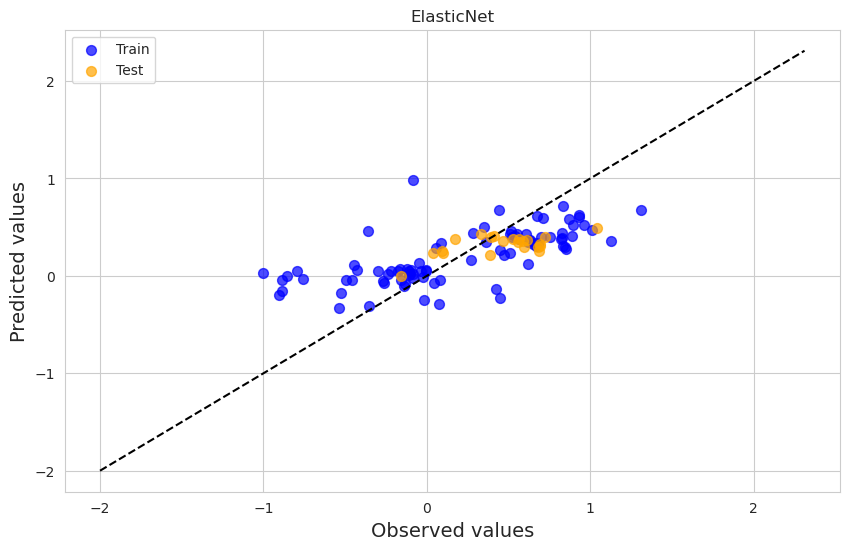

In [31]:
test_utils.display_score(ElasticNet(**study.best_params, random_state=0, max_iter=100000), X_neutral_train, y_neutral_train, X_neutral_test, y_neutral_test)
display(plot_optimization_history(study))

rr = ElasticNet(**study.best_params, random_state=0, max_iter=100000).fit(X_neutral_train, y_neutral_train)
y_neutral_train_pred = rr.predict(X_neutral_train)
y_neutral_test_pred = rr.predict(X_neutral_test)

test_utils.display_graph(rr, X_neutral_train, X_neutral_test, y_neutral_train, y_neutral_test)